# Trabajo final Fundamentos

Cecilia Guillamet Chargue

## Conjunto de entrenamiento

### Importación de las librerías y conjunto de datos

In [ ]:
#Importación de las librerías
import pandas as pd
import numpy as np
pd.options.display.max_columns = None

In [ ]:
#carga del dataset
df = pd.read_csv('/content/drive/MyDrive/Final_fundamentos/propiedades_entrenamiento.csv')

df.head()

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,20dlUrbZUprl5dJqvoDFfA==,Propiedad,2021-02-05,9999-12-31,2021-02-05,-34.607055,-58.404719,Argentina,Capital Federal,Balvanera,NaN,NaN,NaN,3.0,2.0,1.0,NaN,NaN,110000.0,USD,NaN,Castelli 200 Balvanera 3amb U$110.000 Apto Prof,Venta de Departamento 3 AMBIENTES en Balvanera...,Departamento,Venta
1,NgXACOekp/hdnH/ORhrgVw==,Propiedad,2020-10-25,2021-06-08,2020-10-25,-34.590592,-58.434934,Argentina,Capital Federal,Palermo,NaN,NaN,NaN,3.0,2.0,2.0,137.0,137.0,340000.0,USD,Mensual,3 Amb. c/ Terraza y Sin Expensas - Palermo Soho,Espectacular Terraza con Parilla. <br>Sin Expe...,Departamento,Venta
2,QjKwDp+wbjTpF+7J9GQ+Kw==,Propiedad,2020-06-09,2020-08-06,2020-06-09,-34.646617,-58.520418,Argentina,Capital Federal,Liniers,NaN,NaN,NaN,3.0,2.0,NaN,NaN,NaN,135000.0,USD,NaN,Departamento 3 ambientes con pequeña dependenc...,Departamento 3 ambientes con peque&ntilde;a de...,Departamento,Venta
3,x15z5o/ettYsLrQWD2oI0w==,Propiedad,2020-05-28,2020-06-01,2020-05-28,-34.582759,-58.442774,Argentina,Capital Federal,Palermo,Palermo Hollywood,NaN,NaN,1.0,1.0,1.0,34.0,30.0,95878.0,USD,NaN,Departamento tipo estudio con balcón al contra...,Departamento en Arévalo Estudios Palermo Holl...,Departamento,Venta
4,mm5SruyPepg5TER99D0EjA==,Propiedad,2021-02-17,2021-06-17,2021-02-17,-34.576767,-58.423555,Argentina,Capital Federal,Palermo,NaN,NaN,NaN,3.0,2.0,2.0,85.0,85.0,NaN,NaN,Mensual,VENTA! Hermoso 3 Amb 1 Suite C/coch Full Ameni...,Ubicado entre Fray Justo Santa Maria de Oro y ...,Departamento,Venta


In [ ]:
df.shape

(100000, 25)

In [ ]:
df[df.end_date != '9999-12-31'].min()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


id                                          ++2AcJNn9KYBeuOard+DZw==
ad_type                                                    Propiedad
start_date                                                2020-05-24
end_date                                                  2020-05-26
created_on                                                2020-05-24
lat                                                       -53.788624
lon                                                       -81.807577
l1                                                         Argentina
l2                                                   Capital Federal
l5                                                               NaN
l6                                                               NaN
rooms                                                            1.0
bedrooms                                                         0.0
bathrooms                                                        1.0
surface_total                     

In [ ]:
df.dtypes

id                  object
ad_type             object
start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l1                  object
l2                  object
l3                  object
l4                  object
l5                 float64
l6                 float64
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
price_period        object
title               object
description         object
property_type       object
operation_type      object
dtype: object

In [ ]:
#selección de los registros sin precios nulos
#df = df[df['price'].notnull()]
df.shape

(100000, 25)

In [ ]:
df.currency.unique()

array(['USD', nan, 'ARS'], dtype=object)

In [ ]:
df.ad_type.unique()

array(['Propiedad'], dtype=object)

Se elimina la variable ad_type que solo toma un valor

In [ ]:
df = df.drop(columns = ['ad_type'])

Verifico que solo sea propiedades de argetina

In [ ]:
df.l1.unique()

array(['Argentina'], dtype=object)

Verifico que solo sean propiedades de Capital Federal

In [ ]:
df.l2.unique()

array(['Capital Federal'], dtype=object)

Verifico que solo haya localidades de CF. Hay valores nan

In [ ]:
df.l3.unique()

array(['Balvanera', 'Palermo', 'Liniers', 'Recoleta', 'Colegiales',
       'Almagro', 'Las Cañitas', 'Villa Crespo', 'Barracas', 'San Telmo',
       'Parque Chacabuco', nan, 'Barrio Norte', 'Villa Santa Rita',
       'San Cristobal', 'Belgrano', 'Puerto Madero', 'Nuñez',
       'Villa Urquiza', 'Pompeya', 'Saavedra', 'Retiro', 'Caballito',
       'Villa Devoto', 'Flores', 'Parque Centenario', 'Boedo',
       'Centro / Microcentro', 'Mataderos', 'Villa General Mitre',
       'Villa del Parque', 'Monte Castro', 'Agronomía', 'Chacarita',
       'Villa Pueyrredón', 'Villa Lugano', 'Floresta', 'Constitución',
       'Parque Patricios', 'Coghlan', 'Abasto', 'Villa Luro',
       'Velez Sarsfield', 'Monserrat', 'Paternal', 'San Nicolás',
       'Congreso', 'Parque Avellaneda', 'Versalles', 'Tribunales', 'Once',
       'Boca', 'Villa Ortuzar', 'Parque Chas', 'Villa Real', 'Catalinas',
       'Villa Soldati', 'Villa Riachuelo'], dtype=object)

In [ ]:
df['l3'] = np.where(df['l3'] == 'Catalinas', 'Retiro' , df['l3'])
df['l3'] = np.where(df['l3'] == 'Boca', 'La Boca', df['l3'])
df['l3'] = np.where(df['l3'] == 'Villa Lugano', 'Lugano', df['l3'])
df['l3'] = np.where(df['l3'] == 'Pompeya', 'Nueva Pompeya', df['l3'])
df['l3'] = np.where(df['l3'] == 'Abasto', 'Balvanera', df['l3'])
df['l3'] = np.where(df['l3'] == 'Once', 'Balvanera', df['l3'])
df['l3'] = np.where(df['l3'] == 'Centro / Microcentro', 'San Nicolás', df['l3'])
df['l3'] = np.where(df['l3'] == 'Tribunales', 'San Nicolás', df['l3'])
df['l3'] = np.where(df['l3'] == 'Parque Centenario', 'Caballito', df['l3'])
df['l3'] = np.where(df['l3'] == 'Las Cañitas', 'Palermo', df['l3'])
df['l3'] = np.where(df['l3'] == 'Congreso', 'Monserrat', df['l3'])
df['l3'] = np.where(df['l3'] == 'Barrio Norte', 'Recoleta', df['l3'])

In [ ]:
df['l3'] = np.where(df['l3'] == 'nan', np.nan, df['l3'])

In [ ]:
df['l3'].isna().sum()

415

In [ ]:
df.l4.unique()

array([nan, 'Palermo Hollywood', 'Palermo Chico', 'Palermo Soho',
       'Palermo Viejo'], dtype=object)

In [ ]:
df.l5.unique()

array([nan])

In [ ]:
df.l6.unique()

array([nan])

In [ ]:
df = df.drop(columns = ['l1', 'l2', 'l4', 'l5', 'l6'])

In [ ]:
df['property_type'].unique()

array(['Departamento', 'PH', 'Oficina'], dtype=object)

In [ ]:
#se seleccionan solo los departamentos
df = df[df['property_type'] != 'Oficina']
df.shape

(99179, 19)

Verifico que solo sean propiedades en venta

In [ ]:
df['operation_type'].unique()

array(['Venta'], dtype=object)

In [ ]:
df['price_period'].unique()

array([nan, 'Mensual'], dtype=object)

In [ ]:
df.shape

(99179, 19)

In [ ]:
df.l3.unique()

array(['Balvanera', 'Palermo', 'Liniers', 'Recoleta', 'Colegiales',
       'Almagro', 'Villa Crespo', 'Barracas', 'San Telmo',
       'Parque Chacabuco', nan, 'Villa Santa Rita', 'San Cristobal',
       'Belgrano', 'Puerto Madero', 'Nuñez', 'Villa Urquiza',
       'Nueva Pompeya', 'Saavedra', 'Retiro', 'Caballito', 'Villa Devoto',
       'Flores', 'Boedo', 'San Nicolás', 'Mataderos',
       'Villa General Mitre', 'Villa del Parque', 'Monte Castro',
       'Agronomía', 'Chacarita', 'Villa Pueyrredón', 'Lugano', 'Floresta',
       'Constitución', 'Parque Patricios', 'Coghlan', 'Villa Luro',
       'Velez Sarsfield', 'Monserrat', 'Paternal', 'Parque Avellaneda',
       'Versalles', 'La Boca', 'Villa Ortuzar', 'Parque Chas',
       'Villa Real', 'Villa Soldati', 'Villa Riachuelo'], dtype=object)

In [ ]:
df['lat'] = np.where((round(df['lat'], 6) == -34.650948) & (df['title'] == 'Moreno 2900'), -34.614147, df['lat'])
df['lon'] = np.where((round(df['lon'], 6) == -58.453318) & (df['title'] == 'Moreno 2900'), -58.406862, df['lon'])

In [ ]:
df[['l3', 'price']].groupby('l3').mean().sort_values(by = 'price', ascending = False)

,price
l3,
Puerto Madero,889835.614835
Retiro,405998.247403
Belgrano,324874.508562
Palermo,322152.173385
Recoleta,306923.213253
Nuñez,284866.100239
Coghlan,257145.491282
Caballito,241219.631004
Villa Devoto,225626.022350


In [ ]:
df.shape

(99179, 19)

In [ ]:
df.dropna(subset = ['price'], inplace = True)
df = df[df['price'] != 0.00]

df.shape

(97606, 19)

#### Cambio dolar

In [ ]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 1.9 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
cambio = pd.read_excel('/content/drive/MyDrive/Final_fundamentos/Datos históricos USD_ARS.xls')
cambio = cambio[['Fecha', 'Último']]
cambio.head()

,Fecha,Último
0,2020-05-01,66.610
1,2020-05-04,66.785
2,2020-05-05,66.866
3,2020-05-06,66.956
4,2020-05-07,67.160


In [ ]:
cambio['Fecha'] = pd.to_datetime(cambio['Fecha'])

In [ ]:
cambio.dtypes

Fecha     datetime64[ns]
Último           float64
dtype: object

In [ ]:
cambio = (cambio.set_index('Fecha')
      .reindex(pd.date_range('2020-05-01', '2021-06-18', freq='D'))
      .rename_axis(['Fecha'])
      .reset_index())

In [ ]:
cambio.sort_values('Fecha')

,Fecha,Último
0,2020-05-01,66.610
1,2020-05-02,NaN
2,2020-05-03,NaN
3,2020-05-04,66.785
4,2020-05-05,66.866
...,...,...
409,2021-06-14,95.250
410,2021-06-15,95.199
411,2021-06-16,95.310
412,2021-06-17,95.350


In [ ]:
cambio['Último'] = cambio['Último'].fillna(method = 'ffill')

In [ ]:
cambio.columns = ['start_date', 'cambio']

In [ ]:
cambio['start_date'] = pd.to_datetime(cambio['start_date']).dt.date
df['start_date'] = pd.to_datetime(df['start_date']).dt.date

In [ ]:
df = df.merge(cambio, on = ['start_date'])

### Normalización de la variable descripción

In [ ]:
#convertimos a minúsculas todo el texto de la variable de interés
df["description"] = df["description"].str.lower()

In [ ]:
#se crea uan función que quita tilde y pasa texto a minúscula
def normalize(s):
    replacements = (("á", "a"),("é", "e"),("í", "i"),("ó", "o"),("ú", "u"),)
    for a, b in replacements:
        s = str(s).replace(a, b).replace(a.upper(), b.upper())
        s = str(s).lower()
    return s

In [ ]:
#aplicación
df['description'] = df.description.map(normalize)
df['l3'] = df.l3.map(normalize)

### Web scrapping lat y lon

In [ ]:
!pip install beautifulsoup4

import numpy as np
import requests
from bs4 import BeautifulSoup

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#extraemos las coordenadas de los barrios
page = requests.get("https://www.coordenadas.com.es/argentina/pueblos-de-ciudad-buenos-aires/7/1")

#parseamos el código html para poder extraerlo
soup = BeautifulSoup(page.content, 'html.parser')
all_case= soup.find(class_="table")
print(all_case.prettify())

In [ ]:
soup.select('tr > td') #podemos visualizar las filas de los datos que nos interesa

In [ ]:
rows=soup.find_all('tr')

In [ ]:
list_rows= []

for row in rows:
  row_td=row.find_all('td')
  str_cells=str(row_td)
  clean_text=BeautifulSoup(str_cells, "lxml").get_text()
  list_rows.append(clean_text)

In [ ]:
#creamos un data frame con la información extraída
data=pd.DataFrame(list_rows)
data.head(5)

,0
0,[]
1,"[ - Agronomia, -34.6,-58.48333]"
2,"[ - Almagro, -34.6,-58.41667]"
3,"[ - Almirante-Brown, -34.66667,-58.45]"
4,"[ - Balbastro, -34.65,-58.46667]"


In [ ]:
#convertimos la infomarción extraída en columnas
data1=data[0].str.split(pat=", ", expand=True)

data1.head(5)

,0,1
0,[],None
1,[ - Agronomia,"-34.6,-58.48333]"
2,[ - Almagro,"-34.6,-58.41667]"
3,[ - Almirante-Brown,"-34.66667,-58.45]"
4,[ - Balbastro,"-34.65,-58.46667]"


In [ ]:
coor = data1.astype(str).replace({"\[":"", "\]":""}, regex=True)

coor[0] = coor[0].astype(str).replace({"\-":"", "\-":" "}, regex=True)
coor.head()

,0,1
0,,None
1,Agronomia,"-34.6,-58.48333"
2,Almagro,"-34.6,-58.41667"
3,Almirante Brown,"-34.66667,-58.45"
4,Balbastro,"-34.65,-58.46667"


In [ ]:
coor = coor.drop(0, axis = 0)

In [ ]:
latlon = coor[1].str.split(pat=",", expand=True)
latlon.head()

,0,1
1,-34.6,-58.48333
2,-34.6,-58.41667
3,-34.66667,-58.45
4,-34.65,-58.46667
5,-34.61018,-58.40654


In [ ]:
coor['latitud'] = latlon[0]
coor['longitud'] = latlon[1]

In [ ]:
coor = coor.drop(columns = [1]) #elimino la segunda columna
coor.columns = ['localidad', 'latitud', 'longitud'] #renombro las columnas

coor['localidad'] = coor['localidad'].str.rstrip() # elimino los espacios en blanco
coor['localidad'] = coor['localidad'].str.lstrip() # elimino los espacios en blanco

coor['localidad'] = coor['localidad'].str.lower() #paso a minúscula

In [ ]:
#normalización de las localidades de ambos datasets
coor['localidad'] = coor['localidad'].map(normalize)
df['l3'] = df['l3'].map(normalize)

In [ ]:
df['l3'] = df['l3'].str.lower() #paso a minúscula

In [ ]:
coor['localidad'] = coor['localidad'].replace({'montserrat': 'monserrat', 'versailles': 'versalles'})
coor['localidad'] = coor['localidad'].replace({'nunez': 'nuñez'})
coor['localidad'] = coor['localidad'].replace({'pueyrredon': 'villa pueyrredon'})
coor['localidad'] = coor['localidad'].replace({'boca': 'la boca'})
coor['localidad'] = coor['localidad'].replace({'villa lugano': 'lugano'})

In [ ]:
df['l3'].unique()

array(['balvanera', 'recoleta', 'liniers', 'villa urquiza', 'belgrano',
       'palermo', 'caballito', 'san nicolas', 'san telmo', 'villa devoto',
       'retiro', 'villa crespo', 'barracas', 'almagro', 'nan',
       'villa del parque', 'velez sarsfield', 'puerto madero', 'boedo',
       'san cristobal', 'flores', 'nuñez', 'parque chacabuco',
       'villa luro', 'villa general mitre', 'lugano', 'floresta',
       'colegiales', 'monserrat', 'parque patricios', 'coghlan',
       'agronomia', 'chacarita', 'villa pueyrredon', 'paternal',
       'parque avellaneda', 'constitucion', 'saavedra', 'villa ortuzar',
       'monte castro', 'mataderos', 'villa santa rita', 'la boca',
       'nueva pompeya', 'villa real', 'parque chas', 'versalles',
       'villa riachuelo', 'villa soldati'], dtype=object)

In [ ]:
coor['longitud'] = coor['longitud'].astype('float')
coor['latitud'] = coor['latitud'].astype('float')

In [ ]:
coor = coor[coor['longitud'] > -60]

In [ ]:
coor['longitud'] = np.where(coor['localidad'] == 'barracas', -58.38, coor['longitud'])
coor['latitud'] = np.where(coor['localidad'] == 'san telmo', -34.621024, coor['latitud'])
coor['longitud'] = np.where(coor['localidad'] == 'san telmo', -58.371069, coor['longitud'])
coor['latitud'] = np.where(coor['localidad'] == 'puerto madero', -34.610726, coor['latitud'])
coor['longitud'] = np.where(coor['localidad'] == 'puerto madero', -58.362740, coor['longitud'])

In [ ]:
coor['latitud'] = np.where(coor['localidad'] == 'saavedra', -34.548565, coor['latitud'])
coor['longitud'] = np.where(coor['localidad'] == 'saavedra', -58.481270, coor['longitud'])

coor['latitud'] = np.where(coor['localidad'] == 'nuñez', -34.543970, coor['latitud'])
coor['longitud'] = np.where(coor['localidad'] == 'nuñez', -58.461346, coor['longitud'])

coor['latitud'] = np.where(coor['localidad'] == 'belgrano', -34.562567, coor['latitud'])
coor['longitud'] = np.where(coor['localidad'] == 'belgrano', -58.455700, coor['longitud'])

coor['latitud'] = np.where(coor['localidad'] == 'coghlan', -34.560244, coor['latitud'])
coor['longitud'] = np.where(coor['localidad'] == 'coghlan', -58.475046, coor['longitud'])

coor['latitud'] = np.where(coor['localidad'] == 'villa urquiza', -34.570045, coor['latitud'])
coor['longitud'] = np.where(coor['localidad'] == 'villa urquiza', -58.491403, coor['longitud'])

In [ ]:
#Sumamos localidades faltantes
coor = coor.append({'localidad' : 'san nicolas' , 'latitud' : '-34.603480', 'longitud' : '-58.379626'} , ignore_index=True)
coor = coor.append({'localidad' : 'parque avellaneda' , 'latitud' : '-34.645036', 'longitud' : '-58.485339'} , ignore_index=True)
coor = coor.append({'localidad' : 'villa real' , 'latitud' : '-34.619284', 'longitud' : '-58.525073'} , ignore_index=True)

In [ ]:
#Buscamos el dato faltantes en el dataset de coordenadas
df['lat'] = np.where(df['lat'].isna() == True, df['l3'].map(dict(zip(coor['localidad'], coor['latitud']))), df['lat'])
df['lon'] = np.where(df['lon'].isna() == True, df['l3'].map(dict(zip(coor['localidad'], coor['longitud']))), df['lon'])

In [ ]:
coor['localidad'].unique()

array(['agronomia', 'almagro', 'almirante brown', 'balbastro',
       'balvanera', 'barracas', 'barrio norte', 'belgrano', 'la boca',
       'boedo', 'bonorino', 'buenos aires', 'caballito', 'cafferata',
       'calaza', 'centro', 'chacarita', 'ciudad autonoma de buenos aires',
       'coghlan', 'colegiales', 'comandante l piedrabuena', 'congreso',
       'constitucion', 'emilio mitre', 'flores', 'floresta',
       'general jose de san martin', 'isla demarchi', 'lacarra',
       'liniers', 'los perales', 'luis j garcia',
       'marcelo torcuato de alvear', 'mataderos', 'monte castro',
       'monserrat', 'nazca', 'nueva chicago', 'nueva pompeya', 'nuñez',
       'once', 'palermo', 'parque chacabuco', 'parque chas',
       'parque patricios', 'paternal', 'presidente rivadavia',
       'presidente roque saenz pena', 'primera junta', 'puerto madero',
       'puerto nuevo', 'villa pueyrredon', 'ramon l falcon', 'recoleta',
       'retiro', 'saavedra', 'san cristobal', 'san telmo',
       

In [ ]:
df.shape

(97606, 20)

In [ ]:
df = df.drop(df[(df['lat'].isna()) & (df['l3'] == 'nan')].index, axis = 0)
df.shape

(97356, 20)

In [ ]:
coor['latitud'] =coor['latitud'].astype('float')
coor['longitud'] =coor['longitud'].astype('float')
df['lat'] =df['lat'].astype('float')
df['lon'] =df['lon'].astype('float')

In [ ]:
#Elimino las longitudes incorrectas
df = df.drop(df[(df['lon'] < -60) & (df['l3'] == 'nan')].index, axis = 0)
df.shape

(97274, 20)

In [ ]:
df['lat'] = np.where((df['lon'] < -60), np.nan, df['lat'])
df['lon'] = np.where((df['lon'] < -60), np.nan, df['lon'])

In [ ]:
df = df.drop(df[(df['lon'] > -58) & (df['l3'] == 'nan')].index, axis = 0)
df.shape

(97271, 20)

In [ ]:
df['lat'] = np.where((df['lon'] > -58), np.nan, df['lat'])
df['lon'] = np.where((df['lon'] > -58), np.nan, df['lon'])

In [ ]:
df = df.drop(df[(df['lat'] > -34) & (df['l3'] == 'nan')].index, axis = 0)
df.shape

(97267, 20)

In [ ]:
#Buscamos el dato faltantes en el dataset de coordenadas
df['lat'] = np.where(df['lat'].isna() == True, df['l3'].map(dict(zip(coor['localidad'], coor['latitud']))), df['lat'])
df['lon'] = np.where(df['lon'].isna() == True, df['l3'].map(dict(zip(coor['localidad'], coor['longitud']))), df['lon'])

### Imputacion de faltantes para rooms, bedrooms y bathrooms

In [ ]:
df.describe()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,cambio
count,97267.000000,97267.000000,92558.000000,81309.000000,92770.000000,65816.000000,66672.000000,9.726700e+04,97267.000000
mean,-34.595443,-58.437225,2.665507,1.886200,1.495548,110.480506,87.616961,2.432779e+05,81.898846
std,0.026004,0.037082,1.317283,1.391772,0.814809,1090.461571,876.223548,7.009862e+05,8.769633
min,-34.715151,-58.567167,1.000000,0.000000,1.000000,10.000000,1.000000,1.100000e+01,68.117000
25%,-34.614372,-58.461904,2.000000,1.000000,1.000000,44.000000,40.000000,1.000000e+05,74.022000
50%,-34.594851,-58.438250,3.000000,2.000000,1.000000,64.000000,56.000000,1.499000e+05,80.350000
75%,-34.576500,-58.409199,3.000000,3.000000,2.000000,100.000000,85.000000,2.450000e+05,91.448000
max,-34.501226,-58.343954,35.000000,153.000000,18.000000,125000.000000,123000.000000,1.110000e+08,95.350000


In [ ]:
pd.reset_option('display.max_rows')

In [ ]:
df[df['description'].str.contains('monoambiente ', na = False)]

,id,start_date,end_date,created_on,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,cambio
2,+gTlHBXSTyDNVlOTaYswTQ==,2021-02-05,2021-04-05,2021-02-05,-34.641279,-58.520442,liniers,1.0,1.0,1.0,43.0,30.0,69500.0,USD,Mensual,VENTA Monoambiente al contrafrente con patio. ...,venta monoambiente al contrafrente con patio.<...,Departamento,Venta,87.8240
39,voCy5U9dxmVZyc/hMNXvbQ==,2021-02-05,2021-03-26,2021-02-05,-34.617529,-58.446600,caballito,1.0,NaN,1.0,31.0,31.0,59000.0,USD,Mensual,Departamento -Monoambiente en Caballito-Luminoso,luminoso monoambiente con amplio balcon en muy...,Departamento,Venta,87.8240
60,MN4wBKCn7/Y6+B6LgteEGg==,2021-02-05,9999-12-31,2021-02-05,-34.602871,-58.412632,balvanera,1.0,NaN,1.0,32.0,27.0,70000.0,USD,Mensual,Monoambiente al contrafrente con balcón - Zona...,hermoso monoambiente al contrafrente con balco...,Departamento,Venta,87.8240
62,J+2SGohv4WWVgVyoy+pFFQ==,2021-02-05,9999-12-31,2021-02-05,-34.606566,-58.483907,villa del parque,1.0,0.0,1.0,NaN,NaN,89000.0,USD,NaN,VENTA MONOAMBIENTE VILLA DEL PARQUE,venta de departamento monoambiente en villa de...,Departamento,Venta,87.8240
76,k/zNXfl3AgTWzZ1wb/5KkQ==,2021-02-05,9999-12-31,2021-02-05,-34.558479,-58.446418,belgrano,1.0,1.0,1.0,38.0,37.0,125000.0,USD,Mensual,Departamento - Belgrano,unidad monoambiente con cocina integrada al l...,Departamento,Venta,87.8240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97568,lSNXF8Icu5c2KR+RlBimjA==,2020-12-25,2021-01-09,2020-12-25,-34.567191,-58.478924,villa urquiza,1.0,NaN,1.0,38.0,33.0,137000.0,USD,NaN,VENTA MONOAMBIENTE A ESTRENAR!! V. URQUIZA!!!,corredor responsable: jorge salafia - cucicba ...,Departamento,Venta,83.1800
97579,wkGSUA75IejgpiPZ5zfpeQ==,2020-12-25,2020-12-29,2020-12-25,-34.624845,-58.431635,caballito,3.0,2.0,1.0,1870.0,56.0,133100.0,USD,NaN,Emprendimiento - Venta 3 ambientes - Caballito...,corredor responsable: juan francisco carattino...,Departamento,Venta,83.1800
97584,38qpnvMB+UM7L9ngPGEFSw==,2020-12-25,2021-01-08,2020-12-25,-34.579094,-58.411517,palermo,1.0,1.0,1.0,30.0,30.0,95000.0,USD,NaN,VENTA DEPARTAMENTO MONOAMBIENTE PALERMO.,corredor responsable: mariano aufseher - cpi 4...,Departamento,Venta,83.1800
97591,6AkrZjqoFeqD+ElCpKf1HA==,2021-01-02,2021-01-27,2021-01-02,-34.588781,-58.408791,palermo,1.0,1.0,1.0,38.0,28.0,105000.0,USD,Mensual,VENTA IMPECABLE MONOAMBIENTE RECICLADO PISO AL...,venta monoambiente impecable reciclado a nuevo...,Departamento,Venta,85.1154


In [ ]:
df['rooms'].unique()

array([ 3.,  4.,  1.,  2.,  5.,  7.,  6.,  8., 10.,  9., nan, 15., 14.,
       35., 12., 16., 20., 30., 13., 11., 22., 19., 18., 17.])

In [ ]:
df['rooms'] = np.where((df['rooms'] == 35) & (df['l3'] == 'parque chacabuco'), 1, df['rooms'])

In [ ]:
#reemplazo por valores de ambientes que especifica en la descripción
df['rooms'] = df['rooms'].replace({30.0: 3})
df['rooms'] = df['rooms'].replace({22.0: 2})

In [ ]:
df['rooms'].unique()

array([ 3.,  4.,  1.,  2.,  5.,  7.,  6.,  8., 10.,  9., nan, 15., 14.,
       12., 16., 20., 13., 11., 19., 18., 17., 35.])

In [ ]:
df[df['rooms'] == 35]

,id,start_date,end_date,created_on,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,cambio
78632,v+tp9R8iwnseaJo8pmvt1g==,2020-08-03,9999-12-31,2020-08-03,-34.593495,-58.386195,recoleta,35.0,30.0,NaN,1000.0,1000.0,800000.0,USD,Mensual,30 AMBIENTES - PH CON ENTRADA INDEPENDIENTE - ...,venta de casa 30 ambientes o mas en barrio nor...,PH,Venta,72.365


In [ ]:
df['rooms'] = np.where((df['rooms'] == 20) & (df['l3'] == 'belgrano'), 2, df['rooms'])

In [ ]:
df[df['rooms'] == 16] #parece que es un edificio

,id,start_date,end_date,created_on,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,cambio
10594,KuzGWi8jCNPL9nvKAUqLKw==,2021-01-16,2021-08-06,2021-01-16,-34.618485,-58.377993,san telmo,16.0,16.0,18.0,NaN,943.0,1300000.0,USD,Mensual,Departamento en San Telmo,edificio construido por arquitectos zas lavare...,Departamento,Venta,85.73


In [ ]:
df = df[df['rooms'] != 16] #se elimina el edificio

In [ ]:
pd.crosstab(df['rooms'], df['bathrooms'])

bathrooms,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,15.0
rooms,,,,,,,,,,,
1.0,16820,356,20,5,0,2,0,2,0,0,0
2.0,22697,3164,72,8,0,2,0,0,0,0,0
3.0,14365,9092,1105,96,0,1,0,0,1,0,0
4.0,3424,7179,3365,1018,241,10,1,0,0,0,0
5.0,357,1644,1179,553,263,37,2,0,0,0,0
6.0,52,374,402,206,99,14,1,0,0,0,0
7.0,16,140,153,125,33,16,2,0,0,0,0
8.0,7,26,78,46,21,5,8,3,0,0,0
9.0,1,8,32,35,25,0,0,1,2,0,0


In [ ]:
df[df['rooms'] == 15] #son 2 dptos

,id,start_date,end_date,created_on,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,cambio
1545,zoZnmMV6lcVIuQMTCOlt4w==,2021-05-17,2021-07-20,2021-05-17,-34.607195,-58.386465,san nicolas,15.0,14.0,2.0,325.0,228.0,170000.0,USD,NaN,VENTA PH EN DOS PLANTAS A RECICLAR IDEAL HOTEL...,ph a reciclar con entrada independiente al fre...,PH,Venta,93.942
55773,r6wObBTHokmjYtHqvcAlyQ==,2021-02-20,2021-03-01,2021-02-20,-34.623590,-58.401566,san cristobal,15.0,15.0,2.0,355.0,215.0,220000.0,USD,NaN,PH 15 AMBIENTES HOTEL A RECICLAR San Cristóbal,corredor responsable: martin macagno - cucicba...,PH,Venta,89.060
75793,Vu8yrDXOMgeig8K/OmVzdQ==,2020-12-04,2021-05-01,2020-12-04,-34.583330,-58.400000,recoleta,15.0,2.0,2.0,59.0,59.0,180000.0,USD,NaN,OPORTUNIDAD!!! IDEAL INVERSION. - PLENO RECOLETA,se trata de 2 departamentos monoambientes cada...,Departamento,Venta,81.660
93586,pyzjZEj4vaNZXlVkqcrJ+g==,2021-02-24,9999-12-31,2021-02-24,-34.638435,-58.369711,barracas,15.0,13.0,2.0,524.0,261.0,335000.0,USD,NaN,VENTA PH BARRACAS 260 MTS+ TERRAZA 260 M2,corredor responsable: fernando muñoz - cucicba...,PH,Venta,89.660


In [ ]:
df = df.drop(df[(df['rooms'] == 15) & (df['l3'] == 'recoleta')].index, axis = 0)

In [ ]:
df[df['rooms'] == 17]

,id,start_date,end_date,created_on,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,cambio
75529,RCMf9vnMCExOMSDLEO2Jvg==,2020-07-28,2020-07-29,2020-07-28,-34.59807,-58.444686,villa crespo,17.0,17.0,15.0,689.0,598.0,1100000.0,USD,NaN,PH 17 AMBIENTES - VILLA CRESPO,casa-en block-hostel-lote propio-con renta-ger...,PH,Venta,72.13


In [ ]:
df[df['rooms'] == 12]

,id,start_date,end_date,created_on,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,cambio
6013,vezVQe1VPHyK1iEruZnM2A==,2020-09-25,2020-10-02,2020-09-25,-34.563353,-58.444035,belgrano,12.0,5.0,5.0,435.0,435.0,850000.0,USD,Mensual,Oportunidad retasada!!! Virrey Loreto 1700 19...,excelente piso en uno de los mejores edificios...,Departamento,Venta,75.687
6279,aQsMkraeotNcJ2gOfvZnkw==,2020-07-22,2020-12-03,2020-07-22,-34.594719,-58.394318,recoleta,12.0,4.0,3.0,329.0,329.0,899000.0,USD,NaN,VENTA - RECOLETA- Arenales al 1800 - 4 dormito...,edificio de excelente construccion estilo fra...,Departamento,Venta,71.770
24487,aAs0LLh2jujWrmSk9luofw==,2020-09-30,9999-12-31,2020-09-30,-34.612986,-58.386060,monserrat,12.0,11.0,4.0,383.0,189.0,240000.0,USD,Mensual,IDEAL HOSTEL SAN JOSE AL 300 - Congreso,(ideal hostel para estudiantes y turismo). hoy...,Departamento,Venta,76.170
25738,UWr9CnNYc39euCp7cZqQsQ==,2020-10-23,2020-10-30,2020-10-23,-34.563353,-58.444035,belgrano,12.0,5.0,5.0,435.0,435.0,850000.0,USD,Mensual,Oportunidad retasada!!! Virrey Loreto 1700 19...,datos de contacto: <br>celular/whatsapp: +54 9...,Departamento,Venta,78.120
27090,wrNX61ICbImZkTI6Gu5RtQ==,2020-06-27,2020-09-02,2020-06-27,-34.603452,-58.385126,san nicolas,12.0,11.0,3.0,200.0,200.0,210000.0,USD,NaN,VENTA SEMIPISO 200 MTS - SAN NICOLÁS,corredor responsable: marcelo trujillo - cucic...,Departamento,Venta,70.070
30389,kJdWJTtl3Jx7wz2lxPxloA==,2020-09-26,9999-12-31,2020-09-26,-34.631721,-58.478355,floresta,12.0,0.0,4.0,NaN,NaN,200000.0,USD,NaN,Yerbal 3600 Floresta PH 12amb PB u$ 200.000,originalmente serian 8 ambientes actualmente ...,PH,Venta,75.687
32415,MHMDT7DCyn6QGXs4ASh60Q==,2020-11-24,2021-01-06,2020-11-24,-34.610916,-58.402454,balvanera,12.0,9.0,4.0,NaN,270.0,290000.0,USD,Mensual,PH - Balvanera,¡¡¡oportunidad!!! precio y calidad edilicia.<b...,PH,Venta,80.680
35055,+15X5PeDh09Qp1V35ywS0g==,2020-11-18,9999-12-31,2020-11-18,-34.583330,-58.400000,recoleta,12.0,4.0,4.0,535.0,509.0,980000.0,USD,Mensual,Av. Callao - Melo: Piso de gran categoría.Gran...,espectacular recepcion de sala doble living y...,Departamento,Venta,79.991
35244,KPLlAPEb+WFr/0pEeQTV+g==,2020-11-18,9999-12-31,2020-11-18,-34.592450,-58.392639,recoleta,12.0,4.0,4.0,535.0,509.0,980000.0,USD,Mensual,Av. Callao - Juncal: Piso de mucha categoría.....,espectacular recepcion de sala doble living y...,Departamento,Venta,79.991
38765,jtkCCtVorTFikeX+g+0Rzg==,2020-06-23,2020-06-25,2020-06-23,-34.576445,-58.432603,palermo,12.0,NaN,3.0,615.0,408.0,630000.0,USD,Mensual,Venta PH Oficinas comerciales sobre AV Santa F...,venta edificio comercial en ph ubicado en pa...,PH,Venta,70.030


In [ ]:
df[(df['description'].str.contains('monoambiente', na = False)) & (df['rooms'] == 1)]['bedrooms'].value_counts()

1.0     3415
0.0     1788
2.0       10
5.0        1
10.0       1
Name: bedrooms, dtype: int64

In [ ]:
# imputacion de cantidad de baños para monoambientes de 1 habitacion
df['bathrooms'] = np.where((df['description'].str.contains('monoambiente', na = False) & (df['rooms'] == 1) & (df['bathrooms'].isna())),
                           1, df['bathrooms'])

In [ ]:
df[(df['description'].str.contains('monoambiente', na = False)) & (df['rooms'] == 1) & (df['bedrooms'] == 2)]

,id,start_date,end_date,created_on,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,cambio
6042,LK+UcL82HTT23k+ms8YFcA==,2020-09-25,9999-12-31,2020-09-25,-34.602499,-58.453653,villa crespo,1.0,2.0,1.0,42.0,39.0,115000.0,USD,Mensual,Moderno Monoambiente Divisible en Villa Crespo...,monoambiente divisible con cocina integrada <b...,Departamento,Venta,75.687
7628,ybK3GgBY+bzoeAA+YONVcQ==,2021-05-18,2021-06-05,2021-05-18,-34.580919,-58.430717,palermo,1.0,2.0,1.0,97.0,97.0,263000.0,USD,Mensual,Departamento - Palermo,quedan disponibles en el complejo 1 monoambien...,Departamento,Venta,93.973
12959,PfSrBA7qDBzgseJ4JyQF/w==,2021-04-28,9999-12-31,2021-04-28,-34.637611,-58.402928,parque patricios,1.0,2.0,1.0,32.0,28.0,64000.0,USD,NaN,Monoambiente c/balcon. Parque Patricios,corredor responsable: maria alejandra genoveva...,Departamento,Venta,93.430
22631,UPnQeHc4jj2dH1tDFriigw==,2020-09-03,2020-09-04,2020-09-03,-34.583330,-58.400000,recoleta,1.0,2.0,1.0,52.0,52.0,225750.0,USD,Mensual,Departamento en venta en IQ Callao- Vivienda o...,espectacular monoambiente al frente de 52 40 m...,Departamento,Venta,74.310
22783,UCOtdNvzVzHTtDsHPvZ5SA==,2020-09-03,2020-09-04,2020-09-03,-34.583330,-58.400000,recoleta,1.0,2.0,1.0,52.0,52.0,235800.0,USD,Mensual,Departamento en venta en IQ Callao- Vivienda o...,espectacular monoambiente al frente de 52 40 m...,Departamento,Venta,74.310
53482,0UlKyZETJzANgxM5dswmjg==,2020-12-09,2021-02-09,2020-12-09,-34.581682,-58.422607,palermo,1.0,2.0,1.0,39.0,36.0,133000.0,USD,Mensual,Monoambiente Deluxe a estrenar en el corazón d...,conservando la fachada clasica de la casa ubic...,Departamento,Venta,82.040
55849,epPD4VV0HDOb5M1cNSTFEw==,2021-02-20,2021-03-01,2021-02-20,-34.640603,-58.417313,nueva pompeya,1.0,2.0,1.0,27.0,22.0,53000.0,USD,NaN,P.H. AL FRENTE C/ ENTRADA IND. S/ EXPENSAS,corredor responsable: martin macagno - cucicba...,PH,Venta,89.060
59694,4uutKLaQgCiQA0z++Xt6xw==,2020-07-03,2020-07-03,2020-07-03,-34.584093,-58.446211,palermo,1.0,2.0,1.0,69.0,43.0,130000.0,USD,Mensual,Monoambiente divisible con 2 patios + amenities!,corredor responsable: ariel champanier - c.u.c...,Departamento,Venta,70.630
69844,UChqYqdnLp7vEn+KJf2lzA==,2020-08-25,2020-09-04,2020-08-25,-34.588197,-58.414473,palermo,1.0,2.0,1.0,29.0,28.0,99000.0,USD,Mensual,MONOAMBIENTES EN PALERMO - A ESTRENAR,fecha de entrega junio 2020 <br> <br>ideal par...,Departamento,Venta,73.652
77275,qcBc6l9sKQTiF/PIQw18aw==,2020-11-26,9999-12-31,2020-11-26,-34.579901,-58.423575,palermo,1.0,2.0,1.0,27.0,27.0,79000.0,USD,Mensual,SANTA FE 4400,monoambiente de 27 m2 piso alto hiper luminos...,Departamento,Venta,80.870


In [ ]:
df[(df['description'].str.contains('monoambiente', na = False)) & (df['rooms'] == 1) & (df['bedrooms'] == 5)]

,id,start_date,end_date,created_on,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,cambio
8233,KnJPz4T2aLzhbWY8pjenWg==,2021-04-15,2021-04-16,2021-04-15,-34.568785,-58.457129,belgrano,1.0,5.0,1.0,48.0,33.0,88000.0,USD,NaN,VENTA MONOAMBIENTE A ESTRENAR BELGRANO C/PATIO,corredor responsable: micaela perez / lucas fe...,Departamento,Venta,92.72


In [ ]:
#imputamos el 5 dormitorios por 1 porque es un monoambiente
df['bedrooms'] = np.where((df['description'].str.contains('monoambiente', na = False)) & (df['rooms'] == 1) & (df['bedrooms'] == 5),
                          1, df['bedrooms'])

In [ ]:
df[(df['description'].str.contains('monoambiente', na = False)) & (df['bedrooms'] == 10)]

,id,start_date,end_date,created_on,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,cambio
37707,z7l1Iwc0lsl6kcg21Ncpvw==,2020-06-11,9999-12-31,2020-06-11,-34.591583,-58.425855,palermo,1.0,10.0,1.0,NaN,NaN,680000.0,USD,NaN,PH en venta de 10 dormitorios en Palermo,venta en block o terreno en palermo soho capi...,PH,Venta,69.31


In [ ]:
df.describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.95])

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,cambio
count,97265.000000,97265.000000,92556.000000,81307.000000,93185.000000,65815.000000,66670.000000,9.726500e+04,97265.000000
mean,-34.595443,-58.437226,2.664160,1.885975,1.493148,110.481288,87.604560,2.432677e+05,81.898809
std,0.026004,0.037082,1.305792,1.390869,0.811865,1090.469837,876.230421,7.009852e+05,8.769714
min,-34.715151,-58.567167,1.000000,0.000000,1.000000,10.000000,1.000000,1.100000e+01,68.117000
5%,-34.637970,-58.501281,1.000000,1.000000,1.000000,31.000000,29.000000,6.500000e+04,69.593000
25%,-34.614371,-58.461905,2.000000,1.000000,1.000000,44.000000,40.000000,1.000000e+05,74.022000
50%,-34.594851,-58.438250,3.000000,2.000000,1.000000,64.000000,56.000000,1.499000e+05,80.350000
75%,-34.576500,-58.409201,3.000000,3.000000,2.000000,100.000000,85.000000,2.450000e+05,91.448000
95%,-34.555086,-58.376757,5.000000,4.000000,3.000000,219.000000,189.000000,6.300000e+05,94.440000
max,-34.501226,-58.343954,35.000000,153.000000,15.000000,125000.000000,123000.000000,1.110000e+08,95.350000


In [ ]:
df[df['rooms'].isna()]

,id,start_date,end_date,created_on,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,cambio
79,T4tQ8ElqiieBX1La1VsgRw==,2021-02-05,9999-12-31,2021-02-05,-34.591584,-58.389615,recoleta,NaN,2.0,1.0,67.0,67.0,185000.0,USD,Mensual,Departamento - Recoleta,lindisimo contrafrente a pulmon de manzana muy...,Departamento,Venta,87.8240
170,yXSeZrYUV860wcF8tciKMA==,2021-02-05,9999-12-31,2021-02-05,-34.595268,-58.379989,retiro,NaN,5.0,3.0,310.0,310.0,600000.0,USD,Mensual,Espectacular departamento antiguo en edificio ...,lindisimo departamento en clasico edificio fra...,Departamento,Venta,87.8240
176,nMqIl7lNxsuJJ+8Ax8sptQ==,2021-02-05,2021-06-24,2021-02-05,-34.593385,-58.381410,retiro,NaN,3.0,2.0,NaN,NaN,340000.0,USD,Mensual,Departamento - Retiro,lindisimo contrafrente a pulmon amplio de jard...,Departamento,Venta,87.8240
318,n120TfCLKJzqrn8U4hSxLw==,2020-10-25,2021-04-09,2020-10-25,-34.646786,-58.415699,parque patricios,NaN,NaN,1.0,16.0,16.0,41000.0,USD,NaN,Enrique Ochoa 100 - U$D 41.000 - Departamento...,sebastian celery broker inmobiliario matricula...,Departamento,Venta,78.1200
336,VGk3sP0fo0T0QDIA4/lG4g==,2020-10-25,2020-11-02,2020-10-25,-34.551849,-58.473110,nuñez,NaN,NaN,1.0,67.0,43.0,115000.0,USD,NaN,Crisologo Larralde 2900 1° - U$D 115.000 - D...,oportunidad departamento monoambiente con pati...,Departamento,Venta,78.1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97490,aDisZM0fP/Ioeh2IR1QFow==,2020-07-05,2021-07-05,2020-07-05,-34.623943,-58.445243,almagro,NaN,1.0,2.0,94.0,67.0,225000.0,USD,Mensual,RECICLADO EXCELENTE - PH en PB en Venta en Ca...,codigo: ubicado en: av juan b. alberdi 1200 -...,PH,Venta,70.6300
97507,DlCpe32ymXO4jexP9VW2UQ==,2020-07-05,2020-07-05,2020-07-05,-34.598881,-58.376755,retiro,NaN,NaN,NaN,NaN,NaN,150000.0,USD,Mensual,TOTALMENTE,no apto personas con movilidad reducida ley 51...,Departamento,Venta,70.6300
97558,Mfc8Ww0lYRwrSvmiUB7g2w==,2020-09-06,2021-02-08,2020-09-06,-34.646431,-58.454854,flores,NaN,NaN,NaN,NaN,NaN,38000.0,USD,NaN,SUSPENDIDO!! Se vende departamento de 2 ambientes,se vende departamento de 2 ambientes. ubicado ...,Departamento,Venta,74.4200
97565,bWp2N701fvvHQPjvA/HKYw==,2020-12-25,2020-12-27,2020-12-25,-34.566986,-58.433688,belgrano,NaN,NaN,NaN,865.0,865.0,23000.0,USD,NaN,Cochera en venta 4to piso Las Cañitas,corredor responsable: martin macagno - cucicba...,Departamento,Venta,83.1800


In [ ]:
df[(df['description'].str.contains('monoambiente ', regex = True, na = False)) & (df['rooms'] > 1)].head()

,id,start_date,end_date,created_on,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,cambio
623,lxL9/F+bpfEIyuQIXRygZw==,2020-06-09,9999-12-31,2020-06-09,-34.650640,-58.502863,mataderos,2.0,1.0,NaN,NaN,NaN,116000.0,USD,NaN,venta 2 ambientes a estrenar de categoria,venta departamento a estrenar en mataderos.<br...,Departamento,Venta,69.023
835,3yX59JJ1Bz5s1kAj7T7H2A==,2020-05-28,2020-06-25,2020-05-28,-34.598350,-58.430779,villa crespo,2.0,1.0,1.0,46.0,43.0,130000.0,USD,Mensual,Oportunidad!! Departamento - Villa Crespo,excelente monoambiente dividido en 2 comodos ...,Departamento,Venta,68.303
1253,3LT0lmBa7htW0joaztjBkQ==,2020-10-08,9999-12-31,2020-10-08,-34.623820,-58.429719,caballito,2.0,1.0,1.0,41.0,37.0,107000.0,USD,Mensual,Departamento - Caballito,monoambiente divisible en venta en caballito. ...,Departamento,Venta,77.110
1309,irknF515AVclus6g/KgplA==,2021-03-13,9999-12-31,2021-03-13,-34.606112,-58.430824,almagro,2.0,1.0,NaN,NaN,NaN,95000.0,USD,NaN,Departamento en Venta en Almagro Capital fede...,venta de departamento monoambiente en almagro ...,Departamento,Venta,90.780
1326,JEWOdHBNzleOJZo+wGWx2A==,2021-03-13,2021-03-16,2021-03-13,-34.643001,-58.504117,villa luro,3.0,2.0,2.0,72.0,65.0,165000.0,USD,NaN,VTA 3 AMBIENTES A ESTRENAR C/ BALCON - VILLA ...,corredor responsable: marcelo trujillo - cucic...,Departamento,Venta,90.780


In [ ]:
df[(df['description'].str.contains('monoambiente ', regex = True, na = False))]['rooms'].mean()

1.0776950469407576

In [ ]:
#imputación de los valores de rooms por 1 cuando son monoambientes
df['rooms'] = np.where((df['description'].str.contains('monoambiente ', regex = True, na = False)) & (df['rooms'].isna()),
                       1, df['rooms'])

In [ ]:
df[df['description'].str.contains('2 ambientes ', regex = True, na = False)].head()

,id,start_date,end_date,created_on,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,cambio
5,bLqpJwSJkbceCfr9U0344Q==,2021-02-05,2021-02-23,2021-02-05,-34.585230,-58.422992,palermo,2.0,1.0,1.0,42.0,38.0,115000.0,USD,Mensual,Departamento Dos Ambientes c/ Balcón Luminoso-...,corredor responsable: fabrizio alessandro cent...,Departamento,Venta,87.824
14,6KXJcYzl1GvCy5+tKrAQTg==,2021-02-05,2021-04-25,2021-02-05,-34.584478,-58.413586,palermo,2.0,1.0,1.0,NaN,NaN,75000.0,USD,NaN,BERUTI Y ARAOZ - 2AMB INTERNO - BAÑO - COC Y L...,venta de departamento 2 ambientes en palermo ...,Departamento,Venta,87.824
15,f60T5JxOBVK+8mACxzckdw==,2021-02-05,2021-06-05,2021-02-05,-34.557560,-58.458531,belgrano,2.0,1.0,1.0,52.0,45.0,160000.0,USD,Mensual,TORRE FULL AMENTITIS - PISO ALTO - 1 DORMITORI...,torre full amentitis - piso alto - 1 dormitori...,Departamento,Venta,87.824
21,M6kDFzxq4wdRyuGqQEns0g==,2021-02-05,2021-03-04,2021-02-05,-34.617092,-58.401198,balvanera,2.0,1.0,1.0,44.0,44.0,68000.0,USD,Mensual,Departamento - Once,lindisimo y muy luminoso 2 ambientes ubicado e...,Departamento,Venta,87.824
32,kb9JJvsWg7O0dyGBnVFlkw==,2021-02-05,2021-02-06,2021-02-05,-34.620540,-58.413702,boedo,2.0,1.0,1.0,NaN,NaN,92923.0,USD,Mensual,2 AMBIENTES | AV. INDEPENDENCIA al 3300,venta de departamento 2 ambientes en boedo ca...,Departamento,Venta,87.824


In [ ]:
#imputación de los valores de rooms por 2 cuando son 2 ambientes
df['rooms'] = np.where((df['description'].str.contains('2 ambientes ', regex = True, na = False)) & (df['rooms'].isna()),
                       2,
                       df['rooms'])

In [ ]:
#imputación de los valores de rooms por 3 cuando son 3 ambientes
df['rooms'] = np.where((df['description'].str.contains('3 ambientes ', regex = True, na = False)) & (df['rooms'].isna()),
                       3,
                       df['rooms'])

In [ ]:
#imputación de los valores de rooms por 4 cuando son 4 ambientes
df['rooms'] = np.where((df['description'].str.contains('4 ambientes ', regex = True, na = False)) & (df['rooms'].isna()),
                       4,
                       df['rooms'])

In [ ]:
#imputación de los valores de rooms por 5 cuando son 5 ambientes
df['rooms'] = np.where((df['description'].str.contains('5 ambientes ', regex = True, na = False)) & (df['rooms'].isna()),
                       5,
                       df['rooms'])

In [ ]:
#imputación de los valores de rooms por 6 cuando son 6 ambientes
df['rooms'] = np.where((df['description'].str.contains('6 ambientes ', regex = True, na = False)) & (df['rooms'].isna()),
                       6,
                       df['rooms'])

In [ ]:
#Buscamos si en la descripción dice ambientes y extraemos el valor
regex = r'(?P<ambientes>\d)\sambientes?\s'
df = pd.concat([df, df['description'].str.extract(regex)], axis=1)

In [ ]:
#Buscamos si en la descripción dice dormitorios y extraemos el valor
regex = r'(?P<dormitorios>\d)\sdormitorios?\s'
df = pd.concat([df, df['description'].str.extract(regex)], axis=1)

In [ ]:
#Buscamos si en la descripción dice baños y extraemos el valor
regex = r'(?P<baños>\d)\sbaños?\s'
df = pd.concat([df, df['description'].str.extract(regex)], axis=1)

In [ ]:
df.head()

,id,start_date,end_date,created_on,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,cambio,ambientes,dormitorios,baños
0,20dlUrbZUprl5dJqvoDFfA==,2021-02-05,9999-12-31,2021-02-05,-34.607055,-58.404719,balvanera,3.0,2.0,1.0,NaN,NaN,110000.0,USD,NaN,Castelli 200 Balvanera 3amb U$110.000 Apto Prof,venta de departamento 3 ambientes en balvanera...,Departamento,Venta,87.824,3,NaN,NaN
1,Mld7HLELakUNew3ParJwqQ==,2021-02-05,2021-02-24,2021-02-05,-34.592188,-58.379074,recoleta,4.0,2.0,2.0,187.0,187.0,570000.0,USD,Mensual,VENTA semipiso cfte RECICLADO con vista abiert...,solicitar archivo de fotos <br> <br>living y c...,Departamento,Venta,87.824,NaN,3,2
2,+gTlHBXSTyDNVlOTaYswTQ==,2021-02-05,2021-04-05,2021-02-05,-34.641279,-58.520442,liniers,1.0,1.0,1.0,43.0,30.0,69500.0,USD,Mensual,VENTA Monoambiente al contrafrente con patio. ...,venta monoambiente al contrafrente con patio.<...,Departamento,Venta,87.824,NaN,NaN,NaN
3,A5q/RsQ0iQW9q70MPX6yQQ==,2021-02-05,9999-12-31,2021-02-05,-34.576726,-58.486497,villa urquiza,3.0,2.0,2.0,75.0,68.0,259000.0,USD,Mensual,PISO ALTO EN TORRE - AMENITIES PISCINA - PARR...,departamento en venta 3 ambientes en villa urq...,Departamento,Venta,87.824,3,NaN,NaN
4,gq3YhI+FwfowTwaebzalMw==,2021-02-05,2021-06-30,2021-02-05,-34.573211,-58.461678,belgrano,1.0,3.0,1.0,NaN,NaN,325000.0,USD,NaN,Departamento en venta de 3 dormitorios c/ coch...,magnifico departamento en la mejor esquina de...,Departamento,Venta,87.824,NaN,NaN,NaN


In [ ]:
#reemplazamos los valores faltantes por los encontrados en la descripcion
df['rooms'] = np.where((df['rooms'].isna()), df['ambientes'], df['rooms'])
df['bedrooms'] = np.where((df['bedrooms'].isna()), df['dormitorios'], df['bedrooms'])
df['bathrooms'] = np.where((df['bathrooms'].isna()), df['baños'], df['bathrooms'])

In [ ]:
df.isna().sum()

id                     0
start_date             0
end_date               0
created_on             0
lat                    0
lon                    0
l3                     0
rooms               2157
bedrooms           14850
bathrooms           3898
surface_total      31450
surface_covered    30595
price                  0
currency               0
price_period       51936
title                  0
description            0
property_type          0
operation_type         0
cambio                 0
ambientes          47100
dormitorios        82436
baños              89898
dtype: int64

In [ ]:
df['bedrooms'] = np.where((df['description'].str.contains('monoambiente ', regex = True, na = False)) & (df['bedrooms'] == 1), 0, df['bedrooms'])

In [ ]:
df['bedrooms'] = df['bedrooms'].astype('float')

In [ ]:
df['bedrooms'].unique()

array([  2.,   0.,   3.,   1.,  nan,   5.,   4.,   6.,  14.,  12.,  10.,
         9.,   7.,  60.,   8.,  16.,  13.,  20.,  11.,  30.,  15.,  77.,
       153.,  18.,  17.,  22.,  32.])

In [ ]:
df['bedrooms'] = np.where(df['bedrooms'] == 16, 1, df['bedrooms'])

In [ ]:
df['bedrooms'] = np.where((df['bedrooms'] == 15) & (df['l3'] == 'caballito'), 1, df['bedrooms'])

In [ ]:
df['bedrooms'] = np.where((df['bedrooms'] == 20) & (df['l3'] == 'almagro'), 2, df['bedrooms'])
df['bedrooms'] = np.where((df['bedrooms'] == 20) & (df['l3'] == 'caballito'), 2, df['bedrooms'])

In [ ]:
df['bedrooms'] = np.where(df['bedrooms'] == 22, 2, df['bedrooms'])
df['surface_total'] = np.where(df['bedrooms'] == 22, 70, df['surface_total'])

In [ ]:
df['bedrooms'] = np.where(df['bedrooms'] == 60, 6, df['bedrooms'])

In [ ]:
df['l3'] = np.where(df['bedrooms'] == 77, 'san nicolas', df['l3'])
df['rooms'] = np.where(df['bedrooms'] == 77, 4, df['rooms'])
df['bedrooms'] = np.where(df['bedrooms'] == 77, 2, df['bedrooms'])

In [ ]:
df['bedrooms'] = np.where((df['bedrooms'] == 30) & (df['l3'] == 'recoleta'), 3, df['bedrooms'])

In [ ]:
df['bedrooms'] = np.where(df['bedrooms'] == 32, 3, df['bedrooms'])

In [ ]:
df['l3'] = np.where(df['bedrooms'] == 153, 'san nicolas', df['l3'])
df['rooms'] = np.where(df['bedrooms'] == 153, 5, df['rooms'])
df['bedrooms'] = np.where(df['bedrooms'] == 153, 2, df['bedrooms'])

In [ ]:
df['bathrooms'] = df['bathrooms'].astype('float')

In [ ]:
df['bathrooms'].unique()

array([ 1.,  2.,  5.,  3.,  4., nan,  7.,  6.,  8.,  9., 10., 15.])

In [ ]:
df['rooms'] = np.where((df['bathrooms'] == 8) & (df['l3'] == 'palermo') & (df['rooms'] == 1), 8, df['rooms'])
df['bathrooms'] = np.where((df['bathrooms'] == 9) & (df['l3'] == 'belgrano'), 1, df['bathrooms'])
df['rooms'] = np.where((df['bathrooms'] == 8) & (df['l3'] == 'san telmo'), 10, df['rooms'])
df['bedrooms'] = np.where((df['bathrooms'] == 9) & (df['l3'] == 'caballito'), 9, df['bedrooms'])

Superficie

In [ ]:
df['surface_total'].describe()

count     65815.000000
mean        110.481288
std        1090.469837
min          10.000000
25%          44.000000
50%          64.000000
75%         100.000000
max      125000.000000
Name: surface_total, dtype: float64

In [ ]:
# para los casos donde la superficie cubierta es mayor a la total, se intercambian los valores
df['surface_total'], df['surface_covered'] = np.where(df['surface_total'] < df['surface_covered'],
                                                      (df['surface_covered'], df['surface_total']),
                                                      (df['surface_total'], df['surface_covered']))

In [ ]:
df['surface_total'] = np.where((df['surface_total'] == 10) & (df['l3'] == 'villa luro'), 80, df['surface_total'])

In [ ]:
df = df.drop(df[df['surface_total'] == 10].index, axis = 0)

In [ ]:
df['bedrooms'] = np.where((df['surface_total'] == 12) & (df['l3'] == 'san telmo'), 0, df['bedrooms'])
df['bathrooms'] = np.where((df['surface_total'] == 12) & (df['l3'] == 'san telmo'), 1, df['bathrooms'])
df['surface_total'] = np.where((df['surface_total'] == 12) & (df['l3'] == 'san telmo'), np.nan, df['surface_total'])
df['surface_covered'] = np.where((df['surface_total'] == 12) & (df['l3'] == 'san telmo'), np.nan, df['surface_covered'])

In [ ]:
df = df.drop(df[df['surface_total'] == 12].index, axis = 0)

In [ ]:
df['bedrooms'] = np.where((df['surface_total'] == 12) & (df['l3'] == 'retiro'), 0, df['bedrooms'])

In [ ]:
df = df.drop(df[(df['surface_total'] == 13) & (df['l3'] == 'monserrat')].index, axis = 0)

In [ ]:
df['surface_total'].describe(percentiles = [ 0.05, 0.25, 0.5, 0.75, 0.95, 0.96, 0.97, 0.99])

count     65809.000000
mean        111.406403
std        1092.911312
min          13.000000
5%           31.000000
25%          44.000000
50%          64.000000
75%         100.000000
95%         220.000000
96%         240.000000
97%         271.000000
99%         400.000000
max      125000.000000
Name: surface_total, dtype: float64

In [ ]:
df['surface_total'] = np.where(df['surface_total'] == 125000.00, 125, df['surface_total'])
df['surface_covered'] = np.where(df['surface_covered'] == 120000.00, 120, df['surface_covered'])

In [ ]:
df['surface_total'] = np.where(df['surface_total'] == 123000.00, 123, df['surface_total'])
df['surface_covered'] = np.where(df['surface_covered'] == 123000.00, 123, df['surface_covered'])

In [ ]:
df['surface_total'] = np.where(df['surface_total'] == 72060.00, 90, df['surface_total'])

In [ ]:
df['surface_total'] = np.where((df['surface_total'] > 30000) & (df['l3'] == 'palermo'), df['surface_covered'], df['surface_total'])

In [ ]:
df['surface_total'] = np.where((df['surface_total'] > 30000) & (df['l3'] == 'retiro'), 315.65, df['surface_total'])

In [ ]:
df['surface_total'] = np.where((df['surface_total'] > 21000), df['surface_total']/1000, df['surface_total'])

In [ ]:
df['surface_total'] = np.where((df['surface_total'] > 10000), df['surface_total']/100, df['surface_total'])

In [ ]:
df['surface_total'] = np.where(df['surface_total'] == 9983.0, df['surface_covered'], df['surface_total'])

In [ ]:
df['surface_total'] = np.where((df['surface_total'] > 7000), df['surface_total']/100, df['surface_total'])

In [ ]:
df['surface_total'] = np.where(df['surface_total'] == 6195.0, 619.5, df['surface_total'])

In [ ]:
df['surface_total'] = np.where((df['surface_total'] > 5000), df['surface_total']/100, df['surface_total'])

In [ ]:
df['surface_total'] = np.where(df['surface_total'] == 5000.0, df['surface_covered'], df['surface_total'])

In [ ]:
df['surface_total'] = np.where((df['surface_total'] > 4000), df['surface_total']/100, df['surface_total'])

In [ ]:
df['surface_total'] = np.where(df['surface_total'] == 3562.0, df['surface_covered'], df['surface_total'])
df['surface_total'] = np.where(df['surface_total'] == 3024.0, df['surface_covered'], df['surface_total'])

In [ ]:
df['surface_total'] = np.where((df['surface_total'] > 3000), df['surface_total']/100, df['surface_total'])

In [ ]:
df['surface_total'] = np.where((df['surface_total'] > 2000) & (df['surface_covered'] < 1000), df['surface_covered'], df['surface_total'])

In [ ]:
df['surface_total'] = np.where((df['surface_total'] == 2500.0) & (df['l3'] == 'belgrano'), df['surface_total']/10, df['surface_total'])
df['surface_covered'] = np.where((df['surface_covered'] == 2500.0) & (df['l3'] == 'belgrano') & (df['price'] == 369000.0), df['surface_covered']/10, df['surface_covered'])

In [ ]:
df['surface_total'] = np.where((df['surface_total'] > 2000), df['surface_total']/100, df['surface_total'])

In [ ]:
df['surface_total'] = np.where((df['surface_total'] > 1500), df['surface_covered'], df['surface_total'])

In [ ]:
df['surface_total'] = np.where((df['surface_total'] > 1000) & (df['property_type'] == 'Departamento'), df['surface_covered'], df['surface_total'])

In [ ]:
df['surface_total'] = np.where(df['surface_total'] == 1208.0, 120.8, df['surface_total'])

In [ ]:
df['surface_total'] = np.where((df['surface_total'] > 700) & (df['surface_covered'] < 50), df['surface_covered'], df['surface_total'])

In [ ]:
df['surface_total'] = np.where((df['surface_total'] > 700) & (df['surface_covered'] < 100), df['surface_total']/10, df['surface_total'])

In [ ]:
df['surface_total'] = np.where(df['surface_total'] == 900, df['surface_covered'], df['surface_total']) 

In [ ]:
df['surface_total'].describe(percentiles = [ 0.05, 0.25, 0.5, 0.75, 0.95, 0.96, 0.97, 0.99, 0.999])

count    65809.000000
mean        85.248000
std         68.295408
min         13.000000
5%          31.000000
25%         44.000000
50%         64.000000
75%        100.000000
95%        214.000000
96%        237.000000
97%        261.000000
99%        372.000000
99.9%      574.192000
max       1019.000000
Name: surface_total, dtype: float64

Superficie cubierta

In [ ]:
df.shape

(97260, 23)

In [ ]:
df['surface_covered'].describe(percentiles = [ 0.05, 0.25, 0.5, 0.75, 0.95, 0.96, 0.97, 0.99, 0.999])

count    66666.000000
mean        83.031755
std        565.872462
min          1.000000
5%          29.000000
25%         40.000000
50%         56.000000
75%         85.000000
95%        188.000000
96%        204.000000
97%        231.000000
99%        334.000000
99.9%      668.000000
max      67350.000000
Name: surface_covered, dtype: float64

In [ ]:
df['surface_covered'] = np.where(df['surface_covered'] > 20000, df['surface_covered']/1000, df['surface_covered'])

In [ ]:
df['surface_covered'] = np.where(df['surface_covered'] > 10000, df['surface_covered']/100, df['surface_covered'])

In [ ]:
df['surface_covered'] = np.where(df['surface_covered'] > 5000, df['surface_covered']/100, df['surface_covered'])

In [ ]:
df['surface_covered'] = np.where(df['surface_covered'] > 2000, df['surface_covered']/100, df['surface_covered'])

In [ ]:
df['surface_covered'] = np.where(df['surface_covered'] == 970.0, 97, df['surface_covered'])

In [ ]:
df['surface_covered'] = np.where(df['surface_covered'] == 1, np.nan, df['surface_covered'])

In [ ]:
df['surface_covered'] = np.where(df['surface_covered'] == 3, df['surface_total'], df['surface_covered'])

In [ ]:
df['surface_covered'] = np.where(df['surface_covered'] == 4, df['surface_total'], df['surface_covered'])

In [ ]:
df['surface_covered'] = np.where(df['surface_covered'] < 7, df['surface_total'], df['surface_covered'])

In [ ]:
df['surface_total'] = np.where((df['surface_covered'] == 12) & (df['surface_total'].isna()), df['surface_covered'], df['surface_total'])

In [ ]:
df['surface_covered'] = np.where(df['surface_covered'] < 15, df['surface_total'], df['surface_covered'])

### Análisis de los precios

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
df.price.describe(percentiles = [0.001,0.01,0.02,0.03,0.04, 0.05, 0.25, 0.5, 0.75, 0.95, 0.96, 0.97, 0.98, 0.99, 0.999])

count       97260.00
mean       243197.24
std        700566.48
min            11.00
0.1%        28000.00
1%          48335.15
2%          55000.00
3%          59000.00
4%          62897.44
5%          65000.00
25%        100000.00
50%        149900.00
75%        245000.00
95%        630000.00
96%        730000.00
97%        850000.00
98%       1100000.00
99%       1590000.00
99.9%     4000000.00
max     111000000.00
Name: price, dtype: float64

In [ ]:
df.shape

(97260, 23)

In [ ]:
#elimino los primeros registros dado que parecen ser valores de alquileres mensuales
df = df[df['price'] > 22000.00]
df.shape

(97201, 23)

In [ ]:
df['currency'].unique()

array(['USD', 'ARS'], dtype=object)

In [ ]:
df[df['currency'] == 'ARS']['price'].describe(percentiles = [0.001,0.01,0.02,0.03,0.04, 0.05, 0.25, 0.5, 0.75, 0.95, 0.96, 0.97, 0.98, 0.99, 0.999])

count         102.00
mean     13045792.95
std      14827484.89
min        347194.00
0.1%       350002.41
1%         375050.00
2%         380000.00
3%         380600.00
4%         400000.00
5%         401000.00
25%        960000.00
50%      11312073.00
75%      19600000.00
95%      29913754.70
96%      34995070.96
97%      43531884.46
98%      44698268.84
99%      54897168.15
99.9%   105344000.00
max     111000000.00
Name: price, dtype: float64

In [ ]:
df[(df['l3'] == 'puerto madero') & (df['rooms'] == 3.00) & (df['bedrooms'] == 2.00) & (df['bathrooms'] == 1.00)]['price'].mean()

486480.3461538461

In [ ]:
df[(df['currency'] == 'ARS') & (df['price'] < 500000.00)]

,id,start_date,end_date,created_on,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,cambio,ambientes,dormitorios,baños
4548,cSRrDO5g7Fv8jX77Jg9jUw==,2021-04-26,9999-12-31,2021-04-26,-34.62,-58.36,puerto madero,4.00,NaN,3.00,NaN,NaN,400000.00,ARS,NaN,4 AMBIENTES EN VENTA EN PUERTO MADERO. CON COC...,departamento de 4 ambientes en alquiler en pue...,Departamento,Venta,93.27,4,NaN,NaN
19773,hxu3OxA2THZ5zG8OJoTPoQ==,2020-09-11,2020-09-14,2020-09-11,-34.56,-58.46,belgrano,4.00,3.00,3.00,108.00,108.00,380000.00,ARS,NaN,VENTA DE 4 AMBIENTES CON BALCÓN AL FRENTE DEPE...,cuenta con acceso principal por palier privado...,Departamento,Venta,74.83,NaN,NaN,NaN
22933,Ti7/7EoHXqiEsjtUDwQtXg==,2020-09-03,2020-09-08,2020-09-03,-34.61,-58.36,puerto madero,3.00,2.00,1.00,98.00,98.00,375000.00,ARS,NaN,Tres ambientes Puerto Madero Venta,oportunidad en puerto madero tres ambiente l...,Departamento,Venta,74.31,NaN,NaN,NaN
26000,Fw1jW3Po/y++6w0UGMPgiQ==,2020-10-23,2020-10-26,2020-10-23,-34.58,-58.41,palermo,5.00,3.00,2.00,145.00,135.00,440000.00,ARS,Mensual,Lindisimo Semipiso en Palermo Chico !!! 3 dor...,excelente semipiso al contrafrente en edificio...,Departamento,Venta,78.12,5,NaN,2
41820,PdVffB+k2vBOpwJCZhIQtg==,2020-09-09,2020-10-25,2020-09-09,-34.60,-58.43,almagro,5.00,3.00,2.00,174.00,152.00,485000.00,ARS,Mensual,Departamento - Almagro,disponible.<br><br>excelente oportunidad en al...,Departamento,Venta,74.61,5,NaN,2
52604,4BxKfF9Fe2eEi8GWeqmZqQ==,2021-02-11,2021-02-11,2021-02-11,-34.56,-58.46,belgrano,5.00,3.00,3.00,190.00,173.00,495000.00,ARS,Mensual,VENTA DPTO 3 DORM CON DEPENDENCIA COCHERA VIST...,excelente departamento de categoria sobre av. ...,Departamento,Venta,88.44,NaN,NaN,NaN
59154,OiOtCfTgy7xGLqFHWD4o4A==,2020-06-08,2020-09-02,2020-06-08,-34.58,-58.41,palermo,5.00,3.00,2.00,NaN,NaN,485000.00,ARS,NaN,Departamento · 135m² · 5 Ambientes · 1 Cochera,excelente semipiso al contrafrente en edificio...,Departamento,Venta,68.93,NaN,3,NaN
63042,UtfM5/fVOkSdlG2nGxovFA==,2020-07-08,2020-11-10,2020-07-08,-34.60,-58.43,villa crespo,4.00,3.00,2.00,74.00,64.00,492250.00,ARS,Mensual,Departamento - Villa Crespo,departamento de 3 ambientes en desarrollo. <br...,Departamento,Venta,70.79,3,NaN,NaN
63192,0kWNX5IKyGGOwFomI7NlrQ==,2020-07-08,2020-08-13,2020-07-08,-34.59,-58.39,recoleta,4.00,3.00,2.00,120.00,120.00,420000.00,ARS,NaN,Departamento en Venta en Recoleta,superficie 120 mts palier privado hall livi...,Departamento,Venta,70.79,NaN,3,2
80777,03UBhK81noILl6s2vNFxCg==,2020-06-05,9999-12-31,2020-06-05,-34.58,-58.42,palermo,3.00,2.00,2.00,NaN,NaN,347194.00,ARS,NaN,Gurruchaga al 2400,&middot;el edificio: esta compuesto por 53 uni...,Departamento,Venta,68.84,NaN,NaN,NaN


In [ ]:
df['currency'] = np.where((df['currency'] == 'ARS') & (df['price'] < 500000.00), 'USD', df['currency'])

In [ ]:
df[(df['currency'] == 'ARS') & (df['price'] < 1000000.00)]

,id,start_date,end_date,created_on,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,cambio,ambientes,dormitorios,baños
1329,XBAMjbqoDdK7ki5hiW6GfA==,2021-03-13,2021-05-03,2021-03-13,-34.57,-58.48,belgrano,4.00,3.00,4.00,NaN,NaN,805000.00,ARS,NaN,UF 501 5° Holpark 4 Amb Duplex con Terraza 374...,<b> uf 501 5° holpark 4 amb duplex con terraza...,Departamento,Venta,90.78,4,3,NaN
2562,Cw2vTEY+dv5X7PdswQmDxQ==,2021-04-07,2021-05-01,2021-04-07,-34.61,-58.36,puerto madero,2.00,1.00,1.00,80.00,80.00,530000.00,ARS,NaN,Venta Depto. 2 Amb. AMOBLADO! en Torre Le Parc,corredor responsable: matias castelli - cucicb...,Departamento,Venta,92.14,NaN,NaN,NaN
7833,WUPJESq/TJzKP6jRgvtIzw==,2020-08-05,2020-08-05,2020-08-05,-34.56,-58.45,belgrano,3.00,2.00,3.00,127.00,115.00,597000.00,ARS,Mensual,Departamento con terraza y amenities,departamento ultima generacion muy buen livin...,Departamento,Venta,72.47,NaN,2,NaN
21744,RfDVvuHC9V+2Gj+o/WoBkg==,2020-06-12,2020-06-16,2020-06-12,-34.58,-58.42,palermo,4.00,3.00,2.00,165.00,157.00,880000.00,ARS,Mensual,Quartier De La India - Cabello 3900,excelente depto en torre quartier de la india ...,Departamento,Venta,69.37,NaN,3,NaN
23617,qF2CyLcxVJYhrT1mfeCZVw==,2021-05-03,2021-05-10,2021-05-03,-34.57,-58.48,belgrano,4.00,3.00,4.00,NaN,NaN,805000.00,ARS,NaN,UF 501 5° Holpark 4 Amb Duplex con Terraza 374...,<b> uf 501 5° holpark 4 amb duplex con terraza...,Departamento,Venta,93.67,4,3,NaN
31628,Go8xtI/u0I7CLSXT1NNvfQ==,2020-10-03,2020-11-05,2020-10-03,-34.57,-58.43,palermo,5.00,3.00,4.00,199.00,176.00,620000.00,ARS,NaN,VENTA PISO 3 SUITES COCHERA CAÑITAS,corredor responsable: pamela suarez - cucicba ...,Departamento,Venta,76.79,5,3,NaN
37419,QAuYVC/lUqzh8IUZ5IBFsQ==,2021-03-04,2021-06-02,2021-03-04,-34.60,-58.52,villa devoto,5.00,4.00,5.00,400.00,NaN,750000.00,ARS,Mensual,Departamento - Villa Devoto,venta de piso cuenta con 5 ambientes!! ubica...,Departamento,Venta,90.29,NaN,NaN,5
41955,AsE/e6apUOjNfC6d74GMVA==,2020-06-25,2020-06-27,2020-06-25,-34.58,-58.40,recoleta,5.00,4.00,4.00,239.00,205.00,590000.00,ARS,Mensual,GRAN PISO EN RECOLETA! 239 M2 AL FRENTE,señorial piso en recoleta239 m2 al frente 4 d...,Departamento,Venta,70.15,NaN,4,NaN
63485,FIWeonmn2INyFOePqSRwtw==,2020-07-21,2020-09-02,2020-07-21,-34.56,-58.44,belgrano,5.00,4.00,2.00,159.00,145.00,530000.00,ARS,NaN,Vende luminoso semi piso en Pampa y Libertador.,corredor responsable: diego enrique mastrangel...,Departamento,Venta,71.71,NaN,NaN,2
65683,lQfv96vYBWs+AbNDe8UxUg==,2020-07-15,2020-07-29,2020-07-15,-34.56,-58.46,belgrano,4.00,3.00,3.00,192.00,175.00,500000.00,ARS,NaN,VENTA DEPARTAMENTO BARRANCAS DE BELGRANO 4 AMB...,semi piso al frente edificio en torre lumino...,Departamento,Venta,71.21,NaN,3,NaN


In [ ]:
df['currency'] = np.where((df['currency'] == 'ARS') & (df['price'] < 2000000.00), 'USD', df['currency'])

In [ ]:
df[df['currency'] == 'ARS'].shape

(71, 23)

In [ ]:
df[df['currency'] == 'ARS']['price'].describe(percentiles = [0.001,0.01,0.02,0.03,0.04, 0.05, 0.25, 0.5, 0.75, 0.95, 0.96, 0.97, 0.98, 0.99, 0.999])

count          71.00
mean     18460223.76
std      14810545.25
min       2500000.00
0.1%      2507558.60
1%        2575586.00
2%        3544411.60
3%        5073339.80
4%        5943305.40
5%        6302433.50
25%      10903901.00
50%      14834150.00
75%      23435320.50
95%      39495798.00
96%      43974968.60
97%      44624084.20
98%      50886726.00
99%      71800000.00
99.9%   107080000.00
max     111000000.00
Name: price, dtype: float64

In [ ]:
df[(df['currency'] == 'ARS') & (df['price'] < 6000000.00)]

,id,start_date,end_date,created_on,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,cambio,ambientes,dormitorios,baños
6479,oK0yQrtRGmQSlEB+riui2Q==,2020-07-22,2020-08-03,2020-07-22,-34.57,-58.46,belgrano,NaN,NaN,1.00,NaN,NaN,2607980.00,ARS,NaN,Departamento Monoambiente en Venta ubicado en...,my residence es un desarrollo en un lote de tr...,Departamento,Venta,71.77,NaN,NaN,NaN
28084,kH4ZLNlb6TYrs1c7G6pf1g==,2020-05-30,2020-07-08,2020-05-30,-34.62,-58.40,san cristobal,1.00,0.00,1.00,NaN,NaN,4949059.00,ARS,NaN,1 AMB -EN PESOS ! LA OBRA YA COMENZ? !!,venta de departamento 1 ambiente en san cristo...,Departamento,Venta,68.39,1,NaN,NaN
80946,wfLEmpZ8xDA3VekcCO3UQA==,2021-06-01,2021-06-05,2021-06-01,-34.57,-58.42,palermo,5.00,3.00,4.00,390.00,350.00,2500000.00,ARS,Mensual,Venta Departamento - Palermo Nuevo LE PARC !! ...,living y comedor toilette balcon terraza 3 ...,Departamento,Venta,94.64,NaN,3,2


In [ ]:
df['rooms'] = np.where((df['id'] == 'oK0yQrtRGmQSlEB+riui2Q=='), 1, df['rooms'])
df['bedrooms'] = np.where((df['id'] == 'oK0yQrtRGmQSlEB+riui2Q=='), 0, df['bedrooms'])

In [ ]:
df['currency'] = np.where((df['id'] == 'wfLEmpZ8xDA3VekcCO3UQA=='), 'USD', df['currency'])

In [ ]:
df['price'] = np.where((df['currency'] == 'ARS') & (df['price'] < 6000000.00), df['price']/df['cambio'], df['price'])

In [ ]:
df['currency'] = np.where(df['id'] == 'oK0yQrtRGmQSlEB+riui2Q==', 'USD', df['currency'])
df['currency'] = np.where(df['id'] == 'kH4ZLNlb6TYrs1c7G6pf1g==', 'USD', df['currency'])

In [ ]:
#reviso el valor mas grande
df[df['price'] == 111000000.00]

,id,start_date,end_date,created_on,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,cambio,ambientes,dormitorios,baños
92648,vbQ7BfTEPrIput6buZchUA==,2021-03-21,2021-03-25,2021-03-21,-34.63,-58.41,nan,1.00,NaN,NaN,37.00,32.00,111000000.00,ARS,Mensual,Departamento venta,edificio moderno a estrenar en parque patricio...,Departamento,Venta,91.17,NaN,NaN,NaN


In [ ]:
df = df.drop(df[df['price'] == 111000000.00].index, axis = 0)

In [ ]:
df[df['currency'] == 'ARS']['price'].describe(percentiles = [0.001,0.01,0.02,0.03,0.04, 0.05, 0.25, 0.5, 0.75, 0.95, 0.96, 0.97, 0.98, 0.99, 0.999])

count         67.00
mean    17755505.19
std      9589450.73
min      6191867.00
0.1%     6206461.78
1%       6337814.78
2%       6447682.88
3%       6519216.32
4%       6946693.44
5%       7325151.00
25%     11312073.00
50%     15979000.00
75%     23435320.50
95%     33649453.70
96%     38293559.48
97%     43808053.16
98%     44420076.44
99%     48213097.90
99.9%   54321309.79
max     55000000.00
Name: price, dtype: float64

In [ ]:
#se convierte todo a dolares USD
df['price'] = np.where(df['currency'] == 'ARS', df['price']/df['cambio'], df['price'])

In [ ]:
df['currency'] = np.where(df['currency'] == 'ARS', 'USD', df['currency'])

In [ ]:
df['currency'].unique()

array(['USD'], dtype=object)

In [ ]:
df.price.describe(percentiles = [0.001,0.01,0.02,0.03,0.04, 0.05, 0.25, 0.5, 0.75, 0.95, 0.96, 0.97, 0.98, 0.99, 0.999])

count      97200.00
mean      230039.34
std       300956.39
min        22176.00
0.1%       34300.00
1%         49000.00
2%         55000.00
3%         59004.00
4%         63000.00
5%         65000.00
25%       100000.00
50%       149900.00
75%       244000.00
95%       630000.00
96%       720000.00
97%       850000.00
98%      1095012.02
99%      1500000.00
99.9%    3100000.00
max     21400000.00
Name: price, dtype: float64

In [ ]:
#reviso el mas grande
df[df['price'] == 21400000.00]

,id,start_date,end_date,created_on,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,cambio,ambientes,dormitorios,baños
91945,uoM9HDKq3jZKQKgHXTIGkg==,2021-01-25,9999-12-31,2021-01-25,-34.62,-58.46,caballito,3.00,NaN,NaN,68.00,64.00,21400000.00,USD,Mensual,Departamento venta,oportunidad: dueño directo vende! ¡¡¡sin comi...,Departamento,Venta,86.72,3,NaN,NaN


In [ ]:
#comparo con similares
df[(df['l3'] == 'caballito') & (df['rooms'] == 3) & (df['surface_total'] > 53) & (df['surface_total'] < 83)]['price'].mean()

191155.40362715782

In [ ]:
#verifico si posiblemente este en pesos argentinos. Parace que si
21400000/86.72

246771.21771217714

In [ ]:
#convierto a dolares
df['price'] = np.where(df['price'] == 21400000.00, df['price']/df['cambio'], df['price'])

In [ ]:
df.price.describe(percentiles = [0.001,0.01,0.02,0.03,0.04, 0.05, 0.25, 0.5, 0.75, 0.95, 0.96, 0.97, 0.98, 0.99, 0.999])

count      97200.00
mean      229821.72
std       293195.98
min        22176.00
0.1%       34300.00
1%         49000.00
2%         55000.00
3%         59004.00
4%         63000.00
5%         65000.00
25%       100000.00
50%       149900.00
75%       244000.00
95%       630000.00
96%       720000.00
97%       850000.00
98%      1095000.00
99%      1500000.00
99.9%    3100000.00
max     12000000.00
Name: price, dtype: float64

In [ ]:
df[df['price'] == 12000000.00]

,id,start_date,end_date,created_on,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,cambio,ambientes,dormitorios,baños
43100,nKPXW6i6HdJ6JavGppte/Q==,2021-04-21,9999-12-31,2021-04-21,-34.57,-58.46,belgrano,5.00,4.00,4.00,NaN,NaN,12000000.00,USD,NaN,Departamento Piso en Venta ubicado en Belgran...,edificio de 4 pisos venta en block ideal emb...,Departamento,Venta,92.84,NaN,4,NaN


In [ ]:
#comparo con similares
df[(df['l3'] == 'belgrano') & (df['rooms'] == 5) & (df['bedrooms'] == 4) & (df['bathrooms'] == 4)]['price'].mean()

787657.7540106951

In [ ]:
12000000.00/92.84

129254.63162429987

In [ ]:
#decido eliminar el registro dado que parece apuntar a un tipo palacio, mas que a un departamento
df = df[df['price'] != 12000000.00]

In [ ]:
df = df[df['price'] != 11111111.00]

In [ ]:
df = df[df['price'] != 9999999.00]

In [ ]:
df[df['price'] == 7500000.00]

,id,start_date,end_date,created_on,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,cambio,ambientes,dormitorios,baños
56667,LFSGkXWIsvmyh3ZO3Dc62w==,2020-11-02,2021-06-08,2020-11-02,-34.57,-58.42,palermo,4.00,3.00,5.00,800.00,750.00,7500000.00,USD,Mensual,Torre Le Parc Demaria. 808m2 mas cocheras.,unidad para reciclar. titulos perfectos. (no e...,Departamento,Venta,78.68,NaN,3,NaN


In [ ]:
#comparo con similares
df[(df['l3'] == 'palermo') & (df['rooms'] == 4) & (df['bedrooms'] == 3) & (df['bathrooms'] == 5)]['price'].mean()

1883028.3548387096

In [ ]:
7500000.00/78.68

95322.82663955262

In [ ]:
df = df[df['price'] != 7500000.00] #la elimino por ser atipica

In [ ]:
df.price.describe(percentiles = [0.001,0.01,0.02,0.03,0.04, 0.05, 0.25, 0.5, 0.75, 0.95, 0.96, 0.97, 0.98, 0.99, 0.999])

count     97196.00
mean     229413.35
std      286003.12
min       22176.00
0.1%      34300.00
1%        49000.00
2%        55000.00
3%        59004.00
4%        63000.00
5%        65000.00
25%      100000.00
50%      149900.00
75%      244000.00
95%      630000.00
96%      720000.00
97%      850000.00
98%     1090000.00
99%     1500000.00
99.9%   3100000.00
max     7149999.00
Name: price, dtype: float64

In [ ]:
df[df['price'] == 7149999.00]

,id,start_date,end_date,created_on,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,cambio,ambientes,dormitorios,baños
37387,nH/Kmmg1djAa7Wbrm742qA==,2021-03-04,2021-06-05,2021-03-04,-34.62,-58.36,puerto madero,3.00,2.00,2.00,128.00,118.00,7149999.00,USD,Mensual,Departamento - Puerto Madero,nuevo ingreso chateau puerto madero <br>depart...,Departamento,Venta,90.29,NaN,NaN,NaN


In [ ]:
#comparo con similares
df[(df['l3'] == 'puerto madero') & (df['rooms'] == 3) & (df['bedrooms'] == 2) & (df['bathrooms'] == 2)]['price'].mean()

794044.6193771627

In [ ]:
df = df[df['price'] != 7149999.00] #la elimino por ser atipica

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


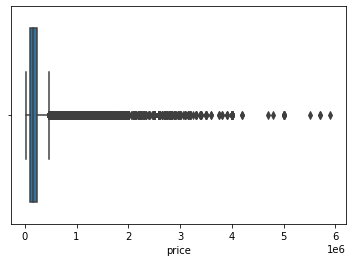

In [ ]:
import seaborn as sns
sns.boxplot(df['price'])

In [ ]:
df.dtypes

id                  object
start_date          object
end_date            object
created_on          object
lat                float64
lon                float64
l3                  object
rooms               object
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
price_period        object
title               object
description         object
property_type       object
operation_type      object
cambio             float64
ambientes           object
dormitorios         object
baños               object
dtype: object

In [ ]:
df['bedrooms'] = df['bedrooms'].astype('float')
df['rooms'] = df['rooms'].astype('float')
df['bathrooms'] = df['bathrooms'].astype('float')

In [ ]:
df.reset_index(inplace = True, drop = True)

In [ ]:
df.shape

(97195, 23)

In [ ]:
df[df['description'].str.contains('monoambiente ', regex = True, na = False)]['bedrooms'].value_counts()

0.00     5092
2.00      100
3.00       39
4.00        7
5.00        2
1.00        2
10.00       1
Name: bedrooms, dtype: int64

In [ ]:
df[(df['description'].str.contains('monoambiente ', regex = True, na = False)) & (df['bedrooms'] == 10)]

,id,start_date,end_date,created_on,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,cambio,ambientes,dormitorios,baños
37578,z7l1Iwc0lsl6kcg21Ncpvw==,2020-06-11,9999-12-31,2020-06-11,-34.59,-58.43,palermo,1.00,10.00,1.00,NaN,NaN,680000.00,USD,NaN,PH en venta de 10 dormitorios en Palermo,venta en block o terreno en palermo soho capi...,PH,Venta,69.31,3,NaN,NaN


In [ ]:
df['bedrooms'] = np.where((df['description'].str.contains('monoambiente ', regex = True, na = False)) & (df['bedrooms'] == 1), 0, df['bedrooms'])

In [ ]:
# para los casos donde la superficie cubierta es mayor a la total, se intercambian los valores
df['surface_total'], df['surface_covered'] = np.where(df['surface_total'] < df['surface_covered'],
                                                      (df['surface_covered'], df['surface_total']),
                                                      (df['surface_total'], df['surface_covered']))

In [ ]:
df.isna().sum()

id                     0
start_date             0
end_date               0
created_on             0
lat                    0
lon                    0
l3                     0
rooms               2138
bedrooms           14816
bathrooms           3880
surface_total      31433
surface_covered    30623
price                  0
currency               0
price_period       51890
title                  0
description            0
property_type          0
operation_type         0
cambio                 0
ambientes          47052
dormitorios        82369
baños              89830
dtype: int64

### Imputación de los valores faltantes por el vecino más cercano

In [ ]:
df.shape

(97195, 23)

In [ ]:
df.isna().sum()

id                     0
start_date             0
end_date               0
created_on             0
lat                    0
lon                    0
l3                     0
rooms               2138
bedrooms           14816
bathrooms           3880
surface_total      31433
surface_covered    30623
price                  0
currency               0
price_period       51890
title                  0
description            0
property_type          0
operation_type         0
cambio                 0
ambientes          47052
dormitorios        82369
baños              89830
dtype: int64

In [ ]:
df.columns

Index(['id', 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'price_period', 'title', 'description',
       'property_type', 'operation_type', 'cambio', 'ambientes', 'dormitorios',
       'baños'],
      dtype='object')

In [ ]:
df_acot = df.drop(['start_date', 'end_date', 'created_on', 'currency', 'price_period', 'title',
                   'operation_type', 'cambio', 'ambientes', 'dormitorios', 'baños'], axis = 1)

In [ ]:
df_acot.dtypes

id                  object
lat                float64
lon                float64
l3                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
description         object
property_type       object
dtype: object

In [ ]:
df_acot['lon'] = df_acot['lon'].astype('float64')
df_acot['lat'] = df_acot['lat'].astype('float64')

In [ ]:
df_acot['l3'] = np.where(df_acot['l3'] == 'nan', np.nan, df_acot['l3'])

In [ ]:
l3 = df_acot['l3'].astype('category')
prop = df_acot['property_type'].astype('category')

In [ ]:
l = dict(enumerate(l3.cat.categories))
p = dict(enumerate(prop.cat.categories))

In [ ]:
l

{0: 'agronomia',
 1: 'almagro',
 2: 'balvanera',
 3: 'barracas',
 4: 'belgrano',
 5: 'boedo',
 6: 'caballito',
 7: 'chacarita',
 8: 'coghlan',
 9: 'colegiales',
 10: 'constitucion',
 11: 'flores',
 12: 'floresta',
 13: 'la boca',
 14: 'liniers',
 15: 'lugano',
 16: 'mataderos',
 17: 'monserrat',
 18: 'monte castro',
 19: 'nueva pompeya',
 20: 'nuñez',
 21: 'palermo',
 22: 'parque avellaneda',
 23: 'parque chacabuco',
 24: 'parque chas',
 25: 'parque patricios',
 26: 'paternal',
 27: 'puerto madero',
 28: 'recoleta',
 29: 'retiro',
 30: 'saavedra',
 31: 'san cristobal',
 32: 'san nicolas',
 33: 'san telmo',
 34: 'velez sarsfield',
 35: 'versalles',
 36: 'villa crespo',
 37: 'villa del parque',
 38: 'villa devoto',
 39: 'villa general mitre',
 40: 'villa luro',
 41: 'villa ortuzar',
 42: 'villa pueyrredon',
 43: 'villa real',
 44: 'villa riachuelo',
 45: 'villa santa rita',
 46: 'villa soldati',
 47: 'villa urquiza'}

In [ ]:
df_acot['l3'] = df_acot['l3'].astype('category').cat.codes
df_acot['property_type'] = df_acot['property_type'].astype('category').cat.codes

In [ ]:
df_acot['l3'] = np.where(df_acot['l3'] == -1, np.nan, df_acot['l3'])

In [ ]:
df_acot.dtypes

id                  object
lat                float64
lon                float64
l3                 float64
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
description         object
property_type         int8
dtype: object

In [ ]:
# Carga de librerías
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer 
from sklearn.preprocessing import StandardScaler

In [ ]:
df_acot.columns

Index(['id', 'lat', 'lon', 'l3', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'description',
       'property_type'],
      dtype='object')

In [ ]:
#Estandarizamos el conjunto de datos, menos la variable respuesta
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_acot.drop(['id', 'price', 'description'], axis = 1).to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns = df_acot.drop(['id', 'price', 'description'], axis = 1).columns)

In [ ]:
#realizamos la imputación
imp = KNNImputer(n_neighbors = 5, weights = 'distance')  
temp = imp.fit_transform(df_scaled)
df_imp = pd.DataFrame(temp, columns = df_acot.drop(['id', 'price', 'description'], axis = 1).columns)

In [ ]:
#Desestandarizamos las variabless y le asignamos nombres a las columnas
df_imp_ = scaler.inverse_transform(df_imp)
df_imp_ = pd.DataFrame(df_imp_, columns=df_imp.columns)
df_imp_.head()

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type
0,-34.61,-58.40,2.00,3.00,2.00,1.00,61.90,59.14,0.00
1,-34.59,-58.38,28.00,4.00,2.00,2.00,187.00,187.00,0.00
2,-34.64,-58.52,14.00,1.00,0.00,1.00,43.00,30.00,0.00
3,-34.58,-58.49,47.00,3.00,2.00,2.00,75.00,68.00,0.00
4,-34.57,-58.46,4.00,1.00,3.00,1.00,43.88,40.34,0.00


In [ ]:
df_imp_['l3'] = round(df_imp_['l3'], 0)
df_imp_['property_type'] = round(df_imp_['property_type'], 0)
df_imp_['rooms'] = round(df_imp_['rooms'], 0)
df_imp_['bedrooms'] = round(df_imp_['bedrooms'], 0)
df_imp_['bathrooms'] = round(df_imp_['bathrooms'], 0)

In [ ]:
df_imp_.reset_index(drop = True, inplace = True)
df_acot.reset_index(drop = True, inplace = True)
df.reset_index(drop = True, inplace = True)

In [ ]:
df_imp_['id'] = df_acot['id']
df_imp_['price'] = df_acot['price']
df_imp_['description'] = df['description']

In [ ]:
df_imp_.shape

(97195, 12)

In [ ]:
df_imp_ = df_imp_.replace({'l3': l, 'property_type': p})
df_imp_.head()

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,id,price,description
0,-34.61,-58.40,balvanera,3.00,2.00,1.00,61.90,59.14,Departamento,20dlUrbZUprl5dJqvoDFfA==,110000.00,venta de departamento 3 ambientes en balvanera...
1,-34.59,-58.38,recoleta,4.00,2.00,2.00,187.00,187.00,Departamento,Mld7HLELakUNew3ParJwqQ==,570000.00,solicitar archivo de fotos <br> <br>living y c...
2,-34.64,-58.52,liniers,1.00,0.00,1.00,43.00,30.00,Departamento,+gTlHBXSTyDNVlOTaYswTQ==,69500.00,venta monoambiente al contrafrente con patio.<...
3,-34.58,-58.49,villa urquiza,3.00,2.00,2.00,75.00,68.00,Departamento,A5q/RsQ0iQW9q70MPX6yQQ==,259000.00,departamento en venta 3 ambientes en villa urq...
4,-34.57,-58.46,belgrano,1.00,3.00,1.00,43.88,40.34,Departamento,gq3YhI+FwfowTwaebzalMw==,325000.00,magnifico departamento en la mejor esquina de...


In [ ]:
df_imp_.isna().sum()

lat                0
lon                0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
property_type      0
id                 0
price              0
description        0
dtype: int64

In [ ]:
df_imp_['precio_mm2'] = df_imp_['price']/df_imp_['surface_total']

In [ ]:
df_imp_[['l3', 'price']].groupby('l3').mean().sort_values(by = 'price', ascending = False)

,price
l3,
puerto madero,889311.54
belgrano,319488.28
palermo,315831.48
recoleta,307229.46
retiro,292242.71
nuñez,264819.29
colegiales,189731.42
villa devoto,182509.69
caballito,181304.69


### Creación de atributos

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["aire_acond"] = df_imp_['description'].str.contains('aire acondicionado', na = False)

#recodificamos
df_imp_['aire_acond'] = [1 if i==True else 0 for i in df_imp_['aire_acond']]

In [ ]:
df_imp_['aire_acond'].value_counts()

0    77578
1    19617
Name: aire_acond, dtype: int64

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["terraza"] = df_imp_['description'].str.contains('terraza', na = False)

#recodificamos
df_imp_['terraza'] = [1 if i==True else 0 for i in df_imp_['terraza']]

In [ ]:
df_imp_['terraza'].value_counts()

0    68387
1    28808
Name: terraza, dtype: int64

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["pileta"] = df_imp_['description'].str.contains('pileta', na = False)

#recodificamos
df_imp_['pileta'] = [1 if i==True else 0 for i in df_imp_['pileta']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["parrilla"] = df_imp_['description'].str.contains('parrilla', na = False)

#recodificamos
df_imp_['parrilla'] = [1 if i==True else 0 for i in df_imp_['parrilla']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["gimnasio"] = df_imp_['description'].str.contains('gimnasio', na = False)

#recodificamos
df_imp_['gimnasio'] = [1 if i==True else 0 for i in df_imp_['gimnasio']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["lavadero"] = df_imp_['description'].str.contains('lavadero', na = False)

#recodificamos
df_imp_['lavadero'] = [1 if i==True else 0 for i in df_imp_['lavadero']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["balcon"] = df_imp_['description'].str.contains('balcon', na = False)

#recodificamos
df_imp_['balcon'] = [1 if i==True else 0 for i in df_imp_['balcon']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["quincho"] = df_imp_['description'].str.contains('quincho', na = False)

#recodificamos
df_imp_['quincho'] = [1 if i==True else 0 for i in df_imp_['quincho']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["patio"] = df_imp_['description'].str.contains('patio', na = False)

#recodificamos
df_imp_['patio'] = [1 if i==True else 0 for i in df_imp_['patio']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["vigilancia"] = df_imp_['description'].str.contains('vigilancia', na = False)

#recodificamos
df_imp_['vigilancia'] = [1 if i==True else 0 for i in df_imp_['vigilancia']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["financiacion"] = df_imp_['description'].str.contains('financiacion', na = False)

#recodificamos
df_imp_['financiacion'] = [1 if i==True else 0 for i in df_imp_['financiacion']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["ascensor"] = df_imp_['description'].str.contains('ascensor', na = False)

#recodificamos
df_imp_['ascensor'] = [1 if i==True else 0 for i in df_imp_['ascensor']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["toilett"] = df_imp_['description'].str.contains('toilett', na = False)

#recodificamos
df_imp_['toilett'] = [1 if i==True else 0 for i in df_imp_['toilett']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["cochera"] = df_imp_['description'].str.contains('cochera', na = False)

#recodificamos
df_imp_['cochera'] = [1 if i==True else 0 for i in df_imp_['cochera']]

In [ ]:
df_imp_.description

0        venta de departamento 3 ambientes en balvanera...
1        solicitar archivo de fotos <br> <br>living y c...
2        venta monoambiente al contrafrente con patio.<...
3        departamento en venta 3 ambientes en villa urq...
4        magnifico departamento en la  mejor esquina de...
                               ...                        
97190    santa fe 3300.<br>palermo. <br><br>5 ambientes...
97191    contar con tu propio lugar  ya sea para vivir ...
97192    el mejor 3 ambientes de villa urquiza.   excel...
97193     hermoso  ph en el barrio de  boedo a  media c...
97194    triplex de cuatro ambientesa estrenar. frente....
Name: description, Length: 97195, dtype: object

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["sin_expensas"] = df_imp_['description'].str.contains('sin expensas', na = False)

#recodificamos
df_imp_['sin_expensas'] = [1 if i==True else 0 for i in df_imp_['sin_expensas']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["amenities"] = df_imp_['description'].str.contains('amenities', na = False)

#recodificamos
df_imp_['amenities'] = [1 if i==True else 0 for i in df_imp_['amenities']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["subte"] = df_imp_['description'].str.contains('subte', na = False)

#recodificamos
df_imp_['subte'] = [1 if i==True else 0 for i in df_imp_['subte']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["colectivo"] = df_imp_['description'].str.contains('colectivo', na = False)

#recodificamos
df_imp_['colectivo'] = [1 if i==True else 0 for i in df_imp_['colectivo']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["encargado"] = df_imp_['description'].str.contains('encargado', na = False)

#recodificamos
df_imp_['encargado'] = [1 if i==True else 0 for i in df_imp_['encargado']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["seguridad"] = df_imp_['description'].str.contains('seguridad', na = False)

#recodificamos
df_imp_['seguridad'] = [1 if i==True else 0 for i in df_imp_['seguridad']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["living_comedor"] = df_imp_['description'].str.contains('living comedor', na = False)

#recodificamos
df_imp_['living_comedor'] = [1 if i==True else 0 for i in df_imp_['living_comedor']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["baño_completo"] = df_imp_['description'].str.contains('baño completo', na = False)

#recodificamos
df_imp_['baño_completo'] = [1 if i==True else 0 for i in df_imp_['baño_completo']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["corredor_responsable"] = df_imp_['description'].str.contains('corredor responsable', na = False)

#recodificamos
df_imp_['corredor_responsable'] = [1 if i==True else 0 for i in df_imp_['corredor_responsable']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["luminoso"] = df_imp_['description'].str.contains('luminoso', na = False)

#recodificamos
df_imp_['luminoso'] = [1 if i==True else 0 for i in df_imp_['luminoso']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["madera"] = df_imp_['description'].str.contains('madera', na = False)

#recodificamos
df_imp_['madera'] = [1 if i==True else 0 for i in df_imp_['madera']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["vestidor"] = df_imp_['description'].str.contains('vestidor', na = False)

#recodificamos
df_imp_['vestidor'] = [1 if i==True else 0 for i in df_imp_['vestidor']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["baulera"] = df_imp_['description'].str.contains('baulera', na = False)

#recodificamos
df_imp_['baulera'] = [1 if i==True else 0 for i in df_imp_['baulera']]

In [ ]:
df_imp_['ratio_sups'] = df_imp_['surface_covered'] / df_imp_['surface_total']

In [ ]:
df_imp_['ratio_rooms_sc'] = df_imp_['rooms'] / df_imp_['surface_covered']

In [ ]:
df_imp_['len_desc'] = df_imp_['description'].apply(len)

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["laundry"] = df_imp_['description'].str.contains('laundry', na = False)

#recodificamos
df_imp_['laundry'] = [1 if i==True else 0 for i in df_imp_['laundry']]

In [ ]:
df_imp_.shape

(97195, 44)

### Precio mm2

In [ ]:
mm = pd.read_csv('/content/drive/MyDrive/Final_fundamentos/INDEX_CABA_VENTA_INDEX_Tabla.csv')
mm = mm.loc[:, ['BARRIO', 'ESTRENAR', 'USADO']]

In [ ]:
mm.dtypes

BARRIO      object
ESTRENAR    object
USADO        int64
dtype: object

In [ ]:
mm['ESTRENAR'] = mm['ESTRENAR'].replace('-', np.nan)
mm['ESTRENAR'] = mm['ESTRENAR'].astype('float')
mm['USADO'] = mm['USADO'].astype('float')

In [ ]:
mm['prom'] = mm[['ESTRENAR', 'USADO']].mean(axis = 1)
#aplicación
mm['BARRIO'] = mm.BARRIO.map(normalize)
mm.head()

,BARRIO,ESTRENAR,USADO,prom
0,puerto madero,6208.00,5600.00,5904.00
1,palermo,3469.00,3234.00,3351.50
2,belgrano,3539.00,3013.00,3276.00
3,nuñez,3136.00,2982.00,3059.00
4,recoleta,3207.00,2917.00,3062.00


In [ ]:
mm['BARRIO'] = np.where(mm['BARRIO'] == 'santa rita', 'villa santa rita', mm['BARRIO'])

In [ ]:
#Sumamos localidades faltantes
mm = mm.append({'BARRIO' : 'villa general mitre' , 'prom' : '1872.00'} , ignore_index=True)

In [ ]:
mm['prom'] = mm['prom'].astype('float64')

In [ ]:
#Buscamos el dato de mm2 según el barrio
df_imp_['mm2_precio'] = df_imp_['l3'].map(dict(zip(mm['BARRIO'], mm['prom'])))

In [ ]:
df_imp_.isna().sum()

lat                     0
lon                     0
l3                      0
rooms                   0
bedrooms                0
bathrooms               0
surface_total           0
surface_covered         0
property_type           0
id                      0
price                   0
description             0
precio_mm2              0
aire_acond              0
terraza                 0
pileta                  0
parrilla                0
gimnasio                0
lavadero                0
balcon                  0
quincho                 0
patio                   0
vigilancia              0
financiacion            0
ascensor                0
toilett                 0
cochera                 0
sin_expensas            0
amenities               0
subte                   0
colectivo               0
encargado               0
seguridad               0
living_comedor          0
baño_completo           0
corredor_responsable    0
luminoso                0
madera                  0
vestidor    

### Subtes

In [ ]:
!wget https://cdn.buenosaires.gob.ar/datosabiertos/datasets/sbase/subte-estaciones/estaciones-de-subte.csv

--2022-09-07 23:43:43--  https://cdn.buenosaires.gob.ar/datosabiertos/datasets/sbase/subte-estaciones/estaciones-de-subte.csv
Resolving cdn.buenosaires.gob.ar (cdn.buenosaires.gob.ar)... 200.16.89.97
Connecting to cdn.buenosaires.gob.ar (cdn.buenosaires.gob.ar)|200.16.89.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5238 (5.1K) [text/csv]
Saving to: ‘estaciones-de-subte.csv’

estaciones-de-subte 100%[===================>]   5.12K  --.-KB/s    in 0s      

2022-09-07 23:43:44 (62.8 MB/s) - ‘estaciones-de-subte.csv’ saved [5238/5238]



In [ ]:
estaciones=pd.read_csv("/content/estaciones-de-subte.csv")

In [ ]:
estaciones.head(20)

,long,lat,id,estacion,linea
0,-58.40,-34.64,1.00,CASEROS,H
1,-58.40,-34.63,2.00,INCLAN - MEZQUITA AL AHMAD,H
2,-58.40,-34.62,3.00,HUMBERTO 1°,H
3,-58.40,-34.62,4.00,VENEZUELA,H
4,-58.41,-34.61,5.00,ONCE - 30 DE DICIEMBRE,H
5,-58.38,-34.60,6.00,9 DE JULIO,D
6,-58.40,-34.60,7.00,FACULTAD DE MEDICINA,D
7,-58.39,-34.60,8.00,TRIBUNALES - TEATRO COLÓN,D
8,-58.41,-34.59,9.00,AGÜERO,D
9,-58.42,-34.59,10.00,R.SCALABRINI ORTIZ,D


In [ ]:
import math

In [ ]:
from numpy import cos, sin
import math
#en el conjunto de datos de las estaciones, calculamos cos((Lat1 * 3,141592654)/180)) y cos((Long1 * 3,141592654)/180)) y también el seno

estaciones['long_1'] = (estaciones['long'] * math.pi)/180

estaciones['LAT1_cos'] = cos((estaciones['lat'] * math.pi)/180)

estaciones['LONG1_cos'] = cos((estaciones['long'] * math.pi)/180)

estaciones['LAT1_sen'] = sin((estaciones['lat'] * math.pi)/180)

estaciones['LONG1_sen'] = sin((estaciones['long'] * math.pi)/180)

In [ ]:
df_imp_['lon'] = df_imp_['lon'].astype('float')
df_imp_['lat'] = df_imp_['lat'].astype('float')

In [ ]:
#en el conjunto de datos, calculamos lo mismo

df_imp_['longitud_1']=(df_imp_['lon']*math.pi)/180

df_imp_['LATITUD_cos']= cos((df_imp_['lat']*math.pi)/180)

df_imp_['LONGITUD_cos']=cos((df_imp_['lon']*math.pi)/180)

df_imp_['LATITUD_sen']= sin((df_imp_['lat']*math.pi)/180)

df_imp_['LONGITUD_sen']=sin((df_imp_['lon']*math.pi)/180)

In [ ]:
df_imp_.head()

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,id,price,description,precio_mm2,aire_acond,terraza,pileta,parrilla,gimnasio,lavadero,balcon,quincho,patio,vigilancia,financiacion,ascensor,toilett,cochera,sin_expensas,amenities,subte,colectivo,encargado,seguridad,living_comedor,baño_completo,corredor_responsable,luminoso,madera,vestidor,baulera,ratio_sups,ratio_rooms_sc,len_desc,laundry,mm2_precio,longitud_1,LATITUD_cos,LONGITUD_cos,LATITUD_sen,LONGITUD_sen
0,-34.61,-58.40,balvanera,3.00,2.00,1.00,61.90,59.14,Departamento,20dlUrbZUprl5dJqvoDFfA==,110000.00,venta de departamento 3 ambientes en balvanera...,1777.15,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0.96,0.05,1655,0,2166.50,-1.02,0.82,0.52,-0.57,-0.85
1,-34.59,-58.38,recoleta,4.00,2.00,2.00,187.00,187.00,Departamento,Mld7HLELakUNew3ParJwqQ==,570000.00,solicitar archivo de fotos <br> <br>living y c...,3048.13,0,1,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,1,1.00,0.02,1580,0,3062.00,-1.02,0.82,0.52,-0.57,-0.85
2,-34.64,-58.52,liniers,1.00,0.00,1.00,43.00,30.00,Departamento,+gTlHBXSTyDNVlOTaYswTQ==,69500.00,venta monoambiente al contrafrente con patio.<...,1616.28,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.70,0.03,487,0,2263.50,-1.02,0.82,0.52,-0.57,-0.85
3,-34.58,-58.49,villa urquiza,3.00,2.00,2.00,75.00,68.00,Departamento,A5q/RsQ0iQW9q70MPX6yQQ==,259000.00,departamento en venta 3 ambientes en villa urq...,3453.33,0,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0.91,0.04,1496,0,2802.00,-1.02,0.82,0.52,-0.57,-0.85
4,-34.57,-58.46,belgrano,1.00,3.00,1.00,43.88,40.34,Departamento,gq3YhI+FwfowTwaebzalMw==,325000.00,magnifico departamento en la mejor esquina de...,7406.48,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.92,0.02,806,0,3276.00,-1.02,0.82,0.52,-0.57,-0.85


In [ ]:
#ahora, del conjunto de datos estaciones, solo nos quedamos con las variables recién calculadas

estaciones_1= estaciones.iloc[:,[5,6,7,8,9]]

In [ ]:
len(estaciones_1)

90

In [ ]:
#por cada registro del conjunto de datos (cada propiedad), se debe calcular la distancia a cada estación
#para eso, al conjunto de datos estaciones_1, le agregamos las 4 columnas traspuestas de las latitud y longitud recalculadas previamente.
#Cada una de estas columnas debe repetir el valor 90 veces, siendo el largo del conjunto estaciones_1

df_imp_.columns

Index(['lat', 'lon', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'property_type', 'id', 'price', 'description',
       'precio_mm2', 'aire_acond', 'terraza', 'pileta', 'parrilla', 'gimnasio',
       'lavadero', 'balcon', 'quincho', 'patio', 'vigilancia', 'financiacion',
       'ascensor', 'toilett', 'cochera', 'sin_expensas', 'amenities', 'subte',
       'colectivo', 'encargado', 'seguridad', 'living_comedor',
       'baño_completo', 'corredor_responsable', 'luminoso', 'madera',
       'vestidor', 'baulera', 'ratio_sups', 'ratio_rooms_sc', 'len_desc',
       'laundry', 'mm2_precio', 'longitud_1', 'LATITUD_cos', 'LONGITUD_cos',
       'LATITUD_sen', 'LONGITUD_sen'],
      dtype='object')

In [ ]:
#nso quedamos solo con las columnas que calculamos en data
prop_temp = pd.DataFrame(df_imp_.loc[:,['longitud_1', 'LATITUD_cos', 'LONGITUD_cos', 'LATITUD_sen', 'LONGITUD_sen']])
prop_temp

,longitud_1,LATITUD_cos,LONGITUD_cos,LATITUD_sen,LONGITUD_sen
0,-1.02,0.82,0.52,-0.57,-0.85
1,-1.02,0.82,0.52,-0.57,-0.85
2,-1.02,0.82,0.52,-0.57,-0.85
3,-1.02,0.82,0.52,-0.57,-0.85
4,-1.02,0.82,0.52,-0.57,-0.85
...,...,...,...,...,...
97190,-1.02,0.82,0.52,-0.57,-0.85
97191,-1.02,0.82,0.52,-0.57,-0.85
97192,-1.02,0.82,0.52,-0.57,-0.85
97193,-1.02,0.82,0.52,-0.57,-0.85


In [ ]:
#le pegamos cada columna de estaciones_1, traspuesta (una columna por cada estación), repitiendo el valor 10 mil veces que es el largo de prop_temp

import pandas as pd
LAT1_cos = pd.DataFrame.transpose(pd.DataFrame(estaciones_1['LAT1_cos']))

In [ ]:
LAT1_cos.shape

(1, 90)

In [ ]:
LAT1_cos.columns=['H1.0LAT1_cos','H2.0LAT1_cos','H3.0LAT1_cos','H4.0LAT1_cos','H5.0LAT1_cos','D6.0LAT1_cos','D7.0LAT1_cos','D8.0LAT1_cos',
                  'D9.0LAT1_cos','D10.0LAT1_cos','D11.0LAT1_cos','D12.0LAT1_cos','C13.0LAT1_cos','C14.0LAT1_cos','C15.0LAT1_cos','C16.0LAT1_cos',
                  'C17.0LAT1_cos','C18.0LAT1_cos','C19.0LAT1_cos','B20.0LAT1_cos','B21.0LAT1_cos','B22.0LAT1_cos','B23.0LAT1_cos','B24.0LAT1_cos',
                  'B25.0LAT1_cos','B26.0LAT1_cos','B27.0LAT1_cos','B28.0LAT1_cos','B29.0LAT1_cos','B30.0LAT1_cos','A31.0LAT1_cos','A32.0LAT1_cos',
                  'A33.0LAT1_cos','A34.0LAT1_cos','A35.0LAT1_cos','A36.0LAT1_cos','A37.0LAT1_cos','A38.0LAT1_cos','A39.0LAT1_cos','A40.0LAT1_cos',
                  'A41.0LAT1_cos','A42.0LAT1_cos','A43.0LAT1_cos','E44.0LAT1_cos','E45.0LAT1_cos','E46.0LAT1_cos','E47.0LAT1_cos','E48.0LAT1_cos',
                  'E49.0LAT1_cos','E50.0LAT1_cos','E51.0LAT1_cos','E52.0LAT1_cos','E53.0LAT1_cos','D54.0LAT1_cos','D55.0LAT1_cos','D56.0LAT1_cos',
                  'C57.0LAT1_cos','C58.0LAT1_cos','E59.0LAT1_cos','E60.0LAT1_cos','E61.0LAT1_cos','D62.0LAT1_cos','D63.0LAT1_cos','D64.0LAT1_cos',
                  'D65.0LAT1_cos','B66.0LAT1_cos','E67.0LAT1_cos','E68.0LAT1_cos','D69.0LAT1_cos','A70.0LAT1_cos','D71.0LAT1_cos','B72.0LAT1_cos',
                  'B73.0LAT1_cos','B74.0LAT1_cos','A75.0LAT1_cos','A76.0LAT1_cos','H77.0LAT1_cos','H78.0LAT1_cos','H79.0LAT1_cos','B80.0LAT1_cos',
                  'B81.0LAT1_cos','A83.0LAT1_cos','A82.0LAT1_cos','H84.0LAT1_cos','H85.0LAT1_cos','H86.0LAT1_cos','H87.0LAT1_cos','E90.0LAT1_cos',
                  'E89.0LAT1_cos','E88.0LAT1_cos']

In [ ]:
LAT1_cos.shape

(1, 90)

In [ ]:
LAT1_cos

,H1.0LAT1_cos,H2.0LAT1_cos,H3.0LAT1_cos,H4.0LAT1_cos,H5.0LAT1_cos,D6.0LAT1_cos,D7.0LAT1_cos,D8.0LAT1_cos,D9.0LAT1_cos,D10.0LAT1_cos,D11.0LAT1_cos,D12.0LAT1_cos,C13.0LAT1_cos,C14.0LAT1_cos,C15.0LAT1_cos,C16.0LAT1_cos,C17.0LAT1_cos,C18.0LAT1_cos,C19.0LAT1_cos,B20.0LAT1_cos,B21.0LAT1_cos,B22.0LAT1_cos,B23.0LAT1_cos,B24.0LAT1_cos,B25.0LAT1_cos,B26.0LAT1_cos,B27.0LAT1_cos,B28.0LAT1_cos,B29.0LAT1_cos,B30.0LAT1_cos,A31.0LAT1_cos,A32.0LAT1_cos,A33.0LAT1_cos,A34.0LAT1_cos,A35.0LAT1_cos,A36.0LAT1_cos,A37.0LAT1_cos,A38.0LAT1_cos,A39.0LAT1_cos,A40.0LAT1_cos,A41.0LAT1_cos,A42.0LAT1_cos,A43.0LAT1_cos,E44.0LAT1_cos,E45.0LAT1_cos,E46.0LAT1_cos,E47.0LAT1_cos,E48.0LAT1_cos,E49.0LAT1_cos,E50.0LAT1_cos,E51.0LAT1_cos,E52.0LAT1_cos,E53.0LAT1_cos,D54.0LAT1_cos,D55.0LAT1_cos,D56.0LAT1_cos,C57.0LAT1_cos,C58.0LAT1_cos,E59.0LAT1_cos,E60.0LAT1_cos,E61.0LAT1_cos,D62.0LAT1_cos,D63.0LAT1_cos,D64.0LAT1_cos,D65.0LAT1_cos,B66.0LAT1_cos,E67.0LAT1_cos,E68.0LAT1_cos,D69.0LAT1_cos,A70.0LAT1_cos,D71.0LAT1_cos,B72.0LAT1_cos,B73.0LAT1_cos,B74.0LAT1_cos,A75.0LAT1_cos,A76.0LAT1_cos,H77.0LAT1_cos,H78.0LAT1_cos,H79.0LAT1_cos,B80.0LAT1_cos,B81.0LAT1_cos,A83.0LAT1_cos,A82.0LAT1_cos,H84.0LAT1_cos,H85.0LAT1_cos,H86.0LAT1_cos,H87.0LAT1_cos,E90.0LAT1_cos,E89.0LAT1_cos,E88.0LAT1_cos
LAT1_cos,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82


In [ ]:
import numpy as np
LAT1_cos = pd.DataFrame(LAT1_cos.loc[np.repeat(LAT1_cos.index.values, 97195)])
LAT1_cos

,H1.0LAT1_cos,H2.0LAT1_cos,H3.0LAT1_cos,H4.0LAT1_cos,H5.0LAT1_cos,D6.0LAT1_cos,D7.0LAT1_cos,D8.0LAT1_cos,D9.0LAT1_cos,D10.0LAT1_cos,D11.0LAT1_cos,D12.0LAT1_cos,C13.0LAT1_cos,C14.0LAT1_cos,C15.0LAT1_cos,C16.0LAT1_cos,C17.0LAT1_cos,C18.0LAT1_cos,C19.0LAT1_cos,B20.0LAT1_cos,B21.0LAT1_cos,B22.0LAT1_cos,B23.0LAT1_cos,B24.0LAT1_cos,B25.0LAT1_cos,B26.0LAT1_cos,B27.0LAT1_cos,B28.0LAT1_cos,B29.0LAT1_cos,B30.0LAT1_cos,A31.0LAT1_cos,A32.0LAT1_cos,A33.0LAT1_cos,A34.0LAT1_cos,A35.0LAT1_cos,A36.0LAT1_cos,A37.0LAT1_cos,A38.0LAT1_cos,A39.0LAT1_cos,A40.0LAT1_cos,A41.0LAT1_cos,A42.0LAT1_cos,A43.0LAT1_cos,E44.0LAT1_cos,E45.0LAT1_cos,E46.0LAT1_cos,E47.0LAT1_cos,E48.0LAT1_cos,E49.0LAT1_cos,E50.0LAT1_cos,E51.0LAT1_cos,E52.0LAT1_cos,E53.0LAT1_cos,D54.0LAT1_cos,D55.0LAT1_cos,D56.0LAT1_cos,C57.0LAT1_cos,C58.0LAT1_cos,E59.0LAT1_cos,E60.0LAT1_cos,E61.0LAT1_cos,D62.0LAT1_cos,D63.0LAT1_cos,D64.0LAT1_cos,D65.0LAT1_cos,B66.0LAT1_cos,E67.0LAT1_cos,E68.0LAT1_cos,D69.0LAT1_cos,A70.0LAT1_cos,D71.0LAT1_cos,B72.0LAT1_cos,B73.0LAT1_cos,B74.0LAT1_cos,A75.0LAT1_cos,A76.0LAT1_cos,H77.0LAT1_cos,H78.0LAT1_cos,H79.0LAT1_cos,B80.0LAT1_cos,B81.0LAT1_cos,A83.0LAT1_cos,A82.0LAT1_cos,H84.0LAT1_cos,H85.0LAT1_cos,H86.0LAT1_cos,H87.0LAT1_cos,E90.0LAT1_cos,E89.0LAT1_cos,E88.0LAT1_cos
LAT1_cos,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
LAT1_cos,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
LAT1_cos,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
LAT1_cos,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
LAT1_cos,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAT1_cos,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,

In [ ]:
LAT1_cos=LAT1_cos.reset_index(drop=True)
LAT1_cos

,H1.0LAT1_cos,H2.0LAT1_cos,H3.0LAT1_cos,H4.0LAT1_cos,H5.0LAT1_cos,D6.0LAT1_cos,D7.0LAT1_cos,D8.0LAT1_cos,D9.0LAT1_cos,D10.0LAT1_cos,D11.0LAT1_cos,D12.0LAT1_cos,C13.0LAT1_cos,C14.0LAT1_cos,C15.0LAT1_cos,C16.0LAT1_cos,C17.0LAT1_cos,C18.0LAT1_cos,C19.0LAT1_cos,B20.0LAT1_cos,B21.0LAT1_cos,B22.0LAT1_cos,B23.0LAT1_cos,B24.0LAT1_cos,B25.0LAT1_cos,B26.0LAT1_cos,B27.0LAT1_cos,B28.0LAT1_cos,B29.0LAT1_cos,B30.0LAT1_cos,A31.0LAT1_cos,A32.0LAT1_cos,A33.0LAT1_cos,A34.0LAT1_cos,A35.0LAT1_cos,A36.0LAT1_cos,A37.0LAT1_cos,A38.0LAT1_cos,A39.0LAT1_cos,A40.0LAT1_cos,A41.0LAT1_cos,A42.0LAT1_cos,A43.0LAT1_cos,E44.0LAT1_cos,E45.0LAT1_cos,E46.0LAT1_cos,E47.0LAT1_cos,E48.0LAT1_cos,E49.0LAT1_cos,E50.0LAT1_cos,E51.0LAT1_cos,E52.0LAT1_cos,E53.0LAT1_cos,D54.0LAT1_cos,D55.0LAT1_cos,D56.0LAT1_cos,C57.0LAT1_cos,C58.0LAT1_cos,E59.0LAT1_cos,E60.0LAT1_cos,E61.0LAT1_cos,D62.0LAT1_cos,D63.0LAT1_cos,D64.0LAT1_cos,D65.0LAT1_cos,B66.0LAT1_cos,E67.0LAT1_cos,E68.0LAT1_cos,D69.0LAT1_cos,A70.0LAT1_cos,D71.0LAT1_cos,B72.0LAT1_cos,B73.0LAT1_cos,B74.0LAT1_cos,A75.0LAT1_cos,A76.0LAT1_cos,H77.0LAT1_cos,H78.0LAT1_cos,H79.0LAT1_cos,B80.0LAT1_cos,B81.0LAT1_cos,A83.0LAT1_cos,A82.0LAT1_cos,H84.0LAT1_cos,H85.0LAT1_cos,H86.0LAT1_cos,H87.0LAT1_cos,E90.0LAT1_cos,E89.0LAT1_cos,E88.0LAT1_cos
0,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
1,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
2,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
3,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
4,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97190,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.8

In [ ]:
prop_temp.reset_index(drop = True, inplace = True)
prop_temp.shape

(97195, 5)

In [ ]:
LAT1_cos.reset_index(drop = True, inplace = True)
LAT1_cos.shape

(97195, 90)

In [ ]:
cos_test=pd.concat([prop_temp, LAT1_cos], axis=1)

In [ ]:
cos_test

,longitud_1,LATITUD_cos,LONGITUD_cos,LATITUD_sen,LONGITUD_sen,H1.0LAT1_cos,H2.0LAT1_cos,H3.0LAT1_cos,H4.0LAT1_cos,H5.0LAT1_cos,D6.0LAT1_cos,D7.0LAT1_cos,D8.0LAT1_cos,D9.0LAT1_cos,D10.0LAT1_cos,D11.0LAT1_cos,D12.0LAT1_cos,C13.0LAT1_cos,C14.0LAT1_cos,C15.0LAT1_cos,C16.0LAT1_cos,C17.0LAT1_cos,C18.0LAT1_cos,C19.0LAT1_cos,B20.0LAT1_cos,B21.0LAT1_cos,B22.0LAT1_cos,B23.0LAT1_cos,B24.0LAT1_cos,B25.0LAT1_cos,B26.0LAT1_cos,B27.0LAT1_cos,B28.0LAT1_cos,B29.0LAT1_cos,B30.0LAT1_cos,A31.0LAT1_cos,A32.0LAT1_cos,A33.0LAT1_cos,A34.0LAT1_cos,A35.0LAT1_cos,A36.0LAT1_cos,A37.0LAT1_cos,A38.0LAT1_cos,A39.0LAT1_cos,A40.0LAT1_cos,A41.0LAT1_cos,A42.0LAT1_cos,A43.0LAT1_cos,E44.0LAT1_cos,E45.0LAT1_cos,E46.0LAT1_cos,E47.0LAT1_cos,E48.0LAT1_cos,E49.0LAT1_cos,E50.0LAT1_cos,E51.0LAT1_cos,E52.0LAT1_cos,E53.0LAT1_cos,D54.0LAT1_cos,D55.0LAT1_cos,D56.0LAT1_cos,C57.0LAT1_cos,C58.0LAT1_cos,E59.0LAT1_cos,E60.0LAT1_cos,E61.0LAT1_cos,D62.0LAT1_cos,D63.0LAT1_cos,D64.0LAT1_cos,D65.0LAT1_cos,B66.0LAT1_cos,E67.0LAT1_cos,E68.0LAT1_cos,D69.0LAT1_cos,A70.0LAT1_cos,D71.0LAT1_cos,B72.0LAT1_cos,B73.0LAT1_cos,B74.0LAT1_cos,A75.0LAT1_cos,A76.0LAT1_cos,H77.0LAT1_cos,H78.0LAT1_cos,H79.0LAT1_cos,B80.0LAT1_cos,B81.0LAT1_cos,A83.0LAT1_cos,A82.0LAT1_cos,H84.0LAT1_cos,H85.0LAT1_cos,H86.0LAT1_cos,H87.0LAT1_cos,E90.0LAT1_cos,E89.0LAT1_cos,E88.0LAT1_cos
0,-1.02,0.82,0.52,-0.57,-0.85,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
1,-1.02,0.82,0.52,-0.57,-0.85,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
2,-1.02,0.82,0.52,-0.57,-0.85,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
3,-1.02,0.82,0.52,-0.57,-0.85,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
4,-1.02,0.82,0.52,-0.57,-0.85,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
estaciones_1.columns

Index(['long_1', 'LAT1_cos', 'LONG1_cos', 'LAT1_sen', 'LONG1_sen'], dtype='object')

In [ ]:
#seguimos con las otras
LONG1_cos=pd.DataFrame.transpose(pd.DataFrame(estaciones_1['LONG1_cos']))
LONG1_cos.reset_index(drop = True, inplace = True)
LONG1_cos.columns=['H1.0LONG1_cos','H2.0LONG1_cos','H3.0LONG1_cos','H4.0LONG1_cos','H5.0LONG1_cos','D6.0LONG1_cos','D7.0LONG1_cos','D8.0LONG1_cos','D9.0LONG1_cos','D10.0LONG1_cos','D11.0LONG1_cos','D12.0LONG1_cos','C13.0LONG1_cos','C14.0LONG1_cos','C15.0LONG1_cos','C16.0LONG1_cos','C17.0LONG1_cos','C18.0LONG1_cos','C19.0LONG1_cos','B20.0LONG1_cos','B21.0LONG1_cos','B22.0LONG1_cos','B23.0LONG1_cos','B24.0LONG1_cos','B25.0LONG1_cos','B26.0LONG1_cos','B27.0LONG1_cos','B28.0LONG1_cos','B29.0LONG1_cos','B30.0LONG1_cos','A31.0LONG1_cos','A32.0LONG1_cos','A33.0LONG1_cos','A34.0LONG1_cos','A35.0LONG1_cos','A36.0LONG1_cos','A37.0LONG1_cos','A38.0LONG1_cos','A39.0LONG1_cos','A40.0LONG1_cos','A41.0LONG1_cos','A42.0LONG1_cos','A43.0LONG1_cos','E44.0LONG1_cos','E45.0LONG1_cos','E46.0LONG1_cos','E47.0LONG1_cos','E48.0LONG1_cos','E49.0LONG1_cos','E50.0LONG1_cos','E51.0LONG1_cos','E52.0LONG1_cos','E53.0LONG1_cos','D54.0LONG1_cos','D55.0LONG1_cos','D56.0LONG1_cos','C57.0LONG1_cos','C58.0LONG1_cos','E59.0LONG1_cos','E60.0LONG1_cos','E61.0LONG1_cos','D62.0LONG1_cos','D63.0LONG1_cos','D64.0LONG1_cos','D65.0LONG1_cos','B66.0LONG1_cos','E67.0LONG1_cos','E68.0LONG1_cos','D69.0LONG1_cos','A70.0LONG1_cos','D71.0LONG1_cos','B72.0LONG1_cos','B73.0LONG1_cos','B74.0LONG1_cos','A75.0LONG1_cos','A76.0LONG1_cos','H77.0LONG1_cos','H78.0LONG1_cos','H79.0LONG1_cos','B80.0LONG1_cos','B81.0LONG1_cos','A83.0LONG1_cos','A82.0LONG1_cos','H84.0LONG1_cos','H85.0LONG1_cos','H86.0LONG1_cos','H87.0LONG1_cos','E90.0LONG1_cos','E89.0LONG1_cos','E88.0LONG1_cos']
LONG1_cos=pd.DataFrame(LONG1_cos.loc[np.repeat(LONG1_cos.index.values, 97195)])
LONG1_cos=LONG1_cos.reset_index(drop=True)

In [ ]:
LAT1_sen=pd.DataFrame.transpose(pd.DataFrame(estaciones_1['LAT1_sen']))
LAT1_sen.reset_index(drop = True, inplace = True)
LAT1_sen.columns=['H1.0LAT1_sen','H2.0LAT1_sen','H3.0LAT1_sen','H4.0LAT1_sen','H5.0LAT1_sen','D6.0LAT1_sen','D7.0LAT1_sen','D8.0LAT1_sen','D9.0LAT1_sen','D10.0LAT1_sen','D11.0LAT1_sen','D12.0LAT1_sen','C13.0LAT1_sen','C14.0LAT1_sen','C15.0LAT1_sen','C16.0LAT1_sen','C17.0LAT1_sen','C18.0LAT1_sen','C19.0LAT1_sen','B20.0LAT1_sen','B21.0LAT1_sen','B22.0LAT1_sen','B23.0LAT1_sen','B24.0LAT1_sen','B25.0LAT1_sen','B26.0LAT1_sen','B27.0LAT1_sen','B28.0LAT1_sen','B29.0LAT1_sen','B30.0LAT1_sen','A31.0LAT1_sen','A32.0LAT1_sen','A33.0LAT1_sen','A34.0LAT1_sen','A35.0LAT1_sen','A36.0LAT1_sen','A37.0LAT1_sen','A38.0LAT1_sen','A39.0LAT1_sen','A40.0LAT1_sen','A41.0LAT1_sen','A42.0LAT1_sen','A43.0LAT1_sen','E44.0LAT1_sen','E45.0LAT1_sen','E46.0LAT1_sen','E47.0LAT1_sen','E48.0LAT1_sen','E49.0LAT1_sen','E50.0LAT1_sen','E51.0LAT1_sen','E52.0LAT1_sen','E53.0LAT1_sen','D54.0LAT1_sen','D55.0LAT1_sen','D56.0LAT1_sen','C57.0LAT1_sen','C58.0LAT1_sen','E59.0LAT1_sen','E60.0LAT1_sen','E61.0LAT1_sen','D62.0LAT1_sen','D63.0LAT1_sen','D64.0LAT1_sen','D65.0LAT1_sen','B66.0LAT1_sen','E67.0LAT1_sen','E68.0LAT1_sen','D69.0LAT1_sen','A70.0LAT1_sen','D71.0LAT1_sen','B72.0LAT1_sen','B73.0LAT1_sen','B74.0LAT1_sen','A75.0LAT1_sen','A76.0LAT1_sen','H77.0LAT1_sen','H78.0LAT1_sen','H79.0LAT1_sen','B80.0LAT1_sen','B81.0LAT1_sen','A83.0LAT1_sen','A82.0LAT1_sen','H84.0LAT1_sen','H85.0LAT1_sen','H86.0LAT1_sen','H87.0LAT1_sen','E90.0LAT1_sen','E89.0LAT1_sen','E88.0LAT1_sen']
LAT1_sen=pd.DataFrame(LAT1_sen.loc[np.repeat(LAT1_sen.index.values, 97195)])
LAT1_sen=LAT1_sen.reset_index(drop=True)

In [ ]:
LONG1_sen=pd.DataFrame.transpose(pd.DataFrame(estaciones_1['LONG1_sen']))
LONG1_sen.reset_index(drop = True, inplace = True)
LONG1_sen.columns=['H1.0LONG1_sen','H2.0LONG1_sen','H3.0LONG1_sen','H4.0LONG1_sen','H5.0LONG1_sen','D6.0LONG1_sen','D7.0LONG1_sen','D8.0LONG1_sen','D9.0LONG1_sen','D10.0LONG1_sen','D11.0LONG1_sen','D12.0LONG1_sen','C13.0LONG1_sen','C14.0LONG1_sen','C15.0LONG1_sen','C16.0LONG1_sen','C17.0LONG1_sen','C18.0LONG1_sen','C19.0LONG1_sen','B20.0LONG1_sen','B21.0LONG1_sen','B22.0LONG1_sen','B23.0LONG1_sen','B24.0LONG1_sen','B25.0LONG1_sen','B26.0LONG1_sen','B27.0LONG1_sen','B28.0LONG1_sen','B29.0LONG1_sen','B30.0LONG1_sen','A31.0LONG1_sen','A32.0LONG1_sen','A33.0LONG1_sen','A34.0LONG1_sen','A35.0LONG1_sen','A36.0LONG1_sen','A37.0LONG1_sen','A38.0LONG1_sen','A39.0LONG1_sen','A40.0LONG1_sen','A41.0LONG1_sen','A42.0LONG1_sen','A43.0LONG1_sen','E44.0LONG1_sen','E45.0LONG1_sen','E46.0LONG1_sen','E47.0LONG1_sen','E48.0LONG1_sen','E49.0LONG1_sen','E50.0LONG1_sen','E51.0LONG1_sen','E52.0LONG1_sen','E53.0LONG1_sen','D54.0LONG1_sen','D55.0LONG1_sen','D56.0LONG1_sen','C57.0LONG1_sen','C58.0LONG1_sen','E59.0LONG1_sen','E60.0LONG1_sen','E61.0LONG1_sen','D62.0LONG1_sen','D63.0LONG1_sen','D64.0LONG1_sen','D65.0LONG1_sen','B66.0LONG1_sen','E67.0LONG1_sen','E68.0LONG1_sen','D69.0LONG1_sen','A70.0LONG1_sen','D71.0LONG1_sen','B72.0LONG1_sen','B73.0LONG1_sen','B74.0LONG1_sen','A75.0LONG1_sen','A76.0LONG1_sen','H77.0LONG1_sen','H78.0LONG1_sen','H79.0LONG1_sen','B80.0LONG1_sen','B81.0LONG1_sen','A83.0LONG1_sen','A82.0LONG1_sen','H84.0LONG1_sen','H85.0LONG1_sen','H86.0LONG1_sen','H87.0LONG1_sen','E90.0LONG1_sen','E89.0LONG1_sen','E88.0LONG1_sen']
LONG1_sen=pd.DataFrame(LONG1_sen.loc[np.repeat(LONG1_sen.index.values, 97195)])
LONG1_sen=LONG1_sen.reset_index(drop=True)

In [ ]:
longi=pd.DataFrame.transpose(pd.DataFrame(estaciones_1['long_1']))
longi.columns=['longiH1.0','longiH2.0','longiH3.0','longiH4.0','longiH5.0','longiD6.0','longiD7.0','longiD8.0',
'longiD9.0','longiD10.0','longiD11.0','longiD12.0','longiC13.0','longiC14.0','longiC15.0','longiC16.0','longiC17.0','longiC18.0',
'longiC19.0','longiB20.0','longiB21.0','longiB22.0','longiB23.0','longiB24.0','longiB25.0','longiB26.0','longiB27.0','longiB28.0',
'longiB29.0','longiB30.0','longiA31.0','longiA32.0','longiA33.0','longiA34.0','longiA35.0','longiA36.0','longiA37.0','longiA38.0','longiA39.0',
'longiA40.0','longiA41.0','longiA42.0','longiA43.0','longiE44.0','longiE45.0','longiE46.0','longiE47.0','longiE48.0','longiE49.0','longiE50.0',
'longiE51.0','longiE52.0','longiE53.0','longiD54.0','longiD55.0','longiD56.0','longiC57.0','longiC58.0','longiE59.0','longiE60.0','longiE61.0','longiD62.0',
'longiD63.0','longiD64.0','longiD65.0','longiB66.0','longiE67.0','longiE68.0','longiD69.0','longiA70.0','longiD71.0','longiB72.0','longiB73.0','longiB74.0','longiA75.0',
'longiA76.0','longiH77.0','longiH78.0','longiH79.0','longiB80.0','longiB81.0','longiA83.0','longiA82.0','longiH84.0','longiH85.0','longiH86.0',
'longiH87.0','longiE90.0','longiE89.0','longiE88.0']
longi=pd.DataFrame(longi.loc[np.repeat(longi.index.values, 97195)])
longi=longi.reset_index(drop=True)

In [ ]:
para_calculos=pd.concat([prop_temp, LAT1_cos, LONG1_cos, LAT1_sen, LONG1_sen,longi], axis=1)

In [ ]:
para_calculos.head()

,longitud_1,LATITUD_cos,LONGITUD_cos,LATITUD_sen,LONGITUD_sen,H1.0LAT1_cos,H2.0LAT1_cos,H3.0LAT1_cos,H4.0LAT1_cos,H5.0LAT1_cos,D6.0LAT1_cos,D7.0LAT1_cos,D8.0LAT1_cos,D9.0LAT1_cos,D10.0LAT1_cos,D11.0LAT1_cos,D12.0LAT1_cos,C13.0LAT1_cos,C14.0LAT1_cos,C15.0LAT1_cos,C16.0LAT1_cos,C17.0LAT1_cos,C18.0LAT1_cos,C19.0LAT1_cos,B20.0LAT1_cos,B21.0LAT1_cos,B22.0LAT1_cos,B23.0LAT1_cos,B24.0LAT1_cos,B25.0LAT1_cos,B26.0LAT1_cos,B27.0LAT1_cos,B28.0LAT1_cos,B29.0LAT1_cos,B30.0LAT1_cos,A31.0LAT1_cos,A32.0LAT1_cos,A33.0LAT1_cos,A34.0LAT1_cos,A35.0LAT1_cos,A36.0LAT1_cos,A37.0LAT1_cos,A38.0LAT1_cos,A39.0LAT1_cos,A40.0LAT1_cos,A41.0LAT1_cos,A42.0LAT1_cos,A43.0LAT1_cos,E44.0LAT1_cos,E45.0LAT1_cos,E46.0LAT1_cos,E47.0LAT1_cos,E48.0LAT1_cos,E49.0LAT1_cos,E50.0LAT1_cos,E51.0LAT1_cos,E52.0LAT1_cos,E53.0LAT1_cos,D54.0LAT1_cos,D55.0LAT1_cos,D56.0LAT1_cos,C57.0LAT1_cos,C58.0LAT1_cos,E59.0LAT1_cos,E60.0LAT1_cos,E61.0LAT1_cos,D62.0LAT1_cos,D63.0LAT1_cos,D64.0LAT1_cos,D65.0LAT1_cos,B66.0LAT1_cos,E67.0LAT1_cos,E68.0LAT1_cos,D69.0LAT1_cos,A70.0LAT1_cos,D71.0LAT1_cos,B72.0LAT1_cos,B73.0LAT1_cos,B74.0LAT1_cos,A75.0LAT1_cos,A76.0LAT1_cos,H77.0LAT1_cos,H78.0LAT1_cos,H79.0LAT1_cos,B80.0LAT1_cos,B81.0LAT1_cos,A83.0LAT1_cos,A82.0LAT1_cos,H84.0LAT1_cos,H85.0LAT1_cos,H86.0LAT1_cos,H87.0LAT1_cos,E90.0LAT1_cos,E89.0LAT1_cos,E88.0LAT1_cos,H1.0LONG1_cos,H2.0LONG1_cos,H3.0LONG1_cos,H4.0LONG1_cos,H5.0LONG1_cos,D6.0LONG1_cos,D7.0LONG1_cos,D8.0LONG1_cos,D9.0LONG1_cos,D10.0LONG1_cos,D11.0LONG1_cos,D12.0LONG1_cos,C13.0LONG1_cos,C14.0LONG1_cos,C15.0LONG1_cos,C16.0LONG1_cos,C17.0LONG1_cos,C18.0LONG1_cos,C19.0LONG1_cos,B20.0LONG1_cos,B21.0LONG1_cos,B22.0LONG1_cos,B23.0LONG1_cos,B24.0LONG1_cos,B25.0LONG1_cos,B26.0LONG1_cos,B27.0LONG1_cos,B28.0LONG1_cos,B29.0LONG1_cos,B30.0LONG1_cos,A31.0LONG1_cos,A32.0LONG1_cos,A33.0LONG1_cos,A34.0LONG1_cos,A35.0LONG1_cos,A36.0LONG1_cos,A37.0LONG1_cos,A38.0LONG1_cos,A39.0LONG1_cos,A40.0LONG1_cos,A41.0LONG1_cos,A42.0LONG1_cos,A43.0LONG1_cos,E44.0LONG1_cos,E45.0LONG1_cos,E46.0LONG1_cos,E47.0LONG1_cos,E48.0LONG1_cos,E49.0LONG1_cos,E50.0LONG1_cos,E51.0LONG1_cos,E52.0LONG1_cos,E53.0LONG1_cos,D54.0LONG1_cos,D55.0LONG1_cos,D56.0LONG1_cos,C57.0LONG1_cos,C58.0LONG1_cos,E59.0LONG1_cos,E60.0LONG1_cos,E61.0LONG1_cos,D62.0LONG1_cos,D63.0LONG1_cos,D64.0LONG1_cos,D65.0LONG1_cos,B66.0LONG1_cos,E67.0LONG1_cos,E68.0LONG1_cos,D69.0LONG1_cos,A70.0LONG1_cos,D71.0LONG1_cos,B72.0LONG1_cos,B73.0LONG1_cos,B74.0LONG1_cos,A75.0LONG1_cos,A76.0LONG1_cos,H77.0LONG1_cos,H78.0LONG1_cos,H79.0LONG1_cos,B80.0LONG1_cos,B81.0LONG1_cos,A83.0LONG1_cos,A82.0LONG1_cos,H84.0LONG1_cos,H85.0LONG1_cos,H86.0LONG1_cos,H87.0LONG1_cos,E90.0LONG1_cos,E89.0LONG1_cos,E88.0LONG1_cos,H1.0LAT1_sen,H2.0LAT1_sen,H3.0LAT1_sen,H4.0LAT1_sen,H5.0LAT1_sen,D6.0LAT1_sen,D7.0LAT1_sen,D8.0LAT1_sen,D9.0LAT1_sen,D10.0LAT1_sen,D11.0LAT1_sen,D12.0LAT1_sen,C13.0LAT1_sen,C14.0LAT1_sen,C15.0LAT1_sen,C16.0LAT1_sen,C17.0LAT1_sen,C18.0LAT1_sen,C19.0LAT1_sen,B20.0LAT1_sen,B21.0LAT1_sen,B22.0LAT1_sen,B23.0LAT1_sen,B24.0LAT1_sen,B25.0LAT1_sen,B26.0LAT1_sen,B27.0LAT1_sen,B28.0LAT1_sen,B29.0LAT1_sen,B30.0LAT1_sen,A31.0LAT1_sen,A32.0LAT1_sen,A33.0LAT1_sen,A34.0LAT1_sen,A35.0LAT1_sen,A36.0LAT1_sen,A37.0LAT1_sen,A38.0LAT1_sen,A39.0LAT1_sen,A40.0LAT1_sen,A41.0LAT1_sen,A42.0LAT1_sen,A43.0LAT1_sen,E44.0LAT1_sen,E45.0LAT1_sen,E46.0LAT1_sen,E47.0LAT1_sen,E48.0LAT1_sen,E49.0LAT1_sen,E50.0LAT1_sen,E51.0LAT1_sen,E52.0LAT1_sen,E53.0LAT1_sen,D54.0LAT1_sen,D55.0LAT1_sen,D56.0LAT1_sen,C57.0LAT1_sen,C58.0LAT1_sen,E59.0LAT1_sen,E60.0LAT1_sen,E61.0LAT1_sen,D62.0LAT1_sen,D63.0LAT1_sen,D64.0LAT1_sen,D65.0LAT1_sen,B66.0LAT1_sen,E67.0LAT1_sen,E68.0LAT1_sen,D69.0LAT1_sen,A70.0LAT1_sen,D71.0LAT1_sen,B72.0LAT1_sen,B73.0LAT1_sen,B74.0LAT1_sen,A75.0LAT1_sen,A76.0LAT1_sen,H77.0LAT1_sen,H78.0LAT1_sen,H79.0LAT1_sen,B80.0LAT1_sen,B81.0LAT1_sen,A83.0LAT1_sen,A82.0LAT1_sen,H84.0LAT1_sen,H85.0LAT1_sen,H86.0LAT1_sen,H87.0LAT1_sen,E90.0LAT1_sen,E89.0LAT1_sen,E88.0LAT1_sen,H1.0LONG1_sen,H2.0LONG1_sen,H3.0LONG1_sen,H4.0LONG1_sen,H5.0LONG1_sen,D6.0LONG1_sen,D7.0LONG1_s

In [ ]:
#calculamos la distancia para cada estación por cada propiedad (tiene que ser 90 columnas de distancia)
#  Distancia en línea recta = 6371 * ACOS(COS((Lat1 * 3,141592654)/180) * COS((Lat2 * 3,141592654)/180) * COS((Long2 * 3,141592654)/180) - (Long1 * 3,141592654)/180)) + SIN((Lat1 * 3,141592654)/180) * SIN(Lat2 * 3,141592654)/180))

from numpy import arccos
para_calculos['DH1.0']=6371*(np.arccos((para_calculos['H1.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiH1.0'])))+ (para_calculos['H1.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

In [ ]:
#continuamos con las 89 restantes

para_calculos['DH2.0']=6371*(np.arccos((para_calculos['H2.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiH2.0'])))
                                       + (para_calculos['H2.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DH3.0']=6371*(np.arccos((para_calculos['H3.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiH3.0'])))
                                       + (para_calculos['H3.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DH4.0']=6371*(np.arccos((para_calculos['H4.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiH4.0'])))
                                       + (para_calculos['H4.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DH5.0']=6371*(np.arccos((para_calculos['H5.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiH5.0'])))
                                       + (para_calculos['H5.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DD6.0']=6371*(np.arccos((para_calculos['D6.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiD6.0'])))
                                       + (para_calculos['D6.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DD7.0']=6371*(np.arccos((para_calculos['D7.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiD7.0'])))
                                       + (para_calculos['D7.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DD8.0']=6371*(np.arccos((para_calculos['D8.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiD8.0'])))
                                       + (para_calculos['D8.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DD9.0']=6371*(np.arccos((para_calculos['D9.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiD9.0'])))
                                       + (para_calculos['D9.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DD10.0']=6371*(np.arccos((para_calculos['D10.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiD10.0'])))
                                       + (para_calculos['D10.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DD11.0']=6371*(np.arccos((para_calculos['D11.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiD11.0'])))
                                       + (para_calculos['D11.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DD12.0']=6371*(np.arccos((para_calculos['D12.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiD12.0'])))
                                       + (para_calculos['D12.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DC13.0']=6371*(np.arccos((para_calculos['C13.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiC13.0'])))
                                       + (para_calculos['C13.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DC14.0']=6371*(np.arccos((para_calculos['C14.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiC14.0'])))
                                       + (para_calculos['C14.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DC15.0']=6371*(np.arccos((para_calculos['C15.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiC15.0'])))
                                       + (para_calculos['C15.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DC16.0']=6371*(np.arccos((para_calculos['C16.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiC16.0'])))
                                       + (para_calculos['C16.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DC17.0']=6371*(np.arccos((para_calculos['C17.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiC17.0'])))
                                       + (para_calculos['C17.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DC18.0']=6371*(np.arccos((para_calculos['C18.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiC18.0'])))
                                       + (para_calculos['C18.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DC19.0']=6371*(np.arccos((para_calculos['C19.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiC19.0'])))
                                       + (para_calculos['C19.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DB20.0']=6371*(np.arccos((para_calculos['B20.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiB20.0'])))
                                       + (para_calculos['B20.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DB21.0']=6371*(np.arccos((para_calculos['B21.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiB21.0'])))
                                       + (para_calculos['B21.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DB22.0']=6371*(np.arccos((para_calculos['B22.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiB22.0'])))
                                       + (para_calculos['B22.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DB23.0']=6371*(np.arccos((para_calculos['B23.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiB23.0'])))
                                       + (para_calculos['B23.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DB24.0']=6371*(np.arccos((para_calculos['B24.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiB24.0'])))
                                       + (para_calculos['B24.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DB25.0']=6371*(np.arccos((para_calculos['B25.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiB25.0'])))
                                       + (para_calculos['B25.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DB26.0']=6371*(np.arccos((para_calculos['B26.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiB26.0'])))
                                       + (para_calculos['B26.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DB27.0']=6371*(np.arccos((para_calculos['B27.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiB27.0'])))
                                       + (para_calculos['B27.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DB28.0']=6371*(np.arccos((para_calculos['B28.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiB28.0'])))
                                       + (para_calculos['B28.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DB29.0']=6371*(np.arccos((para_calculos['B29.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiB29.0'])))
                                       + (para_calculos['B29.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DB30.0']=6371*(np.arccos((para_calculos['B30.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiB30.0'])))
                                       + (para_calculos['B30.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA31.0']=6371*(np.arccos((para_calculos['A31.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiA31.0'])))
                                       + (para_calculos['A31.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA32.0']=6371*(np.arccos((para_calculos['A32.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiA32.0'])))
                                       + (para_calculos['A32.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA33.0']=6371*(np.arccos((para_calculos['A33.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiA33.0'])))
                                       + (para_calculos['A33.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA34.0']=6371*(np.arccos((para_calculos['A34.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiA34.0'])))
                                       + (para_calculos['A34.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA35.0']=6371*(np.arccos((para_calculos['A35.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiA35.0'])))
                                       + (para_calculos['A35.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA36.0']=6371*(np.arccos((para_calculos['A36.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiA36.0'])))
                                       + (para_calculos['A36.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA37.0']=6371*(np.arccos((para_calculos['A37.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiA37.0'])))
                                       + (para_calculos['A37.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA38.0']=6371*(np.arccos((para_calculos['A38.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiA38.0'])))
                                       + (para_calculos['A38.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA39.0']=6371*(np.arccos((para_calculos['A39.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiA39.0'])))
                                       + (para_calculos['A39.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA40.0']=6371*(np.arccos((para_calculos['A40.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiA40.0'])))
                                       + (para_calculos['A40.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA41.0']=6371*(np.arccos((para_calculos['A41.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiA41.0'])))
                                       + (para_calculos['A41.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA42.0']=6371*(np.arccos((para_calculos['A42.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longiA42.0']-para_calculos['longitud_1'])))
                                       + (para_calculos['A42.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA43.0']=6371*(np.arccos((para_calculos['A43.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiA43.0'])))
                                       + (para_calculos['A43.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE44.0']=6371*(np.arccos((para_calculos['E44.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE44.0'])))
                                       + (para_calculos['E44.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE45.0']=6371*(np.arccos((para_calculos['E45.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE45.0'])))
                                       + (para_calculos['E45.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE46.0']=6371*(np.arccos((para_calculos['E46.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE46.0'])))
                                       + (para_calculos['E46.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE47.0']=6371*(np.arccos((para_calculos['E47.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE47.0'])))
                                       + (para_calculos['E47.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE48.0']=6371*(np.arccos((para_calculos['E48.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE48.0'])))
                                       + (para_calculos['E48.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE49.0']=6371*(np.arccos((para_calculos['E49.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE49.0'])))
                                       + (para_calculos['E49.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE50.0']=6371*(np.arccos((para_calculos['E50.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE50.0'])))
                                       + (para_calculos['E50.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE51.0']=6371*(np.arccos((para_calculos['E51.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE51.0'])))
                                       + (para_calculos['E51.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE52.0']=6371*(np.arccos((para_calculos['E52.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE52.0'])))
                                       + (para_calculos['E52.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE53.0']=6371*(np.arccos((para_calculos['E53.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE53.0'])))
                                       + (para_calculos['E53.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DD54.0']=6371*(np.arccos((para_calculos['D54.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiD54.0'])))
                                       + (para_calculos['D54.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DD55.0']=6371*(np.arccos((para_calculos['D55.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiD55.0'])))
                                       + (para_calculos['D55.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DD56.0']=6371*(np.arccos((para_calculos['D56.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiD56.0'])))
                                       + (para_calculos['D56.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DC57.0']=6371*(np.arccos((para_calculos['C57.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiC57.0'])))
                                       + (para_calculos['C57.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DC58.0']=6371*(np.arccos((para_calculos['C58.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiC58.0'])))
                                       + (para_calculos['C58.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE59.0']=6371*(np.arccos((para_calculos['E59.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE59.0'])))
                                       + (para_calculos['E59.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE60.0']=6371*(np.arccos((para_calculos['E60.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE60.0'])))
                                       + (para_calculos['E60.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE61.0']=6371*(np.arccos((para_calculos['E61.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE61.0'])))
                                       + (para_calculos['E61.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DD62.0']=6371*(np.arccos((para_calculos['D62.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiD62.0'])))
                                       + (para_calculos['D62.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DD63.0']=6371*(np.arccos((para_calculos['D63.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiD63.0'])))
                                       + (para_calculos['D63.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DD64.0']=6371*(np.arccos((para_calculos['D64.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiD64.0'])))
                                       + (para_calculos['D64.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DD65.0']=6371*(np.arccos((para_calculos['D65.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiD65.0'])))
                                       + (para_calculos['D65.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DB66.0']=6371*(np.arccos((para_calculos['B66.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiB66.0'])))
                                       + (para_calculos['B66.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE67.0']=6371*(np.arccos((para_calculos['E67.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE67.0'])))
                                       + (para_calculos['E67.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE68.0']=6371*(np.arccos((para_calculos['E68.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE68.0'])))
                                       + (para_calculos['E68.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DD69.0']=6371*(np.arccos((para_calculos['D69.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiD69.0'])))
                                       + (para_calculos['D69.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA70.0']=6371*(np.arccos((para_calculos['A70.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiA70.0'])))
                                       + (para_calculos['A70.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DD71.0']=6371*(np.arccos((para_calculos['D71.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiD71.0'])))
                                       + (para_calculos['D71.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DB72.0']=6371*(np.arccos((para_calculos['B72.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiB72.0'])))
                                       + (para_calculos['B72.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DB73.0']=6371*(np.arccos((para_calculos['B73.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiB73.0'])))
                                       + (para_calculos['B73.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DB74.0']=6371*(np.arccos((para_calculos['B74.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiB74.0'])))
                                       + (para_calculos['B74.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA75.0']=6371*(np.arccos((para_calculos['A75.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiA75.0'])))
                                       + (para_calculos['A75.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA76.0']=6371*(np.arccos((para_calculos['A76.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiA76.0'])))
                                       + (para_calculos['A76.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DH77.0']=6371*(np.arccos((para_calculos['H77.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiH77.0'])))
                                       + (para_calculos['H77.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DH78.0']=6371*(np.arccos((para_calculos['H78.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiH78.0'])))
                                       + (para_calculos['H78.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DH79.0']=6371*(np.arccos((para_calculos['H79.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiH79.0'])))
                                       + (para_calculos['H79.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DB80.0']=6371*(np.arccos((para_calculos['B80.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiB80.0'])))
                                       + (para_calculos['B80.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DB81.0']=6371*(np.arccos((para_calculos['B81.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiB81.0'])))
                                       + (para_calculos['B81.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA83.0']=6371*(np.arccos((para_calculos['A83.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiA83.0'])))
                                       + (para_calculos['A83.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA82.0']=6371*(np.arccos((para_calculos['A82.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiA82.0'])))
                                       + (para_calculos['A82.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DH84.0']=6371*(np.arccos((para_calculos['H84.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiH84.0'])))
                                       + (para_calculos['H84.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DH85.0']=6371*(np.arccos((para_calculos['H85.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiH85.0'])))
                                       + (para_calculos['H85.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DH86.0']=6371*(np.arccos((para_calculos['H86.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiH86.0'])))
                                       + (para_calculos['H86.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DH87.0']=6371*(np.arccos((para_calculos['H87.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiH87.0'])))
                                       + (para_calculos['H87.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE90.0']=6371*(np.arccos((para_calculos['E90.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE90.0'])))
                                       + (para_calculos['E90.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE89.0']=6371*(np.arccos((para_calculos['E89.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE89.0'])))
                                       + (para_calculos['E89.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE88.0']=6371*(np.arccos((para_calculos['E88.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE88.0'])))
                                       + (para_calculos['E88.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

In [ ]:
para_calculos['DH1.0']

0        3.23
1        5.17
2       11.13
3       10.36
4        9.02
         ... 
97190    6.05
97191    6.05
97192   11.22
97193    2.22
97194    3.05
Name: DH1.0, Length: 97195, dtype: float64

In [ ]:
para_calculos['H1.0']=[0 if i>0.5 else 1 for i in para_calculos['DH1.0']]

In [ ]:
para_calculos['H1.0'].unique()

array([0, 1])

In [ ]:
para_calculos.groupby('H1.0').count() #hay 9990 propiedades que no tienen la estación CASEROS de la Línea H a 500 mts o menos; y hay 10 propiedades que si

,longitud_1,LATITUD_cos,LONGITUD_cos,LATITUD_sen,LONGITUD_sen,H1.0LAT1_cos,H2.0LAT1_cos,H3.0LAT1_cos,H4.0LAT1_cos,H5.0LAT1_cos,D6.0LAT1_cos,D7.0LAT1_cos,D8.0LAT1_cos,D9.0LAT1_cos,D10.0LAT1_cos,D11.0LAT1_cos,D12.0LAT1_cos,C13.0LAT1_cos,C14.0LAT1_cos,C15.0LAT1_cos,C16.0LAT1_cos,C17.0LAT1_cos,C18.0LAT1_cos,C19.0LAT1_cos,B20.0LAT1_cos,B21.0LAT1_cos,B22.0LAT1_cos,B23.0LAT1_cos,B24.0LAT1_cos,B25.0LAT1_cos,B26.0LAT1_cos,B27.0LAT1_cos,B28.0LAT1_cos,B29.0LAT1_cos,B30.0LAT1_cos,A31.0LAT1_cos,A32.0LAT1_cos,A33.0LAT1_cos,A34.0LAT1_cos,A35.0LAT1_cos,A36.0LAT1_cos,A37.0LAT1_cos,A38.0LAT1_cos,A39.0LAT1_cos,A40.0LAT1_cos,A41.0LAT1_cos,A42.0LAT1_cos,A43.0LAT1_cos,E44.0LAT1_cos,E45.0LAT1_cos,E46.0LAT1_cos,E47.0LAT1_cos,E48.0LAT1_cos,E49.0LAT1_cos,E50.0LAT1_cos,E51.0LAT1_cos,E52.0LAT1_cos,E53.0LAT1_cos,D54.0LAT1_cos,D55.0LAT1_cos,D56.0LAT1_cos,C57.0LAT1_cos,C58.0LAT1_cos,E59.0LAT1_cos,E60.0LAT1_cos,E61.0LAT1_cos,D62.0LAT1_cos,D63.0LAT1_cos,D64.0LAT1_cos,D65.0LAT1_cos,B66.0LAT1_cos,E67.0LAT1_cos,E68.0LAT1_cos,D69.0LAT1_cos,A70.0LAT1_cos,D71.0LAT1_cos,B72.0LAT1_cos,B73.0LAT1_cos,B74.0LAT1_cos,A75.0LAT1_cos,A76.0LAT1_cos,H77.0LAT1_cos,H78.0LAT1_cos,H79.0LAT1_cos,B80.0LAT1_cos,B81.0LAT1_cos,A83.0LAT1_cos,A82.0LAT1_cos,H84.0LAT1_cos,H85.0LAT1_cos,H86.0LAT1_cos,H87.0LAT1_cos,E90.0LAT1_cos,E89.0LAT1_cos,E88.0LAT1_cos,H1.0LONG1_cos,H2.0LONG1_cos,H3.0LONG1_cos,H4.0LONG1_cos,H5.0LONG1_cos,D6.0LONG1_cos,D7.0LONG1_cos,D8.0LONG1_cos,D9.0LONG1_cos,D10.0LONG1_cos,D11.0LONG1_cos,D12.0LONG1_cos,C13.0LONG1_cos,C14.0LONG1_cos,C15.0LONG1_cos,C16.0LONG1_cos,C17.0LONG1_cos,C18.0LONG1_cos,C19.0LONG1_cos,B20.0LONG1_cos,B21.0LONG1_cos,B22.0LONG1_cos,B23.0LONG1_cos,B24.0LONG1_cos,B25.0LONG1_cos,B26.0LONG1_cos,B27.0LONG1_cos,B28.0LONG1_cos,B29.0LONG1_cos,B30.0LONG1_cos,A31.0LONG1_cos,A32.0LONG1_cos,A33.0LONG1_cos,A34.0LONG1_cos,A35.0LONG1_cos,A36.0LONG1_cos,A37.0LONG1_cos,A38.0LONG1_cos,A39.0LONG1_cos,A40.0LONG1_cos,A41.0LONG1_cos,A42.0LONG1_cos,A43.0LONG1_cos,E44.0LONG1_cos,E45.0LONG1_cos,E46.0LONG1_cos,E47.0LONG1_cos,E48.0LONG1_cos,E49.0LONG1_cos,E50.0LONG1_cos,E51.0LONG1_cos,E52.0LONG1_cos,E53.0LONG1_cos,D54.0LONG1_cos,D55.0LONG1_cos,D56.0LONG1_cos,C57.0LONG1_cos,C58.0LONG1_cos,E59.0LONG1_cos,E60.0LONG1_cos,E61.0LONG1_cos,D62.0LONG1_cos,D63.0LONG1_cos,D64.0LONG1_cos,D65.0LONG1_cos,B66.0LONG1_cos,E67.0LONG1_cos,E68.0LONG1_cos,D69.0LONG1_cos,A70.0LONG1_cos,D71.0LONG1_cos,B72.0LONG1_cos,B73.0LONG1_cos,B74.0LONG1_cos,A75.0LONG1_cos,A76.0LONG1_cos,H77.0LONG1_cos,H78.0LONG1_cos,H79.0LONG1_cos,B80.0LONG1_cos,B81.0LONG1_cos,A83.0LONG1_cos,A82.0LONG1_cos,H84.0LONG1_cos,H85.0LONG1_cos,H86.0LONG1_cos,H87.0LONG1_cos,E90.0LONG1_cos,E89.0LONG1_cos,E88.0LONG1_cos,H1.0LAT1_sen,H2.0LAT1_sen,H3.0LAT1_sen,H4.0LAT1_sen,H5.0LAT1_sen,D6.0LAT1_sen,D7.0LAT1_sen,D8.0LAT1_sen,D9.0LAT1_sen,D10.0LAT1_sen,D11.0LAT1_sen,D12.0LAT1_sen,C13.0LAT1_sen,C14.0LAT1_sen,C15.0LAT1_sen,C16.0LAT1_sen,C17.0LAT1_sen,C18.0LAT1_sen,C19.0LAT1_sen,B20.0LAT1_sen,B21.0LAT1_sen,B22.0LAT1_sen,B23.0LAT1_sen,B24.0LAT1_sen,B25.0LAT1_sen,B26.0LAT1_sen,B27.0LAT1_sen,B28.0LAT1_sen,B29.0LAT1_sen,B30.0LAT1_sen,A31.0LAT1_sen,A32.0LAT1_sen,A33.0LAT1_sen,A34.0LAT1_sen,A35.0LAT1_sen,A36.0LAT1_sen,A37.0LAT1_sen,A38.0LAT1_sen,A39.0LAT1_sen,A40.0LAT1_sen,A41.0LAT1_sen,A42.0LAT1_sen,A43.0LAT1_sen,E44.0LAT1_sen,E45.0LAT1_sen,E46.0LAT1_sen,E47.0LAT1_sen,E48.0LAT1_sen,E49.0LAT1_sen,E50.0LAT1_sen,E51.0LAT1_sen,E52.0LAT1_sen,E53.0LAT1_sen,D54.0LAT1_sen,D55.0LAT1_sen,D56.0LAT1_sen,C57.0LAT1_sen,C58.0LAT1_sen,E59.0LAT1_sen,E60.0LAT1_sen,E61.0LAT1_sen,D62.0LAT1_sen,D63.0LAT1_sen,D64.0LAT1_sen,D65.0LAT1_sen,B66.0LAT1_sen,E67.0LAT1_sen,E68.0LAT1_sen,D69.0LAT1_sen,A70.0LAT1_sen,D71.0LAT1_sen,B72.0LAT1_sen,B73.0LAT1_sen,B74.0LAT1_sen,A75.0LAT1_sen,A76.0LAT1_sen,H77.0LAT1_sen,H78.0LAT1_sen,H79.0LAT1_sen,B80.0LAT1_sen,B81.0LAT1_sen,A83.0LAT1_sen,A82.0LAT1_sen,H84.0LAT1_sen,H85.0LAT1_sen,H86.0LAT1_sen,H87.0LAT1_sen,E90.0LAT1_sen,E89.0LAT1_sen,E88.0LAT1_sen,H1.0LONG1_sen,H2.0LONG1_sen,H3.0LONG1_sen,H4.0LONG1_sen,H5.0LONG1_sen,D6.0LONG1_sen,D7.0LONG1_s

In [ ]:
#calculamos para las restantes 89 estaciones
para_calculos['H2.0']=[0 if i>0.5 else 1 for i in para_calculos['DH2.0']]
para_calculos['H3.0']=[0 if i>0.5 else 1 for i in para_calculos['DH3.0']]
para_calculos['H4.0']=[0 if i>0.5 else 1 for i in para_calculos['DH4.0']]
para_calculos['H5.0']=[0 if i>0.5 else 1 for i in para_calculos['DH5.0']]
para_calculos['D6.0']=[0 if i>0.5 else 1 for i in para_calculos['DD6.0']]
para_calculos['D7.0']=[0 if i>0.5 else 1 for i in para_calculos['DD7.0']]
para_calculos['D8.0']=[0 if i>0.5 else 1 for i in para_calculos['DD8.0']]
para_calculos['D9.0']=[0 if i>0.5 else 1 for i in para_calculos['DD9.0']]
para_calculos['D10.0']=[0 if i>0.5 else 1 for i in para_calculos['DD10.0']]
para_calculos['D11.0']=[0 if i>0.5 else 1 for i in para_calculos['DD11.0']]
para_calculos['D12.0']=[0 if i>0.5 else 1 for i in para_calculos['DD12.0']]
para_calculos['C13.0']=[0 if i>0.5 else 1 for i in para_calculos['DC13.0']]
para_calculos['C14.0']=[0 if i>0.5 else 1 for i in para_calculos['DC14.0']]
para_calculos['C15.0']=[0 if i>0.5 else 1 for i in para_calculos['DC15.0']]
para_calculos['C16.0']=[0 if i>0.5 else 1 for i in para_calculos['DC16.0']]
para_calculos['C17.0']=[0 if i>0.5 else 1 for i in para_calculos['DC17.0']]
para_calculos['C18.0']=[0 if i>0.5 else 1 for i in para_calculos['DC18.0']]
para_calculos['C19.0']=[0 if i>0.5 else 1 for i in para_calculos['DC19.0']]
para_calculos['B20.0']=[0 if i>0.5 else 1 for i in para_calculos['DB20.0']]
para_calculos['B21.0']=[0 if i>0.5 else 1 for i in para_calculos['DB21.0']]
para_calculos['B22.0']=[0 if i>0.5 else 1 for i in para_calculos['DB22.0']]
para_calculos['B23.0']=[0 if i>0.5 else 1 for i in para_calculos['DB23.0']]
para_calculos['B24.0']=[0 if i>0.5 else 1 for i in para_calculos['DB24.0']]
para_calculos['B25.0']=[0 if i>0.5 else 1 for i in para_calculos['DB25.0']]
para_calculos['B26.0']=[0 if i>0.5 else 1 for i in para_calculos['DB26.0']]
para_calculos['B27.0']=[0 if i>0.5 else 1 for i in para_calculos['DB27.0']]
para_calculos['B28.0']=[0 if i>0.5 else 1 for i in para_calculos['DB28.0']]
para_calculos['B29.0']=[0 if i>0.5 else 1 for i in para_calculos['DB29.0']]
para_calculos['B30.0']=[0 if i>0.5 else 1 for i in para_calculos['DB30.0']]
para_calculos['A31.0']=[0 if i>0.5 else 1 for i in para_calculos['DA31.0']]
para_calculos['A32.0']=[0 if i>0.5 else 1 for i in para_calculos['DA32.0']]
para_calculos['A33.0']=[0 if i>0.5 else 1 for i in para_calculos['DA33.0']]
para_calculos['A34.0']=[0 if i>0.5 else 1 for i in para_calculos['DA34.0']]
para_calculos['A35.0']=[0 if i>0.5 else 1 for i in para_calculos['DA35.0']]
para_calculos['A36.0']=[0 if i>0.5 else 1 for i in para_calculos['DA36.0']]
para_calculos['A37.0']=[0 if i>0.5 else 1 for i in para_calculos['DA37.0']]
para_calculos['A38.0']=[0 if i>0.5 else 1 for i in para_calculos['DA38.0']]
para_calculos['A39.0']=[0 if i>0.5 else 1 for i in para_calculos['DA39.0']]
para_calculos['A40.0']=[0 if i>0.5 else 1 for i in para_calculos['DA40.0']]
para_calculos['A41.0']=[0 if i>0.5 else 1 for i in para_calculos['DA41.0']]
para_calculos['A42.0']=[0 if i>0.5 else 1 for i in para_calculos['DA42.0']]
para_calculos['A43.0']=[0 if i>0.5 else 1 for i in para_calculos['DA43.0']]
para_calculos['E44.0']=[0 if i>0.5 else 1 for i in para_calculos['DE44.0']]
para_calculos['E45.0']=[0 if i>0.5 else 1 for i in para_calculos['DE45.0']]
para_calculos['E46.0']=[0 if i>0.5 else 1 for i in para_calculos['DE46.0']]
para_calculos['E47.0']=[0 if i>0.5 else 1 for i in para_calculos['DE47.0']]
para_calculos['E48.0']=[0 if i>0.5 else 1 for i in para_calculos['DE48.0']]
para_calculos['E49.0']=[0 if i>0.5 else 1 for i in para_calculos['DE49.0']]
para_calculos['E50.0']=[0 if i>0.5 else 1 for i in para_calculos['DE50.0']]
para_calculos['E51.0']=[0 if i>0.5 else 1 for i in para_calculos['DE51.0']]
para_calculos['E52.0']=[0 if i>0.5 else 1 for i in para_calculos['DE52.0']]
para_calculos['E53.0']=[0 if i>0.5 else 1 for i in para_calculos['DE53.0']]
para_calculos['D54.0']=[0 if i>0.5 else 1 for i in para_calculos['DD54.0']]
para_calculos['D55.0']=[0 if i>0.5 else 1 for i in para_calculos['DD55.0']]
para_calculos['D56.0']=[0 if i>0.5 else 1 for i in para_calculos['DD56.0']]
para_calculos['C57.0']=[0 if i>0.5 else 1 for i in para_calculos['DC57.0']]
para_calculos['C58.0']=[0 if i>0.5 else 1 for i in para_calculos['DC58.0']]
para_calculos['E59.0']=[0 if i>0.5 else 1 for i in para_calculos['DE59.0']]
para_calculos['E60.0']=[0 if i>0.5 else 1 for i in para_calculos['DE60.0']]
para_calculos['E61.0']=[0 if i>0.5 else 1 for i in para_calculos['DE61.0']]
para_calculos['D62.0']=[0 if i>0.5 else 1 for i in para_calculos['DD62.0']]
para_calculos['D63.0']=[0 if i>0.5 else 1 for i in para_calculos['DD63.0']]
para_calculos['D64.0']=[0 if i>0.5 else 1 for i in para_calculos['DD64.0']]
para_calculos['D65.0']=[0 if i>0.5 else 1 for i in para_calculos['DD65.0']]
para_calculos['B66.0']=[0 if i>0.5 else 1 for i in para_calculos['DB66.0']]
para_calculos['E67.0']=[0 if i>0.5 else 1 for i in para_calculos['DE67.0']]
para_calculos['E68.0']=[0 if i>0.5 else 1 for i in para_calculos['DE68.0']]
para_calculos['D69.0']=[0 if i>0.5 else 1 for i in para_calculos['DD69.0']]
para_calculos['A70.0']=[0 if i>0.5 else 1 for i in para_calculos['DA70.0']]
para_calculos['D71.0']=[0 if i>0.5 else 1 for i in para_calculos['DD71.0']]
para_calculos['B72.0']=[0 if i>0.5 else 1 for i in para_calculos['DB72.0']]
para_calculos['B73.0']=[0 if i>0.5 else 1 for i in para_calculos['DB73.0']]
para_calculos['B74.0']=[0 if i>0.5 else 1 for i in para_calculos['DB74.0']]
para_calculos['A75.0']=[0 if i>0.5 else 1 for i in para_calculos['DA75.0']]
para_calculos['A76.0']=[0 if i>0.5 else 1 for i in para_calculos['DA76.0']]
para_calculos['H77.0']=[0 if i>0.5 else 1 for i in para_calculos['DH77.0']]
para_calculos['H78.0']=[0 if i>0.5 else 1 for i in para_calculos['DH78.0']]
para_calculos['H79.0']=[0 if i>0.5 else 1 for i in para_calculos['DH79.0']]
para_calculos['B80.0']=[0 if i>0.5 else 1 for i in para_calculos['DB80.0']]
para_calculos['B81.0']=[0 if i>0.5 else 1 for i in para_calculos['DB81.0']]
para_calculos['A83.0']=[0 if i>0.5 else 1 for i in para_calculos['DA83.0']]
para_calculos['A82.0']=[0 if i>0.5 else 1 for i in para_calculos['DA82.0']]
para_calculos['H84.0']=[0 if i>0.5 else 1 for i in para_calculos['DH84.0']]
para_calculos['H85.0']=[0 if i>0.5 else 1 for i in para_calculos['DH85.0']]
para_calculos['H86.0']=[0 if i>0.5 else 1 for i in para_calculos['DH86.0']]
para_calculos['H87.0']=[0 if i>0.5 else 1 for i in para_calculos['DH87.0']]
para_calculos['E90.0']=[0 if i>0.5 else 1 for i in para_calculos['DE90.0']]
para_calculos['E89.0']=[0 if i>0.5 else 1 for i in para_calculos['DE89.0']]
para_calculos['E88.0']=[0 if i>0.5 else 1 for i in para_calculos['DE88.0']]

In [ ]:
#creamos una nueva variable con la suma de estas ultimas creadas

para_calculos['suma_est']=pd.DataFrame(para_calculos.iloc[:,545:]).sum(axis = 1, skipna = True) 


In [ ]:
#recodificamos suma_est>0 => 1 sino 0
para_calculos['DIST_SUBTE']=[1 if i>0 else 0 for i in para_calculos['suma_est']]

In [ ]:
para_calculos.shape

(97195, 637)

In [ ]:
para_calculos.reset_index(drop = True, inplace = True)
df_imp_.reset_index(drop = True, inplace = True)

In [ ]:
#al conjunto de datos, le pegamos esta nueva columna
df_imp_ = pd.concat([df_imp_, para_calculos['DIST_SUBTE']], axis=1)

In [ ]:
df_imp_.head()

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,id,price,description,precio_mm2,aire_acond,terraza,pileta,parrilla,gimnasio,lavadero,balcon,quincho,patio,vigilancia,financiacion,ascensor,toilett,cochera,sin_expensas,amenities,subte,colectivo,encargado,seguridad,living_comedor,baño_completo,corredor_responsable,luminoso,madera,vestidor,baulera,ratio_sups,ratio_rooms_sc,len_desc,laundry,mm2_precio,longitud_1,LATITUD_cos,LONGITUD_cos,LATITUD_sen,LONGITUD_sen,DIST_SUBTE
0,-34.61,-58.40,balvanera,3.00,2.00,1.00,61.90,59.14,Departamento,20dlUrbZUprl5dJqvoDFfA==,110000.00,venta de departamento 3 ambientes en balvanera...,1777.15,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0.96,0.05,1655,0,2166.50,-1.02,0.82,0.52,-0.57,-0.85,1
1,-34.59,-58.38,recoleta,4.00,2.00,2.00,187.00,187.00,Departamento,Mld7HLELakUNew3ParJwqQ==,570000.00,solicitar archivo de fotos <br> <br>living y c...,3048.13,0,1,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,1,1.00,0.02,1580,0,3062.00,-1.02,0.82,0.52,-0.57,-0.85,1
2,-34.64,-58.52,liniers,1.00,0.00,1.00,43.00,30.00,Departamento,+gTlHBXSTyDNVlOTaYswTQ==,69500.00,venta monoambiente al contrafrente con patio.<...,1616.28,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.70,0.03,487,0,2263.50,-1.02,0.82,0.52,-0.57,-0.85,0
3,-34.58,-58.49,villa urquiza,3.00,2.00,2.00,75.00,68.00,Departamento,A5q/RsQ0iQW9q70MPX6yQQ==,259000.00,departamento en venta 3 ambientes en villa urq...,3453.33,0,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0.91,0.04,1496,0,2802.00,-1.02,0.82,0.52,-0.57,-0.85,1
4,-34.57,-58.46,belgrano,1.00,3.00,1.00,43.88,40.34,Departamento,gq3YhI+FwfowTwaebzalMw==,325000.00,magnifico departamento en la mejor esquina de...,7406.48,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.92,0.02,806,0,3276.00,-1.02,0.82,0.52,-0.57,-0.85,0


In [ ]:
df_imp_.columns

Index(['lat', 'lon', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'property_type', 'id', 'price', 'description',
       'precio_mm2', 'aire_acond', 'terraza', 'pileta', 'parrilla', 'gimnasio',
       'lavadero', 'balcon', 'quincho', 'patio', 'vigilancia', 'financiacion',
       'ascensor', 'toilett', 'cochera', 'sin_expensas', 'amenities', 'subte',
       'colectivo', 'encargado', 'seguridad', 'living_comedor',
       'baño_completo', 'corredor_responsable', 'luminoso', 'madera',
       'vestidor', 'baulera', 'ratio_sups', 'ratio_rooms_sc', 'len_desc',
       'laundry', 'mm2_precio', 'longitud_1', 'LATITUD_cos', 'LONGITUD_cos',
       'LATITUD_sen', 'LONGITUD_sen', 'DIST_SUBTE'],
      dtype='object')

In [ ]:
df_imp_ = df_imp_.drop(columns = ['longitud_1', 'LATITUD_cos', 'LONGITUD_cos', 'LATITUD_sen', 'LONGITUD_sen'], axis = 1)

#df_final = df_final.loc[:,['lat', 'lon', 'l3', 'l4', 'rooms', 'bedrooms', 'bathrooms',
#       'surface_total', 'surface_covered', 'price', 'aire_acond', 'terraza',
#       'pileta', 'parrilla', 'gimnasio', 'lavadero', 'balcon', 'quincho',
#       'patio', 'vigilancia', 'financiacion', 'ascensor', 'toilett', 'cochera',
#       'sin_expensas', 'dias_venta', 'SUBTE']]
df_imp_.head()

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,id,price,description,precio_mm2,aire_acond,terraza,pileta,parrilla,gimnasio,lavadero,balcon,quincho,patio,vigilancia,financiacion,ascensor,toilett,cochera,sin_expensas,amenities,subte,colectivo,encargado,seguridad,living_comedor,baño_completo,corredor_responsable,luminoso,madera,vestidor,baulera,ratio_sups,ratio_rooms_sc,len_desc,laundry,mm2_precio,DIST_SUBTE
0,-34.61,-58.40,balvanera,3.00,2.00,1.00,61.90,59.14,Departamento,20dlUrbZUprl5dJqvoDFfA==,110000.00,venta de departamento 3 ambientes en balvanera...,1777.15,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0.96,0.05,1655,0,2166.50,1
1,-34.59,-58.38,recoleta,4.00,2.00,2.00,187.00,187.00,Departamento,Mld7HLELakUNew3ParJwqQ==,570000.00,solicitar archivo de fotos <br> <br>living y c...,3048.13,0,1,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,1,1.00,0.02,1580,0,3062.00,1
2,-34.64,-58.52,liniers,1.00,0.00,1.00,43.00,30.00,Departamento,+gTlHBXSTyDNVlOTaYswTQ==,69500.00,venta monoambiente al contrafrente con patio.<...,1616.28,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.70,0.03,487,0,2263.50,0
3,-34.58,-58.49,villa urquiza,3.00,2.00,2.00,75.00,68.00,Departamento,A5q/RsQ0iQW9q70MPX6yQQ==,259000.00,departamento en venta 3 ambientes en villa urq...,3453.33,0,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0.91,0.04,1496,0,2802.00,1
4,-34.57,-58.46,belgrano,1.00,3.00,1.00,43.88,40.34,Departamento,gq3YhI+FwfowTwaebzalMw==,325000.00,magnifico departamento en la mejor esquina de...,7406.48,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.92,0.02,806,0,3276.00,0


In [ ]:
df_imp_.shape

(97195, 46)

In [ ]:
df_imp_.isna().sum()

lat                     0
lon                     0
l3                      0
rooms                   0
bedrooms                0
bathrooms               0
surface_total           0
surface_covered         0
property_type           0
id                      0
price                   0
description             0
precio_mm2              0
aire_acond              0
terraza                 0
pileta                  0
parrilla                0
gimnasio                0
lavadero                0
balcon                  0
quincho                 0
patio                   0
vigilancia              0
financiacion            0
ascensor                0
toilett                 0
cochera                 0
sin_expensas            0
amenities               0
subte                   0
colectivo               0
encargado               0
seguridad               0
living_comedor          0
baño_completo           0
corredor_responsable    0
luminoso                0
madera                  0
vestidor    

### Hospitales

In [ ]:
!wget https://cdn.buenosaires.gob.ar/datosabiertos/datasets/salud/hospitales/hospitales.csv

--2022-09-07 23:43:53--  https://cdn.buenosaires.gob.ar/datosabiertos/datasets/salud/hospitales/hospitales.csv
Resolving cdn.buenosaires.gob.ar (cdn.buenosaires.gob.ar)... 200.16.89.97
Connecting to cdn.buenosaires.gob.ar (cdn.buenosaires.gob.ar)|200.16.89.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13947 (14K) [text/csv]
Saving to: ‘hospitales.csv’

hospitales.csv      100%[===================>]  13.62K  --.-KB/s    in 0.1s    

2022-09-07 23:43:54 (106 KB/s) - ‘hospitales.csv’ saved [13947/13947]



In [ ]:
hospitales=pd.read_csv("/content/hospitales.csv")

hospitales = hospitales[['WKT', 'ID', 'NOM_MAP']]
hospitales[['N', 'long', 'lat']] = hospitales['WKT'].str.split(' ', expand = True)
hospitales = hospitales.loc[:,['ID', 'NOM_MAP', 'lat', 'long']]
hospitales['lat'] = hospitales['lat'].astype(str).replace({"\(":"", "\)":""}, regex=True)
hospitales['long'] = hospitales['long'].astype(str).replace({"\(":"", "\)":""}, regex=True)
hospitales.head(5)

,ID,NOM_MAP,lat,long
0,1.00,HOSP. DE ELIZALDE,-34.6288473603881,-58.3775508488443
1,2.00,HOSP. GUTIERREZ,-34.5941919726393,-58.4120700769456
2,4.00,HOSP. ODONTOLOGICO CARRILLO,-34.5845283357505,-58.4027276547828
3,6.00,HOSP. MOYANO,-34.6394041316484,-58.3851559118889
4,7.00,HOSP. UDAONDO,-34.6341535760002,-58.3913114406535


In [ ]:
hospitales['lat'] = hospitales['lat'].astype('float')
hospitales['long'] = hospitales['long'].astype('float')

In [ ]:
from numpy import cos, sin
import math
#en el conjunto de datos de las estaciones, calculamos cos((Lat1 * 3,141592654)/180)) y cos((Long1 * 3,141592654)/180)) y también el seno

hospitales['long_1'] = (hospitales['long'] * math.pi)/180

hospitales['LAT1_cos'] = cos((hospitales['lat'] * math.pi)/180)

hospitales['LONG1_cos'] = cos((hospitales['long'] * math.pi)/180)

hospitales['LAT1_sen'] = sin((hospitales['lat'] * math.pi)/180)

hospitales['LONG1_sen'] = sin((hospitales['long'] * math.pi)/180)

In [ ]:
df_imp_['lon'] = df_imp_['lon'].astype('float')
df_imp_['lat'] = df_imp_['lat'].astype('float')

In [ ]:
#en el conjunto de datos, calculamos lo mismo

df_imp_['longitud_1']=(df_imp_['lon']*math.pi)/180

df_imp_['LATITUD_cos']= cos((df_imp_['lat']*math.pi)/180)

df_imp_['LONGITUD_cos']=cos((df_imp_['lon']*math.pi)/180)

df_imp_['LATITUD_sen']= sin((df_imp_['lat']*math.pi)/180)

df_imp_['LONGITUD_sen']=sin((df_imp_['lon']*math.pi)/180)

In [ ]:
df_imp_.head()

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,id,price,description,precio_mm2,aire_acond,terraza,pileta,parrilla,gimnasio,lavadero,balcon,quincho,patio,vigilancia,financiacion,ascensor,toilett,cochera,sin_expensas,amenities,subte,colectivo,encargado,seguridad,living_comedor,baño_completo,corredor_responsable,luminoso,madera,vestidor,baulera,ratio_sups,ratio_rooms_sc,len_desc,laundry,mm2_precio,DIST_SUBTE,longitud_1,LATITUD_cos,LONGITUD_cos,LATITUD_sen,LONGITUD_sen
0,-34.61,-58.40,balvanera,3.00,2.00,1.00,61.90,59.14,Departamento,20dlUrbZUprl5dJqvoDFfA==,110000.00,venta de departamento 3 ambientes en balvanera...,1777.15,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0.96,0.05,1655,0,2166.50,1,-1.02,0.82,0.52,-0.57,-0.85
1,-34.59,-58.38,recoleta,4.00,2.00,2.00,187.00,187.00,Departamento,Mld7HLELakUNew3ParJwqQ==,570000.00,solicitar archivo de fotos <br> <br>living y c...,3048.13,0,1,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,1,1.00,0.02,1580,0,3062.00,1,-1.02,0.82,0.52,-0.57,-0.85
2,-34.64,-58.52,liniers,1.00,0.00,1.00,43.00,30.00,Departamento,+gTlHBXSTyDNVlOTaYswTQ==,69500.00,venta monoambiente al contrafrente con patio.<...,1616.28,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.70,0.03,487,0,2263.50,0,-1.02,0.82,0.52,-0.57,-0.85
3,-34.58,-58.49,villa urquiza,3.00,2.00,2.00,75.00,68.00,Departamento,A5q/RsQ0iQW9q70MPX6yQQ==,259000.00,departamento en venta 3 ambientes en villa urq...,3453.33,0,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0.91,0.04,1496,0,2802.00,1,-1.02,0.82,0.52,-0.57,-0.85
4,-34.57,-58.46,belgrano,1.00,3.00,1.00,43.88,40.34,Departamento,gq3YhI+FwfowTwaebzalMw==,325000.00,magnifico departamento en la mejor esquina de...,7406.48,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.92,0.02,806,0,3276.00,0,-1.02,0.82,0.52,-0.57,-0.85


In [ ]:
#ahora, del conjunto de datos estaciones, solo nos quedamos con las variables recién calculadas

hospitales_1= hospitales.iloc[:,[4,5,6,7,8]]

In [ ]:
len(hospitales_1)

36

In [ ]:
#por cada registro del conjunto de datos (cada propiedad), se debe calcular la distancia a cada estación
#para eso, al conjunto de datos estaciones_1, le agregamos las 4 columnas traspuestas de las latitud y longitud recalculadas previamente.
#Cada una de estas columnas debe repetir el valor 90 veces, siendo el largo del conjunto estaciones_1

df_imp_.columns

Index(['lat', 'lon', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'property_type', 'id', 'price', 'description',
       'precio_mm2', 'aire_acond', 'terraza', 'pileta', 'parrilla', 'gimnasio',
       'lavadero', 'balcon', 'quincho', 'patio', 'vigilancia', 'financiacion',
       'ascensor', 'toilett', 'cochera', 'sin_expensas', 'amenities', 'subte',
       'colectivo', 'encargado', 'seguridad', 'living_comedor',
       'baño_completo', 'corredor_responsable', 'luminoso', 'madera',
       'vestidor', 'baulera', 'ratio_sups', 'ratio_rooms_sc', 'len_desc',
       'laundry', 'mm2_precio', 'DIST_SUBTE', 'longitud_1', 'LATITUD_cos',
       'LONGITUD_cos', 'LATITUD_sen', 'LONGITUD_sen'],
      dtype='object')

In [ ]:
#nso quedamos solo con las columnas que calculamos en data
prop_temp_1 = pd.DataFrame(df_imp_.loc[:,['longitud_1', 'LATITUD_cos', 'LONGITUD_cos', 'LATITUD_sen', 'LONGITUD_sen']])
prop_temp_1

,longitud_1,LATITUD_cos,LONGITUD_cos,LATITUD_sen,LONGITUD_sen
0,-1.02,0.82,0.52,-0.57,-0.85
1,-1.02,0.82,0.52,-0.57,-0.85
2,-1.02,0.82,0.52,-0.57,-0.85
3,-1.02,0.82,0.52,-0.57,-0.85
4,-1.02,0.82,0.52,-0.57,-0.85
...,...,...,...,...,...
97190,-1.02,0.82,0.52,-0.57,-0.85
97191,-1.02,0.82,0.52,-0.57,-0.85
97192,-1.02,0.82,0.52,-0.57,-0.85
97193,-1.02,0.82,0.52,-0.57,-0.85


In [ ]:
#le pegamos cada columna de estaciones_1, traspuesta (una columna por cada estación), repitiendo el valor 10 mil veces que es el largo de prop_temp

import pandas as pd
LAT1_cos_1 = pd.DataFrame.transpose(pd.DataFrame(hospitales_1['LAT1_cos']))

In [ ]:
LAT1_cos_1.shape

(1, 36)

In [ ]:
LAT1_cos_1.columns=['1.0LAT1_cos','2.0LAT1_cos','3.0LAT1_cos','4.0LAT1_cos','5.0LAT1_cos','6.0LAT1_cos','7.0LAT1_cos','8.0LAT1_cos',
                  '9.0LAT1_cos','10.0LAT1_cos','11.0LAT1_cos','12.0LAT1_cos','13.0LAT1_cos','14.0LAT1_cos','15.0LAT1_cos','16.0LAT1_cos',
                  '17.0LAT1_cos','18.0LAT1_cos','19.0LAT1_cos','20.0LAT1_cos','21.0LAT1_cos','22.0LAT1_cos','23.0LAT1_cos','24.0LAT1_cos',
                  '25.0LAT1_cos','26.0LAT1_cos','27.0LAT1_cos','28.0LAT1_cos','29.0LAT1_cos','30.0LAT1_cos','31.0LAT1_cos','32.0LAT1_cos',
                  '33.0LAT1_cos','34.0LAT1_cos','35.0LAT1_cos','36.0LAT1_cos']

In [ ]:
LAT1_cos_1.shape

(1, 36)

In [ ]:
LAT1_cos_1

,1.0LAT1_cos,2.0LAT1_cos,3.0LAT1_cos,4.0LAT1_cos,5.0LAT1_cos,6.0LAT1_cos,7.0LAT1_cos,8.0LAT1_cos,9.0LAT1_cos,10.0LAT1_cos,11.0LAT1_cos,12.0LAT1_cos,13.0LAT1_cos,14.0LAT1_cos,15.0LAT1_cos,16.0LAT1_cos,17.0LAT1_cos,18.0LAT1_cos,19.0LAT1_cos,20.0LAT1_cos,21.0LAT1_cos,22.0LAT1_cos,23.0LAT1_cos,24.0LAT1_cos,25.0LAT1_cos,26.0LAT1_cos,27.0LAT1_cos,28.0LAT1_cos,29.0LAT1_cos,30.0LAT1_cos,31.0LAT1_cos,32.0LAT1_cos,33.0LAT1_cos,34.0LAT1_cos,35.0LAT1_cos,36.0LAT1_cos
LAT1_cos,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82


In [ ]:
import numpy as np
LAT1_cos_1 = pd.DataFrame(LAT1_cos_1.loc[np.repeat(LAT1_cos_1.index.values, 97195)])
LAT1_cos_1

,1.0LAT1_cos,2.0LAT1_cos,3.0LAT1_cos,4.0LAT1_cos,5.0LAT1_cos,6.0LAT1_cos,7.0LAT1_cos,8.0LAT1_cos,9.0LAT1_cos,10.0LAT1_cos,11.0LAT1_cos,12.0LAT1_cos,13.0LAT1_cos,14.0LAT1_cos,15.0LAT1_cos,16.0LAT1_cos,17.0LAT1_cos,18.0LAT1_cos,19.0LAT1_cos,20.0LAT1_cos,21.0LAT1_cos,22.0LAT1_cos,23.0LAT1_cos,24.0LAT1_cos,25.0LAT1_cos,26.0LAT1_cos,27.0LAT1_cos,28.0LAT1_cos,29.0LAT1_cos,30.0LAT1_cos,31.0LAT1_cos,32.0LAT1_cos,33.0LAT1_cos,34.0LAT1_cos,35.0LAT1_cos,36.0LAT1_cos
LAT1_cos,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
LAT1_cos,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
LAT1_cos,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
LAT1_cos,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
LAT1_cos,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAT1_cos,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
LAT1_cos,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
LAT1_cos,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
LAT1_cos,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82


In [ ]:
LAT1_cos_1 = LAT1_cos_1.reset_index(drop=True)
LAT1_cos_1

,1.0LAT1_cos,2.0LAT1_cos,3.0LAT1_cos,4.0LAT1_cos,5.0LAT1_cos,6.0LAT1_cos,7.0LAT1_cos,8.0LAT1_cos,9.0LAT1_cos,10.0LAT1_cos,11.0LAT1_cos,12.0LAT1_cos,13.0LAT1_cos,14.0LAT1_cos,15.0LAT1_cos,16.0LAT1_cos,17.0LAT1_cos,18.0LAT1_cos,19.0LAT1_cos,20.0LAT1_cos,21.0LAT1_cos,22.0LAT1_cos,23.0LAT1_cos,24.0LAT1_cos,25.0LAT1_cos,26.0LAT1_cos,27.0LAT1_cos,28.0LAT1_cos,29.0LAT1_cos,30.0LAT1_cos,31.0LAT1_cos,32.0LAT1_cos,33.0LAT1_cos,34.0LAT1_cos,35.0LAT1_cos,36.0LAT1_cos
0,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
1,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
2,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
3,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
4,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97190,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
97191,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
97192,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
97193,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82


In [ ]:
prop_temp_1.reset_index(drop = True, inplace = True)
prop_temp_1.shape

(97195, 5)

In [ ]:
LAT1_cos_1.reset_index(drop = True, inplace = True)
LAT1_cos_1.shape

(97195, 36)

In [ ]:
cos_test_1 = pd.concat([prop_temp_1, LAT1_cos_1], axis=1)

In [ ]:
cos_test_1

,longitud_1,LATITUD_cos,LONGITUD_cos,LATITUD_sen,LONGITUD_sen,1.0LAT1_cos,2.0LAT1_cos,3.0LAT1_cos,4.0LAT1_cos,5.0LAT1_cos,6.0LAT1_cos,7.0LAT1_cos,8.0LAT1_cos,9.0LAT1_cos,10.0LAT1_cos,11.0LAT1_cos,12.0LAT1_cos,13.0LAT1_cos,14.0LAT1_cos,15.0LAT1_cos,16.0LAT1_cos,17.0LAT1_cos,18.0LAT1_cos,19.0LAT1_cos,20.0LAT1_cos,21.0LAT1_cos,22.0LAT1_cos,23.0LAT1_cos,24.0LAT1_cos,25.0LAT1_cos,26.0LAT1_cos,27.0LAT1_cos,28.0LAT1_cos,29.0LAT1_cos,30.0LAT1_cos,31.0LAT1_cos,32.0LAT1_cos,33.0LAT1_cos,34.0LAT1_cos,35.0LAT1_cos,36.0LAT1_cos
0,-1.02,0.82,0.52,-0.57,-0.85,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
1,-1.02,0.82,0.52,-0.57,-0.85,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
2,-1.02,0.82,0.52,-0.57,-0.85,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
3,-1.02,0.82,0.52,-0.57,-0.85,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
4,-1.02,0.82,0.52,-0.57,-0.85,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97190,-1.02,0.82,0.52,-0.57,-0.85,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
97191,-1.02,0.82,0.52,-0.57,-0.85,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
97192,-1.02,0.82,0.52,-0.57,-0.85,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82
97193,-1.02,0.82,0.52,-0.57,-0.85,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82


In [ ]:
hospitales_1.columns

Index(['long_1', 'LAT1_cos', 'LONG1_cos', 'LAT1_sen', 'LONG1_sen'], dtype='object')

In [ ]:
#seguimos con las otras
LONG1_cos_1=pd.DataFrame.transpose(pd.DataFrame(hospitales_1['LONG1_cos']))
LONG1_cos_1.reset_index(drop = True, inplace = True)
LONG1_cos_1.columns=['1.0LONG1_cos','2.0LONG1_cos','3.0LONG1_cos','4.0LONG1_cos','5.0LONG1_cos','6.0LONG1_cos','7.0LONG1_cos','8.0LONG1_cos',
                  '9.0LONG1_cos','10.0LONG1_cos','11.0LONG1_cos','12.0LONG1_cos','13.0LONG1_cos','14.0LONG1_cos','15.0LONG1_cos','16.0LONG1_cos',
                  '17.0LONG1_cos','18.0LONG1_cos','19.0LONG1_cos','20.0LONG1_cos','21.0LONG1_cos','22.0LONG1_cos','23.0LONG1_cos','24.0LONG1_cos',
                  '25.0LONG1_cos','26.0LONG1_cos','27.0LONG1_cos','28.0LONG1_cos','29.0LONG1_cos','30.0LONG1_cos','31.0LONG1_cos','32.0LONG1_cos',
                  '33.0LONG1_cos','34.0LONG1_cos','35.0LONG1_cos','36.0LONG1_cos']
LONG1_cos_1=pd.DataFrame(LONG1_cos_1.loc[np.repeat(LONG1_cos_1.index.values, 97195)])
LONG1_cos_1=LONG1_cos_1.reset_index(drop=True)

In [ ]:
LAT1_sen_1=pd.DataFrame.transpose(pd.DataFrame(hospitales_1['LAT1_sen']))
LAT1_sen_1.reset_index(drop = True, inplace = True)
LAT1_sen_1.columns=['1.0LAT1_sen','2.0LAT1_sen','3.0LAT1_sen','4.0LAT1_sen','5.0LAT1_sen','6.0LAT1_sen','7.0LAT1_sen','8.0LAT1_sen',
                  '9.0LAT1_sen','10.0LAT1_sen','11.0LAT1_sen','12.0LAT1_sen','13.0LAT1_sen','14.0LAT1_sen','15.0LAT1_sen','16.0LAT1_sen',
                  '17.0LAT1_sen','18.0LAT1_sen','19.0LAT1_sen','20.0LAT1_sen','21.0LAT1_sen','22.0LAT1_sen','23.0LAT1_sen','24.0LAT1_sen',
                  '25.0LAT1_sen','26.0LAT1_sen','27.0LAT1_sen','28.0LAT1_sen','29.0LAT1_sen','30.0LAT1_sen','31.0LAT1_sen','32.0LAT1_sen',
                  '33.0LAT1_sen','34.0LAT1_sen','35.0LAT1_sen','36.0LAT1_sen']
LAT1_sen_1=pd.DataFrame(LAT1_sen_1.loc[np.repeat(LAT1_sen_1.index.values, 97195)])
LAT1_sen_1=LAT1_sen_1.reset_index(drop=True)

In [ ]:
LONG1_sen_1=pd.DataFrame.transpose(pd.DataFrame(hospitales_1['LONG1_sen']))
LONG1_sen_1.reset_index(drop = True, inplace = True)
LONG1_sen_1.columns=['1.0LONG1_sen','2.0LONG1_sen','3.0LONG1_sen','4.0LONG1_sen','5.0LONG1_sen','6.0LONG1_sen','7.0LONG1_sen','8.0LONG1_sen',
                  '9.0LONG1_sen','10.0LONG1_sen','11.0LONG1_sen','12.0LONG1_sen','13.0LONG1_sen','14.0LONG1_sen','15.0LONG1_sen','16.0LONG1_sen',
                  '17.0LONG1_sen','18.0LONG1_sen','19.0LONG1_sen','20.0LONG1_sen','21.0LONG1_sen','22.0LONG1_sen','23.0LONG1_sen','24.0LONG1_sen',
                  '25.0LONG1_sen','26.0LONG1_sen','27.0LONG1_sen','28.0LONG1_sen','29.0LONG1_sen','30.0LONG1_sen','31.0LONG1_sen','32.0LONG1_sen',
                  '33.0LONG1_sen','34.0LONG1_sen','35.0LONG1_sen','36.0LONG1_sen']
LONG1_sen_1=pd.DataFrame(LONG1_sen_1.loc[np.repeat(LONG1_sen_1.index.values, 97195)])
LONG1_sen_1=LONG1_sen_1.reset_index(drop=True)

In [ ]:
longi_1=pd.DataFrame.transpose(pd.DataFrame(hospitales_1['long_1']))
longi_1.columns=['longi1.0','longi2.0','longi3.0','longi4.0','longi5.0','longi6.0','longi7.0','longi8.0',
'longi9.0','longi10.0','longi11.0','longi12.0','longi13.0','longi14.0','longi15.0','longi16.0','longi17.0','longi18.0',
'longi19.0','longi20.0','longi21.0','longi22.0','longi23.0','longi24.0','longi25.0','longi26.0','longi27.0','longi28.0',
'longi29.0','longi30.0','longi31.0','longi32.0','longi33.0','longi34.0','longi35.0','longi36.0']
longi_1=pd.DataFrame(longi_1.loc[np.repeat(longi_1.index.values, 97195)])
longi_1=longi_1.reset_index(drop=True)

In [ ]:
para_calculos_1 = pd.concat([prop_temp_1, LAT1_cos_1, LONG1_cos_1, LAT1_sen_1, LONG1_sen_1, longi_1], axis=1)

In [ ]:
para_calculos_1.head()

,longitud_1,LATITUD_cos,LONGITUD_cos,LATITUD_sen,LONGITUD_sen,1.0LAT1_cos,2.0LAT1_cos,3.0LAT1_cos,4.0LAT1_cos,5.0LAT1_cos,6.0LAT1_cos,7.0LAT1_cos,8.0LAT1_cos,9.0LAT1_cos,10.0LAT1_cos,11.0LAT1_cos,12.0LAT1_cos,13.0LAT1_cos,14.0LAT1_cos,15.0LAT1_cos,16.0LAT1_cos,17.0LAT1_cos,18.0LAT1_cos,19.0LAT1_cos,20.0LAT1_cos,21.0LAT1_cos,22.0LAT1_cos,23.0LAT1_cos,24.0LAT1_cos,25.0LAT1_cos,26.0LAT1_cos,27.0LAT1_cos,28.0LAT1_cos,29.0LAT1_cos,30.0LAT1_cos,31.0LAT1_cos,32.0LAT1_cos,33.0LAT1_cos,34.0LAT1_cos,35.0LAT1_cos,36.0LAT1_cos,1.0LONG1_cos,2.0LONG1_cos,3.0LONG1_cos,4.0LONG1_cos,5.0LONG1_cos,6.0LONG1_cos,7.0LONG1_cos,8.0LONG1_cos,9.0LONG1_cos,10.0LONG1_cos,11.0LONG1_cos,12.0LONG1_cos,13.0LONG1_cos,14.0LONG1_cos,15.0LONG1_cos,16.0LONG1_cos,17.0LONG1_cos,18.0LONG1_cos,19.0LONG1_cos,20.0LONG1_cos,21.0LONG1_cos,22.0LONG1_cos,23.0LONG1_cos,24.0LONG1_cos,25.0LONG1_cos,26.0LONG1_cos,27.0LONG1_cos,28.0LONG1_cos,29.0LONG1_cos,30.0LONG1_cos,31.0LONG1_cos,32.0LONG1_cos,33.0LONG1_cos,34.0LONG1_cos,35.0LONG1_cos,36.0LONG1_cos,1.0LAT1_sen,2.0LAT1_sen,3.0LAT1_sen,4.0LAT1_sen,5.0LAT1_sen,6.0LAT1_sen,7.0LAT1_sen,8.0LAT1_sen,9.0LAT1_sen,10.0LAT1_sen,11.0LAT1_sen,12.0LAT1_sen,13.0LAT1_sen,14.0LAT1_sen,15.0LAT1_sen,16.0LAT1_sen,17.0LAT1_sen,18.0LAT1_sen,19.0LAT1_sen,20.0LAT1_sen,21.0LAT1_sen,22.0LAT1_sen,23.0LAT1_sen,24.0LAT1_sen,25.0LAT1_sen,26.0LAT1_sen,27.0LAT1_sen,28.0LAT1_sen,29.0LAT1_sen,30.0LAT1_sen,31.0LAT1_sen,32.0LAT1_sen,33.0LAT1_sen,34.0LAT1_sen,35.0LAT1_sen,36.0LAT1_sen,1.0LONG1_sen,2.0LONG1_sen,3.0LONG1_sen,4.0LONG1_sen,5.0LONG1_sen,6.0LONG1_sen,7.0LONG1_sen,8.0LONG1_sen,9.0LONG1_sen,10.0LONG1_sen,11.0LONG1_sen,12.0LONG1_sen,13.0LONG1_sen,14.0LONG1_sen,15.0LONG1_sen,16.0LONG1_sen,17.0LONG1_sen,18.0LONG1_sen,19.0LONG1_sen,20.0LONG1_sen,21.0LONG1_sen,22.0LONG1_sen,23.0LONG1_sen,24.0LONG1_sen,25.0LONG1_sen,26.0LONG1_sen,27.0LONG1_sen,28.0LONG1_sen,29.0LONG1_sen,30.0LONG1_sen,31.0LONG1_sen,32.0LONG1_sen,33.0LONG1_sen,34.0LONG1_sen,35.0LONG1_sen,36.0LONG1_sen,longi1.0,longi2.0,longi3.0,longi4.0,longi5.0,longi6.0,longi7.0,longi8.0,longi9.0,longi10.0,longi11.0,longi12.0,longi13.0,longi14.0,longi15.0,longi16.0,longi17.0,longi18.0,longi19.0,longi20.0,longi21.0,longi22.0,longi23.0,longi24.0,longi25.0,longi26.0,longi27.0,longi28.0,longi29.0,longi30.0,longi31.0,longi32.0,longi33.0,longi34.0,longi35.0,longi36.0
0,-1.02,0.82,0.52,-0.57,-0.85,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85,-1.02,-1.02,-1.02,-1.02,-1.02,-1.02,-1.02,-1.02,-1.02,-1.02,-1.02,-1.02,-1.02,-1.02,-1.02,-1.02,-1.02,-1.02,-1.02,-1.02,-1.02,-1.02,-1.02,-1.02,-1.02,-1.02,-1.02,-1.02,-1.02,-1.02,-1.02,-1.02,-1.02,-1.02,-1.02,-1.02
1,-1.02,0.82,0.52,-0.57,-0.85,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.82,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,0.52,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.57,-0.85,-0.85,-0.85,-0.85,-0.85,-0.85

In [ ]:
#calculamos la distancia para cada estación por cada propiedad (tiene que ser 90 columnas de distancia)
#  Distancia en línea recta = 6371 * ACOS(COS((Lat1 * 3,141592654)/180) * COS((Lat2 * 3,141592654)/180) * COS((Long2 * 3,141592654)/180) - 
#                                         (Long1 * 3,141592654)/180)) + SIN((Lat1 * 3,141592654)/180) * SIN(Lat2 * 3,141592654)/180))

from numpy import arccos
para_calculos_1['1.0']=6371*(np.arccos((para_calculos_1['1.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi1.0'])))
                                    + (para_calculos_1['1.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

In [ ]:
#continuamos con las 89 restantes

para_calculos_1['2.0']=6371*(np.arccos((para_calculos_1['2.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi2.0'])))
                                       + (para_calculos_1['2.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['3.0']=6371*(np.arccos((para_calculos_1['3.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi3.0'])))
                                       + (para_calculos_1['3.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['4.0']=6371*(np.arccos((para_calculos_1['4.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi4.0'])))
                                       + (para_calculos_1['4.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['5.0']=6371*(np.arccos((para_calculos_1['5.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi5.0'])))
                                       + (para_calculos_1['5.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['6.0']=6371*(np.arccos((para_calculos_1['6.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi6.0'])))
                                       + (para_calculos_1['6.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['7.0']=6371*(np.arccos((para_calculos_1['7.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi7.0'])))
                                       + (para_calculos_1['7.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['8.0']=6371*(np.arccos((para_calculos_1['8.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi8.0'])))
                                       + (para_calculos_1['8.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['9.0']=6371*(np.arccos((para_calculos_1['9.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi9.0'])))
                                       + (para_calculos_1['9.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['10.0']=6371*(np.arccos((para_calculos_1['10.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi10.0'])))
                                       + (para_calculos_1['10.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['11.0']=6371*(np.arccos((para_calculos_1['11.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi11.0'])))
                                       + (para_calculos_1['11.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['12.0']=6371*(np.arccos((para_calculos_1['12.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi12.0'])))
                                       + (para_calculos_1['12.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['13.0']=6371*(np.arccos((para_calculos_1['13.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi13.0'])))
                                       + (para_calculos_1['13.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['14.0']=6371*(np.arccos((para_calculos_1['14.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi14.0'])))
                                       + (para_calculos_1['14.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['15.0']=6371*(np.arccos((para_calculos_1['15.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi15.0'])))
                                       + (para_calculos_1['15.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['16.0']=6371*(np.arccos((para_calculos_1['16.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi16.0'])))
                                       + (para_calculos_1['16.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['17.0']=6371*(np.arccos((para_calculos_1['17.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi17.0'])))
                                       + (para_calculos_1['17.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['18.0']=6371*(np.arccos((para_calculos_1['18.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi18.0'])))
                                       + (para_calculos_1['18.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['19.0']=6371*(np.arccos((para_calculos_1['19.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi19.0'])))
                                       + (para_calculos_1['19.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['20.0']=6371*(np.arccos((para_calculos_1['20.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi20.0'])))
                                       + (para_calculos_1['20.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['21.0']=6371*(np.arccos((para_calculos_1['21.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi21.0'])))
                                       + (para_calculos_1['21.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['22.0']=6371*(np.arccos((para_calculos_1['22.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi22.0'])))
                                       + (para_calculos_1['22.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['23.0']=6371*(np.arccos((para_calculos_1['23.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi23.0'])))
                                       + (para_calculos_1['23.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['24.0']=6371*(np.arccos((para_calculos_1['24.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi24.0'])))
                                       + (para_calculos_1['24.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['25.0']=6371*(np.arccos((para_calculos_1['25.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi25.0'])))
                                       + (para_calculos_1['25.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['26.0']=6371*(np.arccos((para_calculos_1['26.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi26.0'])))
                                       + (para_calculos_1['26.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['27.0']=6371*(np.arccos((para_calculos_1['27.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi27.0'])))
                                       + (para_calculos_1['27.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['28.0']=6371*(np.arccos((para_calculos_1['28.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi28.0'])))
                                       + (para_calculos_1['28.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['29.0']=6371*(np.arccos((para_calculos_1['29.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi29.0'])))
                                       + (para_calculos_1['29.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['30.0']=6371*(np.arccos((para_calculos_1['30.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi30.0'])))
                                       + (para_calculos_1['30.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['31.0']=6371*(np.arccos((para_calculos_1['31.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi31.0'])))
                                       + (para_calculos_1['31.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['32.0']=6371*(np.arccos((para_calculos_1['32.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi32.0'])))
                                       + (para_calculos_1['32.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['33.0']=6371*(np.arccos((para_calculos_1['33.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi33.0'])))
                                       + (para_calculos_1['33.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['34.0']=6371*(np.arccos((para_calculos_1['34.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi34.0'])))
                                       + (para_calculos_1['34.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['35.0']=6371*(np.arccos((para_calculos_1['35.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi35.0'])))
                                       + (para_calculos_1['35.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['36.0']=6371*(np.arccos((para_calculos_1['36.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi36.0'])))
                                       + (para_calculos_1['36.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))


In [ ]:
para_calculos_1['1.0']

0        3.47
1        4.08
2       13.15
3       11.53
4        9.88
         ... 
97190    6.20
97191    6.20
97192   12.24
97193    4.30
97194    4.62
Name: 1.0, Length: 97195, dtype: float64

In [ ]:
para_calculos_1['D1.0']=[0 if i>1.5 else 1 for i in para_calculos_1['1.0']]

In [ ]:
para_calculos_1['D1.0'].unique()

array([0, 1])

In [ ]:
#calculamos para las restantes 89 estaciones
para_calculos_1['D2.0']=[0 if i>1.5 else 1 for i in para_calculos_1['2.0']]
para_calculos_1['D3.0']=[0 if i>1.5 else 1 for i in para_calculos_1['3.0']]
para_calculos_1['D4.0']=[0 if i>1.5 else 1 for i in para_calculos_1['4.0']]
para_calculos_1['D5.0']=[0 if i>1.5 else 1 for i in para_calculos_1['5.0']]
para_calculos_1['D6.0']=[0 if i>1.5 else 1 for i in para_calculos_1['6.0']]
para_calculos_1['D7.0']=[0 if i>1.5 else 1 for i in para_calculos_1['7.0']]
para_calculos_1['D8.0']=[0 if i>1.5 else 1 for i in para_calculos_1['8.0']]
para_calculos_1['D9.0']=[0 if i>1.5 else 1 for i in para_calculos_1['9.0']]
para_calculos_1['D10.0']=[0 if i>1.5 else 1 for i in para_calculos_1['10.0']]
para_calculos_1['D11.0']=[0 if i>1.5 else 1 for i in para_calculos_1['11.0']]
para_calculos_1['D12.0']=[0 if i>1.5 else 1 for i in para_calculos_1['12.0']]
para_calculos_1['D13.0']=[0 if i>1.5 else 1 for i in para_calculos_1['13.0']]
para_calculos_1['D14.0']=[0 if i>1.5 else 1 for i in para_calculos_1['14.0']]
para_calculos_1['D15.0']=[0 if i>1.5 else 1 for i in para_calculos_1['15.0']]
para_calculos_1['D16.0']=[0 if i>1.5 else 1 for i in para_calculos_1['16.0']]
para_calculos_1['D17.0']=[0 if i>1.5 else 1 for i in para_calculos_1['17.0']]
para_calculos_1['D18.0']=[0 if i>1.5 else 1 for i in para_calculos_1['18.0']]
para_calculos_1['D19.0']=[0 if i>1.5 else 1 for i in para_calculos_1['19.0']]
para_calculos_1['D20.0']=[0 if i>1.5 else 1 for i in para_calculos_1['20.0']]
para_calculos_1['D21.0']=[0 if i>1.5 else 1 for i in para_calculos_1['21.0']]
para_calculos_1['D22.0']=[0 if i>1.5 else 1 for i in para_calculos_1['22.0']]
para_calculos_1['D23.0']=[0 if i>1.5 else 1 for i in para_calculos_1['23.0']]
para_calculos_1['D24.0']=[0 if i>1.5 else 1 for i in para_calculos_1['24.0']]
para_calculos_1['D25.0']=[0 if i>1.5 else 1 for i in para_calculos_1['25.0']]
para_calculos_1['D26.0']=[0 if i>1.5 else 1 for i in para_calculos_1['26.0']]
para_calculos_1['D27.0']=[0 if i>1.5 else 1 for i in para_calculos_1['27.0']]
para_calculos_1['D28.0']=[0 if i>1.5 else 1 for i in para_calculos_1['28.0']]
para_calculos_1['D29.0']=[0 if i>1.5 else 1 for i in para_calculos_1['29.0']]
para_calculos_1['D30.0']=[0 if i>1.5 else 1 for i in para_calculos_1['30.0']]
para_calculos_1['D31.0']=[0 if i>1.5 else 1 for i in para_calculos_1['31.0']]
para_calculos_1['D32.0']=[0 if i>1.5 else 1 for i in para_calculos_1['32.0']]
para_calculos_1['D33.0']=[0 if i>1.5 else 1 for i in para_calculos_1['33.0']]
para_calculos_1['D34.0']=[0 if i>1.5 else 1 for i in para_calculos_1['34.0']]
para_calculos_1['D35.0']=[0 if i>1.5 else 1 for i in para_calculos_1['35.0']]
para_calculos_1['D36.0']=[0 if i>1.5 else 1 for i in para_calculos_1['36.0']]

In [ ]:
#creamos una nueva variable con la suma de estas ultimas creadas

para_calculos_1['suma_est'] = pd.DataFrame(para_calculos_1.iloc[:,221:]).sum(axis = 1, skipna = True) 

In [ ]:
#recodificamos suma_est>0 => 1 sino 0
para_calculos_1['DIST_HOSP']=[1 if i>0 else 0 for i in para_calculos_1['suma_est']]

In [ ]:
para_calculos_1.shape

(97195, 259)

In [ ]:
para_calculos_1['DIST_HOSP'].value_counts()

1    66442
0    30753
Name: DIST_HOSP, dtype: int64

In [ ]:
para_calculos_1.reset_index(drop = True, inplace = True)
df_imp_.reset_index(drop = True, inplace = True)

In [ ]:
#al conjunto de datos, le pegamos esta nueva columna
df_imp_ = pd.concat([df_imp_, para_calculos_1['DIST_HOSP']], axis=1)

In [ ]:
df_imp_.head()

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,id,price,description,precio_mm2,aire_acond,terraza,pileta,parrilla,gimnasio,lavadero,balcon,quincho,patio,vigilancia,financiacion,ascensor,toilett,cochera,sin_expensas,amenities,subte,colectivo,encargado,seguridad,living_comedor,baño_completo,corredor_responsable,luminoso,madera,vestidor,baulera,ratio_sups,ratio_rooms_sc,len_desc,laundry,mm2_precio,DIST_SUBTE,longitud_1,LATITUD_cos,LONGITUD_cos,LATITUD_sen,LONGITUD_sen,DIST_HOSP
0,-34.61,-58.40,balvanera,3.00,2.00,1.00,61.90,59.14,Departamento,20dlUrbZUprl5dJqvoDFfA==,110000.00,venta de departamento 3 ambientes en balvanera...,1777.15,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0.96,0.05,1655,0,2166.50,1,-1.02,0.82,0.52,-0.57,-0.85,1
1,-34.59,-58.38,recoleta,4.00,2.00,2.00,187.00,187.00,Departamento,Mld7HLELakUNew3ParJwqQ==,570000.00,solicitar archivo de fotos <br> <br>living y c...,3048.13,0,1,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,1,1.00,0.02,1580,0,3062.00,1,-1.02,0.82,0.52,-0.57,-0.85,0
2,-34.64,-58.52,liniers,1.00,0.00,1.00,43.00,30.00,Departamento,+gTlHBXSTyDNVlOTaYswTQ==,69500.00,venta monoambiente al contrafrente con patio.<...,1616.28,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.70,0.03,487,0,2263.50,0,-1.02,0.82,0.52,-0.57,-0.85,1
3,-34.58,-58.49,villa urquiza,3.00,2.00,2.00,75.00,68.00,Departamento,A5q/RsQ0iQW9q70MPX6yQQ==,259000.00,departamento en venta 3 ambientes en villa urq...,3453.33,0,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0.91,0.04,1496,0,2802.00,1,-1.02,0.82,0.52,-0.57,-0.85,0
4,-34.57,-58.46,belgrano,1.00,3.00,1.00,43.88,40.34,Departamento,gq3YhI+FwfowTwaebzalMw==,325000.00,magnifico departamento en la mejor esquina de...,7406.48,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.92,0.02,806,0,3276.00,0,-1.02,0.82,0.52,-0.57,-0.85,1


In [ ]:
df_imp_.columns

Index(['lat', 'lon', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'property_type', 'id', 'price', 'description',
       'precio_mm2', 'aire_acond', 'terraza', 'pileta', 'parrilla', 'gimnasio',
       'lavadero', 'balcon', 'quincho', 'patio', 'vigilancia', 'financiacion',
       'ascensor', 'toilett', 'cochera', 'sin_expensas', 'amenities', 'subte',
       'colectivo', 'encargado', 'seguridad', 'living_comedor',
       'baño_completo', 'corredor_responsable', 'luminoso', 'madera',
       'vestidor', 'baulera', 'ratio_sups', 'ratio_rooms_sc', 'len_desc',
       'laundry', 'mm2_precio', 'DIST_SUBTE', 'longitud_1', 'LATITUD_cos',
       'LONGITUD_cos', 'LATITUD_sen', 'LONGITUD_sen', 'DIST_HOSP'],
      dtype='object')

In [ ]:
df_imp_ = df_imp_.drop(columns = ['longitud_1', 'LATITUD_cos', 'LONGITUD_cos', 'LATITUD_sen', 'LONGITUD_sen'], axis = 1)

#df_final = df_final.loc[:,['lat', 'lon', 'l3', 'l4', 'rooms', 'bedrooms', 'bathrooms',
#       'surface_total', 'surface_covered', 'price', 'aire_acond', 'terraza',
#       'pileta', 'parrilla', 'gimnasio', 'lavadero', 'balcon', 'quincho',
#       'patio', 'vigilancia', 'financiacion', 'ascensor', 'toilett', 'cochera',
#       'sin_expensas', 'dias_venta', 'SUBTE']]
df_imp_.head()

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,id,price,description,precio_mm2,aire_acond,terraza,pileta,parrilla,gimnasio,lavadero,balcon,quincho,patio,vigilancia,financiacion,ascensor,toilett,cochera,sin_expensas,amenities,subte,colectivo,encargado,seguridad,living_comedor,baño_completo,corredor_responsable,luminoso,madera,vestidor,baulera,ratio_sups,ratio_rooms_sc,len_desc,laundry,mm2_precio,DIST_SUBTE,DIST_HOSP
0,-34.61,-58.40,balvanera,3.00,2.00,1.00,61.90,59.14,Departamento,20dlUrbZUprl5dJqvoDFfA==,110000.00,venta de departamento 3 ambientes en balvanera...,1777.15,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0.96,0.05,1655,0,2166.50,1,1
1,-34.59,-58.38,recoleta,4.00,2.00,2.00,187.00,187.00,Departamento,Mld7HLELakUNew3ParJwqQ==,570000.00,solicitar archivo de fotos <br> <br>living y c...,3048.13,0,1,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,1,1.00,0.02,1580,0,3062.00,1,0
2,-34.64,-58.52,liniers,1.00,0.00,1.00,43.00,30.00,Departamento,+gTlHBXSTyDNVlOTaYswTQ==,69500.00,venta monoambiente al contrafrente con patio.<...,1616.28,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.70,0.03,487,0,2263.50,0,1
3,-34.58,-58.49,villa urquiza,3.00,2.00,2.00,75.00,68.00,Departamento,A5q/RsQ0iQW9q70MPX6yQQ==,259000.00,departamento en venta 3 ambientes en villa urq...,3453.33,0,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0.91,0.04,1496,0,2802.00,1,0
4,-34.57,-58.46,belgrano,1.00,3.00,1.00,43.88,40.34,Departamento,gq3YhI+FwfowTwaebzalMw==,325000.00,magnifico departamento en la mejor esquina de...,7406.48,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.92,0.02,806,0,3276.00,0,1


In [ ]:
df_imp_.shape

(97195, 47)

### Areas verdes

In [ ]:
!wget https://cdn.buenosaires.gob.ar/datosabiertos/datasets/secretaria-de-desarrollo-urbano/espacios-verdes/espacio_verde_publico.csv

--2022-09-07 23:43:57--  https://cdn.buenosaires.gob.ar/datosabiertos/datasets/secretaria-de-desarrollo-urbano/espacios-verdes/espacio_verde_publico.csv
Resolving cdn.buenosaires.gob.ar (cdn.buenosaires.gob.ar)... 200.16.89.97
Connecting to cdn.buenosaires.gob.ar (cdn.buenosaires.gob.ar)|200.16.89.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12346870 (12M) [text/csv]
Saving to: ‘espacio_verde_publico.csv’

espacio_verde_publi 100%[===================>]  11.77M   515KB/s    in 24s     

2022-09-07 23:44:22 (504 KB/s) - ‘espacio_verde_publico.csv’ saved [12346870/12346870]



In [ ]:
ev=pd.read_csv("/content/espacio_verde_publico.csv")

In [ ]:
frec_ev = ev['BARRIO'].value_counts()
frec_ev = pd.DataFrame(frec_ev)
frec_ev.reset_index(drop = False, inplace = True)
frec_ev.columns = ['barrio', 'frecuencia']
frec_ev.head()

,barrio,frecuencia
0,VILLA LUGANO,179
1,VILLA SOLDATI,130
2,PALERMO,123
3,RETIRO,106
4,SAAVEDRA,90


In [ ]:
sup_ev = ev[['BARRIO', 'SUP_TOTAL']].groupby(['BARRIO']).sum()
sup_ev = pd.DataFrame(sup_ev)
sup_ev.reset_index(drop = False, inplace = True)
sup_ev.columns = ['barrio', 'sup_total']
sup_ev.head()

,barrio,sup_total
0,AGRONOMIA,0
1,ALMAGRO,12124
2,BALVANERA,1907
3,BARRACAS,61453
4,BELGRANO,44291


In [ ]:
frec_ev['barrio'] = frec_ev.barrio.map(normalize)
sup_ev['barrio'] = sup_ev.barrio.map(normalize)

In [ ]:
#Buscamos el dato de mm2 según el barrio
df_imp_['frec_esp_ver'] = df_imp_['l3'].map(dict(zip(frec_ev['barrio'], frec_ev['frecuencia'])))
df_imp_['sup_esp_ver'] = df_imp_['l3'].map(dict(zip(sup_ev['barrio'], sup_ev['sup_total'])))

In [ ]:
df_imp_['frec_esp_ver'] = np.where(df_imp_['frec_esp_ver'].isna(), 0, df_imp_['frec_esp_ver'])
df_imp_['sup_esp_ver'] = np.where(df_imp_['sup_esp_ver'].isna(), 0, df_imp_['sup_esp_ver'])

In [ ]:
df_imp_.reset_index(drop = True, inplace = True)

### Formatos variables

In [ ]:
pd.options.display.max_rows = None

In [ ]:
df_imp_.columns

Index(['lat', 'lon', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'property_type', 'id', 'price', 'description',
       'precio_mm2', 'aire_acond', 'terraza', 'pileta', 'parrilla', 'gimnasio',
       'lavadero', 'balcon', 'quincho', 'patio', 'vigilancia', 'financiacion',
       'ascensor', 'toilett', 'cochera', 'sin_expensas', 'amenities', 'subte',
       'colectivo', 'encargado', 'seguridad', 'living_comedor',
       'baño_completo', 'corredor_responsable', 'luminoso', 'madera',
       'vestidor', 'baulera', 'ratio_sups', 'ratio_rooms_sc', 'len_desc',
       'laundry', 'mm2_precio', 'DIST_SUBTE', 'DIST_HOSP', 'frec_esp_ver',
       'sup_esp_ver'],
      dtype='object')

In [ ]:
for i in df_imp_[df_imp_.columns.difference(['len_desc'])].select_dtypes(include = 'int64').columns:
    df_imp_[i] = df_imp_[i].astype('int8')

In [ ]:
df_imp_.dtypes

lat                     float64
lon                     float64
l3                       object
rooms                   float64
bedrooms                float64
bathrooms               float64
surface_total           float64
surface_covered         float64
property_type            object
id                       object
price                   float64
description              object
precio_mm2              float64
aire_acond                 int8
terraza                    int8
pileta                     int8
parrilla                   int8
gimnasio                   int8
lavadero                   int8
balcon                     int8
quincho                    int8
patio                      int8
vigilancia                 int8
financiacion               int8
ascensor                   int8
toilett                    int8
cochera                    int8
sin_expensas               int8
amenities                  int8
subte                      int8
colectivo                  int8
encargad

In [ ]:
df_imp_.head()

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,id,price,description,precio_mm2,aire_acond,terraza,pileta,parrilla,gimnasio,lavadero,balcon,quincho,patio,vigilancia,financiacion,ascensor,toilett,cochera,sin_expensas,amenities,subte,colectivo,encargado,seguridad,living_comedor,baño_completo,corredor_responsable,luminoso,madera,ratio_sups,ratio_rooms_sc,len_desc,laundry,vestidor,baulera,mm2_precio,DIST_SUBTE,DIST_HOSP,frec_esp_ver,sup_esp_ver
0,-34.61,-58.40,balvanera,3.00,2.00,1.00,61.90,59.14,Departamento,20dlUrbZUprl5dJqvoDFfA==,110000.00,venta de departamento 3 ambientes en balvanera...,1777.15,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0.96,0.05,1655,0,0,1,2166.50,1,1,8.00,1907.00
1,-34.59,-58.38,recoleta,4.00,2.00,2.00,187.00,187.00,Departamento,Mld7HLELakUNew3ParJwqQ==,570000.00,solicitar archivo de fotos <br> <br>living y c...,3048.13,0,1,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1.00,0.02,1580,0,1,1,3062.00,1,0,66.00,9699.00
2,-34.64,-58.52,liniers,1.00,0.00,1.00,43.00,30.00,Departamento,+gTlHBXSTyDNVlOTaYswTQ==,69500.00,venta monoambiente al contrafrente con patio.<...,1616.28,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.70,0.03,487,0,0,0,2263.50,0,1,28.00,3272.00
3,-34.58,-58.49,villa urquiza,3.00,2.00,2.00,75.00,68.00,Departamento,A5q/RsQ0iQW9q70MPX6yQQ==,259000.00,departamento en venta 3 ambientes en villa urq...,3453.33,0,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0.91,0.04,1496,0,0,0,2802.00,1,0,46.00,11353.00
4,-34.57,-58.46,belgrano,1.00,3.00,1.00,43.88,40.34,Departamento,gq3YhI+FwfowTwaebzalMw==,325000.00,magnifico departamento en la mejor esquina de...,7406.48,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0.92,0.02,806,0,0,1,3276.00,0,1,53.00,44291.00


In [ ]:
df_imp_.shape

(97195, 49)

In [ ]:
pm = ['puerto madero']
resto = ['palermo', 'colegiales', 'belgrano', 'nuñez', 'retiro', 'recoleta', 'parque avellaneda', 'san cristobal', 'nueva pompeya', 'la boca', 'constitucion', 'villa real', 
         'villa soldati', 'villa general mitre', 'floresta', 'velez sarsfield', 'villa riachuelo', 'lugano', 'san nicolas', 'parque patricios', 'balvanera', 'villa general mitre', 
         'villa real', 'almagro', 'villa crespo', 'parque chacabuco', 'santa rita', 'villa urquiza', 'villa devoto', 'caballito', 'flores', 'villa del parque', 'monte castro', 'chacarita',
         'san telmo', 'villa pueyrredon',  'liniers', 'saavedra', 'barracas', 'villa luro', 'boedo', 'monserrat', 'paternal', 'mataderos',  'coghlan',  'versalles',
         'villa ortuzar', 'agronomia', 'parque chas']

In [ ]:

pbr = ['palermo', 'colegiales', 'belgrano', 'nuñez', 'retiro', 'recoleta']
baja = ['parque avellaneda', 'san cristobal', 'nueva pompeya', 'la boca', 'constitucion', 'villa real', 'villa soldati', 'villa general mitre', 'floresta', 'velez sarsfield',
       'villa riachuelo', 'lugano', 'san nicolas', 'parque patricios', 'balvanera', 'villa general mitre', 'villa real']
media = ['almagro', 'villa crespo', 'parque chacabuco', 'santa rita', 'villa urquiza', 'villa devoto', 'caballito', 'flores', 'villa del parque', 'monte castro', 'chacarita',
         'san telmo', 'villa pueyrredon',  'liniers', 'saavedra', 'barracas', 'villa luro', 'boedo', 'monserrat', 'paternal', 'mataderos',  'coghlan',  'versalles',
         'villa ortuzar', 'agronomia', 'parque chas', 'nan']

In [ ]:
df_04_pm = df_imp_[df_imp_['l3'].isin(pm)]
df_04_resto = df_imp_[df_imp_['l3'].isin(resto)]

In [ ]:

df_02_pbr = df_imp_[df_imp_['l3'].isin(pbr)]
df_02_baja = df_imp_[df_imp_['l3'].isin(baja)]
df_02_media = df_imp_[df_imp_['l3'].isin(media)]

In [ ]:
df_04_pm.to_csv('/content/drive/MyDrive/Final_fundamentos/df_imp_04_pm.csv')
df_04_resto.to_csv('/content/drive/MyDrive/Final_fundamentos/df_imp_04_resto.csv')

In [ ]:

df_02_pbr.to_csv('/content/drive/MyDrive/Final_fundamentos/df_imp_02_pbr.csv')
df_02_baja.to_csv('/content/drive/MyDrive/Final_fundamentos/df_imp_02_baja.csv')
df_02_media.to_csv('/content/drive/MyDrive/Final_fundamentos/df_imp_02_media.csv')

In [ ]:
df_imp_.to_csv('/Users/ceciliaguillametchargue/Downloads/df_imp_07.csv')

### NLP

In [ ]:
df_imp_['description'] = df['description']
df_imp_.head()

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,dias_venta,id,price,description,aire_acond,terraza,pileta,parrilla,gimnasio,lavadero,balcon,quincho,patio,vigilancia,financiacion,ascensor,toilett,cochera,sin_expensas,amenities,subte,colectivo,encargado,seguridad,living_comedor,baño_completo,corredor_responsable,ratio_sups,ratio_rooms_sc,len_desc,mm2,ratio_diasv_mm2,DIST_SUBTE,DIST_HOSP
0,-34.61,-58.40,balvanera,3.00,2.00,1.00,65.29,64.16,Departamento,-1.00,20dlUrbZUprl5dJqvoDFfA==,110000.00,venta de departamento 3 ambientes en balvanera...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0.98,0.05,1655,2166.50,-0.00,1,1
1,-34.59,-58.43,palermo,3.00,2.00,2.00,137.00,137.00,Departamento,226.00,NgXACOekp/hdnH/ORhrgVw==,340000.00,espectacular terraza con parilla. <br>sin expe...,0,1,0,1,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1.00,0.02,765,3351.50,0.07,0,0
2,-34.65,-58.52,liniers,3.00,2.00,1.00,70.04,59.75,Departamento,58.00,QjKwDp+wbjTpF+7J9GQ+Kw==,135000.00,departamento 3 ambientes con peque&ntilde;a de...,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.85,0.05,306,2263.50,0.03,0,1
3,-34.58,-58.44,palermo,1.00,1.00,1.00,34.00,30.00,Departamento,4.00,x15z5o/ettYsLrQWD2oI0w==,95878.00,departamento en arevalo estudios palermo holl...,1,1,0,1,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0.88,0.03,1540,3351.50,0.00,0,0
4,-34.60,-58.41,recoleta,3.00,2.00,1.00,6429.00,58.00,Departamento,94.00,F9yD+Rb8jXYsxZ8q6zCZRg==,159900.00,corredor responsable: jose a. lopez - cpi 1765...,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0.01,0.05,2875,3062.00,0.03,0,1


In [ ]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df_imp_['text_token']=df_imp_['description'].apply(regexp.tokenize)
df_imp_.head(3)

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,dias_venta,id,price,description,aire_acond,terraza,pileta,parrilla,gimnasio,lavadero,balcon,quincho,patio,vigilancia,financiacion,ascensor,toilett,cochera,sin_expensas,amenities,subte,colectivo,encargado,seguridad,living_comedor,baño_completo,corredor_responsable,ratio_sups,ratio_rooms_sc,len_desc,mm2,ratio_diasv_mm2,DIST_SUBTE,DIST_HOSP,text_token
0,-34.61,-58.40,balvanera,3.00,2.00,1.00,65.29,64.16,Departamento,-1.00,20dlUrbZUprl5dJqvoDFfA==,110000.00,venta de departamento 3 ambientes en balvanera...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0.98,0.05,1655,2166.50,-0.00,1,1,"[venta, de, departamento, 3, ambientes, en, ba..."
1,-34.59,-58.43,palermo,3.00,2.00,2.00,137.00,137.00,Departamento,226.00,NgXACOekp/hdnH/ORhrgVw==,340000.00,espectacular terraza con parilla. <br>sin expe...,0,1,0,1,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1.00,0.02,765,3351.50,0.07,0,0,"[espectacular, terraza, con, parilla, br, sin,..."
2,-34.65,-58.52,liniers,3.00,2.00,1.00,70.04,59.75,Departamento,58.00,QjKwDp+wbjTpF+7J9GQ+Kw==,135000.00,departamento 3 ambientes con peque&ntilde;a de...,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.85,0.05,306,2263.50,0.03,0,1,"[departamento, 3, ambientes, con, peque, ntild..."


In [ ]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("spanish")

# Extend the list with your own custom stopwords
#my_stopwords = ['https']
#stopwords.extend(my_stopwords)

In [ ]:
# Remove stopwords
df_imp_['text_token'] = df_imp_['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df_imp_.head(3)

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,dias_venta,id,price,description,aire_acond,terraza,pileta,parrilla,gimnasio,lavadero,balcon,quincho,patio,vigilancia,financiacion,ascensor,toilett,cochera,sin_expensas,amenities,subte,colectivo,encargado,seguridad,living_comedor,baño_completo,corredor_responsable,ratio_sups,ratio_rooms_sc,len_desc,mm2,ratio_diasv_mm2,DIST_SUBTE,DIST_HOSP,text_token
0,-34.61,-58.40,balvanera,3.00,2.00,1.00,65.29,64.16,Departamento,-1.00,20dlUrbZUprl5dJqvoDFfA==,110000.00,venta de departamento 3 ambientes en balvanera...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0.98,0.05,1655,2166.50,-0.00,1,1,"[venta, departamento, 3, ambientes, balvanera,..."
1,-34.59,-58.43,palermo,3.00,2.00,2.00,137.00,137.00,Departamento,226.00,NgXACOekp/hdnH/ORhrgVw==,340000.00,espectacular terraza con parilla. <br>sin expe...,0,1,0,1,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1.00,0.02,765,3351.50,0.07,0,0,"[espectacular, terraza, parilla, br, expensas,..."
2,-34.65,-58.52,liniers,3.00,2.00,1.00,70.04,59.75,Departamento,58.00,QjKwDp+wbjTpF+7J9GQ+Kw==,135000.00,departamento 3 ambientes con peque&ntilde;a de...,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.85,0.05,306,2263.50,0.03,0,1,"[departamento, 3, ambientes, peque, ntilde, de..."


In [ ]:
df_imp_['text_string'] = df_imp_['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

In [ ]:
df_imp_[['description', 'text_token', 'text_string']].head()

,description,text_token,text_string
0,venta de departamento 3 ambientes en balvanera...,"[venta, departamento, 3, ambientes, balvanera,...",venta departamento ambientes balvanera capital...
1,espectacular terraza con parilla. <br>sin expe...,"[espectacular, terraza, parilla, br, expensas,...",espectacular terraza parilla expensas primera ...
2,departamento 3 ambientes con peque&ntilde;a de...,"[departamento, 3, ambientes, peque, ntilde, de...",departamento ambientes peque ntilde dependenci...
3,departamento en arevalo estudios palermo holl...,"[departamento, arevalo, estudios, palermo, hol...",departamento arevalo estudios palermo hollywoo...
4,corredor responsable: jose a. lopez - cpi 1765...,"[corredor, responsable, jose, lopez, cpi, 1765...",corredor responsable jose lopez cpi 1765contac...


In [ ]:
all_words = ' '.join([word for word in df_imp_['text_string']])

In [ ]:
import nltk
nltk.download('punkt')

from nltk import word_tokenize,sent_tokenize

tokenized_words = nltk.tokenize.word_tokenize(all_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'cocina': 110429, 'ambientes': 94120, 'baño': 83953, 'balcon': 83815, 'piso': 79303, 'comedor': 79184, 'departamento': 75956, 'living': 73894, 'edificio': 69373, 'expensas': 66400, ...})

In [ ]:
df_imp_['text_string_fdist'] = df_imp_['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 100 ]))

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

df_imp_['text_string_lem'] = df_imp_['text_string_fdist'].apply(wordnet_lem.lemmatize)

In [ ]:
# check if the columns are equal
df_imp_['is_equal']= (df_imp_['text_string_fdist']==df_imp_['text_string_lem'])

In [ ]:
# show level count
df_imp_.is_equal.value_counts()

True    97253
Name: is_equal, dtype: int64

In [ ]:
# Obtain top 10 words
top_10 = fdist.most_common(10)

In [ ]:
# Create pandas series to make plotting easier
fdist = pd.Series(dict(top_10))

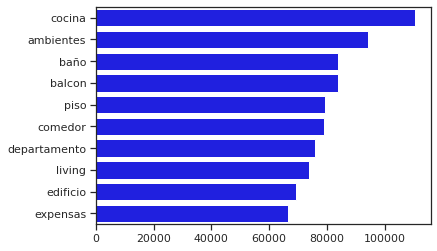

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.barplot(y=fdist.index, x=fdist.values, color='blue');

In [ ]:
# natural language processing: n-gram ranking
import re
import unicodedata
import nltk
from nltk.corpus import stopwords


import matplotlib.pyplot as plt

In [ ]:
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('spanish')
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [ ]:
words = basic_clean(''.join(str(df_imp_['text_string_lem'].tolist())))

In [ ]:
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]

(prestamo, valor, propiedad)             15357
(accede, prestamo, valor)                15318
(propiedad, simula, cuota)               15317
(valor, propiedad, simula)               15317
(simula, cuota, lendar)                  15305
(queres, podes, accede)                  15293
(podes, accede, prestamo)                15292
(casa, queres, podes)                    15291
(compra, casa, queres)                   15268
(living, comedor, cocina)                 9648
(amplio, living, comedor)                 8987
(proporcionados, propietario, pueden)     8113
(expensas, impuestos, servicios)          8025
(resolucion, general, 2371)               8001
(general, 2371, afip)                     7992
(hora, visualizacion, aviso)              7949
(real, surgen, titulo)                    7907
(actualizados, hora, visualizacion)       7807
(cumplimiento, parte, propietario)        7692
(puede, ser, modificado)                  7644
dtype: int64

## Conjunto a predecir

### Importación de las librerías y conjunto de datos

In [ ]:
#Importación de las librerías
import pandas as pd
import numpy as np
pd.options.display.max_columns = None

In [ ]:
#carga del dataset
df = pd.read_csv('/content/drive/MyDrive/Final_fundamentos/propiedades_a_predecir 3.csv')

df.head()

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,details,additionals,services,l4,l5,l6
0,1,Propiedad,2022-04-01,2022-04-01,2022-04-01,-58.407908,-34.601266,Argentina,Capital Federal,Balvanera,3.0,2.0,1.0,48.60,48.60,NaN,USD,NaN,Jean Jaures 700 - Departamento en Venta en Bal...,"Descripción básica:<br>- ¡Gran oportunidad, de...",Departamento,Venta,"Superficie 48.6m2, Ambientes 3, Baños 1, Dormi...","Aceptan Mascotas, Terraza","Gas, Luz",NaN,NaN,NaN
1,2,Propiedad,2022-04-01,2022-04-01,2022-04-01,-58.487296,-34.570272,Argentina,Capital Federal,Villa Urquiza,3.0,2.0,2.0,86.00,86.00,NaN,USD,NaN,Nahuel Huapi Al 4900 - Departamento en Venta e...,Edificio de Nivel Superior en la zona! - Detal...,Departamento,Venta,"Superficie 86m2, Ambientes 3, Baños 2, Cochera...","Pileta, Seguridad, SUM, Laundry, Balcón, Terraza","Gas, Luz",NaN,NaN,NaN
2,3,Propiedad,2022-04-01,2022-04-01,2022-04-01,-58.414550,-34.585000,Argentina,Capital Federal,Palermo,5.0,4.0,2.0,172.00,172.00,NaN,USD,NaN,Arenales Al 3700 - Departamento en Venta en Pa...,Excelente piso con palier privado y entrada de...,Departamento,Venta,"Superficie 172m2, Ambientes 5, Baños 2, Cocher...","Aceptan Mascotas, Balcón","Gas, Luz",NaN,NaN,NaN
3,4,Propiedad,2022-04-01,2022-04-01,2022-04-01,-58.399793,-34.600414,Argentina,Capital Federal,Balvanera,2.0,1.0,1.0,61.05,61.05,NaN,USD,NaN,Pasteur 800 - Departamento en Venta en Balvane...,¡Dos ambientes con dependencia en zona Faculta...,Departamento,Venta,"Superficie 61.05m2, Ambientes 2, Baños 1, Dorm...",NaN,"Gas, Luz",NaN,NaN,NaN
4,5,Propiedad,2022-04-01,2022-04-01,2022-04-01,-58.426532,-34.578066,Argentina,Capital Federal,Palermo,2.0,1.0,2.0,52.00,52.00,NaN,USD,NaN,Medrano Al 1200 - Departamento en Venta en Pal...,"40% de Anticipo, Saldo en 28 Cuotas<br><br>Air...",Departamento,Venta,"Superficie 52m2, Ambientes 2, Baños 2, Dormito...","Pileta, SUM, Gimnasio, Aceptan Mascotas, Terraza",NaN,NaN,NaN,NaN


In [ ]:
# para los casos donde la superficie cubierta es mayor a la total, se intercambian los valores
df = df.rename(columns = {'lat': 'lon', 'lon': 'lat'})
df.head()

,id,ad_type,start_date,end_date,created_on,lon,lat,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,details,additionals,services,l4,l5,l6
0,1,Propiedad,2022-04-01,2022-04-01,2022-04-01,-58.407908,-34.601266,Argentina,Capital Federal,Balvanera,3.0,2.0,1.0,48.60,48.60,NaN,USD,NaN,Jean Jaures 700 - Departamento en Venta en Bal...,"Descripción básica:<br>- ¡Gran oportunidad, de...",Departamento,Venta,"Superficie 48.6m2, Ambientes 3, Baños 1, Dormi...","Aceptan Mascotas, Terraza","Gas, Luz",NaN,NaN,NaN
1,2,Propiedad,2022-04-01,2022-04-01,2022-04-01,-58.487296,-34.570272,Argentina,Capital Federal,Villa Urquiza,3.0,2.0,2.0,86.00,86.00,NaN,USD,NaN,Nahuel Huapi Al 4900 - Departamento en Venta e...,Edificio de Nivel Superior en la zona! - Detal...,Departamento,Venta,"Superficie 86m2, Ambientes 3, Baños 2, Cochera...","Pileta, Seguridad, SUM, Laundry, Balcón, Terraza","Gas, Luz",NaN,NaN,NaN
2,3,Propiedad,2022-04-01,2022-04-01,2022-04-01,-58.414550,-34.585000,Argentina,Capital Federal,Palermo,5.0,4.0,2.0,172.00,172.00,NaN,USD,NaN,Arenales Al 3700 - Departamento en Venta en Pa...,Excelente piso con palier privado y entrada de...,Departamento,Venta,"Superficie 172m2, Ambientes 5, Baños 2, Cocher...","Aceptan Mascotas, Balcón","Gas, Luz",NaN,NaN,NaN
3,4,Propiedad,2022-04-01,2022-04-01,2022-04-01,-58.399793,-34.600414,Argentina,Capital Federal,Balvanera,2.0,1.0,1.0,61.05,61.05,NaN,USD,NaN,Pasteur 800 - Departamento en Venta en Balvane...,¡Dos ambientes con dependencia en zona Faculta...,Departamento,Venta,"Superficie 61.05m2, Ambientes 2, Baños 1, Dorm...",NaN,"Gas, Luz",NaN,NaN,NaN
4,5,Propiedad,2022-04-01,2022-04-01,2022-04-01,-58.426532,-34.578066,Argentina,Capital Federal,Palermo,2.0,1.0,2.0,52.00,52.00,NaN,USD,NaN,Medrano Al 1200 - Departamento en Venta en Pal...,"40% de Anticipo, Saldo en 28 Cuotas<br><br>Air...",Departamento,Venta,"Superficie 52m2, Ambientes 2, Baños 2, Dormito...","Pileta, SUM, Gimnasio, Aceptan Mascotas, Terraza",NaN,NaN,NaN,NaN


In [ ]:
df.shape

(1087, 28)

In [ ]:
df.dtypes

id                   int64
ad_type             object
start_date          object
end_date            object
created_on          object
lon                float64
lat                float64
l1                  object
l2                  object
l3                  object
rooms              float64
bedrooms           float64
bathrooms          float64
surface_total      float64
surface_covered    float64
price              float64
currency            object
price_period       float64
title               object
description         object
property_type       object
operation_type      object
details             object
additionals         object
services            object
l4                 float64
l5                 float64
l6                 float64
dtype: object

In [ ]:
df[['start_date', 'end_date', 'created_on']].agg(['min', 'max'])

,start_date,end_date,created_on
min,2022-04-01,2022-04-01,2022-04-01
max,2022-04-01,2022-04-01,2022-04-01


In [ ]:
df[['id','lat', 'lon', 'l3']].sort_values(by = 'lon', ascending = False)

,id,lat,lon,l3
1056,1057,34.819000,58.594000,Coghlan
872,873,34.819000,58.594000,Saavedra
421,422,-38.015202,-57.568454,Boedo
52,53,-34.610501,-58.360796,Puerto Madero
662,663,-34.611181,-58.361018,Puerto Madero
...,...,...,...,...
847,848,-34.614855,-58.524096,Villa Real
239,240,-34.639428,-58.524960,Liniers
396,397,-34.623301,-58.527704,Versalles
439,440,-34.623301,-58.527704,Versalles


In [ ]:
df['lat'] = np.where(df.id == 1055, -34.603634, df['lat'])
df['lon'] = np.where(df.id == 1055, -58.379692, df['lon'])

In [ ]:
df['lat'] = np.where(df.id == 873, -34.551092, df['lat'])
df['lon'] = np.where(df.id == 873, -58.485556, df['lon'])

In [ ]:
df['lat'] = np.where(df.id == 1057, -34.559944, df['lat'])
df['lon'] = np.where(df.id == 1057, -58.474789, df['lon'])

In [ ]:
df['lat'] = np.where(df.id == 422, -34.629891, df['lat'])
df['lon'] = np.where(df.id == 422, -58.418756, df['lon'])

In [ ]:
df['l3'].unique()

array(['Balvanera', 'Villa Urquiza', 'Palermo', 'Belgrano', 'Floresta',
       'Villa Pueyrredon', 'Saavedra', 'Villa Devoto', 'San Nicolás',
       'Chacarita', 'Villa Crespo', 'Boedo', 'Flores', 'Paternal', 'Boca',
       'Recoleta', 'Caballito', 'Nuñez', 'Constitución', 'Colegiales',
       'San Telmo', 'Monserrat', 'Puerto Madero', 'Villa del Parque',
       'Almagro', 'Villa Ortuzar', 'Villa Lugano', 'San Cristobal',
       'Barracas', 'Liniers', '2 Ambientes', 'Mataderos',
       'Villa Santa Rita', 'Parque Patricios', 'Parque Chas',
       'Villa General Mitre', 'Retiro', 'Parque Avellaneda',
       'Monte Castro', 'Parque Chacabuco', 'Villa Luro', 'Versalles',
       'Coghlan', 'Vélez Sarsfield', 'Nueva Pompeya', 'Agronomía',
       'Villa Real', 'GBA Norte'], dtype=object)

In [ ]:
df['l3'] = np.where(df['l3'] == '2 Ambientes', 'Palermo', df['l3'])

In [ ]:
df[df['l3'] == 'GBA Norte']

,id,ad_type,start_date,end_date,created_on,lon,lat,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,details,additionals,services,l4,l5,l6
1009,1010,Propiedad,2022-04-01,2022-04-01,2022-04-01,-58.510875,-34.544037,Argentina,Capital Federal,GBA Norte,6.0,4.0,3.0,265.0,265.0,NaN,USD,NaN,"Melo Al 4000 - PH en Venta en Vicente López, V...","Vivienda multifamiliar con deposito , galpon, ...",PH,Venta,"Superficie 265m2, Ambientes 6, Baños 3, Dormit...","Aceptan Mascotas, Terraza","Gas, Luz",NaN,NaN,NaN


In [ ]:
df['lat'] = np.where(df['l3'] == 'GBA Norte', -34.551193, df['lat'])
df['lon'] = np.where(df['l3'] == 'GBA Norte', -58.499385, df['lon'])
df['l3'] = np.where(df['l3'] == 'GBA Norte', 'Saavedra', df['l3'])

In [ ]:
df['rooms'].unique()

array([ 3.,  5.,  2.,  4.,  1.,  7., 11.,  6., nan,  8.,  9., 10., 12.,
       13.,  0.])

In [ ]:
pd.reset_option('display.max_colwidth')


In [ ]:
df[df['rooms'] == 0]

,id,ad_type,start_date,end_date,created_on,lon,lat,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,details,additionals,services,l4,l5,l6
793,794,Propiedad,2022-04-01,2022-04-01,2022-04-01,-58.36167,-34.815962,Argentina,Capital Federal,Palermo,0.0,5.0,1.0,228.0,228.0,NaN,USD,NaN,"Carranza A.j. 1900 - PH en Venta en Palermo, C...",VENTA DE PH AL FRENTE DE 3 PLANTAS EN PALERMO ...,PH,Venta,"Superficie 228m2, Baños 1, Dormitorios 5, Sup....","SUM, Balcón, Terraza","Gas, Luz",NaN,NaN,NaN


In [ ]:
df[df['rooms'] == 10]['details']

239    Superficie 286m2, Ambientes 10, Baños 3, Sup. ...
524    Superficie 314.74m2, Ambientes 10, Baños 4, Do...
Name: details, dtype: object

In [ ]:
#Buscamos si en la descripción dice ambientes y extraemos el valor
regex = r'Cubierta (\d+)'
df = pd.concat([df, df['details'].str.extract(regex)], axis=1)

In [ ]:
# para los casos donde la superficie cubierta es mayor a la total, se intercambian los valores
df['surface_covered'], df[0] = df[0], df['surface_covered']

In [ ]:
df = df.drop([0], axis = 1)
df.head()

,id,ad_type,start_date,end_date,created_on,lon,lat,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,details,additionals,services,l4,l5,l6
0,1,Propiedad,2022-04-01,2022-04-01,2022-04-01,-58.407908,-34.601266,Argentina,Capital Federal,Balvanera,3.0,2.0,1.0,48.60,45,NaN,USD,NaN,Jean Jaures 700 - Departamento en Venta en Bal...,"Descripción básica:<br>- ¡Gran oportunidad, de...",Departamento,Venta,"Superficie 48.6m2, Ambientes 3, Baños 1, Dormi...","Aceptan Mascotas, Terraza","Gas, Luz",NaN,NaN,NaN
1,2,Propiedad,2022-04-01,2022-04-01,2022-04-01,-58.487296,-34.570272,Argentina,Capital Federal,Villa Urquiza,3.0,2.0,2.0,86.00,75,NaN,USD,NaN,Nahuel Huapi Al 4900 - Departamento en Venta e...,Edificio de Nivel Superior en la zona! - Detal...,Departamento,Venta,"Superficie 86m2, Ambientes 3, Baños 2, Cochera...","Pileta, Seguridad, SUM, Laundry, Balcón, Terraza","Gas, Luz",NaN,NaN,NaN
2,3,Propiedad,2022-04-01,2022-04-01,2022-04-01,-58.414550,-34.585000,Argentina,Capital Federal,Palermo,5.0,4.0,2.0,172.00,160,NaN,USD,NaN,Arenales Al 3700 - Departamento en Venta en Pa...,Excelente piso con palier privado y entrada de...,Departamento,Venta,"Superficie 172m2, Ambientes 5, Baños 2, Cocher...","Aceptan Mascotas, Balcón","Gas, Luz",NaN,NaN,NaN
3,4,Propiedad,2022-04-01,2022-04-01,2022-04-01,-58.399793,-34.600414,Argentina,Capital Federal,Balvanera,2.0,1.0,1.0,61.05,61,NaN,USD,NaN,Pasteur 800 - Departamento en Venta en Balvane...,¡Dos ambientes con dependencia en zona Faculta...,Departamento,Venta,"Superficie 61.05m2, Ambientes 2, Baños 1, Dorm...",NaN,"Gas, Luz",NaN,NaN,NaN
4,5,Propiedad,2022-04-01,2022-04-01,2022-04-01,-58.426532,-34.578066,Argentina,Capital Federal,Palermo,2.0,1.0,2.0,52.00,44,NaN,USD,NaN,Medrano Al 1200 - Departamento en Venta en Pal...,"40% de Anticipo, Saldo en 28 Cuotas<br><br>Air...",Departamento,Venta,"Superficie 52m2, Ambientes 2, Baños 2, Dormito...","Pileta, SUM, Gimnasio, Aceptan Mascotas, Terraza",NaN,NaN,NaN,NaN


In [ ]:
pd.reset_option('display.max_colwidth')

In [ ]:
df['surface_covered'] = np.where(df['surface_covered'].isna(), df['surface_total'], df['surface_covered'])

In [ ]:
df['surface_covered'] = df['surface_covered'].astype('float')
df['surface_total'] = df['surface_total'].astype('float')

In [ ]:
df['surface_covered'].describe(percentiles = [0.05, 0.025, 0.5, 0.75, 0.95])

count    1087.000000
mean       76.562576
std        62.472127
min        16.000000
2.5%       26.000000
5%         28.000000
50%        59.000000
75%        86.000000
95%       202.700000
max       498.000000
Name: surface_covered, dtype: float64

In [ ]:
df['bathrooms'].unique()

array([ 1.,  2.,  5.,  4.,  3.,  7., nan,  0.])

In [ ]:
df[df['bathrooms'] == 7]

,id,ad_type,start_date,end_date,created_on,lon,lat,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,details,additionals,services,l4,l5,l6
160,161,Propiedad,2022-04-01,2022-04-01,2022-04-01,-58.447189,-34.564538,Argentina,Capital Federal,Belgrano,5.0,4.0,7.0,551.52,403.0,NaN,USD,NaN,"Virrey Loreto Al 1900, Entre 3 De Febrero Y 11...","ULTIMO PISO, VISTA PANORÁMICA, TERRAZA PROPIA ...",Departamento,Venta,"Superficie 551.52m2, Ambientes 5, Baños 7, Coc...","Pileta, Seguridad, Calefacción, Balcón, Terraza","Gas, Luz",NaN,NaN,NaN


In [ ]:
df['bathrooms'] = np.where(df.id == 1003, 3, df['bathrooms'])
df['bathrooms'] = np.where(df.id == 991, 1, df['bathrooms'])

In [ ]:
df['bedrooms'].unique()

array([ 2.,  4.,  1.,  3., nan,  5., 12., 10.,  0.,  6.,  8.,  9.,  7.])

In [ ]:
df['bedrooms'] = np.where((df['bedrooms'].isna()) & (df['rooms'] == 1), 0, df['bedrooms'])

In [ ]:
pd.reset_option('display.max_colwidth')

In [ ]:
df.currency.unique()

array(['USD'], dtype=object)

In [ ]:
df.ad_type.unique()

array(['Propiedad'], dtype=object)

Se eliminan las variable id y ad_type que no sirven para predecir

In [ ]:
df = df.drop(columns = ['ad_type'])

Verifico que solo sea propiedades de argetina

In [ ]:
df.l1.unique()

array(['Argentina'], dtype=object)

Verifico que solo sean propiedades de Capital Federal

In [ ]:
df.l2.unique()

array(['Capital Federal'], dtype=object)

Verifico que solo haya localidades de CF. Hay valores nan

In [ ]:
df.l3.unique()

array(['Balvanera', 'Villa Urquiza', 'Palermo', 'Belgrano', 'Floresta',
       'Villa Pueyrredon', 'Saavedra', 'Villa Devoto', 'San Nicolás',
       'Chacarita', 'Villa Crespo', 'Boedo', 'Flores', 'Paternal', 'Boca',
       'Recoleta', 'Caballito', 'Nuñez', 'Constitución', 'Colegiales',
       'San Telmo', 'Monserrat', 'Puerto Madero', 'Villa del Parque',
       'Almagro', 'Villa Ortuzar', 'Villa Lugano', 'San Cristobal',
       'Barracas', 'Liniers', 'Mataderos', 'Villa Santa Rita',
       'Parque Patricios', 'Parque Chas', 'Villa General Mitre', 'Retiro',
       'Parque Avellaneda', 'Monte Castro', 'Parque Chacabuco',
       'Villa Luro', 'Versalles', 'Coghlan', 'Vélez Sarsfield',
       'Nueva Pompeya', 'Agronomía', 'Villa Real'], dtype=object)

In [ ]:
df['l3'] = np.where(df['l3'] == 'Catalinas', 'Retiro' , df['l3'])
df['l3'] = np.where(df['l3'] == 'Boca', 'La Boca', df['l3'])
df['l3'] = np.where(df['l3'] == 'Villa Lugano', 'Lugano', df['l3'])
df['l3'] = np.where(df['l3'] == 'Pompeya', 'Nueva Pompeya', df['l3'])
df['l3'] = np.where(df['l3'] == 'Abasto', 'Balvanera', df['l3'])
df['l3'] = np.where(df['l3'] == 'Once', 'Balvanera', df['l3'])
df['l3'] = np.where(df['l3'] == 'Centro / Microcentro', 'San Nicolás', df['l3'])
df['l3'] = np.where(df['l3'] == 'Tribunales', 'San Nicolás', df['l3'])
df['l3'] = np.where(df['l3'] == 'Parque Centenario', 'Caballito', df['l3'])
df['l3'] = np.where(df['l3'] == 'Las Cañitas', 'Palermo', df['l3'])
df['l3'] = np.where(df['l3'] == 'Congreso', 'Monserrat', df['l3'])
df['l3'] = np.where(df['l3'] == 'Barrio Norte', 'Recoleta', df['l3'])

In [ ]:
df.l4.unique()

array([nan])

In [ ]:
df.l5.unique()

array([nan])

In [ ]:
df.l6.unique()

array([nan])

In [ ]:
df = df.drop(columns = ['l1', 'l2', 'l4', 'l5', 'l6'])

In [ ]:
df['property_type'].unique()

array(['Departamento', 'PH'], dtype=object)

Verifico que solo sean propiedades en venta

In [ ]:
df['operation_type'].unique()

array(['Venta'], dtype=object)

In [ ]:
df.shape

(1087, 22)

### Normalización de la variable descripción

In [ ]:
#convertimos a minúsculas todo el texto de la variable de interés
df["description"] = df["description"].str.lower()
df["description"][1]

'edificio de nivel superior en la zona! - detalles de terminación y materiales de calidad y diseño<br><br>* exclusivos semipisos de 3 ambientes con 2 dormitorios amplios y cocheras fijas <br>* dormitorio principal en suite con vestidor<br>* dos baños completos con mesadas de mármol<br>* balcones corridos muy generosos, con espacio para una mesa con sillas. <br>* cocina: <br> - gran espacio para cocinar y compartir<br> - doble mesada<br> - mucho espacio de guardado con doble alacena y mesada de quarzo<br> - espacio para lavarropas<br><br><br>amenities:<br>- salón de usos múltiples totalmente equipado<br>- sistema de circuito cerrado c/ grabación 24hs<br>- terraza c/ parrilla<br>- control de accesos<br>- piscina<br>- wifi en sum y terraza; <br>- espacio para laundry<br><br><br>además: <br>calefacción por loza radiante. permite controlar la temperatura individualmente en cada ambiente.<br>ambientes amplios, ventilados y limpios, sin vigas ni columnas<br>horno de acero inoxidable y anafe v

In [ ]:
#se crea uan función que quita tilde y pasa texto a minúscula
def normalize(s):
    replacements = (("á", "a"),("é", "e"),("í", "i"),("ó", "o"),("ú", "u"),)
    for a, b in replacements:
        s = str(s).replace(a, b).replace(a.upper(), b.upper())
        s =str(s).lower()
    return s

In [ ]:
#aplicación
df['description'] = df.description.map(normalize)
df['l3'] = df.l3.map(normalize)

### Web scrapping lat y lon

In [ ]:
!pip install beautifulsoup4

import numpy as np
import requests
from bs4 import BeautifulSoup

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#extraemos las coordenadas de los barrios
page = requests.get("https://www.coordenadas.com.es/argentina/pueblos-de-ciudad-buenos-aires/7/1")

#parseamos el código html para poder extraerlo
soup = BeautifulSoup(page.content, 'html.parser')
all_case= soup.find(class_="table")
print(all_case.prettify())

In [ ]:
soup.select('tr > td') #podemos visualizar las filas de los datos que nos interesa

[<td> - <a href="https://www.coordenadas.com.es/argentina/agronomia-ciudad-buenos-aires/5720">Agronomia</a></td>,
 <td>-34.6,-58.48333</td>,
 <td> - <a href="https://www.coordenadas.com.es/argentina/almagro-ciudad-buenos-aires/5719">Almagro</a></td>,
 <td>-34.6,-58.41667</td>,
 <td> - <a href="https://www.coordenadas.com.es/argentina/almirante-brown-ciudad-buenos-aires/5718">Almirante-Brown</a></td>,
 <td>-34.66667,-58.45</td>,
 <td> - <a href="https://www.coordenadas.com.es/argentina/balbastro-ciudad-buenos-aires/5717">Balbastro</a></td>,
 <td>-34.65,-58.46667</td>,
 <td> - <a href="https://www.coordenadas.com.es/argentina/balvanera-ciudad-buenos-aires/5721">Balvanera</a></td>,
 <td>-34.61018,-58.40654</td>,
 <td> - <a href="https://www.coordenadas.com.es/argentina/barracas-ciudad-buenos-aires/5716">Barracas</a></td>,
 <td>-34.65,-58.36667</td>,
 <td> - <a href="https://www.coordenadas.com.es/argentina/barrio-norte-ciudad-buenos-aires/5715">Barrio-Norte</a></td>,
 <td>-34.58333,-58.4<

In [ ]:
rows=soup.find_all('tr')

In [ ]:
list_rows= []

for row in rows:
  row_td=row.find_all('td')
  str_cells=str(row_td)
  clean_text=BeautifulSoup(str_cells, "lxml").get_text()
  list_rows.append(clean_text)

In [ ]:
#creamos un data frame con la información extraída
data=pd.DataFrame(list_rows)
data.head(5)

,0
0,[]
1,"[ - Agronomia, -34.6,-58.48333]"
2,"[ - Almagro, -34.6,-58.41667]"
3,"[ - Almirante-Brown, -34.66667,-58.45]"
4,"[ - Balbastro, -34.65,-58.46667]"


In [ ]:
#convertimos la infomarción extraída en columnas
data1=data[0].str.split(pat=", ", expand=True)

data1.head(5)

,0,1
0,[],None
1,[ - Agronomia,"-34.6,-58.48333]"
2,[ - Almagro,"-34.6,-58.41667]"
3,[ - Almirante-Brown,"-34.66667,-58.45]"
4,[ - Balbastro,"-34.65,-58.46667]"


In [ ]:
coor = data1.astype(str).replace({"\[":"", "\]":""}, regex=True)

coor[0] = coor[0].astype(str).replace({"\-":"", "\-":" "}, regex=True)
coor.head()

,0,1
0,,None
1,Agronomia,"-34.6,-58.48333"
2,Almagro,"-34.6,-58.41667"
3,Almirante Brown,"-34.66667,-58.45"
4,Balbastro,"-34.65,-58.46667"


In [ ]:
coor = coor.drop(0, axis = 0)

In [ ]:
latlon = coor[1].str.split(pat=",", expand=True)
latlon.head()

,0,1
1,-34.6,-58.48333
2,-34.6,-58.41667
3,-34.66667,-58.45
4,-34.65,-58.46667
5,-34.61018,-58.40654


In [ ]:
coor['latitud'] = latlon[0]
coor['longitud'] = latlon[1]

In [ ]:
coor = coor.drop(columns = [1]) #elimino la segunda columna
coor.columns = ['localidad', 'latitud', 'longitud'] #renombro las columnas

coor['localidad'] = coor['localidad'].str.rstrip() # elimino los espacios en blanco
coor['localidad'] = coor['localidad'].str.lstrip() # elimino los espacios en blanco

coor['localidad'] = coor['localidad'].str.lower() #paso a minúscula

In [ ]:
#normalización de las localidades de ambos datasets
coor['localidad'] = coor['localidad'].map(normalize)
df['l3'] = df['l3'].map(normalize)

In [ ]:
df['l3'] = df['l3'].str.lower() #paso a minúscula

In [ ]:
coor['localidad'] = coor['localidad'].replace({'montserrat': 'monserrat', 'versailles': 'versalles'})
coor['localidad'] = coor['localidad'].replace({'nunez': 'nuñez'})
coor['localidad'] = coor['localidad'].replace({'pueyrredon': 'villa pueyrredon'})
coor['localidad'] = coor['localidad'].replace({'boca': 'la boca'})
coor['localidad'] = coor['localidad'].replace({'villa lugano': 'lugano'})

In [ ]:
#coor.to_csv('/content/drive/MyDrive/Final_fundamentos/coor_or.csv')

In [ ]:
coor['longitud'] = coor['longitud'].astype('float')
coor['latitud'] = coor['latitud'].astype('float')

In [ ]:
coor = coor[coor['longitud'] > -60]

In [ ]:
coor['longitud'] = np.where(coor['localidad'] == 'barracas', -58.38, coor['longitud'])
coor['latitud'] = np.where(coor['localidad'] == 'san telmo', -34.621024, coor['latitud'])
coor['longitud'] = np.where(coor['localidad'] == 'san telmo', -58.371069, coor['longitud'])
coor['latitud'] = np.where(coor['localidad'] == 'puerto madero', -34.610726, coor['latitud'])
coor['longitud'] = np.where(coor['localidad'] == 'puerto madero', -58.362740, coor['longitud'])

In [ ]:
coor['latitud'] = np.where(coor['localidad'] == 'saavedra', -34.548565, coor['latitud'])
coor['longitud'] = np.where(coor['localidad'] == 'saavedra', -58.481270, coor['longitud'])

coor['latitud'] = np.where(coor['localidad'] == 'nuñez', -34.543970, coor['latitud'])
coor['longitud'] = np.where(coor['localidad'] == 'nuñez', -58.461346, coor['longitud'])

coor['latitud'] = np.where(coor['localidad'] == 'belgrano', -34.562567, coor['latitud'])
coor['longitud'] = np.where(coor['localidad'] == 'belgrano', -58.455700, coor['longitud'])

coor['latitud'] = np.where(coor['localidad'] == 'coghlan', -34.560244, coor['latitud'])
coor['longitud'] = np.where(coor['localidad'] == 'coghlan', -58.475046, coor['longitud'])

coor['latitud'] = np.where(coor['localidad'] == 'villa urquiza', -34.570045, coor['latitud'])
coor['longitud'] = np.where(coor['localidad'] == 'villa urquiza', -58.491403, coor['longitud'])

In [ ]:
#Sumamos localidades faltantes
coor = coor.append({'localidad' : 'san nicolas' , 'latitud' : '-34.603480', 'longitud' : '-58.379626'} , ignore_index=True)
coor = coor.append({'localidad' : 'parque avellaneda' , 'latitud' : '-34.645036', 'longitud' : '-58.485339'} , ignore_index=True)
coor = coor.append({'localidad' : 'villa real' , 'latitud' : '-34.619284', 'longitud' : '-58.525073'} , ignore_index=True)

In [ ]:
#Buscamos el dato faltantes en el dataset de coordenadas
df['lat'] = np.where(df['lat'].isna() == True, df['l3'].map(dict(zip(coor['localidad'], coor['latitud']))), df['lat'])
df['lon'] = np.where(df['lon'].isna() == True, df['l3'].map(dict(zip(coor['localidad'], coor['longitud']))), df['lon'])

In [ ]:
coor['latitud'] =coor['latitud'].astype('float')
coor['longitud'] =coor['longitud'].astype('float')
df['lat'] =df['lat'].astype('float')
df['lon'] =df['lon'].astype('float')

In [ ]:
df.shape

(1087, 22)

In [ ]:
df[['l3', 'lat', 'lon']].to_csv('/content/pred_lat_lon.csv')

In [ ]:
df['lat'] = np.where(df['lat'] == -34.815962, -34.58333, df['lat'])
df['lon'] = np.where(df['lon'] == -58.36167	, -58.41667, df['lon'])

### Imputacion de faltantes para rooms, bedrooms y bathrooms

In [ ]:
df.describe()

,id,lon,lat,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,price_period
count,1087.000000,1087.000000,1087.000000,1083.000000,1077.000000,1083.000000,1087.000000,1087.000000,0.0,0.0
mean,544.000000,-58.434722,-34.596047,2.838412,1.812442,1.421053,89.930230,76.562576,NaN,NaN
std,313.934176,0.035262,0.024763,1.498219,1.355874,0.756976,76.687828,62.472127,NaN,NaN
min,1.000000,-58.527704,-34.690988,0.000000,0.000000,1.000000,16.620000,16.000000,NaN,NaN
25%,272.500000,-58.457990,-34.614737,2.000000,1.000000,1.000000,42.245000,39.000000,NaN,NaN
50%,544.000000,-58.433820,-34.595959,3.000000,2.000000,1.000000,66.000000,59.000000,NaN,NaN
75%,815.500000,-58.410016,-34.578911,4.000000,3.000000,2.000000,102.000000,86.000000,NaN,NaN
max,1087.000000,-58.360796,-34.537633,13.000000,12.000000,7.000000,551.520000,498.000000,NaN,NaN


In [ ]:
df['rooms'].unique()

array([ 3.,  5.,  2.,  4.,  1.,  7., 11.,  6., nan,  8.,  9., 10., 12.,
       13.,  0.])

In [ ]:
# imputacion de cantidad de baños para monoambientes de 1 habitacion
df['bathrooms'] = np.where((df['description'].str.contains('monoambiente', na = False) & (df['rooms'] == 1) & (df['bathrooms'].isna())),
                           1, df['bathrooms'])

In [ ]:
df['rooms'].unique()

array([ 3.,  5.,  2.,  4.,  1.,  7., 11.,  6., nan,  8.,  9., 10., 12.,
       13.,  0.])

In [ ]:
pd.crosstab(df['rooms'], df['bathrooms'])

bathrooms,1.0,2.0,3.0,4.0,5.0,7.0
rooms,,,,,,
0.0,1,0,0,0,0,0
1.0,192,0,0,0,0,0
2.0,283,7,0,0,0,0
3.0,206,102,4,1,0,0
4.0,62,80,26,3,2,0
5.0,6,24,21,5,1,1
6.0,5,7,14,4,1,0
7.0,0,4,2,4,1,0
8.0,0,3,0,0,0,0


In [ ]:
df[df['rooms'] == 13] 

,id,start_date,end_date,created_on,lon,lat,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,details,additionals,services
521,522,2022-04-01,2022-04-01,2022-04-01,-58.377677,-34.609106,monserrat,13.0,9.0,2.0,308.84,281.0,NaN,USD,NaN,"Piedras - Departamento en Venta en Monserrat, ...","gran propiedad, apta profesional, con excelent...",Departamento,Venta,"Superficie 308.84m2, Ambientes 13, Baños 2, Do...","Calefacción, Aire Centralizado, Aire Acondicio...","Gas, Luz"


In [ ]:
df[df['rooms'] == 12]

,id,start_date,end_date,created_on,lon,lat,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,details,additionals,services
402,403,2022-04-01,2022-04-01,2022-04-01,-58.388392,-34.600541,san nicolas,12.0,10.0,2.0,244.39,244.0,NaN,USD,NaN,Viamonte 1500 - Departamento en Venta en San N...,¡excelente piso/oficina de 12 ambientes en tri...,Departamento,Venta,"Superficie 244.39m2, Ambientes 12, Baños 2, Do...","Aire Centralizado, Aire Acondicionado","Gas, Luz"


In [ ]:
df[(df['description'].str.contains('monoambiente', na = False)) & (df['rooms'] == 1)]['bedrooms'].value_counts()

0.0    58
Name: bedrooms, dtype: int64

In [ ]:
df['bedrooms'] = np.where((df['description'].str.contains('monoambiente', na = False)) & (df['rooms'] == 1), 0, df['bedrooms'])

In [ ]:
df['rooms'] = np.where(df['rooms'] == 0, 6, df['rooms'])

In [ ]:
df.describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.95])

,id,lon,lat,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,price_period
count,1087.000000,1087.000000,1087.000000,1083.000000,1077.000000,1083.000000,1087.000000,1087.000000,0.0,0.0
mean,544.000000,-58.434722,-34.596047,2.838412,1.812442,1.421053,89.930230,76.562576,NaN,NaN
std,313.934176,0.035262,0.024763,1.498219,1.355874,0.756976,76.687828,62.472127,NaN,NaN
min,1.000000,-58.527704,-34.690988,0.000000,0.000000,1.000000,16.620000,16.000000,NaN,NaN
5%,55.300000,-58.495841,-34.636247,1.000000,0.000000,1.000000,32.000000,28.000000,NaN,NaN
25%,272.500000,-58.457990,-34.614737,2.000000,1.000000,1.000000,42.245000,39.000000,NaN,NaN
50%,544.000000,-58.433820,-34.595959,3.000000,2.000000,1.000000,66.000000,59.000000,NaN,NaN
75%,815.500000,-58.410016,-34.578911,4.000000,3.000000,2.000000,102.000000,86.000000,NaN,NaN
95%,1032.700000,-58.373793,-34.553635,5.000000,4.000000,3.000000,253.667000,202.700000,NaN,NaN
max,1087.000000,-58.360796,-34.537633,13.000000,12.000000,7.000000,551.520000,498.000000,NaN,NaN


In [ ]:
df[df['rooms'].isna()]

,id,start_date,end_date,created_on,lon,lat,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,details,additionals,services
106,107,2022-04-01,2022-04-01,2022-04-01,-58.454357,-34.579236,colegiales,NaN,1.0,1.0,27.00,27.0,NaN,USD,NaN,Álvarez Thomas Al 875 - Departamento en Venta ...,excelente monoambiente 27 metros con cocina in...,Departamento,Venta,"Superficie 27m2, Baños 1, Dormitorios 1, Sup. ...","SUM, Laundry, Gimnasio",NaN
901,902,2022-04-01,2022-04-01,2022-04-01,-58.426532,-34.578066,palermo,NaN,2.0,1.0,86.97,79.0,NaN,USD,NaN,"Palermo - Departamento en Venta en Palermo, CA...",edificio con orientacion este ubicado en el ba...,Departamento,Venta,"Superficie 86.97m2, Baños 1, Cocheras 1, Dormi...",Balcón,Luz
1041,1042,2022-04-01,2022-04-01,2022-04-01,-58.464845,-34.557616,belgrano,NaN,NaN,1.0,34.00,31.0,NaN,USD,NaN,Moldes 2800 - Departamento en Venta en Belgran...,monoambiente divisible a metros de av.cabildo ...,Departamento,Venta,"Superficie 34m2, Baños 1, Sup. Cubierta 31m2, ...","SUM, Laundry, Balcón, Terraza","Gas, Luz"
1079,1080,2022-04-01,2022-04-01,2022-04-01,-58.460145,-34.637484,flores,NaN,NaN,NaN,65.00,60.0,NaN,USD,NaN,Cuenca Al 800 - Departamento en Venta en Flore...,nan,Departamento,Venta,"Superficie 65m2, Sup. Cubierta 60m2",NaN,NaN


In [ ]:
#imputación de los valores de rooms por 1 cuando son monoambientes
df['rooms'] = np.where((df['description'].str.contains('monoambiente ', regex = True, na = False)) & (df['rooms'].isna()),
                       1, df['rooms'])

In [ ]:
#imputación de los valores de rooms por 2 cuando son 2 ambientes
df['rooms'] = np.where((df['description'].str.contains('2 ambientes ', regex = True, na = False)) & (df['rooms'].isna()),
                       2,
                       df['rooms'])

In [ ]:
#imputación de los valores de rooms por 3 cuando son 3 ambientes
df['rooms'] = np.where((df['description'].str.contains('3 ambientes ', regex = True, na = False)) & (df['rooms'].isna()),
                       3,
                       df['rooms'])

In [ ]:
#imputación de los valores de rooms por 4 cuando son 4 ambientes
df['rooms'] = np.where((df['description'].str.contains('4 ambientes ', regex = True, na = False)) & (df['rooms'].isna()),
                       4,
                       df['rooms'])

In [ ]:
#imputación de los valores de rooms por 5 cuando son 5 ambientes
df['rooms'] = np.where((df['description'].str.contains('5 ambientes ', regex = True, na = False)) & (df['rooms'].isna()),
                       5,
                       df['rooms'])

In [ ]:
#imputación de los valores de rooms por 6 cuando son 6 ambientes
df['rooms'] = np.where((df['description'].str.contains('6 ambientes ', regex = True, na = False)) & (df['rooms'].isna()),
                       6,
                       df['rooms'])

In [ ]:
#Buscamos si en la descripción dice ambientes y extraemos el valor
regex = r'Ambientes (\d+)'
df = pd.concat([df, df['details'].str.extract(regex)], axis=1)
df = df.rename({0: 'Ambientes'}, axis = 1)

In [ ]:
#Buscamos si en la descripción dice ambientes y extraemos el valor
regex = r'Dormitorios (\d+)'
df = pd.concat([df, df['details'].str.extract(regex)], axis=1)
df = df.rename({0: 'Dormitorios'}, axis = 1)

In [ ]:
#Buscamos si en la descripción dice ambientes y extraemos el valor
regex = r'Baños (\d+)'
df = pd.concat([df, df['details'].str.extract(regex)], axis=1)
df = df.rename({0: 'Baños'}, axis = 1)

In [ ]:
df.head()

,id,start_date,end_date,created_on,lon,lat,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,details,additionals,services,Ambientes,Dormitorios,Baños
0,1,2022-04-01,2022-04-01,2022-04-01,-58.407908,-34.601266,balvanera,3.0,2.0,1.0,48.60,45.0,NaN,USD,NaN,Jean Jaures 700 - Departamento en Venta en Bal...,"descripcion basica:<br>- ¡gran oportunidad, de...",Departamento,Venta,"Superficie 48.6m2, Ambientes 3, Baños 1, Dormi...","Aceptan Mascotas, Terraza","Gas, Luz",3,2,1
1,2,2022-04-01,2022-04-01,2022-04-01,-58.487296,-34.570272,villa urquiza,3.0,2.0,2.0,86.00,75.0,NaN,USD,NaN,Nahuel Huapi Al 4900 - Departamento en Venta e...,edificio de nivel superior en la zona! - detal...,Departamento,Venta,"Superficie 86m2, Ambientes 3, Baños 2, Cochera...","Pileta, Seguridad, SUM, Laundry, Balcón, Terraza","Gas, Luz",3,2,2
2,3,2022-04-01,2022-04-01,2022-04-01,-58.414550,-34.585000,palermo,5.0,4.0,2.0,172.00,160.0,NaN,USD,NaN,Arenales Al 3700 - Departamento en Venta en Pa...,excelente piso con palier privado y entrada de...,Departamento,Venta,"Superficie 172m2, Ambientes 5, Baños 2, Cocher...","Aceptan Mascotas, Balcón","Gas, Luz",5,4,2
3,4,2022-04-01,2022-04-01,2022-04-01,-58.399793,-34.600414,balvanera,2.0,1.0,1.0,61.05,61.0,NaN,USD,NaN,Pasteur 800 - Departamento en Venta en Balvane...,¡dos ambientes con dependencia en zona faculta...,Departamento,Venta,"Superficie 61.05m2, Ambientes 2, Baños 1, Dorm...",NaN,"Gas, Luz",2,1,1
4,5,2022-04-01,2022-04-01,2022-04-01,-58.426532,-34.578066,palermo,2.0,1.0,2.0,52.00,44.0,NaN,USD,NaN,Medrano Al 1200 - Departamento en Venta en Pal...,"40% de anticipo, saldo en 28 cuotas<br><br>air...",Departamento,Venta,"Superficie 52m2, Ambientes 2, Baños 2, Dormito...","Pileta, SUM, Gimnasio, Aceptan Mascotas, Terraza",NaN,2,1,2


In [ ]:
#reemplazamos los valores faltantes por los encontrados en la descripcion
df['rooms'] = np.where((df['rooms'].isna()), df['Ambientes'], df['rooms'])
df['bedrooms'] = np.where((df['bedrooms'].isna()), df['Dormitorios'], df['bedrooms'])
df['bathrooms'] = np.where((df['bathrooms'].isna()), df['Baños'], df['bathrooms'])

In [ ]:
df.isna().sum()

id                    0
start_date            0
end_date              0
created_on            0
lon                   0
lat                   0
l3                    0
rooms                 2
bedrooms             10
bathrooms             4
surface_total         0
surface_covered       0
price              1087
currency              0
price_period       1087
title                 0
description           0
property_type         0
operation_type        0
details               0
additionals         132
services            245
Ambientes             5
Dormitorios         136
Baños                 6
dtype: int64

### Imputación de los valores faltantes por el vecino más cercano

In [ ]:
df.isna().sum()

id                    0
start_date            0
end_date              0
created_on            0
lon                   0
lat                   0
l3                    0
rooms                 2
bedrooms             10
bathrooms             4
surface_total         0
surface_covered       0
price              1087
currency              0
price_period       1087
title                 0
description           0
property_type         0
operation_type        0
details               0
additionals         132
services            245
Ambientes             5
Dormitorios         136
Baños                 6
dtype: int64

In [ ]:
df.columns

Index(['id', 'start_date', 'end_date', 'created_on', 'lon', 'lat', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'price_period', 'title', 'description',
       'property_type', 'operation_type', 'details', 'additionals', 'services',
       'Ambientes', 'Dormitorios', 'Baños'],
      dtype='object')

In [ ]:
df_acot = df.drop(['start_date', 'end_date', 'created_on', 'currency', 'price_period', 'title',
                   'operation_type',  'details', 'additionals', 'services', 'Ambientes', 'Dormitorios', 'Baños'], axis = 1)

In [ ]:
df_acot.dtypes

id                   int64
lon                float64
lat                float64
l3                  object
rooms               object
bedrooms            object
bathrooms           object
surface_total      float64
surface_covered    float64
price              float64
description         object
property_type       object
dtype: object

In [ ]:
df_acot['id'] = df_acot['id'].astype('object')
df_acot['lat'] = df_acot['lat'].astype('float64')
df_acot['lon'] = df_acot['lon'].astype('float64')
df_acot['rooms'] = df_acot['rooms'].astype('float64')
df_acot['bedrooms'] = df_acot['bedrooms'].astype('float64')
df_acot['bathrooms'] = df_acot['bathrooms'].astype('float64')

In [ ]:
#for i in df_acot[df_acot.columns.difference(['dias_venta', 'len_desc'])].select_dtypes(include = 'int64').columns:
#    df_acot[i] = df_acot[i].astype('int8')

In [ ]:
df_acot.isna().sum()

id                    0
lon                   0
lat                   0
l3                    0
rooms                 2
bedrooms             10
bathrooms             4
surface_total         0
surface_covered       0
price              1087
description           0
property_type         0
dtype: int64

In [ ]:
l3=df_acot['l3'].astype('category')
prop=df_acot['property_type'].astype('category')

In [ ]:
l = dict(enumerate(l3.cat.categories))
p = dict(enumerate(prop.cat.categories))

In [ ]:
l

{0: 'agronomia',
 1: 'almagro',
 2: 'balvanera',
 3: 'barracas',
 4: 'belgrano',
 5: 'boedo',
 6: 'caballito',
 7: 'chacarita',
 8: 'coghlan',
 9: 'colegiales',
 10: 'constitucion',
 11: 'flores',
 12: 'floresta',
 13: 'la boca',
 14: 'liniers',
 15: 'lugano',
 16: 'mataderos',
 17: 'monserrat',
 18: 'monte castro',
 19: 'nueva pompeya',
 20: 'nuñez',
 21: 'palermo',
 22: 'parque avellaneda',
 23: 'parque chacabuco',
 24: 'parque chas',
 25: 'parque patricios',
 26: 'paternal',
 27: 'puerto madero',
 28: 'recoleta',
 29: 'retiro',
 30: 'saavedra',
 31: 'san cristobal',
 32: 'san nicolas',
 33: 'san telmo',
 34: 'velez sarsfield',
 35: 'versalles',
 36: 'villa crespo',
 37: 'villa del parque',
 38: 'villa devoto',
 39: 'villa general mitre',
 40: 'villa luro',
 41: 'villa ortuzar',
 42: 'villa pueyrredon',
 43: 'villa real',
 44: 'villa santa rita',
 45: 'villa urquiza'}

In [ ]:
df_acot['l3'] = df_acot['l3'].astype('category').cat.codes
df_acot['property_type'] = df_acot['property_type'].astype('category').cat.codes

In [ ]:
# Carga de librerías
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer 
from sklearn.preprocessing import StandardScaler

In [ ]:
df_acot.columns

Index(['id', 'lon', 'lat', 'l3', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'description',
       'property_type'],
      dtype='object')

In [ ]:
#Estandarizamos el conjunto de datos, menos la variable respuesta
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_acot.drop(['id', 'price', 'description'], axis = 1).to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns = df_acot.drop(['id', 'price', 'description'], axis = 1).columns)

In [ ]:
#realizamos la imputación
imp = KNNImputer(n_neighbors = 5, weights = 'distance')  
temp = imp.fit_transform(df_scaled)
df_imp = pd.DataFrame(temp, columns = df_acot.drop(['id', 'price', 'description'], axis = 1).columns)

In [ ]:
#Desestandarizamos las variabless y le asignamos nombres a las columnas
df_imp_ = scaler.inverse_transform(df_imp)
df_imp_ = pd.DataFrame(df_imp_, columns=df_imp.columns)
df_imp_.head()

,lon,lat,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type
0,-58.407908,-34.601266,2.0,3.0,2.0,1.0,48.60,45.0,0.0
1,-58.487296,-34.570272,45.0,3.0,2.0,2.0,86.00,75.0,0.0
2,-58.414550,-34.585000,21.0,5.0,4.0,2.0,172.00,160.0,0.0
3,-58.399793,-34.600414,2.0,2.0,1.0,1.0,61.05,61.0,0.0
4,-58.426532,-34.578066,21.0,2.0,1.0,2.0,52.00,44.0,0.0


In [ ]:
df_imp_['l3'] = round(df_imp_['l3'], 0)
df_imp_['rooms'] = round(df_imp_['rooms'], 0)
df_imp_['bedrooms'] = round(df_imp_['bedrooms'], 0)
df_imp_['bathrooms'] = round(df_imp_['bathrooms'], 0)

In [ ]:
df_imp_.reset_index(drop = True, inplace = True)
df_acot.reset_index(drop = True, inplace = True)
df.reset_index(drop = True, inplace = True)

In [ ]:
df_imp_['id'] = df_acot['id']
df_imp_['price'] = df_acot['price']
df_imp_['description'] = df['description']

In [ ]:
df_imp_.shape

(1087, 12)

In [ ]:
df_imp_ = df_imp_.replace({'l3': l, 'property_type': p})
df_imp_.head()

,lon,lat,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,id,price,description
0,-58.407908,-34.601266,balvanera,3.0,2.0,1.0,48.60,45.0,Departamento,1,NaN,"descripcion basica:<br>- ¡gran oportunidad, de..."
1,-58.487296,-34.570272,villa urquiza,3.0,2.0,2.0,86.00,75.0,Departamento,2,NaN,edificio de nivel superior en la zona! - detal...
2,-58.414550,-34.585000,palermo,5.0,4.0,2.0,172.00,160.0,Departamento,3,NaN,excelente piso con palier privado y entrada de...
3,-58.399793,-34.600414,balvanera,2.0,1.0,1.0,61.05,61.0,Departamento,4,NaN,¡dos ambientes con dependencia en zona faculta...
4,-58.426532,-34.578066,palermo,2.0,1.0,2.0,52.00,44.0,Departamento,5,NaN,"40% de anticipo, saldo en 28 cuotas<br><br>air..."


In [ ]:
df_imp_['l3'].unique()

array(['balvanera', 'villa urquiza', 'palermo', 'belgrano', 'floresta',
       'villa pueyrredon', 'saavedra', 'villa devoto', 'san nicolas',
       'chacarita', 'villa crespo', 'boedo', 'flores', 'paternal',
       'la boca', 'recoleta', 'caballito', 'nuñez', 'constitucion',
       'colegiales', 'san telmo', 'monserrat', 'puerto madero',
       'villa del parque', 'almagro', 'villa ortuzar', 'lugano',
       'san cristobal', 'barracas', 'liniers', 'mataderos',
       'villa santa rita', 'parque patricios', 'parque chas',
       'villa general mitre', 'retiro', 'parque avellaneda',
       'monte castro', 'parque chacabuco', 'villa luro', 'versalles',
       'coghlan', 'velez sarsfield', 'nueva pompeya', 'agronomia',
       'villa real'], dtype=object)

In [ ]:
df_imp_.isna().sum()

lon                   0
lat                   0
l3                    0
rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
surface_covered       0
property_type         0
id                    0
price              1087
description           0
dtype: int64

### Creación de atributos

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["aire_acond"] = df_imp_['description'].str.contains('aire acondicionado', na = False)

#recodificamos
df_imp_['aire_acond'] = [1 if i==True else 0 for i in df_imp_['aire_acond']]

In [ ]:
df_imp_['aire_acond'].value_counts()

0    838
1    249
Name: aire_acond, dtype: int64

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["terraza"] = df_imp_['description'].str.contains('terraza', na = False)

#recodificamos
df_imp_['terraza'] = [1 if i==True else 0 for i in df_imp_['terraza']]

In [ ]:
df_imp_['terraza'].value_counts()

0    683
1    404
Name: terraza, dtype: int64

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["pileta"] = df_imp_['description'].str.contains('pileta', na = False)

#recodificamos
df_imp_['pileta'] = [1 if i==True else 0 for i in df_imp_['pileta']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["parrilla"] = df_imp_['description'].str.contains('parrilla', na = False)

#recodificamos
df_imp_['parrilla'] = [1 if i==True else 0 for i in df_imp_['parrilla']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["gimnasio"] = df_imp_['description'].str.contains('gimnasio', na = False)

#recodificamos
df_imp_['gimnasio'] = [1 if i==True else 0 for i in df_imp_['gimnasio']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["lavadero"] = df_imp_['description'].str.contains('lavadero', na = False)

#recodificamos
df_imp_['lavadero'] = [1 if i==True else 0 for i in df_imp_['lavadero']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["balcon"] = df_imp_['description'].str.contains('balcon', na = False)

#recodificamos
df_imp_['balcon'] = [1 if i==True else 0 for i in df_imp_['balcon']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["quincho"] = df_imp_['description'].str.contains('quincho', na = False)

#recodificamos
df_imp_['quincho'] = [1 if i==True else 0 for i in df_imp_['quincho']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["patio"] = df_imp_['description'].str.contains('patio', na = False)

#recodificamos
df_imp_['patio'] = [1 if i==True else 0 for i in df_imp_['patio']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["vigilancia"] = df_imp_['description'].str.contains('vigilancia', na = False)

#recodificamos
df_imp_['vigilancia'] = [1 if i==True else 0 for i in df_imp_['vigilancia']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["financiacion"] = df_imp_['description'].str.contains('financiacion', na = False)

#recodificamos
df_imp_['financiacion'] = [1 if i==True else 0 for i in df_imp_['financiacion']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["ascensor"] = df_imp_['description'].str.contains('ascensor', na = False)

#recodificamos
df_imp_['ascensor'] = [1 if i==True else 0 for i in df_imp_['ascensor']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["toilett"] = df_imp_['description'].str.contains('toilett', na = False)

#recodificamos
df_imp_['toilett'] = [1 if i==True else 0 for i in df_imp_['toilett']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["cochera"] = df_imp_['description'].str.contains('cochera', na = False)

#recodificamos
df_imp_['cochera'] = [1 if i==True else 0 for i in df_imp_['cochera']]

In [ ]:
df_imp_['ascensor'].value_counts()

0    925
1    162
Name: ascensor, dtype: int64

In [ ]:
df_imp_.description

0       descripcion basica:<br>- ¡gran oportunidad, de...
1       edificio de nivel superior en la zona! - detal...
2       excelente piso con palier privado y entrada de...
3       ¡dos ambientes con dependencia en zona faculta...
4       40% de anticipo, saldo en 28 cuotas<br><br>air...
                              ...                        
1082    departamento super luminoso y ventilado con ba...
1083    retasado! gran oportunidad. departamento apto ...
1084    el departamento esta reciclado a nuevo , con e...
1085    hermoso edificio de 5 semipisos de 2 ambientes...
1086    departamento 4 ambientes con muy buena distrib...
Name: description, Length: 1087, dtype: object

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["sin_expensas"] = df_imp_['description'].str.contains('sin expensas', na = False)

#recodificamos
df_imp_['sin_expensas'] = [1 if i==True else 0 for i in df_imp_['sin_expensas']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["amenities"] = df_imp_['description'].str.contains('amenities', na = False)

#recodificamos
df_imp_['amenities'] = [1 if i==True else 0 for i in df_imp_['amenities']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["subte"] = df_imp_['description'].str.contains('subte', na = False)

#recodificamos
df_imp_['subte'] = [1 if i==True else 0 for i in df_imp_['subte']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["colectivo"] = df_imp_['description'].str.contains('colectivo', na = False)

#recodificamos
df_imp_['colectivo'] = [1 if i==True else 0 for i in df_imp_['colectivo']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["encargado"] = df_imp_['description'].str.contains('encargado', na = False)

#recodificamos
df_imp_['encargado'] = [1 if i==True else 0 for i in df_imp_['encargado']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["seguridad"] = df_imp_['description'].str.contains('seguridad', na = False)

#recodificamos
df_imp_['seguridad'] = [1 if i==True else 0 for i in df_imp_['seguridad']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["living_comedor"] = df_imp_['description'].str.contains('living comedor', na = False)

#recodificamos
df_imp_['living_comedor'] = [1 if i==True else 0 for i in df_imp_['living_comedor']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["baño_completo"] = df_imp_['description'].str.contains('baño completo', na = False)

#recodificamos
df_imp_['baño_completo'] = [1 if i==True else 0 for i in df_imp_['baño_completo']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["corredor_responsable"] = df_imp_['description'].str.contains('corredor responsable', na = False)

#recodificamos
df_imp_['corredor_responsable'] = [1 if i==True else 0 for i in df_imp_['corredor_responsable']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["luminoso"] = df_imp_['description'].str.contains('luminoso', na = False)

#recodificamos
df_imp_['luminoso'] = [1 if i==True else 0 for i in df_imp_['luminoso']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["madera"] = df_imp_['description'].str.contains('madera', na = False)

#recodificamos
df_imp_['madera'] = [1 if i==True else 0 for i in df_imp_['madera']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["vestidor"] = df_imp_['description'].str.contains('vestidor', na = False)

#recodificamos
df_imp_['vestidor'] = [1 if i==True else 0 for i in df_imp_['vestidor']]

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["baulera"] = df_imp_['description'].str.contains('baulera', na = False)

#recodificamos
df_imp_['baulera'] = [1 if i==True else 0 for i in df_imp_['baulera']]

In [ ]:
df_imp_['ratio_sups'] = df_imp_['surface_covered'] / df_imp_['surface_total']

In [ ]:
df_imp_['ratio_rooms_sc'] = df_imp_['rooms'] / df_imp_['surface_covered']

In [ ]:
df_imp_['len_desc'] = df_imp_['description'].apply(len)

In [ ]:
#creamos una nueva variable que diga True o False en base a sentencia anterior 
df_imp_["laundry"] = df_imp_['description'].str.contains('laundry', na = False)

#recodificamos
df_imp_['laundry'] = [1 if i==True else 0 for i in df_imp_['laundry']]

In [ ]:
df_imp_.shape

(1087, 43)

### Precio mm2

In [ ]:
mm = pd.read_csv('/content/drive/MyDrive/Final_fundamentos/INDEX_CABA_VENTA_INDEX_Tabla.csv')
mm = mm.loc[:, ['BARRIO', 'ESTRENAR', 'USADO']]

In [ ]:
mm.dtypes

BARRIO      object
ESTRENAR    object
USADO        int64
dtype: object

In [ ]:
mm['ESTRENAR'] = mm['ESTRENAR'].replace('-', np.nan)
mm['ESTRENAR'] = mm['ESTRENAR'].astype('float')
mm['USADO'] = mm['USADO'].astype('float')

In [ ]:
mm['prom'] = mm[['ESTRENAR', 'USADO']].mean(axis = 1)
#aplicación
mm['BARRIO'] = mm.BARRIO.map(normalize)
mm.head()

,BARRIO,ESTRENAR,USADO,prom
0,puerto madero,6208.0,5600.0,5904.0
1,palermo,3469.0,3234.0,3351.5
2,belgrano,3539.0,3013.0,3276.0
3,nuñez,3136.0,2982.0,3059.0
4,recoleta,3207.0,2917.0,3062.0


In [ ]:
mm['BARRIO'] = np.where(mm['BARRIO'] == 'santa rita', 'villa santa rita', mm['BARRIO'])

In [ ]:
#Sumamos localidades faltantes
mm = mm.append({'BARRIO' : 'villa general mitre' , 'prom' : '1872.00'} , ignore_index=True)

In [ ]:
mm['prom'] = mm['prom'].astype('float64')

In [ ]:
#Buscamos el dato de mm2 según el barrio
df_imp_['mm2_precio'] = df_imp_['l3'].map(dict(zip(mm['BARRIO'], mm['prom'])))

In [ ]:
df_imp_.isna().sum()

lon                        0
lat                        0
l3                         0
rooms                      0
bedrooms                   0
bathrooms                  0
surface_total              0
surface_covered            0
property_type              0
id                         0
price                   1087
description                0
aire_acond                 0
terraza                    0
pileta                     0
parrilla                   0
gimnasio                   0
lavadero                   0
balcon                     0
quincho                    0
patio                      0
vigilancia                 0
financiacion               0
ascensor                   0
toilett                    0
cochera                    0
sin_expensas               0
amenities                  0
subte                      0
colectivo                  0
encargado                  0
seguridad                  0
living_comedor             0
baño_completo              0
corredor_respo

### Subtes

In [ ]:
!wget https://cdn.buenosaires.gob.ar/datosabiertos/datasets/sbase/subte-estaciones/estaciones-de-subte.csv

--2022-09-10 12:12:47--  https://cdn.buenosaires.gob.ar/datosabiertos/datasets/sbase/subte-estaciones/estaciones-de-subte.csv
Resolving cdn.buenosaires.gob.ar (cdn.buenosaires.gob.ar)... 200.16.89.97
Connecting to cdn.buenosaires.gob.ar (cdn.buenosaires.gob.ar)|200.16.89.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5238 (5.1K) [text/csv]
Saving to: ‘estaciones-de-subte.csv’

estaciones-de-subte 100%[===================>]   5.12K  --.-KB/s    in 0s      

2022-09-10 12:12:48 (81.4 MB/s) - ‘estaciones-de-subte.csv’ saved [5238/5238]



In [ ]:
estaciones=pd.read_csv("/content/estaciones-de-subte.csv")

In [ ]:
estaciones.head(20)

,long,lat,id,estacion,linea
0,-58.398928,-34.635750,1.0,CASEROS,H
1,-58.400970,-34.629376,2.0,INCLAN - MEZQUITA AL AHMAD,H
2,-58.402323,-34.623092,3.0,HUMBERTO 1°,H
3,-58.404732,-34.615242,4.0,VENEZUELA,H
4,-58.406036,-34.608935,5.0,ONCE - 30 DE DICIEMBRE,H
5,-58.380574,-34.604245,6.0,9 DE JULIO,D
6,-58.397924,-34.599757,7.0,FACULTAD DE MEDICINA,D
7,-58.385142,-34.601587,8.0,TRIBUNALES - TEATRO COLÓN,D
8,-58.407161,-34.591628,9.0,AGÜERO,D
9,-58.415955,-34.585156,10.0,R.SCALABRINI ORTIZ,D


In [ ]:
import math

In [ ]:
from numpy import cos, sin
import math
#en el conjunto de datos de las estaciones, calculamos cos((Lat1 * 3,141592654)/180)) y cos((Long1 * 3,141592654)/180)) y también el seno

estaciones['long_1'] = (estaciones['long'] * math.pi)/180

estaciones['LAT1_cos'] = cos((estaciones['lat'] * math.pi)/180)

estaciones['LONG1_cos'] = cos((estaciones['long'] * math.pi)/180)

estaciones['LAT1_sen'] = sin((estaciones['lat'] * math.pi)/180)

estaciones['LONG1_sen'] = sin((estaciones['long'] * math.pi)/180)

In [ ]:
df_imp_['lon'] = df_imp_['lon'].astype('float')
df_imp_['lat'] = df_imp_['lat'].astype('float')

In [ ]:
#en el conjunto de datos, calculamos lo mismo

df_imp_['longitud_1']=(df_imp_['lon']*math.pi)/180

df_imp_['LATITUD_cos']= cos((df_imp_['lat']*math.pi)/180)

df_imp_['LONGITUD_cos']=cos((df_imp_['lon']*math.pi)/180)

df_imp_['LATITUD_sen']= sin((df_imp_['lat']*math.pi)/180)

df_imp_['LONGITUD_sen']=sin((df_imp_['lon']*math.pi)/180)

In [ ]:
df_imp_.head()

,lon,lat,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,id,price,description,aire_acond,terraza,pileta,parrilla,gimnasio,lavadero,balcon,quincho,patio,vigilancia,financiacion,ascensor,toilett,cochera,sin_expensas,amenities,subte,colectivo,encargado,seguridad,living_comedor,baño_completo,corredor_responsable,luminoso,madera,vestidor,baulera,ratio_sups,ratio_rooms_sc,len_desc,laundry,mm2_precio,longitud_1,LATITUD_cos,LONGITUD_cos,LATITUD_sen,LONGITUD_sen
0,-58.407908,-34.601266,balvanera,3.0,2.0,1.0,48.60,45.0,Departamento,1,NaN,"descripcion basica:<br>- ¡gran oportunidad, de...",0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0.925926,0.066667,1981,0,2166.5,-1.019410,0.823124,0.523868,-0.567862,-0.851799
1,-58.487296,-34.570272,villa urquiza,3.0,2.0,2.0,86.00,75.0,Departamento,2,NaN,edificio de nivel superior en la zona! - detal...,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0.872093,0.040000,1892,1,2802.0,-1.020796,0.823431,0.522688,-0.567417,-0.852524
2,-58.414550,-34.585000,palermo,5.0,4.0,2.0,172.00,160.0,Departamento,3,NaN,excelente piso con palier privado y entrada de...,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0.930233,0.031250,930,0,3351.5,-1.019526,0.823285,0.523770,-0.567628,-0.851860
3,-58.399793,-34.600414,balvanera,2.0,1.0,1.0,61.05,61.0,Departamento,4,NaN,¡dos ambientes con dependencia en zona faculta...,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0.999181,0.032787,1761,0,2166.5,-1.019269,0.823132,0.523989,-0.567850,-0.851725
4,-58.426532,-34.578066,palermo,2.0,1.0,2.0,52.00,44.0,Departamento,5,NaN,"40% de anticipo, saldo en 28 cuotas<br><br>air...",1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0.846154,0.045455,1610,0,3351.5,-1.019735,0.823354,0.523591,-0.567529,-0.851969


In [ ]:
#ahora, del conjunto de datos estaciones, solo nos quedamos con las variables recién calculadas

estaciones_1= estaciones.iloc[:,[5,6,7,8,9]]

In [ ]:
len(estaciones_1)

90

In [ ]:
#por cada registro del conjunto de datos (cada propiedad), se debe calcular la distancia a cada estación
#para eso, al conjunto de datos estaciones_1, le agregamos las 4 columnas traspuestas de las latitud y longitud recalculadas previamente.
#Cada una de estas columnas debe repetir el valor 90 veces, siendo el largo del conjunto estaciones_1

df_imp_.columns

Index(['lon', 'lat', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'property_type', 'id', 'price', 'description',
       'aire_acond', 'terraza', 'pileta', 'parrilla', 'gimnasio', 'lavadero',
       'balcon', 'quincho', 'patio', 'vigilancia', 'financiacion', 'ascensor',
       'toilett', 'cochera', 'sin_expensas', 'amenities', 'subte', 'colectivo',
       'encargado', 'seguridad', 'living_comedor', 'baño_completo',
       'corredor_responsable', 'luminoso', 'madera', 'vestidor', 'baulera',
       'ratio_sups', 'ratio_rooms_sc', 'len_desc', 'laundry', 'mm2_precio',
       'longitud_1', 'LATITUD_cos', 'LONGITUD_cos', 'LATITUD_sen',
       'LONGITUD_sen'],
      dtype='object')

In [ ]:
#nso quedamos solo con las columnas que calculamos en data
prop_temp = pd.DataFrame(df_imp_.loc[:,['longitud_1', 'LATITUD_cos', 'LONGITUD_cos', 'LATITUD_sen', 'LONGITUD_sen']])
prop_temp

,longitud_1,LATITUD_cos,LONGITUD_cos,LATITUD_sen,LONGITUD_sen
0,-1.019410,0.823124,0.523868,-0.567862,-0.851799
1,-1.020796,0.823431,0.522688,-0.567417,-0.852524
2,-1.019526,0.823285,0.523770,-0.567628,-0.851860
3,-1.019269,0.823132,0.523989,-0.567850,-0.851725
4,-1.019735,0.823354,0.523591,-0.567529,-0.851969
...,...,...,...,...,...
1082,-1.019330,0.823013,0.523937,-0.568023,-0.851757
1083,-1.019308,0.823174,0.523955,-0.567790,-0.851746
1084,-1.019245,0.823214,0.524009,-0.567731,-0.851713
1085,-1.021118,0.822955,0.522413,-0.568107,-0.852692


In [ ]:
#le pegamos cada columna de estaciones_1, traspuesta (una columna por cada estación), repitiendo el valor 10 mil veces que es el largo de prop_temp

import pandas as pd
LAT1_cos = pd.DataFrame.transpose(pd.DataFrame(estaciones_1['LAT1_cos']))

In [ ]:
LAT1_cos.shape

(1, 90)

In [ ]:
LAT1_cos.columns=['H1.0LAT1_cos','H2.0LAT1_cos','H3.0LAT1_cos','H4.0LAT1_cos','H5.0LAT1_cos','D6.0LAT1_cos','D7.0LAT1_cos','D8.0LAT1_cos',
                  'D9.0LAT1_cos','D10.0LAT1_cos','D11.0LAT1_cos','D12.0LAT1_cos','C13.0LAT1_cos','C14.0LAT1_cos','C15.0LAT1_cos','C16.0LAT1_cos',
                  'C17.0LAT1_cos','C18.0LAT1_cos','C19.0LAT1_cos','B20.0LAT1_cos','B21.0LAT1_cos','B22.0LAT1_cos','B23.0LAT1_cos','B24.0LAT1_cos',
                  'B25.0LAT1_cos','B26.0LAT1_cos','B27.0LAT1_cos','B28.0LAT1_cos','B29.0LAT1_cos','B30.0LAT1_cos','A31.0LAT1_cos','A32.0LAT1_cos',
                  'A33.0LAT1_cos','A34.0LAT1_cos','A35.0LAT1_cos','A36.0LAT1_cos','A37.0LAT1_cos','A38.0LAT1_cos','A39.0LAT1_cos','A40.0LAT1_cos',
                  'A41.0LAT1_cos','A42.0LAT1_cos','A43.0LAT1_cos','E44.0LAT1_cos','E45.0LAT1_cos','E46.0LAT1_cos','E47.0LAT1_cos','E48.0LAT1_cos',
                  'E49.0LAT1_cos','E50.0LAT1_cos','E51.0LAT1_cos','E52.0LAT1_cos','E53.0LAT1_cos','D54.0LAT1_cos','D55.0LAT1_cos','D56.0LAT1_cos',
                  'C57.0LAT1_cos','C58.0LAT1_cos','E59.0LAT1_cos','E60.0LAT1_cos','E61.0LAT1_cos','D62.0LAT1_cos','D63.0LAT1_cos','D64.0LAT1_cos',
                  'D65.0LAT1_cos','B66.0LAT1_cos','E67.0LAT1_cos','E68.0LAT1_cos','D69.0LAT1_cos','A70.0LAT1_cos','D71.0LAT1_cos','B72.0LAT1_cos',
                  'B73.0LAT1_cos','B74.0LAT1_cos','A75.0LAT1_cos','A76.0LAT1_cos','H77.0LAT1_cos','H78.0LAT1_cos','H79.0LAT1_cos','B80.0LAT1_cos',
                  'B81.0LAT1_cos','A83.0LAT1_cos','A82.0LAT1_cos','H84.0LAT1_cos','H85.0LAT1_cos','H86.0LAT1_cos','H87.0LAT1_cos','E90.0LAT1_cos',
                  'E89.0LAT1_cos','E88.0LAT1_cos']

In [ ]:
LAT1_cos.shape

(1, 90)

In [ ]:
LAT1_cos

,H1.0LAT1_cos,H2.0LAT1_cos,H3.0LAT1_cos,H4.0LAT1_cos,H5.0LAT1_cos,D6.0LAT1_cos,D7.0LAT1_cos,D8.0LAT1_cos,D9.0LAT1_cos,D10.0LAT1_cos,D11.0LAT1_cos,D12.0LAT1_cos,C13.0LAT1_cos,C14.0LAT1_cos,C15.0LAT1_cos,C16.0LAT1_cos,C17.0LAT1_cos,C18.0LAT1_cos,C19.0LAT1_cos,B20.0LAT1_cos,B21.0LAT1_cos,B22.0LAT1_cos,B23.0LAT1_cos,B24.0LAT1_cos,B25.0LAT1_cos,B26.0LAT1_cos,B27.0LAT1_cos,B28.0LAT1_cos,B29.0LAT1_cos,B30.0LAT1_cos,A31.0LAT1_cos,A32.0LAT1_cos,A33.0LAT1_cos,A34.0LAT1_cos,A35.0LAT1_cos,A36.0LAT1_cos,A37.0LAT1_cos,A38.0LAT1_cos,A39.0LAT1_cos,A40.0LAT1_cos,A41.0LAT1_cos,A42.0LAT1_cos,A43.0LAT1_cos,E44.0LAT1_cos,E45.0LAT1_cos,E46.0LAT1_cos,E47.0LAT1_cos,E48.0LAT1_cos,E49.0LAT1_cos,E50.0LAT1_cos,E51.0LAT1_cos,E52.0LAT1_cos,E53.0LAT1_cos,D54.0LAT1_cos,D55.0LAT1_cos,D56.0LAT1_cos,C57.0LAT1_cos,C58.0LAT1_cos,E59.0LAT1_cos,E60.0LAT1_cos,E61.0LAT1_cos,D62.0LAT1_cos,D63.0LAT1_cos,D64.0LAT1_cos,D65.0LAT1_cos,B66.0LAT1_cos,E67.0LAT1_cos,E68.0LAT1_cos,D69.0LAT1_cos,A70.0LAT1_cos,D71.0LAT1_cos,B72.0LAT1_cos,B73.0LAT1_cos,B74.0LAT1_cos,A75.0LAT1_cos,A76.0LAT1_cos,H77.0LAT1_cos,H78.0LAT1_cos,H79.0LAT1_cos,B80.0LAT1_cos,B81.0LAT1_cos,A83.0LAT1_cos,A82.0LAT1_cos,H84.0LAT1_cos,H85.0LAT1_cos,H86.0LAT1_cos,H87.0LAT1_cos,E90.0LAT1_cos,E89.0LAT1_cos,E88.0LAT1_cos
LAT1_cos,0.822782,0.822845,0.822907,0.822985,0.823048,0.823094,0.823139,0.823121,0.823219,0.823283,0.823321,0.82335,0.823224,0.823119,0.823088,0.823047,0.823011,0.822957,0.822863,0.823104,0.8231,0.823096,0.823093,0.82309,0.823091,0.823096,0.823105,0.823115,0.823147,0.823218,0.823052,0.823048,0.823046,0.823043,0.823045,0.823041,0.823039,0.823039,0.823029,0.82302,0.822986,0.822955,0.822934,0.823045,0.823009,0.822959,0.822915,0.822911,0.822907,0.8229,0.822892,0.822859,0.822829,0.823253,0.823192,0.82314,0.823185,0.822919,0.822776,0.822869,0.822885,0.823382,0.823433,0.823471,0.82351,0.823263,0.822707,0.822738,0.823059,0.823049,0.823576,0.823107,0.823294,0.823322,0.822872,0.822903,0.823092,0.822756,0.822727,0.823356,0.823391,0.822832,0.822848,0.823152,0.823261,0.823191,0.823304,0.823215,0.82317,0.823106


In [ ]:
import numpy as np
LAT1_cos = pd.DataFrame(LAT1_cos.loc[np.repeat(LAT1_cos.index.values, 1087)])
LAT1_cos

,H1.0LAT1_cos,H2.0LAT1_cos,H3.0LAT1_cos,H4.0LAT1_cos,H5.0LAT1_cos,D6.0LAT1_cos,D7.0LAT1_cos,D8.0LAT1_cos,D9.0LAT1_cos,D10.0LAT1_cos,D11.0LAT1_cos,D12.0LAT1_cos,C13.0LAT1_cos,C14.0LAT1_cos,C15.0LAT1_cos,C16.0LAT1_cos,C17.0LAT1_cos,C18.0LAT1_cos,C19.0LAT1_cos,B20.0LAT1_cos,B21.0LAT1_cos,B22.0LAT1_cos,B23.0LAT1_cos,B24.0LAT1_cos,B25.0LAT1_cos,B26.0LAT1_cos,B27.0LAT1_cos,B28.0LAT1_cos,B29.0LAT1_cos,B30.0LAT1_cos,A31.0LAT1_cos,A32.0LAT1_cos,A33.0LAT1_cos,A34.0LAT1_cos,A35.0LAT1_cos,A36.0LAT1_cos,A37.0LAT1_cos,A38.0LAT1_cos,A39.0LAT1_cos,A40.0LAT1_cos,A41.0LAT1_cos,A42.0LAT1_cos,A43.0LAT1_cos,E44.0LAT1_cos,E45.0LAT1_cos,E46.0LAT1_cos,E47.0LAT1_cos,E48.0LAT1_cos,E49.0LAT1_cos,E50.0LAT1_cos,E51.0LAT1_cos,E52.0LAT1_cos,E53.0LAT1_cos,D54.0LAT1_cos,D55.0LAT1_cos,D56.0LAT1_cos,C57.0LAT1_cos,C58.0LAT1_cos,E59.0LAT1_cos,E60.0LAT1_cos,E61.0LAT1_cos,D62.0LAT1_cos,D63.0LAT1_cos,D64.0LAT1_cos,D65.0LAT1_cos,B66.0LAT1_cos,E67.0LAT1_cos,E68.0LAT1_cos,D69.0LAT1_cos,A70.0LAT1_cos,D71.0LAT1_cos,B72.0LAT1_cos,B73.0LAT1_cos,B74.0LAT1_cos,A75.0LAT1_cos,A76.0LAT1_cos,H77.0LAT1_cos,H78.0LAT1_cos,H79.0LAT1_cos,B80.0LAT1_cos,B81.0LAT1_cos,A83.0LAT1_cos,A82.0LAT1_cos,H84.0LAT1_cos,H85.0LAT1_cos,H86.0LAT1_cos,H87.0LAT1_cos,E90.0LAT1_cos,E89.0LAT1_cos,E88.0LAT1_cos
LAT1_cos,0.822782,0.822845,0.822907,0.822985,0.823048,0.823094,0.823139,0.823121,0.823219,0.823283,0.823321,0.82335,0.823224,0.823119,0.823088,0.823047,0.823011,0.822957,0.822863,0.823104,0.8231,0.823096,0.823093,0.82309,0.823091,0.823096,0.823105,0.823115,0.823147,0.823218,0.823052,0.823048,0.823046,0.823043,0.823045,0.823041,0.823039,0.823039,0.823029,0.82302,0.822986,0.822955,0.822934,0.823045,0.823009,0.822959,0.822915,0.822911,0.822907,0.8229,0.822892,0.822859,0.822829,0.823253,0.823192,0.82314,0.823185,0.822919,0.822776,0.822869,0.822885,0.823382,0.823433,0.823471,0.82351,0.823263,0.822707,0.822738,0.823059,0.823049,0.823576,0.823107,0.823294,0.823322,0.822872,0.822903,0.823092,0.822756,0.822727,0.823356,0.823391,0.822832,0.822848,0.823152,0.823261,0.823191,0.823304,0.823215,0.82317,0.823106
LAT1_cos,0.822782,0.822845,0.822907,0.822985,0.823048,0.823094,0.823139,0.823121,0.823219,0.823283,0.823321,0.82335,0.823224,0.823119,0.823088,0.823047,0.823011,0.822957,0.822863,0.823104,0.8231,0.823096,0.823093,0.82309,0.823091,0.823096,0.823105,0.823115,0.823147,0.823218,0.823052,0.823048,0.823046,0.823043,0.823045,0.823041,0.823039,0.823039,0.823029,0.82302,0.822986,0.822955,0.822934,0.823045,0.823009,0.822959,0.822915,0.822911,0.822907,0.8229,0.822892,0.822859,0.822829,0.823253,0.823192,0.82314,0.823185,0.822919,0.822776,0.822869,0.822885,0.823382,0.823433,0.823471,0.82351,0.823263,0.822707,0.822738,0.823059,0.823049,0.823576,0.823107,0.823294,0.823322,0.822872,0.822903,0.823092,0.822756,0.822727,0.823356,0.823391,0.822832,0.822848,0.823152,0.823261,0.823191,0.823304,0.823215,0.82317,0.823106
LAT1_cos,0.822782,0.822845,0.822907,0.822985,0.823048,0.823094,0.823139,0.823121,0.823219,0.823283,0.823321,0.82335,0.823224,0.823119,0.823088,0.823047,0.823011,0.822957,0.822863,0.823104,0.8231,0.823096,0.823093,0.82309,0.823091,0.823096,0.823105,0.823115,0.823147,0.823218,0.823052,0.823048,0.823046,0.823043,0.823045,0.823041,0.823039,0.823039,0.823029,0.82302,0.822986,0.822955,0.822934,0.823045,0.823009,0.822959,0.822915,0.822911,0.822907,0.8229,0.822892,0.822859,0.822829,0.823253,0.823192,0.82314,0.823185,0.822919,0.822776,0.822869,0.822885,0.823382,0.823433,0.823471,0.82351,0.823263,0.822707,0.822738,0.823059,0.823049,0.823576,0.823107,0.823294,0.823322,0.822872,0.822903,0.823092,0.822756,0.822727,0.823356,0.823391,0.822832,0.822848,0.823152,0.823261,0.823191,0.823304,0.823215,0.82317,0.823106
LAT1_cos,0.822782,0.822845,0.822907,0.822985,0.823048,0.823094,0.823139,0.823121,0.823219,0.823283,0.823321,0.82335,0.823224,0.823119,0.823088,0.823047,0.823011,0.822957,0.822863,0.823104,0.8231,0.823096,0.823093,0.82309,0.823091,0.823096,0.823105,0.823115,0.823147,0.823218,0.823052,0.823048,0.823046,0.823043,0.823045,0

In [ ]:
LAT1_cos=LAT1_cos.reset_index(drop=True)
LAT1_cos

,H1.0LAT1_cos,H2.0LAT1_cos,H3.0LAT1_cos,H4.0LAT1_cos,H5.0LAT1_cos,D6.0LAT1_cos,D7.0LAT1_cos,D8.0LAT1_cos,D9.0LAT1_cos,D10.0LAT1_cos,D11.0LAT1_cos,D12.0LAT1_cos,C13.0LAT1_cos,C14.0LAT1_cos,C15.0LAT1_cos,C16.0LAT1_cos,C17.0LAT1_cos,C18.0LAT1_cos,C19.0LAT1_cos,B20.0LAT1_cos,B21.0LAT1_cos,B22.0LAT1_cos,B23.0LAT1_cos,B24.0LAT1_cos,B25.0LAT1_cos,B26.0LAT1_cos,B27.0LAT1_cos,B28.0LAT1_cos,B29.0LAT1_cos,B30.0LAT1_cos,A31.0LAT1_cos,A32.0LAT1_cos,A33.0LAT1_cos,A34.0LAT1_cos,A35.0LAT1_cos,A36.0LAT1_cos,A37.0LAT1_cos,A38.0LAT1_cos,A39.0LAT1_cos,A40.0LAT1_cos,A41.0LAT1_cos,A42.0LAT1_cos,A43.0LAT1_cos,E44.0LAT1_cos,E45.0LAT1_cos,E46.0LAT1_cos,E47.0LAT1_cos,E48.0LAT1_cos,E49.0LAT1_cos,E50.0LAT1_cos,E51.0LAT1_cos,E52.0LAT1_cos,E53.0LAT1_cos,D54.0LAT1_cos,D55.0LAT1_cos,D56.0LAT1_cos,C57.0LAT1_cos,C58.0LAT1_cos,E59.0LAT1_cos,E60.0LAT1_cos,E61.0LAT1_cos,D62.0LAT1_cos,D63.0LAT1_cos,D64.0LAT1_cos,D65.0LAT1_cos,B66.0LAT1_cos,E67.0LAT1_cos,E68.0LAT1_cos,D69.0LAT1_cos,A70.0LAT1_cos,D71.0LAT1_cos,B72.0LAT1_cos,B73.0LAT1_cos,B74.0LAT1_cos,A75.0LAT1_cos,A76.0LAT1_cos,H77.0LAT1_cos,H78.0LAT1_cos,H79.0LAT1_cos,B80.0LAT1_cos,B81.0LAT1_cos,A83.0LAT1_cos,A82.0LAT1_cos,H84.0LAT1_cos,H85.0LAT1_cos,H86.0LAT1_cos,H87.0LAT1_cos,E90.0LAT1_cos,E89.0LAT1_cos,E88.0LAT1_cos
0,0.822782,0.822845,0.822907,0.822985,0.823048,0.823094,0.823139,0.823121,0.823219,0.823283,0.823321,0.82335,0.823224,0.823119,0.823088,0.823047,0.823011,0.822957,0.822863,0.823104,0.8231,0.823096,0.823093,0.82309,0.823091,0.823096,0.823105,0.823115,0.823147,0.823218,0.823052,0.823048,0.823046,0.823043,0.823045,0.823041,0.823039,0.823039,0.823029,0.82302,0.822986,0.822955,0.822934,0.823045,0.823009,0.822959,0.822915,0.822911,0.822907,0.8229,0.822892,0.822859,0.822829,0.823253,0.823192,0.82314,0.823185,0.822919,0.822776,0.822869,0.822885,0.823382,0.823433,0.823471,0.82351,0.823263,0.822707,0.822738,0.823059,0.823049,0.823576,0.823107,0.823294,0.823322,0.822872,0.822903,0.823092,0.822756,0.822727,0.823356,0.823391,0.822832,0.822848,0.823152,0.823261,0.823191,0.823304,0.823215,0.82317,0.823106
1,0.822782,0.822845,0.822907,0.822985,0.823048,0.823094,0.823139,0.823121,0.823219,0.823283,0.823321,0.82335,0.823224,0.823119,0.823088,0.823047,0.823011,0.822957,0.822863,0.823104,0.8231,0.823096,0.823093,0.82309,0.823091,0.823096,0.823105,0.823115,0.823147,0.823218,0.823052,0.823048,0.823046,0.823043,0.823045,0.823041,0.823039,0.823039,0.823029,0.82302,0.822986,0.822955,0.822934,0.823045,0.823009,0.822959,0.822915,0.822911,0.822907,0.8229,0.822892,0.822859,0.822829,0.823253,0.823192,0.82314,0.823185,0.822919,0.822776,0.822869,0.822885,0.823382,0.823433,0.823471,0.82351,0.823263,0.822707,0.822738,0.823059,0.823049,0.823576,0.823107,0.823294,0.823322,0.822872,0.822903,0.823092,0.822756,0.822727,0.823356,0.823391,0.822832,0.822848,0.823152,0.823261,0.823191,0.823304,0.823215,0.82317,0.823106
2,0.822782,0.822845,0.822907,0.822985,0.823048,0.823094,0.823139,0.823121,0.823219,0.823283,0.823321,0.82335,0.823224,0.823119,0.823088,0.823047,0.823011,0.822957,0.822863,0.823104,0.8231,0.823096,0.823093,0.82309,0.823091,0.823096,0.823105,0.823115,0.823147,0.823218,0.823052,0.823048,0.823046,0.823043,0.823045,0.823041,0.823039,0.823039,0.823029,0.82302,0.822986,0.822955,0.822934,0.823045,0.823009,0.822959,0.822915,0.822911,0.822907,0.8229,0.822892,0.822859,0.822829,0.823253,0.823192,0.82314,0.823185,0.822919,0.822776,0.822869,0.822885,0.823382,0.823433,0.823471,0.82351,0.823263,0.822707,0.822738,0.823059,0.823049,0.823576,0.823107,0.823294,0.823322,0.822872,0.822903,0.823092,0.822756,0.822727,0.823356,0.823391,0.822832,0.822848,0.823152,0.823261,0.823191,0.823304,0.823215,0.82317,0.823106
3,0.822782,0.822845,0.822907,0.822985,0.823048,0.823094,0.823139,0.823121,0.823219,0.823283,0.823321,0.82335,0.823224,0.823119,0.823088,0.823047,0.823011,0.822957,0.822863,0.823104,0.8231,0.823096,0.823093,0.82309,0.823091,0.823096,0.823105,0.823115,0.823147,0.823218,0.823052,0.823048,0.823046,0.823043,0.823045,0.823041,0.823039,0.823039,0.

In [ ]:
prop_temp.reset_index(drop = True, inplace = True)
prop_temp.shape

(1087, 5)

In [ ]:
LAT1_cos.reset_index(drop = True, inplace = True)
LAT1_cos.shape

(1087, 90)

In [ ]:
cos_test=pd.concat([prop_temp, LAT1_cos], axis=1)

In [ ]:
cos_test

,longitud_1,LATITUD_cos,LONGITUD_cos,LATITUD_sen,LONGITUD_sen,H1.0LAT1_cos,H2.0LAT1_cos,H3.0LAT1_cos,H4.0LAT1_cos,H5.0LAT1_cos,D6.0LAT1_cos,D7.0LAT1_cos,D8.0LAT1_cos,D9.0LAT1_cos,D10.0LAT1_cos,D11.0LAT1_cos,D12.0LAT1_cos,C13.0LAT1_cos,C14.0LAT1_cos,C15.0LAT1_cos,C16.0LAT1_cos,C17.0LAT1_cos,C18.0LAT1_cos,C19.0LAT1_cos,B20.0LAT1_cos,B21.0LAT1_cos,B22.0LAT1_cos,B23.0LAT1_cos,B24.0LAT1_cos,B25.0LAT1_cos,B26.0LAT1_cos,B27.0LAT1_cos,B28.0LAT1_cos,B29.0LAT1_cos,B30.0LAT1_cos,A31.0LAT1_cos,A32.0LAT1_cos,A33.0LAT1_cos,A34.0LAT1_cos,A35.0LAT1_cos,A36.0LAT1_cos,A37.0LAT1_cos,A38.0LAT1_cos,A39.0LAT1_cos,A40.0LAT1_cos,A41.0LAT1_cos,A42.0LAT1_cos,A43.0LAT1_cos,E44.0LAT1_cos,E45.0LAT1_cos,E46.0LAT1_cos,E47.0LAT1_cos,E48.0LAT1_cos,E49.0LAT1_cos,E50.0LAT1_cos,E51.0LAT1_cos,E52.0LAT1_cos,E53.0LAT1_cos,D54.0LAT1_cos,D55.0LAT1_cos,D56.0LAT1_cos,C57.0LAT1_cos,C58.0LAT1_cos,E59.0LAT1_cos,E60.0LAT1_cos,E61.0LAT1_cos,D62.0LAT1_cos,D63.0LAT1_cos,D64.0LAT1_cos,D65.0LAT1_cos,B66.0LAT1_cos,E67.0LAT1_cos,E68.0LAT1_cos,D69.0LAT1_cos,A70.0LAT1_cos,D71.0LAT1_cos,B72.0LAT1_cos,B73.0LAT1_cos,B74.0LAT1_cos,A75.0LAT1_cos,A76.0LAT1_cos,H77.0LAT1_cos,H78.0LAT1_cos,H79.0LAT1_cos,B80.0LAT1_cos,B81.0LAT1_cos,A83.0LAT1_cos,A82.0LAT1_cos,H84.0LAT1_cos,H85.0LAT1_cos,H86.0LAT1_cos,H87.0LAT1_cos,E90.0LAT1_cos,E89.0LAT1_cos,E88.0LAT1_cos
0,-1.019410,0.823124,0.523868,-0.567862,-0.851799,0.822782,0.822845,0.822907,0.822985,0.823048,0.823094,0.823139,0.823121,0.823219,0.823283,0.823321,0.82335,0.823224,0.823119,0.823088,0.823047,0.823011,0.822957,0.822863,0.823104,0.8231,0.823096,0.823093,0.82309,0.823091,0.823096,0.823105,0.823115,0.823147,0.823218,0.823052,0.823048,0.823046,0.823043,0.823045,0.823041,0.823039,0.823039,0.823029,0.82302,0.822986,0.822955,0.822934,0.823045,0.823009,0.822959,0.822915,0.822911,0.822907,0.8229,0.822892,0.822859,0.822829,0.823253,0.823192,0.82314,0.823185,0.822919,0.822776,0.822869,0.822885,0.823382,0.823433,0.823471,0.82351,0.823263,0.822707,0.822738,0.823059,0.823049,0.823576,0.823107,0.823294,0.823322,0.822872,0.822903,0.823092,0.822756,0.822727,0.823356,0.823391,0.822832,0.822848,0.823152,0.823261,0.823191,0.823304,0.823215,0.82317,0.823106
1,-1.020796,0.823431,0.522688,-0.567417,-0.852524,0.822782,0.822845,0.822907,0.822985,0.823048,0.823094,0.823139,0.823121,0.823219,0.823283,0.823321,0.82335,0.823224,0.823119,0.823088,0.823047,0.823011,0.822957,0.822863,0.823104,0.8231,0.823096,0.823093,0.82309,0.823091,0.823096,0.823105,0.823115,0.823147,0.823218,0.823052,0.823048,0.823046,0.823043,0.823045,0.823041,0.823039,0.823039,0.823029,0.82302,0.822986,0.822955,0.822934,0.823045,0.823009,0.822959,0.822915,0.822911,0.822907,0.8229,0.822892,0.822859,0.822829,0.823253,0.823192,0.82314,0.823185,0.822919,0.822776,0.822869,0.822885,0.823382,0.823433,0.823471,0.82351,0.823263,0.822707,0.822738,0.823059,0.823049,0.823576,0.823107,0.823294,0.823322,0.822872,0.822903,0.823092,0.822756,0.822727,0.823356,0.823391,0.822832,0.822848,0.823152,0.823261,0.823191,0.823304,0.823215,0.82317,0.823106
2,-1.019526,0.823285,0.523770,-0.567628,-0.851860,0.822782,0.822845,0.822907,0.822985,0.823048,0.823094,0.823139,0.823121,0.823219,0.823283,0.823321,0.82335,0.823224,0.823119,0.823088,0.823047,0.823011,0.822957,0.822863,0.823104,0.8231,0.823096,0.823093,0.82309,0.823091,0.823096,0.823105,0.823115,0.823147,0.823218,0.823052,0.823048,0.823046,0.823043,0.823045,0.823041,0.823039,0.823039,0.823029,0.82302,0.822986,0.822955,0.822934,0.823045,0.823009,0.822959,0.822915,0.822911,0.822907,0.8229,0.822892,0.822859,0.822829,0.823253,0.823192,0.82314,0.823185,0.822919,0.822776,0.822869,0.822885,0.823382,0.823433,0.823471,0.82351,0.823263,0.822707,0.822738,0.823059,0.823049,0.823576,0.823107,0.823294,0.823322,0.822872,0.822903,0.823092,0.822756,0.822727,0.823356,0.823391,0.822832,0.822848,0.823152,0.823261,0.823191,0.823304,0.823215,0.82317,0.823106
3,-1.019269,0.823132,0.523989,-0.567850,-0.851725,0.822782,0.822845,0.822907,0.822985,0.823048,0.823094,0.823139,0.823121,0.823219,0.8232

In [ ]:
estaciones_1.columns

Index(['long_1', 'LAT1_cos', 'LONG1_cos', 'LAT1_sen', 'LONG1_sen'], dtype='object')

In [ ]:
#seguimos con las otras
LONG1_cos=pd.DataFrame.transpose(pd.DataFrame(estaciones_1['LONG1_cos']))
LONG1_cos.reset_index(drop = True, inplace = True)
LONG1_cos.columns=['H1.0LONG1_cos','H2.0LONG1_cos','H3.0LONG1_cos','H4.0LONG1_cos','H5.0LONG1_cos','D6.0LONG1_cos','D7.0LONG1_cos','D8.0LONG1_cos','D9.0LONG1_cos','D10.0LONG1_cos','D11.0LONG1_cos','D12.0LONG1_cos','C13.0LONG1_cos','C14.0LONG1_cos','C15.0LONG1_cos','C16.0LONG1_cos','C17.0LONG1_cos','C18.0LONG1_cos','C19.0LONG1_cos','B20.0LONG1_cos','B21.0LONG1_cos','B22.0LONG1_cos','B23.0LONG1_cos','B24.0LONG1_cos','B25.0LONG1_cos','B26.0LONG1_cos','B27.0LONG1_cos','B28.0LONG1_cos','B29.0LONG1_cos','B30.0LONG1_cos','A31.0LONG1_cos','A32.0LONG1_cos','A33.0LONG1_cos','A34.0LONG1_cos','A35.0LONG1_cos','A36.0LONG1_cos','A37.0LONG1_cos','A38.0LONG1_cos','A39.0LONG1_cos','A40.0LONG1_cos','A41.0LONG1_cos','A42.0LONG1_cos','A43.0LONG1_cos','E44.0LONG1_cos','E45.0LONG1_cos','E46.0LONG1_cos','E47.0LONG1_cos','E48.0LONG1_cos','E49.0LONG1_cos','E50.0LONG1_cos','E51.0LONG1_cos','E52.0LONG1_cos','E53.0LONG1_cos','D54.0LONG1_cos','D55.0LONG1_cos','D56.0LONG1_cos','C57.0LONG1_cos','C58.0LONG1_cos','E59.0LONG1_cos','E60.0LONG1_cos','E61.0LONG1_cos','D62.0LONG1_cos','D63.0LONG1_cos','D64.0LONG1_cos','D65.0LONG1_cos','B66.0LONG1_cos','E67.0LONG1_cos','E68.0LONG1_cos','D69.0LONG1_cos','A70.0LONG1_cos','D71.0LONG1_cos','B72.0LONG1_cos','B73.0LONG1_cos','B74.0LONG1_cos','A75.0LONG1_cos','A76.0LONG1_cos','H77.0LONG1_cos','H78.0LONG1_cos','H79.0LONG1_cos','B80.0LONG1_cos','B81.0LONG1_cos','A83.0LONG1_cos','A82.0LONG1_cos','H84.0LONG1_cos','H85.0LONG1_cos','H86.0LONG1_cos','H87.0LONG1_cos','E90.0LONG1_cos','E89.0LONG1_cos','E88.0LONG1_cos']
LONG1_cos=pd.DataFrame(LONG1_cos.loc[np.repeat(LONG1_cos.index.values, 1087)])
LONG1_cos=LONG1_cos.reset_index(drop=True)

In [ ]:
LAT1_sen=pd.DataFrame.transpose(pd.DataFrame(estaciones_1['LAT1_sen']))
LAT1_sen.reset_index(drop = True, inplace = True)
LAT1_sen.columns=['H1.0LAT1_sen','H2.0LAT1_sen','H3.0LAT1_sen','H4.0LAT1_sen','H5.0LAT1_sen','D6.0LAT1_sen','D7.0LAT1_sen','D8.0LAT1_sen','D9.0LAT1_sen','D10.0LAT1_sen','D11.0LAT1_sen','D12.0LAT1_sen','C13.0LAT1_sen','C14.0LAT1_sen','C15.0LAT1_sen','C16.0LAT1_sen','C17.0LAT1_sen','C18.0LAT1_sen','C19.0LAT1_sen','B20.0LAT1_sen','B21.0LAT1_sen','B22.0LAT1_sen','B23.0LAT1_sen','B24.0LAT1_sen','B25.0LAT1_sen','B26.0LAT1_sen','B27.0LAT1_sen','B28.0LAT1_sen','B29.0LAT1_sen','B30.0LAT1_sen','A31.0LAT1_sen','A32.0LAT1_sen','A33.0LAT1_sen','A34.0LAT1_sen','A35.0LAT1_sen','A36.0LAT1_sen','A37.0LAT1_sen','A38.0LAT1_sen','A39.0LAT1_sen','A40.0LAT1_sen','A41.0LAT1_sen','A42.0LAT1_sen','A43.0LAT1_sen','E44.0LAT1_sen','E45.0LAT1_sen','E46.0LAT1_sen','E47.0LAT1_sen','E48.0LAT1_sen','E49.0LAT1_sen','E50.0LAT1_sen','E51.0LAT1_sen','E52.0LAT1_sen','E53.0LAT1_sen','D54.0LAT1_sen','D55.0LAT1_sen','D56.0LAT1_sen','C57.0LAT1_sen','C58.0LAT1_sen','E59.0LAT1_sen','E60.0LAT1_sen','E61.0LAT1_sen','D62.0LAT1_sen','D63.0LAT1_sen','D64.0LAT1_sen','D65.0LAT1_sen','B66.0LAT1_sen','E67.0LAT1_sen','E68.0LAT1_sen','D69.0LAT1_sen','A70.0LAT1_sen','D71.0LAT1_sen','B72.0LAT1_sen','B73.0LAT1_sen','B74.0LAT1_sen','A75.0LAT1_sen','A76.0LAT1_sen','H77.0LAT1_sen','H78.0LAT1_sen','H79.0LAT1_sen','B80.0LAT1_sen','B81.0LAT1_sen','A83.0LAT1_sen','A82.0LAT1_sen','H84.0LAT1_sen','H85.0LAT1_sen','H86.0LAT1_sen','H87.0LAT1_sen','E90.0LAT1_sen','E89.0LAT1_sen','E88.0LAT1_sen']
LAT1_sen=pd.DataFrame(LAT1_sen.loc[np.repeat(LAT1_sen.index.values, 1087)])
LAT1_sen=LAT1_sen.reset_index(drop=True)

In [ ]:
LONG1_sen=pd.DataFrame.transpose(pd.DataFrame(estaciones_1['LONG1_sen']))
LONG1_sen.reset_index(drop = True, inplace = True)
LONG1_sen.columns=['H1.0LONG1_sen','H2.0LONG1_sen','H3.0LONG1_sen','H4.0LONG1_sen','H5.0LONG1_sen','D6.0LONG1_sen','D7.0LONG1_sen','D8.0LONG1_sen','D9.0LONG1_sen','D10.0LONG1_sen','D11.0LONG1_sen','D12.0LONG1_sen','C13.0LONG1_sen','C14.0LONG1_sen','C15.0LONG1_sen','C16.0LONG1_sen','C17.0LONG1_sen','C18.0LONG1_sen','C19.0LONG1_sen','B20.0LONG1_sen','B21.0LONG1_sen','B22.0LONG1_sen','B23.0LONG1_sen','B24.0LONG1_sen','B25.0LONG1_sen','B26.0LONG1_sen','B27.0LONG1_sen','B28.0LONG1_sen','B29.0LONG1_sen','B30.0LONG1_sen','A31.0LONG1_sen','A32.0LONG1_sen','A33.0LONG1_sen','A34.0LONG1_sen','A35.0LONG1_sen','A36.0LONG1_sen','A37.0LONG1_sen','A38.0LONG1_sen','A39.0LONG1_sen','A40.0LONG1_sen','A41.0LONG1_sen','A42.0LONG1_sen','A43.0LONG1_sen','E44.0LONG1_sen','E45.0LONG1_sen','E46.0LONG1_sen','E47.0LONG1_sen','E48.0LONG1_sen','E49.0LONG1_sen','E50.0LONG1_sen','E51.0LONG1_sen','E52.0LONG1_sen','E53.0LONG1_sen','D54.0LONG1_sen','D55.0LONG1_sen','D56.0LONG1_sen','C57.0LONG1_sen','C58.0LONG1_sen','E59.0LONG1_sen','E60.0LONG1_sen','E61.0LONG1_sen','D62.0LONG1_sen','D63.0LONG1_sen','D64.0LONG1_sen','D65.0LONG1_sen','B66.0LONG1_sen','E67.0LONG1_sen','E68.0LONG1_sen','D69.0LONG1_sen','A70.0LONG1_sen','D71.0LONG1_sen','B72.0LONG1_sen','B73.0LONG1_sen','B74.0LONG1_sen','A75.0LONG1_sen','A76.0LONG1_sen','H77.0LONG1_sen','H78.0LONG1_sen','H79.0LONG1_sen','B80.0LONG1_sen','B81.0LONG1_sen','A83.0LONG1_sen','A82.0LONG1_sen','H84.0LONG1_sen','H85.0LONG1_sen','H86.0LONG1_sen','H87.0LONG1_sen','E90.0LONG1_sen','E89.0LONG1_sen','E88.0LONG1_sen']
LONG1_sen=pd.DataFrame(LONG1_sen.loc[np.repeat(LONG1_sen.index.values, 1087)])
LONG1_sen=LONG1_sen.reset_index(drop=True)

In [ ]:
longi=pd.DataFrame.transpose(pd.DataFrame(estaciones_1['long_1']))
longi.columns=['longiH1.0','longiH2.0','longiH3.0','longiH4.0','longiH5.0','longiD6.0','longiD7.0','longiD8.0',
'longiD9.0','longiD10.0','longiD11.0','longiD12.0','longiC13.0','longiC14.0','longiC15.0','longiC16.0','longiC17.0','longiC18.0',
'longiC19.0','longiB20.0','longiB21.0','longiB22.0','longiB23.0','longiB24.0','longiB25.0','longiB26.0','longiB27.0','longiB28.0',
'longiB29.0','longiB30.0','longiA31.0','longiA32.0','longiA33.0','longiA34.0','longiA35.0','longiA36.0','longiA37.0','longiA38.0','longiA39.0',
'longiA40.0','longiA41.0','longiA42.0','longiA43.0','longiE44.0','longiE45.0','longiE46.0','longiE47.0','longiE48.0','longiE49.0','longiE50.0',
'longiE51.0','longiE52.0','longiE53.0','longiD54.0','longiD55.0','longiD56.0','longiC57.0','longiC58.0','longiE59.0','longiE60.0','longiE61.0','longiD62.0',
'longiD63.0','longiD64.0','longiD65.0','longiB66.0','longiE67.0','longiE68.0','longiD69.0','longiA70.0','longiD71.0','longiB72.0','longiB73.0','longiB74.0','longiA75.0',
'longiA76.0','longiH77.0','longiH78.0','longiH79.0','longiB80.0','longiB81.0','longiA83.0','longiA82.0','longiH84.0','longiH85.0','longiH86.0',
'longiH87.0','longiE90.0','longiE89.0','longiE88.0']
longi=pd.DataFrame(longi.loc[np.repeat(longi.index.values, 1087)])
longi=longi.reset_index(drop=True)

In [ ]:
para_calculos=pd.concat([prop_temp, LAT1_cos, LONG1_cos, LAT1_sen, LONG1_sen,longi], axis=1)

In [ ]:
para_calculos.head()

,longitud_1,LATITUD_cos,LONGITUD_cos,LATITUD_sen,LONGITUD_sen,H1.0LAT1_cos,H2.0LAT1_cos,H3.0LAT1_cos,H4.0LAT1_cos,H5.0LAT1_cos,D6.0LAT1_cos,D7.0LAT1_cos,D8.0LAT1_cos,D9.0LAT1_cos,D10.0LAT1_cos,D11.0LAT1_cos,D12.0LAT1_cos,C13.0LAT1_cos,C14.0LAT1_cos,C15.0LAT1_cos,C16.0LAT1_cos,C17.0LAT1_cos,C18.0LAT1_cos,C19.0LAT1_cos,B20.0LAT1_cos,B21.0LAT1_cos,B22.0LAT1_cos,B23.0LAT1_cos,B24.0LAT1_cos,B25.0LAT1_cos,B26.0LAT1_cos,B27.0LAT1_cos,B28.0LAT1_cos,B29.0LAT1_cos,B30.0LAT1_cos,A31.0LAT1_cos,A32.0LAT1_cos,A33.0LAT1_cos,A34.0LAT1_cos,A35.0LAT1_cos,A36.0LAT1_cos,A37.0LAT1_cos,A38.0LAT1_cos,A39.0LAT1_cos,A40.0LAT1_cos,A41.0LAT1_cos,A42.0LAT1_cos,A43.0LAT1_cos,E44.0LAT1_cos,E45.0LAT1_cos,E46.0LAT1_cos,E47.0LAT1_cos,E48.0LAT1_cos,E49.0LAT1_cos,E50.0LAT1_cos,E51.0LAT1_cos,E52.0LAT1_cos,E53.0LAT1_cos,D54.0LAT1_cos,D55.0LAT1_cos,D56.0LAT1_cos,C57.0LAT1_cos,C58.0LAT1_cos,E59.0LAT1_cos,E60.0LAT1_cos,E61.0LAT1_cos,D62.0LAT1_cos,D63.0LAT1_cos,D64.0LAT1_cos,D65.0LAT1_cos,B66.0LAT1_cos,E67.0LAT1_cos,E68.0LAT1_cos,D69.0LAT1_cos,A70.0LAT1_cos,D71.0LAT1_cos,B72.0LAT1_cos,B73.0LAT1_cos,B74.0LAT1_cos,A75.0LAT1_cos,A76.0LAT1_cos,H77.0LAT1_cos,H78.0LAT1_cos,H79.0LAT1_cos,B80.0LAT1_cos,B81.0LAT1_cos,A83.0LAT1_cos,A82.0LAT1_cos,H84.0LAT1_cos,H85.0LAT1_cos,H86.0LAT1_cos,H87.0LAT1_cos,E90.0LAT1_cos,E89.0LAT1_cos,E88.0LAT1_cos,H1.0LONG1_cos,H2.0LONG1_cos,H3.0LONG1_cos,H4.0LONG1_cos,H5.0LONG1_cos,D6.0LONG1_cos,D7.0LONG1_cos,D8.0LONG1_cos,D9.0LONG1_cos,D10.0LONG1_cos,D11.0LONG1_cos,D12.0LONG1_cos,C13.0LONG1_cos,C14.0LONG1_cos,C15.0LONG1_cos,C16.0LONG1_cos,C17.0LONG1_cos,C18.0LONG1_cos,C19.0LONG1_cos,B20.0LONG1_cos,B21.0LONG1_cos,B22.0LONG1_cos,B23.0LONG1_cos,B24.0LONG1_cos,B25.0LONG1_cos,B26.0LONG1_cos,B27.0LONG1_cos,B28.0LONG1_cos,B29.0LONG1_cos,B30.0LONG1_cos,A31.0LONG1_cos,A32.0LONG1_cos,A33.0LONG1_cos,A34.0LONG1_cos,A35.0LONG1_cos,A36.0LONG1_cos,A37.0LONG1_cos,A38.0LONG1_cos,A39.0LONG1_cos,A40.0LONG1_cos,A41.0LONG1_cos,A42.0LONG1_cos,A43.0LONG1_cos,E44.0LONG1_cos,E45.0LONG1_cos,E46.0LONG1_cos,E47.0LONG1_cos,E48.0LONG1_cos,E49.0LONG1_cos,E50.0LONG1_cos,E51.0LONG1_cos,E52.0LONG1_cos,E53.0LONG1_cos,D54.0LONG1_cos,D55.0LONG1_cos,D56.0LONG1_cos,C57.0LONG1_cos,C58.0LONG1_cos,E59.0LONG1_cos,E60.0LONG1_cos,E61.0LONG1_cos,D62.0LONG1_cos,D63.0LONG1_cos,D64.0LONG1_cos,D65.0LONG1_cos,B66.0LONG1_cos,E67.0LONG1_cos,E68.0LONG1_cos,D69.0LONG1_cos,A70.0LONG1_cos,D71.0LONG1_cos,B72.0LONG1_cos,B73.0LONG1_cos,B74.0LONG1_cos,A75.0LONG1_cos,A76.0LONG1_cos,H77.0LONG1_cos,H78.0LONG1_cos,H79.0LONG1_cos,B80.0LONG1_cos,B81.0LONG1_cos,A83.0LONG1_cos,A82.0LONG1_cos,H84.0LONG1_cos,H85.0LONG1_cos,H86.0LONG1_cos,H87.0LONG1_cos,E90.0LONG1_cos,E89.0LONG1_cos,E88.0LONG1_cos,H1.0LAT1_sen,H2.0LAT1_sen,H3.0LAT1_sen,H4.0LAT1_sen,H5.0LAT1_sen,D6.0LAT1_sen,D7.0LAT1_sen,D8.0LAT1_sen,D9.0LAT1_sen,D10.0LAT1_sen,D11.0LAT1_sen,D12.0LAT1_sen,C13.0LAT1_sen,C14.0LAT1_sen,C15.0LAT1_sen,C16.0LAT1_sen,C17.0LAT1_sen,C18.0LAT1_sen,C19.0LAT1_sen,B20.0LAT1_sen,B21.0LAT1_sen,B22.0LAT1_sen,B23.0LAT1_sen,B24.0LAT1_sen,B25.0LAT1_sen,B26.0LAT1_sen,B27.0LAT1_sen,B28.0LAT1_sen,B29.0LAT1_sen,B30.0LAT1_sen,A31.0LAT1_sen,A32.0LAT1_sen,A33.0LAT1_sen,A34.0LAT1_sen,A35.0LAT1_sen,A36.0LAT1_sen,A37.0LAT1_sen,A38.0LAT1_sen,A39.0LAT1_sen,A40.0LAT1_sen,A41.0LAT1_sen,A42.0LAT1_sen,A43.0LAT1_sen,E44.0LAT1_sen,E45.0LAT1_sen,E46.0LAT1_sen,E47.0LAT1_sen,E48.0LAT1_sen,E49.0LAT1_sen,E50.0LAT1_sen,E51.0LAT1_sen,E52.0LAT1_sen,E53.0LAT1_sen,D54.0LAT1_sen,D55.0LAT1_sen,D56.0LAT1_sen,C57.0LAT1_sen,C58.0LAT1_sen,E59.0LAT1_sen,E60.0LAT1_sen,E61.0LAT1_sen,D62.0LAT1_sen,D63.0LAT1_sen,D64.0LAT1_sen,D65.0LAT1_sen,B66.0LAT1_sen,E67.0LAT1_sen,E68.0LAT1_sen,D69.0LAT1_sen,A70.0LAT1_sen,D71.0LAT1_sen,B72.0LAT1_sen,B73.0LAT1_sen,B74.0LAT1_sen,A75.0LAT1_sen,A76.0LAT1_sen,H77.0LAT1_sen,H78.0LAT1_sen,H79.0LAT1_sen,B80.0LAT1_sen,B81.0LAT1_sen,A83.0LAT1_sen,A82.0LAT1_sen,H84.0LAT1_sen,H85.0LAT1_sen,H86.0LAT1_sen,H87.0LAT1_sen,E90.0LAT1_sen,E89.0LAT1_sen,E88.0LAT1_sen,H1.0LONG1_sen,H2.0LONG1_sen,H3.0LONG1_sen,H4.0LONG1_sen,H5.0LONG1_sen,D6.0LONG1_sen,D7.0LONG1_s

In [ ]:
#calculamos la distancia para cada estación por cada propiedad (tiene que ser 90 columnas de distancia)
#  Distancia en línea recta = 6371 * ACOS(COS((Lat1 * 3,141592654)/180) * COS((Lat2 * 3,141592654)/180) * COS((Long2 * 3,141592654)/180) - (Long1 * 3,141592654)/180)) + SIN((Lat1 * 3,141592654)/180) * SIN(Lat2 * 3,141592654)/180))

from numpy import arccos
para_calculos['DH1.0']=6371*(np.arccos((para_calculos['H1.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiH1.0'])))+ (para_calculos['H1.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

In [ ]:
#continuamos con las 89 restantes

para_calculos['DH2.0']=6371*(np.arccos((para_calculos['H2.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiH2.0'])))
                                       + (para_calculos['H2.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DH3.0']=6371*(np.arccos((para_calculos['H3.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiH3.0'])))
                                       + (para_calculos['H3.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DH4.0']=6371*(np.arccos((para_calculos['H4.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiH4.0'])))
                                       + (para_calculos['H4.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DH5.0']=6371*(np.arccos((para_calculos['H5.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiH5.0'])))
                                       + (para_calculos['H5.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DD6.0']=6371*(np.arccos((para_calculos['D6.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiD6.0'])))
                                       + (para_calculos['D6.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DD7.0']=6371*(np.arccos((para_calculos['D7.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiD7.0'])))
                                       + (para_calculos['D7.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DD8.0']=6371*(np.arccos((para_calculos['D8.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiD8.0'])))
                                       + (para_calculos['D8.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DD9.0']=6371*(np.arccos((para_calculos['D9.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiD9.0'])))
                                       + (para_calculos['D9.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DD10.0']=6371*(np.arccos((para_calculos['D10.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiD10.0'])))
                                       + (para_calculos['D10.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DD11.0']=6371*(np.arccos((para_calculos['D11.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiD11.0'])))
                                       + (para_calculos['D11.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DD12.0']=6371*(np.arccos((para_calculos['D12.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiD12.0'])))
                                       + (para_calculos['D12.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DC13.0']=6371*(np.arccos((para_calculos['C13.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiC13.0'])))
                                       + (para_calculos['C13.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DC14.0']=6371*(np.arccos((para_calculos['C14.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiC14.0'])))
                                       + (para_calculos['C14.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DC15.0']=6371*(np.arccos((para_calculos['C15.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiC15.0'])))
                                       + (para_calculos['C15.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DC16.0']=6371*(np.arccos((para_calculos['C16.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiC16.0'])))
                                       + (para_calculos['C16.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DC17.0']=6371*(np.arccos((para_calculos['C17.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiC17.0'])))
                                       + (para_calculos['C17.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DC18.0']=6371*(np.arccos((para_calculos['C18.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiC18.0'])))
                                       + (para_calculos['C18.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DC19.0']=6371*(np.arccos((para_calculos['C19.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiC19.0'])))
                                       + (para_calculos['C19.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DB20.0']=6371*(np.arccos((para_calculos['B20.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiB20.0'])))
                                       + (para_calculos['B20.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DB21.0']=6371*(np.arccos((para_calculos['B21.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiB21.0'])))
                                       + (para_calculos['B21.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DB22.0']=6371*(np.arccos((para_calculos['B22.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiB22.0'])))
                                       + (para_calculos['B22.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DB23.0']=6371*(np.arccos((para_calculos['B23.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiB23.0'])))
                                       + (para_calculos['B23.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DB24.0']=6371*(np.arccos((para_calculos['B24.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiB24.0'])))
                                       + (para_calculos['B24.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DB25.0']=6371*(np.arccos((para_calculos['B25.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiB25.0'])))
                                       + (para_calculos['B25.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DB26.0']=6371*(np.arccos((para_calculos['B26.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiB26.0'])))
                                       + (para_calculos['B26.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DB27.0']=6371*(np.arccos((para_calculos['B27.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiB27.0'])))
                                       + (para_calculos['B27.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DB28.0']=6371*(np.arccos((para_calculos['B28.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiB28.0'])))
                                       + (para_calculos['B28.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DB29.0']=6371*(np.arccos((para_calculos['B29.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiB29.0'])))
                                       + (para_calculos['B29.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DB30.0']=6371*(np.arccos((para_calculos['B30.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiB30.0'])))
                                       + (para_calculos['B30.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA31.0']=6371*(np.arccos((para_calculos['A31.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiA31.0'])))
                                       + (para_calculos['A31.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA32.0']=6371*(np.arccos((para_calculos['A32.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiA32.0'])))
                                       + (para_calculos['A32.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA33.0']=6371*(np.arccos((para_calculos['A33.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiA33.0'])))
                                       + (para_calculos['A33.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA34.0']=6371*(np.arccos((para_calculos['A34.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiA34.0'])))
                                       + (para_calculos['A34.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA35.0']=6371*(np.arccos((para_calculos['A35.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiA35.0'])))
                                       + (para_calculos['A35.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA36.0']=6371*(np.arccos((para_calculos['A36.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiA36.0'])))
                                       + (para_calculos['A36.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA37.0']=6371*(np.arccos((para_calculos['A37.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiA37.0'])))
                                       + (para_calculos['A37.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA38.0']=6371*(np.arccos((para_calculos['A38.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiA38.0'])))
                                       + (para_calculos['A38.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA39.0']=6371*(np.arccos((para_calculos['A39.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiA39.0'])))
                                       + (para_calculos['A39.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA40.0']=6371*(np.arccos((para_calculos['A40.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiA40.0'])))
                                       + (para_calculos['A40.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA41.0']=6371*(np.arccos((para_calculos['A41.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiA41.0'])))
                                       + (para_calculos['A41.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA42.0']=6371*(np.arccos((para_calculos['A42.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longiA42.0']-para_calculos['longitud_1'])))
                                       + (para_calculos['A42.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA43.0']=6371*(np.arccos((para_calculos['A43.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiA43.0'])))
                                       + (para_calculos['A43.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE44.0']=6371*(np.arccos((para_calculos['E44.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE44.0'])))
                                       + (para_calculos['E44.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE45.0']=6371*(np.arccos((para_calculos['E45.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE45.0'])))
                                       + (para_calculos['E45.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE46.0']=6371*(np.arccos((para_calculos['E46.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE46.0'])))
                                       + (para_calculos['E46.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE47.0']=6371*(np.arccos((para_calculos['E47.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE47.0'])))
                                       + (para_calculos['E47.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE48.0']=6371*(np.arccos((para_calculos['E48.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE48.0'])))
                                       + (para_calculos['E48.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE49.0']=6371*(np.arccos((para_calculos['E49.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE49.0'])))
                                       + (para_calculos['E49.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE50.0']=6371*(np.arccos((para_calculos['E50.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE50.0'])))
                                       + (para_calculos['E50.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE51.0']=6371*(np.arccos((para_calculos['E51.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE51.0'])))
                                       + (para_calculos['E51.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE52.0']=6371*(np.arccos((para_calculos['E52.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE52.0'])))
                                       + (para_calculos['E52.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE53.0']=6371*(np.arccos((para_calculos['E53.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE53.0'])))
                                       + (para_calculos['E53.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DD54.0']=6371*(np.arccos((para_calculos['D54.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiD54.0'])))
                                       + (para_calculos['D54.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DD55.0']=6371*(np.arccos((para_calculos['D55.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiD55.0'])))
                                       + (para_calculos['D55.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DD56.0']=6371*(np.arccos((para_calculos['D56.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiD56.0'])))
                                       + (para_calculos['D56.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DC57.0']=6371*(np.arccos((para_calculos['C57.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiC57.0'])))
                                       + (para_calculos['C57.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DC58.0']=6371*(np.arccos((para_calculos['C58.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiC58.0'])))
                                       + (para_calculos['C58.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE59.0']=6371*(np.arccos((para_calculos['E59.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE59.0'])))
                                       + (para_calculos['E59.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE60.0']=6371*(np.arccos((para_calculos['E60.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE60.0'])))
                                       + (para_calculos['E60.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE61.0']=6371*(np.arccos((para_calculos['E61.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE61.0'])))
                                       + (para_calculos['E61.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DD62.0']=6371*(np.arccos((para_calculos['D62.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiD62.0'])))
                                       + (para_calculos['D62.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DD63.0']=6371*(np.arccos((para_calculos['D63.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiD63.0'])))
                                       + (para_calculos['D63.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DD64.0']=6371*(np.arccos((para_calculos['D64.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiD64.0'])))
                                       + (para_calculos['D64.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DD65.0']=6371*(np.arccos((para_calculos['D65.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiD65.0'])))
                                       + (para_calculos['D65.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DB66.0']=6371*(np.arccos((para_calculos['B66.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiB66.0'])))
                                       + (para_calculos['B66.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE67.0']=6371*(np.arccos((para_calculos['E67.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE67.0'])))
                                       + (para_calculos['E67.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE68.0']=6371*(np.arccos((para_calculos['E68.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE68.0'])))
                                       + (para_calculos['E68.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DD69.0']=6371*(np.arccos((para_calculos['D69.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiD69.0'])))
                                       + (para_calculos['D69.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA70.0']=6371*(np.arccos((para_calculos['A70.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiA70.0'])))
                                       + (para_calculos['A70.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DD71.0']=6371*(np.arccos((para_calculos['D71.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiD71.0'])))
                                       + (para_calculos['D71.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DB72.0']=6371*(np.arccos((para_calculos['B72.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiB72.0'])))
                                       + (para_calculos['B72.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DB73.0']=6371*(np.arccos((para_calculos['B73.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiB73.0'])))
                                       + (para_calculos['B73.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DB74.0']=6371*(np.arccos((para_calculos['B74.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiB74.0'])))
                                       + (para_calculos['B74.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA75.0']=6371*(np.arccos((para_calculos['A75.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiA75.0'])))
                                       + (para_calculos['A75.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA76.0']=6371*(np.arccos((para_calculos['A76.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiA76.0'])))
                                       + (para_calculos['A76.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DH77.0']=6371*(np.arccos((para_calculos['H77.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiH77.0'])))
                                       + (para_calculos['H77.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DH78.0']=6371*(np.arccos((para_calculos['H78.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiH78.0'])))
                                       + (para_calculos['H78.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DH79.0']=6371*(np.arccos((para_calculos['H79.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiH79.0'])))
                                       + (para_calculos['H79.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DB80.0']=6371*(np.arccos((para_calculos['B80.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiB80.0'])))
                                       + (para_calculos['B80.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DB81.0']=6371*(np.arccos((para_calculos['B81.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiB81.0'])))
                                       + (para_calculos['B81.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA83.0']=6371*(np.arccos((para_calculos['A83.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiA83.0'])))
                                       + (para_calculos['A83.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DA82.0']=6371*(np.arccos((para_calculos['A82.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiA82.0'])))
                                       + (para_calculos['A82.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DH84.0']=6371*(np.arccos((para_calculos['H84.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiH84.0'])))
                                       + (para_calculos['H84.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DH85.0']=6371*(np.arccos((para_calculos['H85.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiH85.0'])))
                                       + (para_calculos['H85.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DH86.0']=6371*(np.arccos((para_calculos['H86.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiH86.0'])))
                                       + (para_calculos['H86.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DH87.0']=6371*(np.arccos((para_calculos['H87.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiH87.0'])))
                                       + (para_calculos['H87.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE90.0']=6371*(np.arccos((para_calculos['E90.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE90.0'])))
                                       + (para_calculos['E90.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE89.0']=6371*(np.arccos((para_calculos['E89.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE89.0'])))
                                       + (para_calculos['E89.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

para_calculos['DE88.0']=6371*(np.arccos((para_calculos['E88.0LAT1_cos'] * para_calculos['LATITUD_cos'] * (cos(para_calculos['longitud_1']-para_calculos['longiE88.0'])))
                                       + (para_calculos['E88.0LAT1_sen'] * para_calculos['LATITUD_sen'])))

In [ ]:
para_calculos['DH1.0']

0        3.921551
1       10.882341
2        5.821439
3        3.930012
4        6.893837
          ...    
1082     2.620926
1083     4.403821
1084     4.849988
1085     9.962715
1086     8.908661
Name: DH1.0, Length: 1087, dtype: float64

In [ ]:
para_calculos['H1.0']=[0 if i>0.5 else 1 for i in para_calculos['DH1.0']]

In [ ]:
para_calculos['H1.0'].unique()

array([0, 1])

In [ ]:
para_calculos.groupby('H1.0').count() #hay 9990 propiedades que no tienen la estación CASEROS de la Línea H a 500 mts o menos; y hay 10 propiedades que si

,longitud_1,LATITUD_cos,LONGITUD_cos,LATITUD_sen,LONGITUD_sen,H1.0LAT1_cos,H2.0LAT1_cos,H3.0LAT1_cos,H4.0LAT1_cos,H5.0LAT1_cos,D6.0LAT1_cos,D7.0LAT1_cos,D8.0LAT1_cos,D9.0LAT1_cos,D10.0LAT1_cos,D11.0LAT1_cos,D12.0LAT1_cos,C13.0LAT1_cos,C14.0LAT1_cos,C15.0LAT1_cos,C16.0LAT1_cos,C17.0LAT1_cos,C18.0LAT1_cos,C19.0LAT1_cos,B20.0LAT1_cos,B21.0LAT1_cos,B22.0LAT1_cos,B23.0LAT1_cos,B24.0LAT1_cos,B25.0LAT1_cos,B26.0LAT1_cos,B27.0LAT1_cos,B28.0LAT1_cos,B29.0LAT1_cos,B30.0LAT1_cos,A31.0LAT1_cos,A32.0LAT1_cos,A33.0LAT1_cos,A34.0LAT1_cos,A35.0LAT1_cos,A36.0LAT1_cos,A37.0LAT1_cos,A38.0LAT1_cos,A39.0LAT1_cos,A40.0LAT1_cos,A41.0LAT1_cos,A42.0LAT1_cos,A43.0LAT1_cos,E44.0LAT1_cos,E45.0LAT1_cos,E46.0LAT1_cos,E47.0LAT1_cos,E48.0LAT1_cos,E49.0LAT1_cos,E50.0LAT1_cos,E51.0LAT1_cos,E52.0LAT1_cos,E53.0LAT1_cos,D54.0LAT1_cos,D55.0LAT1_cos,D56.0LAT1_cos,C57.0LAT1_cos,C58.0LAT1_cos,E59.0LAT1_cos,E60.0LAT1_cos,E61.0LAT1_cos,D62.0LAT1_cos,D63.0LAT1_cos,D64.0LAT1_cos,D65.0LAT1_cos,B66.0LAT1_cos,E67.0LAT1_cos,E68.0LAT1_cos,D69.0LAT1_cos,A70.0LAT1_cos,D71.0LAT1_cos,B72.0LAT1_cos,B73.0LAT1_cos,B74.0LAT1_cos,A75.0LAT1_cos,A76.0LAT1_cos,H77.0LAT1_cos,H78.0LAT1_cos,H79.0LAT1_cos,B80.0LAT1_cos,B81.0LAT1_cos,A83.0LAT1_cos,A82.0LAT1_cos,H84.0LAT1_cos,H85.0LAT1_cos,H86.0LAT1_cos,H87.0LAT1_cos,E90.0LAT1_cos,E89.0LAT1_cos,E88.0LAT1_cos,H1.0LONG1_cos,H2.0LONG1_cos,H3.0LONG1_cos,H4.0LONG1_cos,H5.0LONG1_cos,D6.0LONG1_cos,D7.0LONG1_cos,D8.0LONG1_cos,D9.0LONG1_cos,D10.0LONG1_cos,D11.0LONG1_cos,D12.0LONG1_cos,C13.0LONG1_cos,C14.0LONG1_cos,C15.0LONG1_cos,C16.0LONG1_cos,C17.0LONG1_cos,C18.0LONG1_cos,C19.0LONG1_cos,B20.0LONG1_cos,B21.0LONG1_cos,B22.0LONG1_cos,B23.0LONG1_cos,B24.0LONG1_cos,B25.0LONG1_cos,B26.0LONG1_cos,B27.0LONG1_cos,B28.0LONG1_cos,B29.0LONG1_cos,B30.0LONG1_cos,A31.0LONG1_cos,A32.0LONG1_cos,A33.0LONG1_cos,A34.0LONG1_cos,A35.0LONG1_cos,A36.0LONG1_cos,A37.0LONG1_cos,A38.0LONG1_cos,A39.0LONG1_cos,A40.0LONG1_cos,A41.0LONG1_cos,A42.0LONG1_cos,A43.0LONG1_cos,E44.0LONG1_cos,E45.0LONG1_cos,E46.0LONG1_cos,E47.0LONG1_cos,E48.0LONG1_cos,E49.0LONG1_cos,E50.0LONG1_cos,E51.0LONG1_cos,E52.0LONG1_cos,E53.0LONG1_cos,D54.0LONG1_cos,D55.0LONG1_cos,D56.0LONG1_cos,C57.0LONG1_cos,C58.0LONG1_cos,E59.0LONG1_cos,E60.0LONG1_cos,E61.0LONG1_cos,D62.0LONG1_cos,D63.0LONG1_cos,D64.0LONG1_cos,D65.0LONG1_cos,B66.0LONG1_cos,E67.0LONG1_cos,E68.0LONG1_cos,D69.0LONG1_cos,A70.0LONG1_cos,D71.0LONG1_cos,B72.0LONG1_cos,B73.0LONG1_cos,B74.0LONG1_cos,A75.0LONG1_cos,A76.0LONG1_cos,H77.0LONG1_cos,H78.0LONG1_cos,H79.0LONG1_cos,B80.0LONG1_cos,B81.0LONG1_cos,A83.0LONG1_cos,A82.0LONG1_cos,H84.0LONG1_cos,H85.0LONG1_cos,H86.0LONG1_cos,H87.0LONG1_cos,E90.0LONG1_cos,E89.0LONG1_cos,E88.0LONG1_cos,H1.0LAT1_sen,H2.0LAT1_sen,H3.0LAT1_sen,H4.0LAT1_sen,H5.0LAT1_sen,D6.0LAT1_sen,D7.0LAT1_sen,D8.0LAT1_sen,D9.0LAT1_sen,D10.0LAT1_sen,D11.0LAT1_sen,D12.0LAT1_sen,C13.0LAT1_sen,C14.0LAT1_sen,C15.0LAT1_sen,C16.0LAT1_sen,C17.0LAT1_sen,C18.0LAT1_sen,C19.0LAT1_sen,B20.0LAT1_sen,B21.0LAT1_sen,B22.0LAT1_sen,B23.0LAT1_sen,B24.0LAT1_sen,B25.0LAT1_sen,B26.0LAT1_sen,B27.0LAT1_sen,B28.0LAT1_sen,B29.0LAT1_sen,B30.0LAT1_sen,A31.0LAT1_sen,A32.0LAT1_sen,A33.0LAT1_sen,A34.0LAT1_sen,A35.0LAT1_sen,A36.0LAT1_sen,A37.0LAT1_sen,A38.0LAT1_sen,A39.0LAT1_sen,A40.0LAT1_sen,A41.0LAT1_sen,A42.0LAT1_sen,A43.0LAT1_sen,E44.0LAT1_sen,E45.0LAT1_sen,E46.0LAT1_sen,E47.0LAT1_sen,E48.0LAT1_sen,E49.0LAT1_sen,E50.0LAT1_sen,E51.0LAT1_sen,E52.0LAT1_sen,E53.0LAT1_sen,D54.0LAT1_sen,D55.0LAT1_sen,D56.0LAT1_sen,C57.0LAT1_sen,C58.0LAT1_sen,E59.0LAT1_sen,E60.0LAT1_sen,E61.0LAT1_sen,D62.0LAT1_sen,D63.0LAT1_sen,D64.0LAT1_sen,D65.0LAT1_sen,B66.0LAT1_sen,E67.0LAT1_sen,E68.0LAT1_sen,D69.0LAT1_sen,A70.0LAT1_sen,D71.0LAT1_sen,B72.0LAT1_sen,B73.0LAT1_sen,B74.0LAT1_sen,A75.0LAT1_sen,A76.0LAT1_sen,H77.0LAT1_sen,H78.0LAT1_sen,H79.0LAT1_sen,B80.0LAT1_sen,B81.0LAT1_sen,A83.0LAT1_sen,A82.0LAT1_sen,H84.0LAT1_sen,H85.0LAT1_sen,H86.0LAT1_sen,H87.0LAT1_sen,E90.0LAT1_sen,E89.0LAT1_sen,E88.0LAT1_sen,H1.0LONG1_sen,H2.0LONG1_sen,H3.0LONG1_sen,H4.0LONG1_sen,H5.0LONG1_sen,D6.0LONG1_sen,D7.0LONG1_s

In [ ]:
#calculamos para las restantes 89 estaciones
para_calculos['H2.0']=[0 if i>0.5 else 1 for i in para_calculos['DH2.0']]
para_calculos['H3.0']=[0 if i>0.5 else 1 for i in para_calculos['DH3.0']]
para_calculos['H4.0']=[0 if i>0.5 else 1 for i in para_calculos['DH4.0']]
para_calculos['H5.0']=[0 if i>0.5 else 1 for i in para_calculos['DH5.0']]
para_calculos['D6.0']=[0 if i>0.5 else 1 for i in para_calculos['DD6.0']]
para_calculos['D7.0']=[0 if i>0.5 else 1 for i in para_calculos['DD7.0']]
para_calculos['D8.0']=[0 if i>0.5 else 1 for i in para_calculos['DD8.0']]
para_calculos['D9.0']=[0 if i>0.5 else 1 for i in para_calculos['DD9.0']]
para_calculos['D10.0']=[0 if i>0.5 else 1 for i in para_calculos['DD10.0']]
para_calculos['D11.0']=[0 if i>0.5 else 1 for i in para_calculos['DD11.0']]
para_calculos['D12.0']=[0 if i>0.5 else 1 for i in para_calculos['DD12.0']]
para_calculos['C13.0']=[0 if i>0.5 else 1 for i in para_calculos['DC13.0']]
para_calculos['C14.0']=[0 if i>0.5 else 1 for i in para_calculos['DC14.0']]
para_calculos['C15.0']=[0 if i>0.5 else 1 for i in para_calculos['DC15.0']]
para_calculos['C16.0']=[0 if i>0.5 else 1 for i in para_calculos['DC16.0']]
para_calculos['C17.0']=[0 if i>0.5 else 1 for i in para_calculos['DC17.0']]
para_calculos['C18.0']=[0 if i>0.5 else 1 for i in para_calculos['DC18.0']]
para_calculos['C19.0']=[0 if i>0.5 else 1 for i in para_calculos['DC19.0']]
para_calculos['B20.0']=[0 if i>0.5 else 1 for i in para_calculos['DB20.0']]
para_calculos['B21.0']=[0 if i>0.5 else 1 for i in para_calculos['DB21.0']]
para_calculos['B22.0']=[0 if i>0.5 else 1 for i in para_calculos['DB22.0']]
para_calculos['B23.0']=[0 if i>0.5 else 1 for i in para_calculos['DB23.0']]
para_calculos['B24.0']=[0 if i>0.5 else 1 for i in para_calculos['DB24.0']]
para_calculos['B25.0']=[0 if i>0.5 else 1 for i in para_calculos['DB25.0']]
para_calculos['B26.0']=[0 if i>0.5 else 1 for i in para_calculos['DB26.0']]
para_calculos['B27.0']=[0 if i>0.5 else 1 for i in para_calculos['DB27.0']]
para_calculos['B28.0']=[0 if i>0.5 else 1 for i in para_calculos['DB28.0']]
para_calculos['B29.0']=[0 if i>0.5 else 1 for i in para_calculos['DB29.0']]
para_calculos['B30.0']=[0 if i>0.5 else 1 for i in para_calculos['DB30.0']]
para_calculos['A31.0']=[0 if i>0.5 else 1 for i in para_calculos['DA31.0']]
para_calculos['A32.0']=[0 if i>0.5 else 1 for i in para_calculos['DA32.0']]
para_calculos['A33.0']=[0 if i>0.5 else 1 for i in para_calculos['DA33.0']]
para_calculos['A34.0']=[0 if i>0.5 else 1 for i in para_calculos['DA34.0']]
para_calculos['A35.0']=[0 if i>0.5 else 1 for i in para_calculos['DA35.0']]
para_calculos['A36.0']=[0 if i>0.5 else 1 for i in para_calculos['DA36.0']]
para_calculos['A37.0']=[0 if i>0.5 else 1 for i in para_calculos['DA37.0']]
para_calculos['A38.0']=[0 if i>0.5 else 1 for i in para_calculos['DA38.0']]
para_calculos['A39.0']=[0 if i>0.5 else 1 for i in para_calculos['DA39.0']]
para_calculos['A40.0']=[0 if i>0.5 else 1 for i in para_calculos['DA40.0']]
para_calculos['A41.0']=[0 if i>0.5 else 1 for i in para_calculos['DA41.0']]
para_calculos['A42.0']=[0 if i>0.5 else 1 for i in para_calculos['DA42.0']]
para_calculos['A43.0']=[0 if i>0.5 else 1 for i in para_calculos['DA43.0']]
para_calculos['E44.0']=[0 if i>0.5 else 1 for i in para_calculos['DE44.0']]
para_calculos['E45.0']=[0 if i>0.5 else 1 for i in para_calculos['DE45.0']]
para_calculos['E46.0']=[0 if i>0.5 else 1 for i in para_calculos['DE46.0']]
para_calculos['E47.0']=[0 if i>0.5 else 1 for i in para_calculos['DE47.0']]
para_calculos['E48.0']=[0 if i>0.5 else 1 for i in para_calculos['DE48.0']]
para_calculos['E49.0']=[0 if i>0.5 else 1 for i in para_calculos['DE49.0']]
para_calculos['E50.0']=[0 if i>0.5 else 1 for i in para_calculos['DE50.0']]
para_calculos['E51.0']=[0 if i>0.5 else 1 for i in para_calculos['DE51.0']]
para_calculos['E52.0']=[0 if i>0.5 else 1 for i in para_calculos['DE52.0']]
para_calculos['E53.0']=[0 if i>0.5 else 1 for i in para_calculos['DE53.0']]
para_calculos['D54.0']=[0 if i>0.5 else 1 for i in para_calculos['DD54.0']]
para_calculos['D55.0']=[0 if i>0.5 else 1 for i in para_calculos['DD55.0']]
para_calculos['D56.0']=[0 if i>0.5 else 1 for i in para_calculos['DD56.0']]
para_calculos['C57.0']=[0 if i>0.5 else 1 for i in para_calculos['DC57.0']]
para_calculos['C58.0']=[0 if i>0.5 else 1 for i in para_calculos['DC58.0']]
para_calculos['E59.0']=[0 if i>0.5 else 1 for i in para_calculos['DE59.0']]
para_calculos['E60.0']=[0 if i>0.5 else 1 for i in para_calculos['DE60.0']]
para_calculos['E61.0']=[0 if i>0.5 else 1 for i in para_calculos['DE61.0']]
para_calculos['D62.0']=[0 if i>0.5 else 1 for i in para_calculos['DD62.0']]
para_calculos['D63.0']=[0 if i>0.5 else 1 for i in para_calculos['DD63.0']]
para_calculos['D64.0']=[0 if i>0.5 else 1 for i in para_calculos['DD64.0']]
para_calculos['D65.0']=[0 if i>0.5 else 1 for i in para_calculos['DD65.0']]
para_calculos['B66.0']=[0 if i>0.5 else 1 for i in para_calculos['DB66.0']]
para_calculos['E67.0']=[0 if i>0.5 else 1 for i in para_calculos['DE67.0']]
para_calculos['E68.0']=[0 if i>0.5 else 1 for i in para_calculos['DE68.0']]
para_calculos['D69.0']=[0 if i>0.5 else 1 for i in para_calculos['DD69.0']]
para_calculos['A70.0']=[0 if i>0.5 else 1 for i in para_calculos['DA70.0']]
para_calculos['D71.0']=[0 if i>0.5 else 1 for i in para_calculos['DD71.0']]
para_calculos['B72.0']=[0 if i>0.5 else 1 for i in para_calculos['DB72.0']]
para_calculos['B73.0']=[0 if i>0.5 else 1 for i in para_calculos['DB73.0']]
para_calculos['B74.0']=[0 if i>0.5 else 1 for i in para_calculos['DB74.0']]
para_calculos['A75.0']=[0 if i>0.5 else 1 for i in para_calculos['DA75.0']]
para_calculos['A76.0']=[0 if i>0.5 else 1 for i in para_calculos['DA76.0']]
para_calculos['H77.0']=[0 if i>0.5 else 1 for i in para_calculos['DH77.0']]
para_calculos['H78.0']=[0 if i>0.5 else 1 for i in para_calculos['DH78.0']]
para_calculos['H79.0']=[0 if i>0.5 else 1 for i in para_calculos['DH79.0']]
para_calculos['B80.0']=[0 if i>0.5 else 1 for i in para_calculos['DB80.0']]
para_calculos['B81.0']=[0 if i>0.5 else 1 for i in para_calculos['DB81.0']]
para_calculos['A83.0']=[0 if i>0.5 else 1 for i in para_calculos['DA83.0']]
para_calculos['A82.0']=[0 if i>0.5 else 1 for i in para_calculos['DA82.0']]
para_calculos['H84.0']=[0 if i>0.5 else 1 for i in para_calculos['DH84.0']]
para_calculos['H85.0']=[0 if i>0.5 else 1 for i in para_calculos['DH85.0']]
para_calculos['H86.0']=[0 if i>0.5 else 1 for i in para_calculos['DH86.0']]
para_calculos['H87.0']=[0 if i>0.5 else 1 for i in para_calculos['DH87.0']]
para_calculos['E90.0']=[0 if i>0.5 else 1 for i in para_calculos['DE90.0']]
para_calculos['E89.0']=[0 if i>0.5 else 1 for i in para_calculos['DE89.0']]
para_calculos['E88.0']=[0 if i>0.5 else 1 for i in para_calculos['DE88.0']]

In [ ]:
#creamos una nueva variable con la suma de estas ultimas creadas

para_calculos['suma_est']=pd.DataFrame(para_calculos.iloc[:,545:]).sum(axis = 1, skipna = True) 


In [ ]:
#recodificamos suma_est>0 => 1 sino 0
para_calculos['DIST_SUBTE']=[1 if i>0 else 0 for i in para_calculos['suma_est']]

In [ ]:
para_calculos.shape

(1087, 637)

In [ ]:
para_calculos.reset_index(drop = True, inplace = True)
df_imp_.reset_index(drop = True, inplace = True)

In [ ]:
#al conjunto de datos, le pegamos esta nueva columna
df_imp_ = pd.concat([df_imp_, para_calculos['DIST_SUBTE']], axis=1)

In [ ]:
df_imp_

,lon,lat,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,id,price,description,aire_acond,terraza,pileta,parrilla,gimnasio,lavadero,balcon,quincho,patio,vigilancia,financiacion,ascensor,toilett,cochera,sin_expensas,amenities,subte,colectivo,encargado,seguridad,living_comedor,baño_completo,corredor_responsable,luminoso,madera,vestidor,baulera,ratio_sups,ratio_rooms_sc,len_desc,laundry,mm2_precio,longitud_1,LATITUD_cos,LONGITUD_cos,LATITUD_sen,LONGITUD_sen,DIST_SUBTE
0,-58.407908,-34.601266,balvanera,3.0,2.0,1.0,48.60,45.0,Departamento,1,NaN,"descripcion basica:<br>- ¡gran oportunidad, de...",0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0.925926,0.066667,1981,0,2166.5,-1.019410,0.823124,0.523868,-0.567862,-0.851799,1
1,-58.487296,-34.570272,villa urquiza,3.0,2.0,2.0,86.00,75.0,Departamento,2,NaN,edificio de nivel superior en la zona! - detal...,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0.872093,0.040000,1892,1,2802.0,-1.020796,0.823431,0.522688,-0.567417,-0.852524,1
2,-58.414550,-34.585000,palermo,5.0,4.0,2.0,172.00,160.0,Departamento,3,NaN,excelente piso con palier privado y entrada de...,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0.930233,0.031250,930,0,3351.5,-1.019526,0.823285,0.523770,-0.567628,-0.851860,1
3,-58.399793,-34.600414,balvanera,2.0,1.0,1.0,61.05,61.0,Departamento,4,NaN,¡dos ambientes con dependencia en zona faculta...,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0.999181,0.032787,1761,0,2166.5,-1.019269,0.823132,0.523989,-0.567850,-0.851725,1
4,-58.426532,-34.578066,palermo,2.0,1.0,2.0,52.00,44.0,Departamento,5,NaN,"40% de anticipo, saldo en 28 cuotas<br><br>air...",1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0.846154,0.045455,1610,0,3351.5,-1.019735,0.823354,0.523591,-0.567529,-0.851969,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,-58.403317,-34.612458,balvanera,2.0,1.0,1.0,36.85,36.0,Departamento,1083,NaN,departamento super luminoso y ventilado con ba...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0.976934,0.055556,1156,0,2166.5,-1.019330,0.823013,0.523937,-0.568023,-0.851757,1
1083,-58.402057,-34.596229,recoleta,2.0,1.0,1.0,51.61,39.0,Departamento,1084,NaN,retasado! gran oportunidad. departamento apto ...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.755668,0.051282,957,0,3062.0,-1.019308,0.823174,0.523955,-0.567790,-0.851746,1
1084,-58.398432,-34.592135,recoleta,3.0,2.0,1.0,98.00,98.0,Departamento,1085,NaN,"el departamento esta reciclado a nuevo , con e...",0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1.000000,0.030612,414,0,3062.0,-1.019245,0.823214,0.524009,-0.567731,-0.851713,1
1085,-58.505733,-34.618329,floresta,2.0,1.0,1.0,45.50,42.0,Departamento,1086,NaN,hermoso edificio de 5 semipisos de 2 ambientes...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.923077,0.047619,230,0,2037.0,-1.021118,0.822955,0.522413,-0.568107,-0.852692,0


In [ ]:
df_imp_.columns

Index(['lon', 'lat', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'property_type', 'id', 'price', 'description',
       'aire_acond', 'terraza', 'pileta', 'parrilla', 'gimnasio', 'lavadero',
       'balcon', 'quincho', 'patio', 'vigilancia', 'financiacion', 'ascensor',
       'toilett', 'cochera', 'sin_expensas', 'amenities', 'subte', 'colectivo',
       'encargado', 'seguridad', 'living_comedor', 'baño_completo',
       'corredor_responsable', 'luminoso', 'madera', 'vestidor', 'baulera',
       'ratio_sups', 'ratio_rooms_sc', 'len_desc', 'laundry', 'mm2_precio',
       'longitud_1', 'LATITUD_cos', 'LONGITUD_cos', 'LATITUD_sen',
       'LONGITUD_sen', 'DIST_SUBTE'],
      dtype='object')

In [ ]:
df_imp_ = df_imp_.drop(columns = ['longitud_1', 'LATITUD_cos', 'LONGITUD_cos', 'LATITUD_sen', 'LONGITUD_sen'], axis = 1)

#df_final = df_final.loc[:,['lat', 'lon', 'l3', 'l4', 'rooms', 'bedrooms', 'bathrooms',
#       'surface_total', 'surface_covered', 'price', 'aire_acond', 'terraza',
#       'pileta', 'parrilla', 'gimnasio', 'lavadero', 'balcon', 'quincho',
#       'patio', 'vigilancia', 'financiacion', 'ascensor', 'toilett', 'cochera',
#       'sin_expensas', 'dias_venta', 'SUBTE']]
df_imp_.head()

,lon,lat,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,id,price,description,aire_acond,terraza,pileta,parrilla,gimnasio,lavadero,balcon,quincho,patio,vigilancia,financiacion,ascensor,toilett,cochera,sin_expensas,amenities,subte,colectivo,encargado,seguridad,living_comedor,baño_completo,corredor_responsable,luminoso,madera,vestidor,baulera,ratio_sups,ratio_rooms_sc,len_desc,laundry,mm2_precio,DIST_SUBTE
0,-58.407908,-34.601266,balvanera,3.0,2.0,1.0,48.60,45.0,Departamento,1,NaN,"descripcion basica:<br>- ¡gran oportunidad, de...",0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0.925926,0.066667,1981,0,2166.5,1
1,-58.487296,-34.570272,villa urquiza,3.0,2.0,2.0,86.00,75.0,Departamento,2,NaN,edificio de nivel superior en la zona! - detal...,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0.872093,0.040000,1892,1,2802.0,1
2,-58.414550,-34.585000,palermo,5.0,4.0,2.0,172.00,160.0,Departamento,3,NaN,excelente piso con palier privado y entrada de...,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0.930233,0.031250,930,0,3351.5,1
3,-58.399793,-34.600414,balvanera,2.0,1.0,1.0,61.05,61.0,Departamento,4,NaN,¡dos ambientes con dependencia en zona faculta...,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0.999181,0.032787,1761,0,2166.5,1
4,-58.426532,-34.578066,palermo,2.0,1.0,2.0,52.00,44.0,Departamento,5,NaN,"40% de anticipo, saldo en 28 cuotas<br><br>air...",1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0.846154,0.045455,1610,0,3351.5,1


In [ ]:
df_imp_.shape

(1087, 45)

In [ ]:
df_imp_.isna().sum()

lon                        0
lat                        0
l3                         0
rooms                      0
bedrooms                   0
bathrooms                  0
surface_total              0
surface_covered            0
property_type              0
id                         0
price                   1087
description                0
aire_acond                 0
terraza                    0
pileta                     0
parrilla                   0
gimnasio                   0
lavadero                   0
balcon                     0
quincho                    0
patio                      0
vigilancia                 0
financiacion               0
ascensor                   0
toilett                    0
cochera                    0
sin_expensas               0
amenities                  0
subte                      0
colectivo                  0
encargado                  0
seguridad                  0
living_comedor             0
baño_completo              0
corredor_respo

### Hospitales

In [ ]:
!wget https://cdn.buenosaires.gob.ar/datosabiertos/datasets/salud/hospitales/hospitales.csv

--2022-09-10 12:12:53--  https://cdn.buenosaires.gob.ar/datosabiertos/datasets/salud/hospitales/hospitales.csv
Resolving cdn.buenosaires.gob.ar (cdn.buenosaires.gob.ar)... 200.16.89.97
Connecting to cdn.buenosaires.gob.ar (cdn.buenosaires.gob.ar)|200.16.89.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13947 (14K) [text/csv]
Saving to: ‘hospitales.csv’

hospitales.csv      100%[===================>]  13.62K  --.-KB/s    in 0.1s    

2022-09-10 12:12:54 (102 KB/s) - ‘hospitales.csv’ saved [13947/13947]



In [ ]:
hospitales=pd.read_csv("/content/hospitales.csv")

hospitales = hospitales[['WKT', 'ID', 'NOM_MAP']]
hospitales[['N', 'long', 'lat']] = hospitales['WKT'].str.split(' ', expand = True)
hospitales = hospitales.loc[:,['ID', 'NOM_MAP', 'lat', 'long']]
hospitales['lat'] = hospitales['lat'].astype(str).replace({"\(":"", "\)":""}, regex=True)
hospitales['long'] = hospitales['long'].astype(str).replace({"\(":"", "\)":""}, regex=True)
hospitales.head(5)

,ID,NOM_MAP,lat,long
0,1.0,HOSP. DE ELIZALDE,-34.6288473603881,-58.3775508488443
1,2.0,HOSP. GUTIERREZ,-34.5941919726393,-58.4120700769456
2,4.0,HOSP. ODONTOLOGICO CARRILLO,-34.5845283357505,-58.4027276547828
3,6.0,HOSP. MOYANO,-34.6394041316484,-58.3851559118889
4,7.0,HOSP. UDAONDO,-34.6341535760002,-58.3913114406535


In [ ]:
import math

In [ ]:
hospitales['lat'] = hospitales['lat'].astype('float')
hospitales['long'] = hospitales['long'].astype('float')

In [ ]:
from numpy import cos, sin
import math
#en el conjunto de datos de las estaciones, calculamos cos((Lat1 * 3,141592654)/180)) y cos((Long1 * 3,141592654)/180)) y también el seno

hospitales['long_1'] = (hospitales['long'] * math.pi)/180

hospitales['LAT1_cos'] = cos((hospitales['lat'] * math.pi)/180)

hospitales['LONG1_cos'] = cos((hospitales['long'] * math.pi)/180)

hospitales['LAT1_sen'] = sin((hospitales['lat'] * math.pi)/180)

hospitales['LONG1_sen'] = sin((hospitales['long'] * math.pi)/180)

In [ ]:
df_imp_['lon'] = df_imp_['lon'].astype('float')
df_imp_['lat'] = df_imp_['lat'].astype('float')

In [ ]:
#en el conjunto de datos, calculamos lo mismo

df_imp_['longitud_1']=(df_imp_['lon']*math.pi)/180

df_imp_['LATITUD_cos']= cos((df_imp_['lat']*math.pi)/180)

df_imp_['LONGITUD_cos']=cos((df_imp_['lon']*math.pi)/180)

df_imp_['LATITUD_sen']= sin((df_imp_['lat']*math.pi)/180)

df_imp_['LONGITUD_sen']=sin((df_imp_['lon']*math.pi)/180)

In [ ]:
df_imp_.head()

,lon,lat,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,id,price,description,aire_acond,terraza,pileta,parrilla,gimnasio,lavadero,balcon,quincho,patio,vigilancia,financiacion,ascensor,toilett,cochera,sin_expensas,amenities,subte,colectivo,encargado,seguridad,living_comedor,baño_completo,corredor_responsable,luminoso,madera,vestidor,baulera,ratio_sups,ratio_rooms_sc,len_desc,laundry,mm2_precio,DIST_SUBTE,longitud_1,LATITUD_cos,LONGITUD_cos,LATITUD_sen,LONGITUD_sen
0,-58.407908,-34.601266,balvanera,3.0,2.0,1.0,48.60,45.0,Departamento,1,NaN,"descripcion basica:<br>- ¡gran oportunidad, de...",0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0.925926,0.066667,1981,0,2166.5,1,-1.019410,0.823124,0.523868,-0.567862,-0.851799
1,-58.487296,-34.570272,villa urquiza,3.0,2.0,2.0,86.00,75.0,Departamento,2,NaN,edificio de nivel superior en la zona! - detal...,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0.872093,0.040000,1892,1,2802.0,1,-1.020796,0.823431,0.522688,-0.567417,-0.852524
2,-58.414550,-34.585000,palermo,5.0,4.0,2.0,172.00,160.0,Departamento,3,NaN,excelente piso con palier privado y entrada de...,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0.930233,0.031250,930,0,3351.5,1,-1.019526,0.823285,0.523770,-0.567628,-0.851860
3,-58.399793,-34.600414,balvanera,2.0,1.0,1.0,61.05,61.0,Departamento,4,NaN,¡dos ambientes con dependencia en zona faculta...,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0.999181,0.032787,1761,0,2166.5,1,-1.019269,0.823132,0.523989,-0.567850,-0.851725
4,-58.426532,-34.578066,palermo,2.0,1.0,2.0,52.00,44.0,Departamento,5,NaN,"40% de anticipo, saldo en 28 cuotas<br><br>air...",1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0.846154,0.045455,1610,0,3351.5,1,-1.019735,0.823354,0.523591,-0.567529,-0.851969


In [ ]:
#ahora, del conjunto de datos estaciones, solo nos quedamos con las variables recién calculadas

hospitales_1= hospitales.iloc[:,[4,5,6,7,8]]

In [ ]:
len(hospitales_1)

36

In [ ]:
#por cada registro del conjunto de datos (cada propiedad), se debe calcular la distancia a cada estación
#para eso, al conjunto de datos estaciones_1, le agregamos las 4 columnas traspuestas de las latitud y longitud recalculadas previamente.
#Cada una de estas columnas debe repetir el valor 90 veces, siendo el largo del conjunto estaciones_1

df_imp_.columns

Index(['lon', 'lat', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'property_type', 'id', 'price', 'description',
       'aire_acond', 'terraza', 'pileta', 'parrilla', 'gimnasio', 'lavadero',
       'balcon', 'quincho', 'patio', 'vigilancia', 'financiacion', 'ascensor',
       'toilett', 'cochera', 'sin_expensas', 'amenities', 'subte', 'colectivo',
       'encargado', 'seguridad', 'living_comedor', 'baño_completo',
       'corredor_responsable', 'luminoso', 'madera', 'vestidor', 'baulera',
       'ratio_sups', 'ratio_rooms_sc', 'len_desc', 'laundry', 'mm2_precio',
       'DIST_SUBTE', 'longitud_1', 'LATITUD_cos', 'LONGITUD_cos',
       'LATITUD_sen', 'LONGITUD_sen'],
      dtype='object')

In [ ]:
#nso quedamos solo con las columnas que calculamos en data
prop_temp_1 = pd.DataFrame(df_imp_.loc[:,['longitud_1', 'LATITUD_cos', 'LONGITUD_cos', 'LATITUD_sen', 'LONGITUD_sen']])
prop_temp_1

,longitud_1,LATITUD_cos,LONGITUD_cos,LATITUD_sen,LONGITUD_sen
0,-1.019410,0.823124,0.523868,-0.567862,-0.851799
1,-1.020796,0.823431,0.522688,-0.567417,-0.852524
2,-1.019526,0.823285,0.523770,-0.567628,-0.851860
3,-1.019269,0.823132,0.523989,-0.567850,-0.851725
4,-1.019735,0.823354,0.523591,-0.567529,-0.851969
...,...,...,...,...,...
1082,-1.019330,0.823013,0.523937,-0.568023,-0.851757
1083,-1.019308,0.823174,0.523955,-0.567790,-0.851746
1084,-1.019245,0.823214,0.524009,-0.567731,-0.851713
1085,-1.021118,0.822955,0.522413,-0.568107,-0.852692


In [ ]:
#le pegamos cada columna de estaciones_1, traspuesta (una columna por cada estación), repitiendo el valor 10 mil veces que es el largo de prop_temp

import pandas as pd
LAT1_cos_1 = pd.DataFrame.transpose(pd.DataFrame(hospitales_1['LAT1_cos']))

In [ ]:
LAT1_cos_1.shape

(1, 36)

In [ ]:
LAT1_cos_1.columns=['1.0LAT1_cos','2.0LAT1_cos','3.0LAT1_cos','4.0LAT1_cos','5.0LAT1_cos','6.0LAT1_cos','7.0LAT1_cos','8.0LAT1_cos',
                  '9.0LAT1_cos','10.0LAT1_cos','11.0LAT1_cos','12.0LAT1_cos','13.0LAT1_cos','14.0LAT1_cos','15.0LAT1_cos','16.0LAT1_cos',
                  '17.0LAT1_cos','18.0LAT1_cos','19.0LAT1_cos','20.0LAT1_cos','21.0LAT1_cos','22.0LAT1_cos','23.0LAT1_cos','24.0LAT1_cos',
                  '25.0LAT1_cos','26.0LAT1_cos','27.0LAT1_cos','28.0LAT1_cos','29.0LAT1_cos','30.0LAT1_cos','31.0LAT1_cos','32.0LAT1_cos',
                  '33.0LAT1_cos','34.0LAT1_cos','35.0LAT1_cos','36.0LAT1_cos']

In [ ]:
LAT1_cos_1.shape

(1, 36)

In [ ]:
LAT1_cos_1

,1.0LAT1_cos,2.0LAT1_cos,3.0LAT1_cos,4.0LAT1_cos,5.0LAT1_cos,6.0LAT1_cos,7.0LAT1_cos,8.0LAT1_cos,9.0LAT1_cos,10.0LAT1_cos,11.0LAT1_cos,12.0LAT1_cos,13.0LAT1_cos,14.0LAT1_cos,15.0LAT1_cos,16.0LAT1_cos,17.0LAT1_cos,18.0LAT1_cos,19.0LAT1_cos,20.0LAT1_cos,21.0LAT1_cos,22.0LAT1_cos,23.0LAT1_cos,24.0LAT1_cos,25.0LAT1_cos,26.0LAT1_cos,27.0LAT1_cos,28.0LAT1_cos,29.0LAT1_cos,30.0LAT1_cos,31.0LAT1_cos,32.0LAT1_cos,33.0LAT1_cos,34.0LAT1_cos,35.0LAT1_cos,36.0LAT1_cos
LAT1_cos,0.82285,0.823194,0.82329,0.822746,0.822798,0.823052,0.822837,0.822782,0.822775,0.822751,0.823593,0.822791,0.823083,0.822991,0.823066,0.822884,0.822911,0.822958,0.822764,0.823164,0.823287,0.822855,0.823323,0.823047,0.822897,0.822961,0.823483,0.823137,0.822885,0.822649,0.822709,0.823261,0.822701,0.822424,0.822839,0.82272


In [ ]:
import numpy as np
LAT1_cos_1 = pd.DataFrame(LAT1_cos_1.loc[np.repeat(LAT1_cos_1.index.values, 1087)])
LAT1_cos_1

,1.0LAT1_cos,2.0LAT1_cos,3.0LAT1_cos,4.0LAT1_cos,5.0LAT1_cos,6.0LAT1_cos,7.0LAT1_cos,8.0LAT1_cos,9.0LAT1_cos,10.0LAT1_cos,11.0LAT1_cos,12.0LAT1_cos,13.0LAT1_cos,14.0LAT1_cos,15.0LAT1_cos,16.0LAT1_cos,17.0LAT1_cos,18.0LAT1_cos,19.0LAT1_cos,20.0LAT1_cos,21.0LAT1_cos,22.0LAT1_cos,23.0LAT1_cos,24.0LAT1_cos,25.0LAT1_cos,26.0LAT1_cos,27.0LAT1_cos,28.0LAT1_cos,29.0LAT1_cos,30.0LAT1_cos,31.0LAT1_cos,32.0LAT1_cos,33.0LAT1_cos,34.0LAT1_cos,35.0LAT1_cos,36.0LAT1_cos
LAT1_cos,0.82285,0.823194,0.82329,0.822746,0.822798,0.823052,0.822837,0.822782,0.822775,0.822751,0.823593,0.822791,0.823083,0.822991,0.823066,0.822884,0.822911,0.822958,0.822764,0.823164,0.823287,0.822855,0.823323,0.823047,0.822897,0.822961,0.823483,0.823137,0.822885,0.822649,0.822709,0.823261,0.822701,0.822424,0.822839,0.82272
LAT1_cos,0.82285,0.823194,0.82329,0.822746,0.822798,0.823052,0.822837,0.822782,0.822775,0.822751,0.823593,0.822791,0.823083,0.822991,0.823066,0.822884,0.822911,0.822958,0.822764,0.823164,0.823287,0.822855,0.823323,0.823047,0.822897,0.822961,0.823483,0.823137,0.822885,0.822649,0.822709,0.823261,0.822701,0.822424,0.822839,0.82272
LAT1_cos,0.82285,0.823194,0.82329,0.822746,0.822798,0.823052,0.822837,0.822782,0.822775,0.822751,0.823593,0.822791,0.823083,0.822991,0.823066,0.822884,0.822911,0.822958,0.822764,0.823164,0.823287,0.822855,0.823323,0.823047,0.822897,0.822961,0.823483,0.823137,0.822885,0.822649,0.822709,0.823261,0.822701,0.822424,0.822839,0.82272
LAT1_cos,0.82285,0.823194,0.82329,0.822746,0.822798,0.823052,0.822837,0.822782,0.822775,0.822751,0.823593,0.822791,0.823083,0.822991,0.823066,0.822884,0.822911,0.822958,0.822764,0.823164,0.823287,0.822855,0.823323,0.823047,0.822897,0.822961,0.823483,0.823137,0.822885,0.822649,0.822709,0.823261,0.822701,0.822424,0.822839,0.82272
LAT1_cos,0.82285,0.823194,0.82329,0.822746,0.822798,0.823052,0.822837,0.822782,0.822775,0.822751,0.823593,0.822791,0.823083,0.822991,0.823066,0.822884,0.822911,0.822958,0.822764,0.823164,0.823287,0.822855,0.823323,0.823047,0.822897,0.822961,0.823483,0.823137,0.822885,0.822649,0.822709,0.823261,0.822701,0.822424,0.822839,0.82272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAT1_cos,0.82285,0.823194,0.82329,0.822746,0.822798,0.823052,0.822837,0.822782,0.822775,0.822751,0.823593,0.822791,0.823083,0.822991,0.823066,0.822884,0.822911,0.822958,0.822764,0.823164,0.823287,0.822855,0.823323,0.823047,0.822897,0.822961,0.823483,0.823137,0.822885,0.822649,0.822709,0.823261,0.822701,0.822424,0.822839,0.82272
LAT1_cos,0.82285,0.823194,0.82329,0.822746,0.822798,0.823052,0.822837,0.822782,0.822775,0.822751,0.823593,0.822791,0.823083,0.822991,0.823066,0.822884,0.822911,0.822958,0.822764,0.823164,0.823287,0.822855,0.823323,0.823047,0.822897,0.822961,0.823483,0.823137,0.822885,0.822649,0.822709,0.823261,0.822701,0.822424,0.822839,0.82272
LAT1_cos,0.82285,0.823194,0.82329,0.822746,0.822798,0.823052,0.822837,0.822782,0.822775,0.822751,0.823593,0.822791,0.823083,0.822991,0.823066,0.822884,0.822911,0.822958,0.822764,0.823164,0.823287,0.822855,0.823323,0.823047,0.822897,0.822961,0.823483,0.823137,0.822885,0.822649,0.822709,0.823261,0.822701,0.822424,0.822839,0.82272
LAT1_cos,0.82285,0.823194,0.82329,0.822746,0.822798,0.823052,0.822837,0.822782,0.822775,0.822751,0.823593,0.822791,0.823083,0.822991,0.823066,0.822884,0.822911,0.822958,0.822764,0.823164,0.823287,0.822855,0.823323,0.823047,0.822897,0.822961,0.823483,0.823137,0.822885,0.822649,0.822709,0.823261,0.822701,0.822424,0.822839,0.82272


In [ ]:
LAT1_cos_1 = LAT1_cos_1.reset_index(drop=True)
LAT1_cos_1

,1.0LAT1_cos,2.0LAT1_cos,3.0LAT1_cos,4.0LAT1_cos,5.0LAT1_cos,6.0LAT1_cos,7.0LAT1_cos,8.0LAT1_cos,9.0LAT1_cos,10.0LAT1_cos,11.0LAT1_cos,12.0LAT1_cos,13.0LAT1_cos,14.0LAT1_cos,15.0LAT1_cos,16.0LAT1_cos,17.0LAT1_cos,18.0LAT1_cos,19.0LAT1_cos,20.0LAT1_cos,21.0LAT1_cos,22.0LAT1_cos,23.0LAT1_cos,24.0LAT1_cos,25.0LAT1_cos,26.0LAT1_cos,27.0LAT1_cos,28.0LAT1_cos,29.0LAT1_cos,30.0LAT1_cos,31.0LAT1_cos,32.0LAT1_cos,33.0LAT1_cos,34.0LAT1_cos,35.0LAT1_cos,36.0LAT1_cos
0,0.82285,0.823194,0.82329,0.822746,0.822798,0.823052,0.822837,0.822782,0.822775,0.822751,0.823593,0.822791,0.823083,0.822991,0.823066,0.822884,0.822911,0.822958,0.822764,0.823164,0.823287,0.822855,0.823323,0.823047,0.822897,0.822961,0.823483,0.823137,0.822885,0.822649,0.822709,0.823261,0.822701,0.822424,0.822839,0.82272
1,0.82285,0.823194,0.82329,0.822746,0.822798,0.823052,0.822837,0.822782,0.822775,0.822751,0.823593,0.822791,0.823083,0.822991,0.823066,0.822884,0.822911,0.822958,0.822764,0.823164,0.823287,0.822855,0.823323,0.823047,0.822897,0.822961,0.823483,0.823137,0.822885,0.822649,0.822709,0.823261,0.822701,0.822424,0.822839,0.82272
2,0.82285,0.823194,0.82329,0.822746,0.822798,0.823052,0.822837,0.822782,0.822775,0.822751,0.823593,0.822791,0.823083,0.822991,0.823066,0.822884,0.822911,0.822958,0.822764,0.823164,0.823287,0.822855,0.823323,0.823047,0.822897,0.822961,0.823483,0.823137,0.822885,0.822649,0.822709,0.823261,0.822701,0.822424,0.822839,0.82272
3,0.82285,0.823194,0.82329,0.822746,0.822798,0.823052,0.822837,0.822782,0.822775,0.822751,0.823593,0.822791,0.823083,0.822991,0.823066,0.822884,0.822911,0.822958,0.822764,0.823164,0.823287,0.822855,0.823323,0.823047,0.822897,0.822961,0.823483,0.823137,0.822885,0.822649,0.822709,0.823261,0.822701,0.822424,0.822839,0.82272
4,0.82285,0.823194,0.82329,0.822746,0.822798,0.823052,0.822837,0.822782,0.822775,0.822751,0.823593,0.822791,0.823083,0.822991,0.823066,0.822884,0.822911,0.822958,0.822764,0.823164,0.823287,0.822855,0.823323,0.823047,0.822897,0.822961,0.823483,0.823137,0.822885,0.822649,0.822709,0.823261,0.822701,0.822424,0.822839,0.82272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,0.82285,0.823194,0.82329,0.822746,0.822798,0.823052,0.822837,0.822782,0.822775,0.822751,0.823593,0.822791,0.823083,0.822991,0.823066,0.822884,0.822911,0.822958,0.822764,0.823164,0.823287,0.822855,0.823323,0.823047,0.822897,0.822961,0.823483,0.823137,0.822885,0.822649,0.822709,0.823261,0.822701,0.822424,0.822839,0.82272
1083,0.82285,0.823194,0.82329,0.822746,0.822798,0.823052,0.822837,0.822782,0.822775,0.822751,0.823593,0.822791,0.823083,0.822991,0.823066,0.822884,0.822911,0.822958,0.822764,0.823164,0.823287,0.822855,0.823323,0.823047,0.822897,0.822961,0.823483,0.823137,0.822885,0.822649,0.822709,0.823261,0.822701,0.822424,0.822839,0.82272
1084,0.82285,0.823194,0.82329,0.822746,0.822798,0.823052,0.822837,0.822782,0.822775,0.822751,0.823593,0.822791,0.823083,0.822991,0.823066,0.822884,0.822911,0.822958,0.822764,0.823164,0.823287,0.822855,0.823323,0.823047,0.822897,0.822961,0.823483,0.823137,0.822885,0.822649,0.822709,0.823261,0.822701,0.822424,0.822839,0.82272
1085,0.82285,0.823194,0.82329,0.822746,0.822798,0.823052,0.822837,0.822782,0.822775,0.822751,0.823593,0.822791,0.823083,0.822991,0.823066,0.822884,0.822911,0.822958,0.822764,0.823164,0.823287,0.822855,0.823323,0.823047,0.822897,0.822961,0.823483,0.823137,0.822885,0.822649,0.822709,0.823261,0.822701,0.822424,0.822839,0.82272


In [ ]:
prop_temp_1.reset_index(drop = True, inplace = True)
prop_temp_1.shape

(1087, 5)

In [ ]:
LAT1_cos_1.reset_index(drop = True, inplace = True)
LAT1_cos_1.shape

(1087, 36)

In [ ]:
cos_test_1 = pd.concat([prop_temp_1, LAT1_cos_1], axis=1)

In [ ]:
cos_test_1

,longitud_1,LATITUD_cos,LONGITUD_cos,LATITUD_sen,LONGITUD_sen,1.0LAT1_cos,2.0LAT1_cos,3.0LAT1_cos,4.0LAT1_cos,5.0LAT1_cos,6.0LAT1_cos,7.0LAT1_cos,8.0LAT1_cos,9.0LAT1_cos,10.0LAT1_cos,11.0LAT1_cos,12.0LAT1_cos,13.0LAT1_cos,14.0LAT1_cos,15.0LAT1_cos,16.0LAT1_cos,17.0LAT1_cos,18.0LAT1_cos,19.0LAT1_cos,20.0LAT1_cos,21.0LAT1_cos,22.0LAT1_cos,23.0LAT1_cos,24.0LAT1_cos,25.0LAT1_cos,26.0LAT1_cos,27.0LAT1_cos,28.0LAT1_cos,29.0LAT1_cos,30.0LAT1_cos,31.0LAT1_cos,32.0LAT1_cos,33.0LAT1_cos,34.0LAT1_cos,35.0LAT1_cos,36.0LAT1_cos
0,-1.019410,0.823124,0.523868,-0.567862,-0.851799,0.82285,0.823194,0.82329,0.822746,0.822798,0.823052,0.822837,0.822782,0.822775,0.822751,0.823593,0.822791,0.823083,0.822991,0.823066,0.822884,0.822911,0.822958,0.822764,0.823164,0.823287,0.822855,0.823323,0.823047,0.822897,0.822961,0.823483,0.823137,0.822885,0.822649,0.822709,0.823261,0.822701,0.822424,0.822839,0.82272
1,-1.020796,0.823431,0.522688,-0.567417,-0.852524,0.82285,0.823194,0.82329,0.822746,0.822798,0.823052,0.822837,0.822782,0.822775,0.822751,0.823593,0.822791,0.823083,0.822991,0.823066,0.822884,0.822911,0.822958,0.822764,0.823164,0.823287,0.822855,0.823323,0.823047,0.822897,0.822961,0.823483,0.823137,0.822885,0.822649,0.822709,0.823261,0.822701,0.822424,0.822839,0.82272
2,-1.019526,0.823285,0.523770,-0.567628,-0.851860,0.82285,0.823194,0.82329,0.822746,0.822798,0.823052,0.822837,0.822782,0.822775,0.822751,0.823593,0.822791,0.823083,0.822991,0.823066,0.822884,0.822911,0.822958,0.822764,0.823164,0.823287,0.822855,0.823323,0.823047,0.822897,0.822961,0.823483,0.823137,0.822885,0.822649,0.822709,0.823261,0.822701,0.822424,0.822839,0.82272
3,-1.019269,0.823132,0.523989,-0.567850,-0.851725,0.82285,0.823194,0.82329,0.822746,0.822798,0.823052,0.822837,0.822782,0.822775,0.822751,0.823593,0.822791,0.823083,0.822991,0.823066,0.822884,0.822911,0.822958,0.822764,0.823164,0.823287,0.822855,0.823323,0.823047,0.822897,0.822961,0.823483,0.823137,0.822885,0.822649,0.822709,0.823261,0.822701,0.822424,0.822839,0.82272
4,-1.019735,0.823354,0.523591,-0.567529,-0.851969,0.82285,0.823194,0.82329,0.822746,0.822798,0.823052,0.822837,0.822782,0.822775,0.822751,0.823593,0.822791,0.823083,0.822991,0.823066,0.822884,0.822911,0.822958,0.822764,0.823164,0.823287,0.822855,0.823323,0.823047,0.822897,0.822961,0.823483,0.823137,0.822885,0.822649,0.822709,0.823261,0.822701,0.822424,0.822839,0.82272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,-1.019330,0.823013,0.523937,-0.568023,-0.851757,0.82285,0.823194,0.82329,0.822746,0.822798,0.823052,0.822837,0.822782,0.822775,0.822751,0.823593,0.822791,0.823083,0.822991,0.823066,0.822884,0.822911,0.822958,0.822764,0.823164,0.823287,0.822855,0.823323,0.823047,0.822897,0.822961,0.823483,0.823137,0.822885,0.822649,0.822709,0.823261,0.822701,0.822424,0.822839,0.82272
1083,-1.019308,0.823174,0.523955,-0.567790,-0.851746,0.82285,0.823194,0.82329,0.822746,0.822798,0.823052,0.822837,0.822782,0.822775,0.822751,0.823593,0.822791,0.823083,0.822991,0.823066,0.822884,0.822911,0.822958,0.822764,0.823164,0.823287,0.822855,0.823323,0.823047,0.822897,0.822961,0.823483,0.823137,0.822885,0.822649,0.822709,0.823261,0.822701,0.822424,0.822839,0.82272
1084,-1.019245,0.823214,0.524009,-0.567731,-0.851713,0.82285,0.823194,0.82329,0.822746,0.822798,0.823052,0.822837,0.822782,0.822775,0.822751,0.823593,0.822791,0.823083,0.822991,0.823066,0.822884,0.822911,0.822958,0.822764,0.823164,0.823287,0.822855,0.823323,0.823047,0.822897,0.822961,0.823483,0.823137,0.822885,0.822649,0.822709,0.823261,0.822701,0.822424,0.822839,0.82272
1085,-1.021118,0.822955,0.522413,-0.568107,-0.852692,0.82285,0.823194,0.82329,0.822746,0.822798,0.823052,0.822837,0.822782,0.822775,0.822751,0.823593,0.822791,0.823083,0.822991,0.823066,0.822884,0.822911,0.822958,0.822764,0.823164,0.823287,0.822855,0.823323,0.823047,0.822897,0.822961,0.823483,0.823137,0.822885,0.822649,0.822709,0.82

In [ ]:
hospitales_1.columns

Index(['long_1', 'LAT1_cos', 'LONG1_cos', 'LAT1_sen', 'LONG1_sen'], dtype='object')

In [ ]:
#seguimos con las otras
LONG1_cos_1=pd.DataFrame.transpose(pd.DataFrame(hospitales_1['LONG1_cos']))
LONG1_cos_1.reset_index(drop = True, inplace = True)
LONG1_cos_1.columns=['1.0LONG1_cos','2.0LONG1_cos','3.0LONG1_cos','4.0LONG1_cos','5.0LONG1_cos','6.0LONG1_cos','7.0LONG1_cos','8.0LONG1_cos',
                  '9.0LONG1_cos','10.0LONG1_cos','11.0LONG1_cos','12.0LONG1_cos','13.0LONG1_cos','14.0LONG1_cos','15.0LONG1_cos','16.0LONG1_cos',
                  '17.0LONG1_cos','18.0LONG1_cos','19.0LONG1_cos','20.0LONG1_cos','21.0LONG1_cos','22.0LONG1_cos','23.0LONG1_cos','24.0LONG1_cos',
                  '25.0LONG1_cos','26.0LONG1_cos','27.0LONG1_cos','28.0LONG1_cos','29.0LONG1_cos','30.0LONG1_cos','31.0LONG1_cos','32.0LONG1_cos',
                  '33.0LONG1_cos','34.0LONG1_cos','35.0LONG1_cos','36.0LONG1_cos']
LONG1_cos_1=pd.DataFrame(LONG1_cos_1.loc[np.repeat(LONG1_cos_1.index.values, 1087)])
LONG1_cos_1=LONG1_cos_1.reset_index(drop=True)

In [ ]:
LAT1_sen_1=pd.DataFrame.transpose(pd.DataFrame(hospitales_1['LAT1_sen']))
LAT1_sen_1.reset_index(drop = True, inplace = True)
LAT1_sen_1.columns=['1.0LAT1_sen','2.0LAT1_sen','3.0LAT1_sen','4.0LAT1_sen','5.0LAT1_sen','6.0LAT1_sen','7.0LAT1_sen','8.0LAT1_sen',
                  '9.0LAT1_sen','10.0LAT1_sen','11.0LAT1_sen','12.0LAT1_sen','13.0LAT1_sen','14.0LAT1_sen','15.0LAT1_sen','16.0LAT1_sen',
                  '17.0LAT1_sen','18.0LAT1_sen','19.0LAT1_sen','20.0LAT1_sen','21.0LAT1_sen','22.0LAT1_sen','23.0LAT1_sen','24.0LAT1_sen',
                  '25.0LAT1_sen','26.0LAT1_sen','27.0LAT1_sen','28.0LAT1_sen','29.0LAT1_sen','30.0LAT1_sen','31.0LAT1_sen','32.0LAT1_sen',
                  '33.0LAT1_sen','34.0LAT1_sen','35.0LAT1_sen','36.0LAT1_sen']
LAT1_sen_1=pd.DataFrame(LAT1_sen_1.loc[np.repeat(LAT1_sen_1.index.values, 1087)])
LAT1_sen_1=LAT1_sen_1.reset_index(drop=True)

In [ ]:
LONG1_sen_1=pd.DataFrame.transpose(pd.DataFrame(hospitales_1['LONG1_sen']))
LONG1_sen_1.reset_index(drop = True, inplace = True)
LONG1_sen_1.columns=['1.0LONG1_sen','2.0LONG1_sen','3.0LONG1_sen','4.0LONG1_sen','5.0LONG1_sen','6.0LONG1_sen','7.0LONG1_sen','8.0LONG1_sen',
                  '9.0LONG1_sen','10.0LONG1_sen','11.0LONG1_sen','12.0LONG1_sen','13.0LONG1_sen','14.0LONG1_sen','15.0LONG1_sen','16.0LONG1_sen',
                  '17.0LONG1_sen','18.0LONG1_sen','19.0LONG1_sen','20.0LONG1_sen','21.0LONG1_sen','22.0LONG1_sen','23.0LONG1_sen','24.0LONG1_sen',
                  '25.0LONG1_sen','26.0LONG1_sen','27.0LONG1_sen','28.0LONG1_sen','29.0LONG1_sen','30.0LONG1_sen','31.0LONG1_sen','32.0LONG1_sen',
                  '33.0LONG1_sen','34.0LONG1_sen','35.0LONG1_sen','36.0LONG1_sen']
LONG1_sen_1=pd.DataFrame(LONG1_sen_1.loc[np.repeat(LONG1_sen_1.index.values, 1087)])
LONG1_sen_1=LONG1_sen_1.reset_index(drop=True)

In [ ]:
longi_1=pd.DataFrame.transpose(pd.DataFrame(hospitales_1['long_1']))
longi_1.columns=['longi1.0','longi2.0','longi3.0','longi4.0','longi5.0','longi6.0','longi7.0','longi8.0',
'longi9.0','longi10.0','longi11.0','longi12.0','longi13.0','longi14.0','longi15.0','longi16.0','longi17.0','longi18.0',
'longi19.0','longi20.0','longi21.0','longi22.0','longi23.0','longi24.0','longi25.0','longi26.0','longi27.0','longi28.0',
'longi29.0','longi30.0','longi31.0','longi32.0','longi33.0','longi34.0','longi35.0','longi36.0']
longi_1=pd.DataFrame(longi_1.loc[np.repeat(longi_1.index.values, 1087)])
longi_1=longi_1.reset_index(drop=True)

In [ ]:
para_calculos_1 = pd.concat([prop_temp_1, LAT1_cos_1, LONG1_cos_1, LAT1_sen_1, LONG1_sen_1, longi_1], axis=1)

In [ ]:
para_calculos_1.head()

,longitud_1,LATITUD_cos,LONGITUD_cos,LATITUD_sen,LONGITUD_sen,1.0LAT1_cos,2.0LAT1_cos,3.0LAT1_cos,4.0LAT1_cos,5.0LAT1_cos,6.0LAT1_cos,7.0LAT1_cos,8.0LAT1_cos,9.0LAT1_cos,10.0LAT1_cos,11.0LAT1_cos,12.0LAT1_cos,13.0LAT1_cos,14.0LAT1_cos,15.0LAT1_cos,16.0LAT1_cos,17.0LAT1_cos,18.0LAT1_cos,19.0LAT1_cos,20.0LAT1_cos,21.0LAT1_cos,22.0LAT1_cos,23.0LAT1_cos,24.0LAT1_cos,25.0LAT1_cos,26.0LAT1_cos,27.0LAT1_cos,28.0LAT1_cos,29.0LAT1_cos,30.0LAT1_cos,31.0LAT1_cos,32.0LAT1_cos,33.0LAT1_cos,34.0LAT1_cos,35.0LAT1_cos,36.0LAT1_cos,1.0LONG1_cos,2.0LONG1_cos,3.0LONG1_cos,4.0LONG1_cos,5.0LONG1_cos,6.0LONG1_cos,7.0LONG1_cos,8.0LONG1_cos,9.0LONG1_cos,10.0LONG1_cos,11.0LONG1_cos,12.0LONG1_cos,13.0LONG1_cos,14.0LONG1_cos,15.0LONG1_cos,16.0LONG1_cos,17.0LONG1_cos,18.0LONG1_cos,19.0LONG1_cos,20.0LONG1_cos,21.0LONG1_cos,22.0LONG1_cos,23.0LONG1_cos,24.0LONG1_cos,25.0LONG1_cos,26.0LONG1_cos,27.0LONG1_cos,28.0LONG1_cos,29.0LONG1_cos,30.0LONG1_cos,31.0LONG1_cos,32.0LONG1_cos,33.0LONG1_cos,34.0LONG1_cos,35.0LONG1_cos,36.0LONG1_cos,1.0LAT1_sen,2.0LAT1_sen,3.0LAT1_sen,4.0LAT1_sen,5.0LAT1_sen,6.0LAT1_sen,7.0LAT1_sen,8.0LAT1_sen,9.0LAT1_sen,10.0LAT1_sen,11.0LAT1_sen,12.0LAT1_sen,13.0LAT1_sen,14.0LAT1_sen,15.0LAT1_sen,16.0LAT1_sen,17.0LAT1_sen,18.0LAT1_sen,19.0LAT1_sen,20.0LAT1_sen,21.0LAT1_sen,22.0LAT1_sen,23.0LAT1_sen,24.0LAT1_sen,25.0LAT1_sen,26.0LAT1_sen,27.0LAT1_sen,28.0LAT1_sen,29.0LAT1_sen,30.0LAT1_sen,31.0LAT1_sen,32.0LAT1_sen,33.0LAT1_sen,34.0LAT1_sen,35.0LAT1_sen,36.0LAT1_sen,1.0LONG1_sen,2.0LONG1_sen,3.0LONG1_sen,4.0LONG1_sen,5.0LONG1_sen,6.0LONG1_sen,7.0LONG1_sen,8.0LONG1_sen,9.0LONG1_sen,10.0LONG1_sen,11.0LONG1_sen,12.0LONG1_sen,13.0LONG1_sen,14.0LONG1_sen,15.0LONG1_sen,16.0LONG1_sen,17.0LONG1_sen,18.0LONG1_sen,19.0LONG1_sen,20.0LONG1_sen,21.0LONG1_sen,22.0LONG1_sen,23.0LONG1_sen,24.0LONG1_sen,25.0LONG1_sen,26.0LONG1_sen,27.0LONG1_sen,28.0LONG1_sen,29.0LONG1_sen,30.0LONG1_sen,31.0LONG1_sen,32.0LONG1_sen,33.0LONG1_sen,34.0LONG1_sen,35.0LONG1_sen,36.0LONG1_sen,longi1.0,longi2.0,longi3.0,longi4.0,longi5.0,longi6.0,longi7.0,longi8.0,longi9.0,longi10.0,longi11.0,longi12.0,longi13.0,longi14.0,longi15.0,longi16.0,longi17.0,longi18.0,longi19.0,longi20.0,longi21.0,longi22.0,longi23.0,longi24.0,longi25.0,longi26.0,longi27.0,longi28.0,longi29.0,longi30.0,longi31.0,longi32.0,longi33.0,longi34.0,longi35.0,longi36.0
0,-1.019410,0.823124,0.523868,-0.567862,-0.851799,0.82285,0.823194,0.82329,0.822746,0.822798,0.823052,0.822837,0.822782,0.822775,0.822751,0.823593,0.822791,0.823083,0.822991,0.823066,0.822884,0.822911,0.822958,0.822764,0.823164,0.823287,0.822855,0.823323,0.823047,0.822897,0.822961,0.823483,0.823137,0.822885,0.822649,0.822709,0.823261,0.822701,0.822424,0.822839,0.82272,0.52432,0.523806,0.523945,0.524207,0.524115,0.523466,0.524345,0.524249,0.524252,0.524579,0.523376,0.523945,0.523091,0.523575,0.523492,0.523504,0.524074,0.522467,0.524079,0.522867,0.523978,0.524491,0.523883,0.523421,0.522952,0.523843,0.522929,0.522334,0.522385,0.522266,0.523824,0.522929,0.523181,0.523144,0.524107,0.524262,-0.568258,-0.56776,-0.567621,-0.56841,-0.568334,-0.567965,-0.568278,-0.568357,-0.568367,-0.568402,-0.567181,-0.568344,-0.567922,-0.568054,-0.567945,-0.56821,-0.56817,-0.568102,-0.568383,-0.567804,-0.567625,-0.568251,-0.567573,-0.567973,-0.568191,-0.568097,-0.567342,-0.567843,-0.568208,-0.56855,-0.568463,-0.567663,-0.568474,-0.568875,-0.568274,-0.568447,-0.851522,-0.851837,-0.851752,-0.851591,-0.851647,-0.852046,-0.851506,-0.851565,-0.851563,-0.851362,-0.852102,-0.851752,-0.852277,-0.85198,-0.852031,-0.852023,-0.851673,-0.85266,-0.85167,-0.852414,-0.851732,-0.851416,-0.85179,-0.852074,-0.852362,-0.851815,-0.852376,-0.852741,-0.85271,-0.852783,-0.851826,-0.852376,-0.852221,-0.852245,-0.851653,-0.851557,-1.01888,-1.019483,-1.01932,-1.019013,-1.019121,-1.019882,-1.018851,-1.018964,-1.01896,-1.018576,-1.019988,-1.01932,-1.020323,-1.019755,-1.019853,-1.019838,-1.019169,-1.021055,-1.019163,-1.020586,-1.019281,-1.018679,-1.019393,-1.019935,-1.020485,-1.01944,-1.020513,-1.021211,

In [ ]:
#calculamos la distancia para cada estación por cada propiedad (tiene que ser 90 columnas de distancia)
#  Distancia en línea recta = 6371 * ACOS(COS((Lat1 * 3,141592654)/180) * COS((Lat2 * 3,141592654)/180) * COS((Long2 * 3,141592654)/180) - 
#                                         (Long1 * 3,141592654)/180)) + SIN((Lat1 * 3,141592654)/180) * SIN(Lat2 * 3,141592654)/180))

from numpy import arccos
para_calculos_1['1.0']=6371*(np.arccos((para_calculos_1['1.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi1.0'])))
                                    + (para_calculos_1['1.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

In [ ]:
#continuamos con las 89 restantes

para_calculos_1['2.0']=6371*(np.arccos((para_calculos_1['2.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi2.0'])))
                                       + (para_calculos_1['2.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['3.0']=6371*(np.arccos((para_calculos_1['3.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi3.0'])))
                                       + (para_calculos_1['3.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['4.0']=6371*(np.arccos((para_calculos_1['4.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi4.0'])))
                                       + (para_calculos_1['4.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['5.0']=6371*(np.arccos((para_calculos_1['5.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi5.0'])))
                                       + (para_calculos_1['5.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['6.0']=6371*(np.arccos((para_calculos_1['6.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi6.0'])))
                                       + (para_calculos_1['6.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['7.0']=6371*(np.arccos((para_calculos_1['7.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi7.0'])))
                                       + (para_calculos_1['7.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['8.0']=6371*(np.arccos((para_calculos_1['8.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi8.0'])))
                                       + (para_calculos_1['8.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['9.0']=6371*(np.arccos((para_calculos_1['9.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi9.0'])))
                                       + (para_calculos_1['9.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['10.0']=6371*(np.arccos((para_calculos_1['10.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi10.0'])))
                                       + (para_calculos_1['10.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['11.0']=6371*(np.arccos((para_calculos_1['11.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi11.0'])))
                                       + (para_calculos_1['11.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['12.0']=6371*(np.arccos((para_calculos_1['12.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi12.0'])))
                                       + (para_calculos_1['12.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['13.0']=6371*(np.arccos((para_calculos_1['13.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi13.0'])))
                                       + (para_calculos_1['13.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['14.0']=6371*(np.arccos((para_calculos_1['14.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi14.0'])))
                                       + (para_calculos_1['14.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['15.0']=6371*(np.arccos((para_calculos_1['15.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi15.0'])))
                                       + (para_calculos_1['15.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['16.0']=6371*(np.arccos((para_calculos_1['16.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi16.0'])))
                                       + (para_calculos_1['16.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['17.0']=6371*(np.arccos((para_calculos_1['17.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi17.0'])))
                                       + (para_calculos_1['17.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['18.0']=6371*(np.arccos((para_calculos_1['18.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi18.0'])))
                                       + (para_calculos_1['18.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['19.0']=6371*(np.arccos((para_calculos_1['19.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi19.0'])))
                                       + (para_calculos_1['19.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['20.0']=6371*(np.arccos((para_calculos_1['20.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi20.0'])))
                                       + (para_calculos_1['20.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['21.0']=6371*(np.arccos((para_calculos_1['21.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi21.0'])))
                                       + (para_calculos_1['21.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['22.0']=6371*(np.arccos((para_calculos_1['22.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi22.0'])))
                                       + (para_calculos_1['22.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['23.0']=6371*(np.arccos((para_calculos_1['23.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi23.0'])))
                                       + (para_calculos_1['23.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['24.0']=6371*(np.arccos((para_calculos_1['24.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi24.0'])))
                                       + (para_calculos_1['24.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['25.0']=6371*(np.arccos((para_calculos_1['25.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi25.0'])))
                                       + (para_calculos_1['25.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['26.0']=6371*(np.arccos((para_calculos_1['26.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi26.0'])))
                                       + (para_calculos_1['26.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['27.0']=6371*(np.arccos((para_calculos_1['27.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi27.0'])))
                                       + (para_calculos_1['27.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['28.0']=6371*(np.arccos((para_calculos_1['28.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi28.0'])))
                                       + (para_calculos_1['28.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['29.0']=6371*(np.arccos((para_calculos_1['29.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi29.0'])))
                                       + (para_calculos_1['29.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['30.0']=6371*(np.arccos((para_calculos_1['30.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi30.0'])))
                                       + (para_calculos_1['30.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['31.0']=6371*(np.arccos((para_calculos_1['31.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi31.0'])))
                                       + (para_calculos_1['31.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['32.0']=6371*(np.arccos((para_calculos_1['32.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi32.0'])))
                                       + (para_calculos_1['32.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['33.0']=6371*(np.arccos((para_calculos_1['33.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi33.0'])))
                                       + (para_calculos_1['33.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['34.0']=6371*(np.arccos((para_calculos_1['34.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi34.0'])))
                                       + (para_calculos_1['34.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['35.0']=6371*(np.arccos((para_calculos_1['35.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi35.0'])))
                                       + (para_calculos_1['35.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))

para_calculos_1['36.0']=6371*(np.arccos((para_calculos_1['36.0LAT1_cos'] * para_calculos_1['LATITUD_cos'] * (cos(para_calculos_1['longitud_1']-para_calculos_1['longi36.0'])))
                                       + (para_calculos_1['36.0LAT1_sen'] * para_calculos_1['LATITUD_sen'])))


In [ ]:
para_calculos_1['1.0']

0        4.138040
1       11.971716
2        5.936118
3        3.760175
4        7.209854
          ...    
1082     2.979994
1083     4.264309
1084     4.507375
1085    11.787175
1086    10.832536
Name: 1.0, Length: 1087, dtype: float64

In [ ]:
para_calculos_1['D1.0']=[0 if i>1.5 else 1 for i in para_calculos_1['1.0']]

In [ ]:
para_calculos_1['D1.0'].unique()

array([0, 1])

In [ ]:
#calculamos para las restantes 89 estaciones
para_calculos_1['D2.0']=[0 if i>1.5 else 1 for i in para_calculos_1['2.0']]
para_calculos_1['D3.0']=[0 if i>1.5 else 1 for i in para_calculos_1['3.0']]
para_calculos_1['D4.0']=[0 if i>1.5 else 1 for i in para_calculos_1['4.0']]
para_calculos_1['D5.0']=[0 if i>1.5 else 1 for i in para_calculos_1['5.0']]
para_calculos_1['D6.0']=[0 if i>1.5 else 1 for i in para_calculos_1['6.0']]
para_calculos_1['D7.0']=[0 if i>1.5 else 1 for i in para_calculos_1['7.0']]
para_calculos_1['D8.0']=[0 if i>1.5 else 1 for i in para_calculos_1['8.0']]
para_calculos_1['D9.0']=[0 if i>1.5 else 1 for i in para_calculos_1['9.0']]
para_calculos_1['D10.0']=[0 if i>1.5 else 1 for i in para_calculos_1['10.0']]
para_calculos_1['D11.0']=[0 if i>1.5 else 1 for i in para_calculos_1['11.0']]
para_calculos_1['D12.0']=[0 if i>1.5 else 1 for i in para_calculos_1['12.0']]
para_calculos_1['D13.0']=[0 if i>1.5 else 1 for i in para_calculos_1['13.0']]
para_calculos_1['D14.0']=[0 if i>1.5 else 1 for i in para_calculos_1['14.0']]
para_calculos_1['D15.0']=[0 if i>1.5 else 1 for i in para_calculos_1['15.0']]
para_calculos_1['D16.0']=[0 if i>1.5 else 1 for i in para_calculos_1['16.0']]
para_calculos_1['D17.0']=[0 if i>1.5 else 1 for i in para_calculos_1['17.0']]
para_calculos_1['D18.0']=[0 if i>1.5 else 1 for i in para_calculos_1['18.0']]
para_calculos_1['D19.0']=[0 if i>1.5 else 1 for i in para_calculos_1['19.0']]
para_calculos_1['D20.0']=[0 if i>1.5 else 1 for i in para_calculos_1['20.0']]
para_calculos_1['D21.0']=[0 if i>1.5 else 1 for i in para_calculos_1['21.0']]
para_calculos_1['D22.0']=[0 if i>1.5 else 1 for i in para_calculos_1['22.0']]
para_calculos_1['D23.0']=[0 if i>1.5 else 1 for i in para_calculos_1['23.0']]
para_calculos_1['D24.0']=[0 if i>1.5 else 1 for i in para_calculos_1['24.0']]
para_calculos_1['D25.0']=[0 if i>1.5 else 1 for i in para_calculos_1['25.0']]
para_calculos_1['D26.0']=[0 if i>1.5 else 1 for i in para_calculos_1['26.0']]
para_calculos_1['D27.0']=[0 if i>1.5 else 1 for i in para_calculos_1['27.0']]
para_calculos_1['D28.0']=[0 if i>1.5 else 1 for i in para_calculos_1['28.0']]
para_calculos_1['D29.0']=[0 if i>1.5 else 1 for i in para_calculos_1['29.0']]
para_calculos_1['D30.0']=[0 if i>1.5 else 1 for i in para_calculos_1['30.0']]
para_calculos_1['D31.0']=[0 if i>1.5 else 1 for i in para_calculos_1['31.0']]
para_calculos_1['D32.0']=[0 if i>1.5 else 1 for i in para_calculos_1['32.0']]
para_calculos_1['D33.0']=[0 if i>1.5 else 1 for i in para_calculos_1['33.0']]
para_calculos_1['D34.0']=[0 if i>1.5 else 1 for i in para_calculos_1['34.0']]
para_calculos_1['D35.0']=[0 if i>1.5 else 1 for i in para_calculos_1['35.0']]
para_calculos_1['D36.0']=[0 if i>1.5 else 1 for i in para_calculos_1['36.0']]

In [ ]:
#creamos una nueva variable con la suma de estas ultimas creadas

para_calculos_1['suma_est'] = pd.DataFrame(para_calculos_1.iloc[:,221:]).sum(axis = 1, skipna = True) 

In [ ]:
#recodificamos suma_est>0 => 1 sino 0
para_calculos_1['DIST_HOSP']=[1 if i>0 else 0 for i in para_calculos_1['suma_est']]

In [ ]:
para_calculos_1.shape

(1087, 259)

In [ ]:
para_calculos_1['DIST_HOSP'].value_counts()

1    742
0    345
Name: DIST_HOSP, dtype: int64

In [ ]:
para_calculos_1.reset_index(drop = True, inplace = True)
df_imp_.reset_index(drop = True, inplace = True)

In [ ]:
#al conjunto de datos, le pegamos esta nueva columna
df_imp_ = pd.concat([df_imp_, para_calculos_1['DIST_HOSP']], axis=1)

In [ ]:
df_imp_

,lon,lat,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,id,price,description,aire_acond,terraza,pileta,parrilla,gimnasio,lavadero,balcon,quincho,patio,vigilancia,financiacion,ascensor,toilett,cochera,sin_expensas,amenities,subte,colectivo,encargado,seguridad,living_comedor,baño_completo,corredor_responsable,luminoso,madera,vestidor,baulera,ratio_sups,ratio_rooms_sc,len_desc,laundry,mm2_precio,DIST_SUBTE,longitud_1,LATITUD_cos,LONGITUD_cos,LATITUD_sen,LONGITUD_sen,DIST_HOSP
0,-58.407908,-34.601266,balvanera,3.0,2.0,1.0,48.60,45.0,Departamento,1,NaN,"descripcion basica:<br>- ¡gran oportunidad, de...",0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0.925926,0.066667,1981,0,2166.5,1,-1.019410,0.823124,0.523868,-0.567862,-0.851799,1
1,-58.487296,-34.570272,villa urquiza,3.0,2.0,2.0,86.00,75.0,Departamento,2,NaN,edificio de nivel superior en la zona! - detal...,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0.872093,0.040000,1892,1,2802.0,1,-1.020796,0.823431,0.522688,-0.567417,-0.852524,0
2,-58.414550,-34.585000,palermo,5.0,4.0,2.0,172.00,160.0,Departamento,3,NaN,excelente piso con palier privado y entrada de...,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0.930233,0.031250,930,0,3351.5,1,-1.019526,0.823285,0.523770,-0.567628,-0.851860,1
3,-58.399793,-34.600414,balvanera,2.0,1.0,1.0,61.05,61.0,Departamento,4,NaN,¡dos ambientes con dependencia en zona faculta...,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0.999181,0.032787,1761,0,2166.5,1,-1.019269,0.823132,0.523989,-0.567850,-0.851725,1
4,-58.426532,-34.578066,palermo,2.0,1.0,2.0,52.00,44.0,Departamento,5,NaN,"40% de anticipo, saldo en 28 cuotas<br><br>air...",1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0.846154,0.045455,1610,0,3351.5,1,-1.019735,0.823354,0.523591,-0.567529,-0.851969,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,-58.403317,-34.612458,balvanera,2.0,1.0,1.0,36.85,36.0,Departamento,1083,NaN,departamento super luminoso y ventilado con ba...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0.976934,0.055556,1156,0,2166.5,1,-1.019330,0.823013,0.523937,-0.568023,-0.851757,1
1083,-58.402057,-34.596229,recoleta,2.0,1.0,1.0,51.61,39.0,Departamento,1084,NaN,retasado! gran oportunidad. departamento apto ...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.755668,0.051282,957,0,3062.0,1,-1.019308,0.823174,0.523955,-0.567790,-0.851746,1
1084,-58.398432,-34.592135,recoleta,3.0,2.0,1.0,98.00,98.0,Departamento,1085,NaN,"el departamento esta reciclado a nuevo , con e...",0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1.000000,0.030612,414,0,3062.0,1,-1.019245,0.823214,0.524009,-0.567731,-0.851713,1
1085,-58.505733,-34.618329,floresta,2.0,1.0,1.0,45.50,42.0,Departamento,1086,NaN,hermoso edificio de 5 semipisos de 2 ambientes...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.923077,0.047619,230,0,2037.0,0,-1.021118,0.822955,0.522413,-0.568107,-0.852692,1


In [ ]:
df_imp_.columns

Index(['lon', 'lat', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'property_type', 'id', 'price', 'description',
       'aire_acond', 'terraza', 'pileta', 'parrilla', 'gimnasio', 'lavadero',
       'balcon', 'quincho', 'patio', 'vigilancia', 'financiacion', 'ascensor',
       'toilett', 'cochera', 'sin_expensas', 'amenities', 'subte', 'colectivo',
       'encargado', 'seguridad', 'living_comedor', 'baño_completo',
       'corredor_responsable', 'luminoso', 'madera', 'vestidor', 'baulera',
       'ratio_sups', 'ratio_rooms_sc', 'len_desc', 'laundry', 'mm2_precio',
       'DIST_SUBTE', 'longitud_1', 'LATITUD_cos', 'LONGITUD_cos',
       'LATITUD_sen', 'LONGITUD_sen', 'DIST_HOSP'],
      dtype='object')

In [ ]:
df_imp_ = df_imp_.drop(columns = ['longitud_1', 'LATITUD_cos', 'LONGITUD_cos', 'LATITUD_sen', 'LONGITUD_sen'], axis = 1)

#df_final = df_final.loc[:,['lat', 'lon', 'l3', 'l4', 'rooms', 'bedrooms', 'bathrooms',
#       'surface_total', 'surface_covered', 'price', 'aire_acond', 'terraza',
#       'pileta', 'parrilla', 'gimnasio', 'lavadero', 'balcon', 'quincho',
#       'patio', 'vigilancia', 'financiacion', 'ascensor', 'toilett', 'cochera',
#       'sin_expensas', 'dias_venta', 'SUBTE']]
df_imp_.head()

,lon,lat,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,id,price,description,aire_acond,terraza,pileta,parrilla,gimnasio,lavadero,balcon,quincho,patio,vigilancia,financiacion,ascensor,toilett,cochera,sin_expensas,amenities,subte,colectivo,encargado,seguridad,living_comedor,baño_completo,corredor_responsable,luminoso,madera,vestidor,baulera,ratio_sups,ratio_rooms_sc,len_desc,laundry,mm2_precio,DIST_SUBTE,DIST_HOSP
0,-58.407908,-34.601266,balvanera,3.0,2.0,1.0,48.60,45.0,Departamento,1,NaN,"descripcion basica:<br>- ¡gran oportunidad, de...",0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0.925926,0.066667,1981,0,2166.5,1,1
1,-58.487296,-34.570272,villa urquiza,3.0,2.0,2.0,86.00,75.0,Departamento,2,NaN,edificio de nivel superior en la zona! - detal...,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0.872093,0.040000,1892,1,2802.0,1,0
2,-58.414550,-34.585000,palermo,5.0,4.0,2.0,172.00,160.0,Departamento,3,NaN,excelente piso con palier privado y entrada de...,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0.930233,0.031250,930,0,3351.5,1,1
3,-58.399793,-34.600414,balvanera,2.0,1.0,1.0,61.05,61.0,Departamento,4,NaN,¡dos ambientes con dependencia en zona faculta...,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0.999181,0.032787,1761,0,2166.5,1,1
4,-58.426532,-34.578066,palermo,2.0,1.0,2.0,52.00,44.0,Departamento,5,NaN,"40% de anticipo, saldo en 28 cuotas<br><br>air...",1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0.846154,0.045455,1610,0,3351.5,1,0


In [ ]:
df_imp_.shape

(1087, 46)

In [ ]:
df_imp_

,lon,lat,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,id,price,description,aire_acond,terraza,pileta,parrilla,gimnasio,lavadero,balcon,quincho,patio,vigilancia,financiacion,ascensor,toilett,cochera,sin_expensas,amenities,subte,colectivo,encargado,seguridad,living_comedor,baño_completo,corredor_responsable,luminoso,madera,vestidor,baulera,ratio_sups,ratio_rooms_sc,len_desc,laundry,mm2_precio,DIST_SUBTE,DIST_HOSP
0,-58.407908,-34.601266,balvanera,3.0,2.0,1.0,48.60,45.0,Departamento,1,NaN,"descripcion basica:<br>- ¡gran oportunidad, de...",0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0.925926,0.066667,1981,0,2166.5,1,1
1,-58.487296,-34.570272,villa urquiza,3.0,2.0,2.0,86.00,75.0,Departamento,2,NaN,edificio de nivel superior en la zona! - detal...,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0.872093,0.040000,1892,1,2802.0,1,0
2,-58.414550,-34.585000,palermo,5.0,4.0,2.0,172.00,160.0,Departamento,3,NaN,excelente piso con palier privado y entrada de...,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0.930233,0.031250,930,0,3351.5,1,1
3,-58.399793,-34.600414,balvanera,2.0,1.0,1.0,61.05,61.0,Departamento,4,NaN,¡dos ambientes con dependencia en zona faculta...,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0.999181,0.032787,1761,0,2166.5,1,1
4,-58.426532,-34.578066,palermo,2.0,1.0,2.0,52.00,44.0,Departamento,5,NaN,"40% de anticipo, saldo en 28 cuotas<br><br>air...",1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0.846154,0.045455,1610,0,3351.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,-58.403317,-34.612458,balvanera,2.0,1.0,1.0,36.85,36.0,Departamento,1083,NaN,departamento super luminoso y ventilado con ba...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0.976934,0.055556,1156,0,2166.5,1,1
1083,-58.402057,-34.596229,recoleta,2.0,1.0,1.0,51.61,39.0,Departamento,1084,NaN,retasado! gran oportunidad. departamento apto ...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.755668,0.051282,957,0,3062.0,1,1
1084,-58.398432,-34.592135,recoleta,3.0,2.0,1.0,98.00,98.0,Departamento,1085,NaN,"el departamento esta reciclado a nuevo , con e...",0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1.000000,0.030612,414,0,3062.0,1,1
1085,-58.505733,-34.618329,floresta,2.0,1.0,1.0,45.50,42.0,Departamento,1086,NaN,hermoso edificio de 5 semipisos de 2 ambientes...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.923077,0.047619,230,0,2037.0,0,1


### Areas verdes

In [ ]:
!wget https://cdn.buenosaires.gob.ar/datosabiertos/datasets/secretaria-de-desarrollo-urbano/espacios-verdes/espacio_verde_publico.csv

--2022-09-10 12:13:06--  https://cdn.buenosaires.gob.ar/datosabiertos/datasets/secretaria-de-desarrollo-urbano/espacios-verdes/espacio_verde_publico.csv
Resolving cdn.buenosaires.gob.ar (cdn.buenosaires.gob.ar)... 200.16.89.97
Connecting to cdn.buenosaires.gob.ar (cdn.buenosaires.gob.ar)|200.16.89.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12346870 (12M) [text/csv]
Saving to: ‘espacio_verde_publico.csv’

espacio_verde_publi 100%[===================>]  11.77M   477KB/s    in 26s     

2022-09-10 12:13:33 (460 KB/s) - ‘espacio_verde_publico.csv’ saved [12346870/12346870]



In [ ]:
ev=pd.read_csv("/content/espacio_verde_publico.csv")

In [ ]:
frec_ev = ev['BARRIO'].value_counts()
frec_ev = pd.DataFrame(frec_ev)
frec_ev.reset_index(drop = False, inplace = True)
frec_ev.columns = ['barrio', 'frecuencia']
frec_ev.head()

,barrio,frecuencia
0,VILLA LUGANO,179
1,VILLA SOLDATI,130
2,PALERMO,123
3,RETIRO,106
4,SAAVEDRA,90


In [ ]:
sup_ev = ev[['BARRIO', 'SUP_TOTAL']].groupby(['BARRIO']).sum()
sup_ev = pd.DataFrame(sup_ev)
sup_ev.reset_index(drop = False, inplace = True)
sup_ev.columns = ['barrio', 'sup_total']
sup_ev.head()

,barrio,sup_total
0,AGRONOMIA,0
1,ALMAGRO,12124
2,BALVANERA,1907
3,BARRACAS,61453
4,BELGRANO,44291


In [ ]:
frec_ev['barrio'] = frec_ev.barrio.map(normalize)
sup_ev['barrio'] = sup_ev.barrio.map(normalize)

In [ ]:
#Buscamos el dato de mm2 según el barrio
df_imp_['frec_esp_ver'] = df_imp_['l3'].map(dict(zip(frec_ev['barrio'], frec_ev['frecuencia'])))
df_imp_['sup_esp_ver'] = df_imp_['l3'].map(dict(zip(sup_ev['barrio'], sup_ev['sup_total'])))

In [ ]:
df_imp_['frec_esp_ver'] = np.where(df_imp_['frec_esp_ver'].isna(), 0, df_imp_['frec_esp_ver'])
df_imp_['sup_esp_ver'] = np.where(df_imp_['sup_esp_ver'].isna(), 0, df_imp_['sup_esp_ver'])

In [ ]:
df_imp_.reset_index(drop = True, inplace = True)

### Formatos variables

In [ ]:
df_imp_.columns

Index(['lon', 'lat', 'l3', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'property_type', 'id', 'price', 'description',
       'aire_acond', 'terraza', 'pileta', 'parrilla', 'gimnasio', 'lavadero',
       'balcon', 'quincho', 'patio', 'vigilancia', 'financiacion', 'ascensor',
       'toilett', 'cochera', 'sin_expensas', 'amenities', 'subte', 'colectivo',
       'encargado', 'seguridad', 'living_comedor', 'baño_completo',
       'corredor_responsable', 'luminoso', 'madera', 'vestidor', 'baulera',
       'ratio_sups', 'ratio_rooms_sc', 'len_desc', 'laundry', 'mm2_precio',
       'DIST_SUBTE', 'DIST_HOSP', 'frec_esp_ver', 'sup_esp_ver'],
      dtype='object')

In [ ]:
for i in df_imp_[df_imp_.columns.difference(['len_desc'])].select_dtypes(include = 'int64').columns:
    df_imp_[i] = df_imp_[i].astype('int8')

In [ ]:
df_imp_.dtypes

lon                     float64
lat                     float64
l3                       object
rooms                   float64
bedrooms                float64
bathrooms               float64
surface_total           float64
surface_covered         float64
property_type            object
id                       object
price                   float64
description              object
aire_acond                 int8
terraza                    int8
pileta                     int8
parrilla                   int8
gimnasio                   int8
lavadero                   int8
balcon                     int8
quincho                    int8
patio                      int8
vigilancia                 int8
financiacion               int8
ascensor                   int8
toilett                    int8
cochera                    int8
sin_expensas               int8
amenities                  int8
subte                      int8
colectivo                  int8
encargado                  int8
segurida

In [ ]:
pm = ['puerto madero']
resto = ['palermo', 'colegiales', 'belgrano', 'nuñez', 'retiro', 'recoleta', 'parque avellaneda', 'san cristobal', 'nueva pompeya', 'la boca', 'constitucion', 'villa real', 
         'villa soldati', 'villa general mitre', 'floresta', 'velez sarsfield', 'villa riachuelo', 'lugano', 'san nicolas', 'parque patricios', 'balvanera', 'villa general mitre', 
         'villa real', 'almagro', 'villa crespo', 'parque chacabuco', 'santa rita', 'villa urquiza', 'villa devoto', 'caballito', 'flores', 'villa del parque', 'monte castro', 'chacarita',
         'san telmo', 'villa pueyrredon',  'liniers', 'saavedra', 'barracas', 'villa luro', 'boedo', 'monserrat', 'paternal', 'mataderos',  'coghlan',  'versalles',
         'villa ortuzar', 'agronomia', 'parque chas']

In [ ]:
pm = ['puerto madero']
pbr = ['palermo', 'colegiales', 'belgrano', 'nuñez', 'retiro', 'recoleta']
baja = ['parque avellaneda', 'san cristobal', 'nueva pompeya', 'la boca', 'constitucion', 'villa real', 'villa soldati', 'villa general mitre', 'floresta', 'velez sarsfield',
       'villa riachuelo', 'lugano', 'san nicolas', 'parque patricios', 'balvanera', 'villa general mitre', 'villa real']
media = ['almagro', 'villa crespo', 'parque chacabuco', 'santa rita', 'villa urquiza', 'villa devoto', 'caballito', 'flores', 'villa del parque', 'monte castro', 'chacarita',
         'san telmo', 'villa pueyrredon',  'liniers', 'saavedra', 'barracas', 'villa luro', 'boedo', 'monserrat', 'paternal', 'mataderos',  'coghlan',  'versalles',
         'villa ortuzar', 'agronomia', 'parque chas', 'nan']

In [ ]:
df_04_pm = df_imp_[df_imp_['l3'].isin(pm)]
df_04_resto = df_imp_[df_imp_['l3'].isin(resto)]

In [ ]:
df_pred_02_pm = df_imp_[df_imp_['l3'].isin(pm)]
df_pred_02_pbr = df_imp_[df_imp_['l3'].isin(pbr)]
df_pred_02_baja = df_imp_[df_imp_['l3'].isin(baja)]
df_pred_02_media = df_imp_[df_imp_['l3'].isin(media)]

In [ ]:
df_04_pm.to_csv('/content/drive/MyDrive/Final_fundamentos/df_a_pred_04_pm.csv')
df_04_resto.to_csv('/content/drive/MyDrive/Final_fundamentos/df_a_pred_04_resto.csv')

In [ ]:
df_pred_02_pm.to_excel('/content/drive/MyDrive/Final_fundamentos/df_preed_02_pm.xls', index = False)
df_pred_02_pbr.to_excel('/content/drive/MyDrive/Final_fundamentos/df_pred_02_pbr.xls', index = False)
df_pred_02_baja.to_excel('/content/drive/MyDrive/Final_fundamentos/df_pred_02_baja.xls', index = False)
df_pred_02_media.to_excel('/content/drive/MyDrive/Final_fundamentos/df_pred_02_media.xls', index = False)

In [ ]:
df_imp_.to_csv('/content/drive/MyDrive/Final_fundamentos/datos_a_predecir_10.csv', index = False)

## Modelado

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/Final_fundamentos/df_imp.csv')
df.head()

,Unnamed: 0,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,dias_venta,id,price,description,aire_acond,terraza,pileta,parrilla,gimnasio,lavadero,balcon,quincho,patio,vigilancia,financiacion,ascensor,toilett,cochera,sin_expensas,amenities,subte,colectivo,encargado,seguridad,living_comedor,baño_completo,corredor_responsable,ratio_sups,ratio_rooms_sc,len_desc,mm2,ratio_diasv_mm2,DIST_SUBTE,DIST_HOSP
0,0,-34.607055,-58.404719,balvanera,3.0,2.0,1.0,65.294253,64.159476,Departamento,-1.0,20dlUrbZUprl5dJqvoDFfA==,110000.0,venta de departamento 3 ambientes en balvanera...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0.982621,0.046758,1655,2166.5,-0.000462,1,1
1,1,-34.590592,-58.434934,palermo,3.0,2.0,2.0,137.000000,137.000000,Departamento,226.0,NgXACOekp/hdnH/ORhrgVw==,340000.0,espectacular terraza con parilla. <br>sin expe...,0,1,0,1,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1.000000,0.021898,765,3351.5,0.067432,0,0
2,2,-34.646617,-58.520418,liniers,3.0,2.0,1.0,70.035966,59.752584,Departamento,58.0,QjKwDp+wbjTpF+7J9GQ+Kw==,135000.0,departamento 3 ambientes con peque&ntilde;a de...,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.853170,0.050207,306,2263.5,0.025624,0,1
3,3,-34.582759,-58.442774,palermo,1.0,1.0,1.0,34.000000,30.000000,Departamento,4.0,x15z5o/ettYsLrQWD2oI0w==,95878.0,departamento en arevalo estudios palermo holl...,1,1,0,1,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0.882353,0.033333,1540,3351.5,0.001193,0,0
4,4,-34.595293,-58.410646,recoleta,3.0,2.0,1.0,6429.000000,58.000000,Departamento,94.0,F9yD+Rb8jXYsxZ8q6zCZRg==,159900.0,corredor responsable: jose a. lopez - cpi 1765...,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0.009022,0.051724,2875,3062.0,0.030699,0,1


In [ ]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [ ]:
df.dtypes

lat                     float64
lon                     float64
l3                       object
rooms                   float64
bedrooms                float64
bathrooms               float64
surface_total           float64
surface_covered         float64
property_type            object
dias_venta              float64
id                       object
price                   float64
description              object
aire_acond                int64
terraza                   int64
pileta                    int64
parrilla                  int64
gimnasio                  int64
lavadero                  int64
balcon                    int64
quincho                   int64
patio                     int64
vigilancia                int64
financiacion              int64
ascensor                  int64
toilett                   int64
cochera                   int64
sin_expensas              int64
amenities                 int64
subte                     int64
colectivo                 int64
encargad

#### Modelo 2 - Pycaret

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Final_fundamentos/df_imp_30.csv', index_col=0)

In [ ]:
df[['aire_acond', 'terraza', 'pileta', 'parrilla',
  'gimnasio', 'lavadero', 'balcon', 'quincho',
  'patio', 'vigilancia', 'financiacion', 'ascensor',
  'toilett', 'cochera', 'sin_expensas', 'amenities',
  'subte', 'colectivo', 'encargado', 'seguridad',
  'living_comedor', 'baño_completo',
  'corredor_responsable', 'DIST_SUBTE', 'DIST_HOSP']] = df[['aire_acond', 'terraza', 'pileta', 'parrilla',
  'gimnasio', 'lavadero', 'balcon', 'quincho',
  'patio', 'vigilancia', 'financiacion', 'ascensor',
  'toilett', 'cochera', 'sin_expensas', 'amenities',
  'subte', 'colectivo', 'encargado', 'seguridad',
  'living_comedor', 'baño_completo',
  'corredor_responsable', 'DIST_SUBTE', 'DIST_HOSP']].astype('bool')

In [ ]:
df[['rooms', 'bedrooms', 'bathrooms', 'dias_venta']] = df[['rooms', 'bedrooms', 'bathrooms', 'dias_venta']].round(0).astype(int)

In [ ]:
df = df.drop(columns = ['dias_venta', 'ratio_diasv_mm2'], axis = 1)

In [ ]:
df.shape

(97253, 41)

In [ ]:
df.dtypes

lat                     float64
lon                     float64
l3                       object
rooms                     int64
bedrooms                  int64
bathrooms                 int64
surface_total           float64
surface_covered         float64
property_type            object
id                       object
price                   float64
description              object
aire_acond                 bool
terraza                    bool
pileta                     bool
parrilla                   bool
gimnasio                   bool
lavadero                   bool
balcon                     bool
quincho                    bool
patio                      bool
vigilancia                 bool
financiacion               bool
ascensor                   bool
toilett                    bool
cochera                    bool
sin_expensas               bool
amenities                  bool
subte                      bool
colectivo                  bool
encargado                  bool
segurida

In [ ]:
pip install pycaret

In [ ]:
pip install jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install markupsafe==2.0.1

In [ ]:
import jinja2
from pycaret.regression import *

exp_reg101 = setup(data = df.drop(columns=['id', 'description']),
                   #text_features= [''],
                   target = 'price', session_id=42) 

In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,3.484237e+04,1.074028e+10,1.028480e+05,8.724000e-01,0.2244,1.569000e-01,90.371
rf,Random Forest Regressor,3.653705e+04,1.110816e+10,1.046876e+05,8.678000e-01,0.2294,1.650000e-01,105.631
lightgbm,Light Gradient Boosting Machine,4.448389e+04,1.152747e+10,1.066624e+05,8.628000e-01,0.2613,2.090000e-01,1.152
gbr,Gradient Boosting Regressor,5.070488e+04,1.460714e+10,1.202618e+05,8.256000e-01,0.2871,2.348000e-01,23.322
dt,Decision Tree Regressor,4.881138e+04,2.076363e+10,1.433899e+05,7.513000e-01,0.3104,2.136000e-01,1.687
knn,K Neighbors Regressor,6.067956e+04,2.233605e+10,1.485468e+05,7.341000e-01,0.3457,2.769000e-01,2.777
br,Bayesian Ridge,8.625815e+04,3.418483e+10,1.842231e+05,5.914000e-01,0.6659,4.219000e-01,1.727
ridge,Ridge Regression,8.625649e+04,3.418653e+10,1.842287e+05,5.913000e-01,0.6663,4.219000e-01,0.085
llar,Lasso Least Angle Regression,8.577481e+04,3.419312e+10,1.842417e+05,5.913000e-01,0.6541,4.176000e-01,0.126
lasso,Lasso Regression,8.624783e+04,3.420073e+10,1.842705e+05,5.911000e-01,0.6660,4.218000e-01,6.375


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=42, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
lgbm = create_model('lightgbm', random_state = 42)

In [ ]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'learning_rate': np.arange(0.1,1,0.1),
               'random_state': [42]
              }

tuned_lightgbm = tune_model(lgbm, custom_grid = lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,42276.3465,1.142329e+10,106879.7912,0.8789,0.2462,0.1939
1,41076.3794,8.432169e+09,91826.8404,0.8924,0.2473,0.1917
2,41522.5158,1.308762e+10,114401.1426,0.8390,0.2475,0.1925
3,42051.5816,1.003979e+10,100198.7669,0.8575,0.2536,0.1992
4,41884.1248,1.865767e+10,136593.0822,0.8322,0.2437,0.1912
5,39796.5193,7.511809e+09,86670.6910,0.8928,0.2461,0.1936
6,40664.4409,9.395654e+09,96931.1805,0.8807,0.2471,0.1928
7,41396.0968,1.031022e+10,101539.2623,0.8761,0.2461,0.1919
8,42215.7312,1.002841e+10,100141.9677,0.8673,0.2529,0.1990


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=70,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=80, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


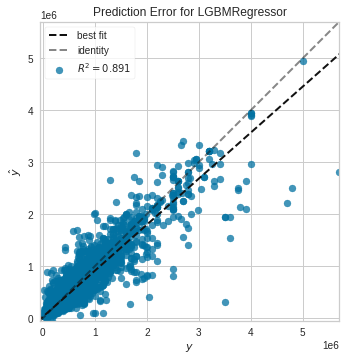

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lightgbm, plot = 'error')

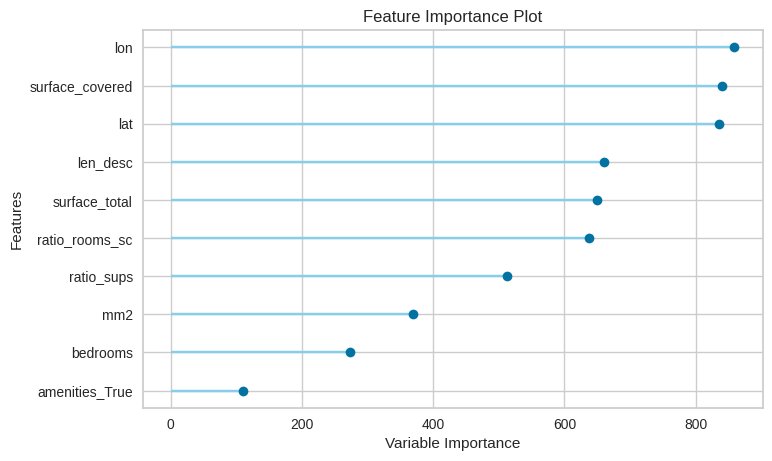

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lightgbm, plot = 'feature')

In [ ]:
final_model = finalize_model(tuned_lightgbm)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=70,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=80, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=70,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=80, objective=None,
              random_state=42, 

Importacion conjunto a predecir

In [ ]:
df_pred = pd.read_csv('/content/drive/MyDrive/Final_fundamentos/datos_para_predecir_30.csv', index_col=0)
df_pred.head()

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,dias_venta,...,living_comedor,baño_completo,corredor_responsable,ratio_sups,ratio_rooms_sc,len_desc,mm2,ratio_diasv_mm2,DIST_SUBTE,DIST_HOSP
0,-34.601266,-58.407908,balvanera,3.0,2.0,1.0,48.60,48.60,Departamento,-1.0,...,0,1,0,1.0,0.061728,1981,2166.5,-0.000462,1,1
1,-34.570272,-58.487296,villa urquiza,3.0,2.0,2.0,86.00,86.00,Departamento,-1.0,...,0,0,0,1.0,0.034884,1892,2802.0,-0.000357,1,0
2,-34.585000,-58.414550,palermo,5.0,4.0,2.0,172.00,172.00,Departamento,-1.0,...,0,1,0,1.0,0.029070,930,3351.5,-0.000298,1,1
3,-34.600414,-58.399793,balvanera,2.0,1.0,1.0,61.05,61.05,Departamento,-1.0,...,1,1,0,1.0,0.032760,1761,2166.5,-0.000462,1,1
4,-34.578066,-58.426532,palermo,2.0,1.0,2.0,52.00,52.00,Departamento,-1.0,...,0,0,0,1.0,0.038462,1610,3351.5,-0.000298,1,0


In [ ]:
df_pred[['aire_acond', 'terraza', 'pileta', 'parrilla',
  'gimnasio', 'lavadero', 'balcon', 'quincho',
  'patio', 'vigilancia', 'financiacion', 'ascensor',
  'toilett', 'cochera', 'sin_expensas', 'amenities',
  'subte', 'colectivo', 'encargado', 'seguridad',
  'living_comedor', 'baño_completo',
  'corredor_responsable', 'DIST_SUBTE', 'DIST_HOSP']] = df_pred[['aire_acond', 'terraza', 'pileta', 'parrilla',
  'gimnasio', 'lavadero', 'balcon', 'quincho',
  'patio', 'vigilancia', 'financiacion', 'ascensor',
  'toilett', 'cochera', 'sin_expensas', 'amenities',
  'subte', 'colectivo', 'encargado', 'seguridad',
  'living_comedor', 'baño_completo',
  'corredor_responsable', 'DIST_SUBTE', 'DIST_HOSP']].astype('bool')

In [ ]:
df_pred[['rooms', 'bedrooms', 'bathrooms', 'dias_venta']] = df_pred[['rooms', 'bedrooms', 'bathrooms', 'dias_venta']].round(0).astype(int)

In [ ]:
df_pred = df_pred.drop(columns = ['dias_venta', 'ratio_diasv_mm2'], axis = 1)

In [ ]:
df_pred.shape

(1087, 41)

In [ ]:
predict_model(final_model)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=70,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=80, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,35159.386,4.222992e+09,64984.5493,0.947,0.2321,0.184


,lat,lon,bedrooms,surface_total,surface_covered,ratio_sups,ratio_rooms_sc,len_desc,mm2,l3_abasto,...,colectivo_False,encargado_True,seguridad_False,living_comedor_True,baño_completo_True,corredor_responsable_True,DIST_SUBTE_True,DIST_HOSP_False,price,Label
0,-34.581371,-58.408386,1.0,33.000000,27.000000,0.818182,0.037037,1699.0,3351.500000,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,78000.0,1.066919e+05
1,-34.572258,-58.447262,1.0,43.994347,43.760284,0.994680,0.022852,1390.0,2974.500000,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,123500.0,1.023294e+05
2,-34.623604,-58.463264,2.0,56.000000,56.000000,1.000000,0.053571,678.0,2274.500000,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,115000.0,1.072814e+05
3,-34.544903,-58.472317,1.0,62.545856,47.565693,0.760493,0.042047,1769.0,2585.500000,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,116800.0,1.307001e+05
4,-34.612755,-58.413265,2.0,71.544319,80.197594,1.120950,0.037408,735.0,2454.500000,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,159800.0,1.681595e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29171,-34.587292,-58.403118,2.0,81.000000,65.000000,0.802469,0.046154,727.0,2848.195557,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,198000.0,2.015467e+05
29172,-34.640354,-58.374352,1.0,64.000000,64.000000,1.000000,0.031250,335.0,2400.500000,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,166400.0,1.203208e+05
29173,-34.602524,-58.445194,2.0,126.000000,60.000000,0.476190,0.050000,1638.0,2554.000000,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,180000.0,2.144644e+05
29174,-34.567368,-58.431149,3.0,303.000000,303.000000,1.000000,0.016502,1014.0,3351.500000,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1800000.0,1.725231e+06


In [ ]:
unseen_predictions = predict_model(final_model, data=df_pred)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=70,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=80, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0,0,0,0,0,0


,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,id,...,living_comedor,baño_completo,corredor_responsable,ratio_sups,ratio_rooms_sc,len_desc,mm2,DIST_SUBTE,DIST_HOSP,Label
0,-34.601266,-58.407908,balvanera,3,2,1,48.60,48.60,Departamento,1,...,False,True,False,1.0,0.061728,1981,2166.5,True,True,93425.200303
1,-34.570272,-58.487296,villa urquiza,3,2,2,86.00,86.00,Departamento,2,...,False,False,False,1.0,0.034884,1892,2802.0,True,False,307648.136361
2,-34.585000,-58.414550,palermo,5,4,2,172.00,172.00,Departamento,3,...,False,True,False,1.0,0.029070,930,3351.5,True,True,439642.294479
3,-34.600414,-58.399793,balvanera,2,1,1,61.05,61.05,Departamento,4,...,True,True,False,1.0,0.032760,1761,2166.5,True,True,117230.591397
4,-34.578066,-58.426532,palermo,2,1,2,52.00,52.00,Departamento,5,...,False,False,False,1.0,0.038462,1610,3351.5,True,False,233907.164940


In [ ]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['default'], unseen_predictions['Label'], metric = 'Accuracy')

In [ ]:
predicciones = unseen_predictions[['id', 'Label']]
predicciones.rename(columns = {'Label': 'price'}, inplace = True)
predicciones.head()

,id,price
0,1,93425.200303
1,2,307648.136361
2,3,439642.294479
3,4,117230.591397
4,5,233907.164940


In [ ]:
predicciones.to_csv('/content/drive/MyDrive/Final_fundamentos/predicciones_30.csv', index = False)

#### Modelo 3 - Pycaret

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Final_fundamentos/df_imp_30.csv', index_col=0)

In [ ]:
df[['aire_acond', 'terraza', 'pileta', 'parrilla',
  'gimnasio', 'lavadero', 'balcon', 'quincho',
  'patio', 'vigilancia', 'financiacion', 'ascensor',
  'toilett', 'cochera', 'sin_expensas', 'amenities',
  'subte', 'colectivo', 'encargado', 'seguridad',
  'living_comedor', 'baño_completo',
  'corredor_responsable', 'DIST_SUBTE', 'DIST_HOSP']] = df[['aire_acond', 'terraza', 'pileta', 'parrilla',
  'gimnasio', 'lavadero', 'balcon', 'quincho',
  'patio', 'vigilancia', 'financiacion', 'ascensor',
  'toilett', 'cochera', 'sin_expensas', 'amenities',
  'subte', 'colectivo', 'encargado', 'seguridad',
  'living_comedor', 'baño_completo',
  'corredor_responsable', 'DIST_SUBTE', 'DIST_HOSP']].astype('bool')

In [ ]:
df[['rooms', 'bedrooms', 'bathrooms', 'dias_venta']] = df[['rooms', 'bedrooms', 'bathrooms', 'dias_venta']].round(0).astype(int)

In [ ]:
df = df.drop(columns = ['dias_venta', 'ratio_diasv_mm2'], axis = 1)

In [ ]:
df.shape

(97253, 41)

In [ ]:
df.dtypes

lat                     float64
lon                     float64
l3                       object
rooms                     int64
bedrooms                  int64
bathrooms                 int64
surface_total           float64
surface_covered         float64
property_type            object
id                       object
price                   float64
description              object
aire_acond                 bool
terraza                    bool
pileta                     bool
parrilla                   bool
gimnasio                   bool
lavadero                   bool
balcon                     bool
quincho                    bool
patio                      bool
vigilancia                 bool
financiacion               bool
ascensor                   bool
toilett                    bool
cochera                    bool
sin_expensas               bool
amenities                  bool
subte                      bool
colectivo                  bool
encargado                  bool
segurida

In [ ]:
pip install pycaret

In [ ]:
pip install jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install markupsafe==2.0.1

In [ ]:
import jinja2
from pycaret.regression import *

exp_reg101 = setup(data = df.drop(columns=['id', 'description']),
                   #text_features= [''],
                   target = 'price', session_id=42) 

,Description,Value
0,session_id,42
1,Target,price
2,Original Data,"(97253, 39)"
3,Missing Values,True
4,Numeric Features,9
5,Categorical Features,29
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(68077, 120)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='price',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy='...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,3.484237e+04,1.074028e+10,1.028480e+05,8.724000e-01,0.2244,1.569000e-01,90.371
rf,Random Forest Regressor,3.653705e+04,1.110816e+10,1.046876e+05,8.678000e-01,0.2294,1.650000e-01,105.631
lightgbm,Light Gradient Boosting Machine,4.448389e+04,1.152747e+10,1.066624e+05,8.628000e-01,0.2613,2.090000e-01,1.152
gbr,Gradient Boosting Regressor,5.070488e+04,1.460714e+10,1.202618e+05,8.256000e-01,0.2871,2.348000e-01,23.322
dt,Decision Tree Regressor,4.881138e+04,2.076363e+10,1.433899e+05,7.513000e-01,0.3104,2.136000e-01,1.687
knn,K Neighbors Regressor,6.067956e+04,2.233605e+10,1.485468e+05,7.341000e-01,0.3457,2.769000e-01,2.777
br,Bayesian Ridge,8.625815e+04,3.418483e+10,1.842231e+05,5.914000e-01,0.6659,4.219000e-01,1.727
ridge,Ridge Regression,8.625649e+04,3.418653e+10,1.842287e+05,5.913000e-01,0.6663,4.219000e-01,0.085
llar,Lasso Least Angle Regression,8.577481e+04,3.419312e+10,1.842417e+05,5.913000e-01,0.6541,4.176000e-01,0.126
lasso,Lasso Regression,8.624783e+04,3.420073e+10,1.842705e+05,5.911000e-01,0.6660,4.218000e-01,6.375


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=42, verbose=0, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
gbr = create_model('gbr', random_state = 42)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,51841.8401,1.660159e+10,128847.1641,0.8240,0.2840,0.2304
1,50353.0868,1.194173e+10,109278.2333,0.8476,0.2819,0.2316
2,50896.9420,1.639099e+10,128027.3212,0.7984,0.2854,0.2307
3,51049.7136,1.345006e+10,115974.3754,0.8091,0.2920,0.2391
4,51352.3579,2.251907e+10,150063.5674,0.7975,0.2810,0.2284
5,47764.4194,1.061653e+10,103036.5370,0.8485,0.2809,0.2312
6,49402.4753,1.205378e+10,109789.7207,0.8469,0.2867,0.2341
7,50485.2292,1.398469e+10,118256.8898,0.8319,0.2871,0.2330
8,51494.7394,1.426701e+10,119444.5934,0.8112,0.2892,0.2354


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
import numpy as np

param_grid = {
    'n_estimators': [10, 50, 100, 500],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'subsample': [0.5, 0.7, 1.0],
    'max_depth': [3, 7, 9]
}


tuned_gbr = tune_model(gbr, custom_grid = param_grid)

INFO:logs:Initializing tune_model()
INFO:logs:tune_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), fold=None, round=4, n_iter=10, custom_grid={'n_estimators': [10, 50, 100, 500], 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0], 'subsample': [0.5, 0.7, 1.0], 'max_depth': [3, 7, 9]}, optimize=R2, custom_scorer=None, search_library=scikit-learn, search_algorithm=None

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:42:44
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Regressor


,Fold,MAE,MSE,RMSE,R2,RMSLE,MAPE


INFO:logs:Copying training dataset
INFO:logs:Checking base model
INFO:logs:Base model : Gradient Boosting Regressor
INFO:logs:Declaring metric variables
INFO:logs:Defining Hyperparameters
INFO:logs:custom_grid: {'actual_estimator__n_estimators': [10, 50, 100, 500], 'actual_estimator__learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0], 'actual_estimator__subsample': [0.5, 0.7, 1.0], 'actual_estimator__max_depth': [3, 7, 9]}
INFO:logs:Tuning with n_jobs=-1
INFO:logs:Initializing RandomizedSearchCV


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 114.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 192.7min finished
INFO:logs:best_params: {'actual_estimator__subsample': 0.7, 'actual_estimator__n_estimators': 500, 'actual_estimator__max_depth': 9, 'actual_estimator__learning_rate': 0.01}
INFO:logs:Hyperparameter search completed
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0,

In [ ]:
plot_model(tuned_gbr, plot = 'error')

In [ ]:
plot_model(tuned_gbr, plot = 'feature')

In [ ]:
final_model = finalize_model(tuned_gbr)

In [ ]:
final_model = finalize_model(tuned_lightgbm)

In [ ]:
df_pred = pd.read_csv('/content/drive/MyDrive/Final_fundamentos/datos_para_predecir_30.csv', index_col=0)
df_pred.head()

In [ ]:
df_pred[['aire_acond', 'terraza', 'pileta', 'parrilla',
  'gimnasio', 'lavadero', 'balcon', 'quincho',
  'patio', 'vigilancia', 'financiacion', 'ascensor',
  'toilett', 'cochera', 'sin_expensas', 'amenities',
  'subte', 'colectivo', 'encargado', 'seguridad',
  'living_comedor', 'baño_completo',
  'corredor_responsable', 'DIST_SUBTE', 'DIST_HOSP']] = df_pred[['aire_acond', 'terraza', 'pileta', 'parrilla',
  'gimnasio', 'lavadero', 'balcon', 'quincho',
  'patio', 'vigilancia', 'financiacion', 'ascensor',
  'toilett', 'cochera', 'sin_expensas', 'amenities',
  'subte', 'colectivo', 'encargado', 'seguridad',
  'living_comedor', 'baño_completo',
  'corredor_responsable', 'DIST_SUBTE', 'DIST_HOSP']].astype('bool')

In [ ]:
df_pred[['rooms', 'bedrooms', 'bathrooms', 'dias_venta']] = df_pred[['rooms', 'bedrooms', 'bathrooms', 'dias_venta']].round(0).astype(int)

In [ ]:
df_pred = df_pred.drop(columns = ['dias_venta', 'ratio_diasv_mm2'], axis = 1)

In [ ]:
predict_model(final_model)

In [ ]:
unseen_predictions = predict_model(final_model, data=df_pred)
unseen_predictions.head()

In [ ]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['default'], unseen_predictions['Label'], metric = 'Accuracy')

In [ ]:
predicciones = unseen_predictions[['id', 'Label']]
predicciones.rename(columns = {'Label': 'price'}, inplace = True)
predicciones.head()

In [ ]:
predicciones.to_csv('/content/drive/MyDrive/Final_fundamentos/predicciones_30_gbr.csv', index = False)

#### Modelo 4 y 5 - Random Forest

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_.drop(columns = ['price'], axis = 1)
y = df_['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np


param_grid = {
    'bootstrap': [True],
    'max_depth': [20, 50, 70, 100],
    'max_features': [0.5, 0.7, 0.9],
    'min_samples_leaf': [1, 2, 5, 10],
    'min_samples_split': [2, 5, 10, 15],
    'n_estimators': [30, 50, 70, 100, 200, 300]
}


rf = RandomForestRegressor()


grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

In [ ]:
best_grid = grid_search.best_estimator_
best_grid

In [ ]:
modelo = RandomForestRegressor(
            n_estimators = 200,
            criterion    = 'mse',
            max_depth    = 70,
            max_features = 0.5,
            min_samples_leaf = 1,
            min_samples_split = 2,
            n_jobs       = -1,
            random_state = 42)

# Entrenamiento del modelo
modelo.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error


predicciones = modelo.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

In [ ]:
importancia_predictores = pd.DataFrame(
                            {'predictor': df_.drop(columns = "price").columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)[:20]

In [ ]:
import seaborn as sns

sns.jointplot(x = predicciones, y = y_test)

In [ ]:
# Crearemos un DF con los datos objetivo y los datos predichos para poder visualizarlos. 
y_test = y_test.reset_index(drop=True) 
df_predicciones = pd.DataFrame(predicciones, columns=['Prediccion'])
df_predicciones['Target'] = y_test
df_predicciones.head(5)

In [ ]:
predicciones_31 = modelo.predict(df_pred_.drop(['price'], axis = 1))
predicciones_31 = pd.DataFrame(predicciones_31)

final_df_pred.reset_index(drop = True, inplace = True)
predicciones_31.reset_index(drop = True, inplace = True)

predicciones_31['id'] = final_df_pred['id']
predicciones_31.columns = ['price', 'id']

predicciones_31.head()

In [ ]:
first_column = predicciones_31.pop('id') 
  
predicciones_31.insert(0, 'id', first_column) 
predicciones_31.head()

In [ ]:
predicciones_31.to_csv('/Users/ceciliaguillametchargue/Downloads/predicciones_31_rf2.csv', index = False)

#### Modelo 9 - Catboost

In [ ]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = None

df = pd.read_csv('/content/drive/MyDrive/Final_fundamentos/df_imp_07.csv', index_col = 0)
df = df.drop(['precio_mm2'], axis = 1)
df.head()

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,id,price,description,aire_acond,terraza,pileta,parrilla,gimnasio,lavadero,balcon,quincho,patio,vigilancia,financiacion,ascensor,toilett,cochera,sin_expensas,amenities,subte,colectivo,encargado,seguridad,living_comedor,baño_completo,corredor_responsable,luminoso,madera,vestidor,baulera,ratio_sups,ratio_rooms_sc,len_desc,laundry,mm2_precio,DIST_SUBTE,DIST_HOSP,frec_esp_ver,sup_esp_ver
0,-34.61,-58.40,balvanera,3.00,2.00,1.00,61.90,59.14,Departamento,20dlUrbZUprl5dJqvoDFfA==,110000.00,venta de departamento 3 ambientes en balvanera...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0.96,0.05,1655,0,2166.50,1,1,8.00,1907.00
1,-34.59,-58.38,recoleta,4.00,2.00,2.00,187.00,187.00,Departamento,Mld7HLELakUNew3ParJwqQ==,570000.00,solicitar archivo de fotos <br> <br>living y c...,0,1,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,1,1.00,0.02,1580,0,3062.00,1,0,66.00,9699.00
2,-34.64,-58.52,liniers,1.00,0.00,1.00,43.00,30.00,Departamento,+gTlHBXSTyDNVlOTaYswTQ==,69500.00,venta monoambiente al contrafrente con patio.<...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.70,0.03,487,0,2263.50,0,1,28.00,3272.00
3,-34.58,-58.49,villa urquiza,3.00,2.00,2.00,75.00,68.00,Departamento,A5q/RsQ0iQW9q70MPX6yQQ==,259000.00,departamento en venta 3 ambientes en villa urq...,0,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0.91,0.04,1496,0,2802.00,1,0,46.00,11353.00
4,-34.57,-58.46,belgrano,1.00,3.00,1.00,43.88,40.34,Departamento,gq3YhI+FwfowTwaebzalMw==,325000.00,magnifico departamento en la mejor esquina de...,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.92,0.02,806,0,3276.00,0,1,53.00,44291.00


In [ ]:
df['l3'] = df['l3'].astype(str)
df['property_type'] = df['property_type'].astype(str)

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [ ]:
import catboost as cb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import pickle

In [ ]:
zonas = {'puerto madero': 'alta_1',
 'palermo': 'alta_2',
 'colegiales': 'alta_2',
 'belgrano': 'alta_2',
 'nuñez': 'alta_2',
 'retiro': 'alta_2',
 'recoleta': 'alta_2',
 'almagro': 'media',
 'villa crespo': 'media',
 'parque chacabuco': 'media',
 'villa santa rita': 'media',
 'villa urquiza': 'media',
 'villa devoto': 'media',
 'caballito': 'media',
 'flores': 'media',
 'villa del parque': 'media',
 'monte castro': 'media',
 'chacarita': 'media',
 'san telmo': 'media',
 'villa pueyrredon': 'media',
 'liniers': 'media',
 'saavedra': 'media',
 'barracas': 'media',
 'villa luro': 'media',
 'boedo': 'media',
 'monserrat': 'media',
 'paternal': 'media',
 'mataderos': 'media',
 'coghlan': 'media',
 'versalles': 'media',
 'villa ortuzar': 'media',
 'agronomia': 'media',
 'parque chas': 'media',
 'parque avellaneda': 'baja',
 'san cristobal': 'baja',
 'nueva pompeya': 'baja',
 'la boca': 'baja',
 'constitucion': 'baja',
 'villa real': 'baja',
 'villa soldati': 'baja',
 'villa general mitre': 'baja',
 'floresta': 'baja',
 'velez sarsfield': 'baja',
 'villa riachuelo': 'baja',
 'lugano': 'baja',
 'san nicolas': 'baja',
 'parque patricios': 'baja',
 'balvanera': 'baja'}

In [ ]:
df['grupo'] = df['l3'].map(zonas)

In [ ]:
df.grupo.value_counts()

alta_2    42165
media     42157
baja      11060
alta_1     1813
Name: grupo, dtype: int64

In [ ]:
parameters = {'depth'         : [4, 7, 10],
              'learning_rate' : [0.01, 0.03, 0.05],
              'iterations'    : [200, 500],
              'subsample'     : [0.7, 0.9]}

Zona alta 1

In [ ]:
X = df[df['grupo'] == 'alta_1'].drop(['price', 'description'], axis = 1)
y = df[df['grupo'] == 'alta_1']['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
model_alta_1 = cb.CatBoostRegressor(loss_function='RMSE', random_state = 42)
grid_alta_1 = GridSearchCV(estimator = model_alta_1, param_grid = parameters, cv = 5, n_jobs=-1)
grid_alta_1.fit(X_train, y_train, cat_features = ['l3', 'grupo', 'property_type'])
best_param_alta_1 = grid_alta_1.best_params_
##

model_alta_1 = cb.CatBoostRegressor(loss_function='RMSE', random_state = 42, **grid_alta_1.best_params_)
model_alta_1.fit(X_train, y_train, cat_features = ['l3', 'grupo', 'property_type'])

In [ ]:
best_param_alta_1

{'depth': 7, 'iterations': 500, 'learning_rate': 0.03, 'subsample': 0.9}

Zona alta 2

In [ ]:
X = df[df['grupo'] == 'alta_2'].drop(['id', 'price', 'description'], axis = 1)
y = df[df['grupo'] == 'alta_2']['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
    
model_alta_2 = cb.CatBoostRegressor(loss_function='RMSE', random_state = 42)
grid_alta_2 = GridSearchCV(estimator = model_alta_2, param_grid = parameters, cv = 5, n_jobs=-1)
grid_alta_2.fit(X_train, y_train, cat_features = ['l3', 'grupo', 'property_type'])
best_param_alta_2 = grid_alta_2.best_params_
##

model_alta_2 = cb.CatBoostRegressor(loss_function='RMSE', random_state = 42, **grid_alta_2.best_params_)
model_alta_2.fit(X_train, y_train, cat_features = ['l3', 'grupo', 'property_type'])

In [ ]:
best_param_alta_2

Barrios zona media

In [ ]:
X = df[df['grupo'] == 'media'].drop(['id', 'price', 'description'], axis = 1)
y = df[df['grupo'] == 'media']['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
    
model_media = cb.CatBoostRegressor(loss_function='RMSE', random_state = 42)
grid_media = GridSearchCV(estimator = model_media, param_grid = parameters, cv = 5, n_jobs=-1)
grid_media.fit(X_train, y_train, cat_features = ['l3', 'grupo', 'property_type'])
best_param_media = grid_media.best_params_
##

model_media = cb.CatBoostRegressor(loss_function='RMSE', random_state = 42, **grid_media.best_params_)
model_media.fit(X_train, y_train, cat_features = ['l3', 'grupo', 'property_type'])

Barrios zona baja

In [ ]:
X = df[df['grupo'] == 'baja'].drop(['id', 'price', 'description'], axis = 1)
y = df[df['grupo'] == 'baja']['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
    
model_baja = cb.CatBoostRegressor(loss_function='RMSE', random_state = 42)
grid_baja = GridSearchCV(estimator = model_baja, param_grid = parameters, cv = 5, n_jobs=-1)
grid_baja.fit(X_train, y_train, cat_features = ['l3', 'grupo', 'property_type'])
best_param_baja = grid_baja.best_params_
##

model_baja = cb.CatBoostRegressor(loss_function='RMSE', random_state = 42, **grid_baja.best_params_)
model_baja.fit(X_train, y_train, cat_features = ['l3', 'grupo', 'property_type'])

In [ ]:
best_param_media

##### Predicciones

In [ ]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = None

df_pred = pd.read_csv('/content/datos_a_predecir_10.csv')

df_pred.head()

,lon,lat,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,id,price,description,aire_acond,terraza,pileta,parrilla,gimnasio,lavadero,balcon,quincho,patio,vigilancia,financiacion,ascensor,toilett,cochera,sin_expensas,amenities,subte,colectivo,encargado,seguridad,living_comedor,baño_completo,corredor_responsable,luminoso,madera,vestidor,baulera,ratio_sups,ratio_rooms_sc,len_desc,laundry,mm2_precio,DIST_SUBTE,DIST_HOSP,frec_esp_ver,sup_esp_ver
0,-58.41,-34.60,balvanera,3.00,2.00,1.00,48.60,45.00,Departamento,1,NaN,"descripcion basica:<br>- ¡gran oportunidad, de...",0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0.93,0.07,1981,0,2166.50,1,1,8.00,1907.00
1,-58.49,-34.57,villa urquiza,3.00,2.00,2.00,86.00,75.00,Departamento,2,NaN,edificio de nivel superior en la zona! - detal...,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0.87,0.04,1892,1,2802.00,1,0,46.00,11353.00
2,-58.41,-34.59,palermo,5.00,4.00,2.00,172.00,160.00,Departamento,3,NaN,excelente piso con palier privado y entrada de...,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0.93,0.03,930,0,3351.50,1,1,123.00,120744.00
3,-58.40,-34.60,balvanera,2.00,1.00,1.00,61.05,61.00,Departamento,4,NaN,¡dos ambientes con dependencia en zona faculta...,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1.00,0.03,1761,0,2166.50,1,1,8.00,1907.00
4,-58.43,-34.58,palermo,2.00,1.00,2.00,52.00,44.00,Departamento,5,NaN,"40% de anticipo, saldo en 28 cuotas<br><br>air...",1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0.85,0.05,1610,0,3351.50,1,0,123.00,120744.00


In [ ]:
df_pred = df_pred.drop(['description', 'price'], axis = 1)

In [ ]:
df_pred['grupo'] = df_pred['l3'].map(zonas)

Zona alta 1

In [ ]:
model_alta_1 = cb.CatBoostRegressor(loss_function='RMSE', random_state = 42, depth = 7, iterations = 500, learning_rate = 0.03, subsample = 0.9)
model_alta_1.fit(X_train, y_train, cat_features = ['id', 'l3', 'grupo', 'property_type'])

In [ ]:
df_alta_1 = df_pred[df_pred['grupo'] == 'alta_1']

In [ ]:
df_alta_1['prediccion'] = model_alta_1.predict(df_pred[df_pred['grupo'] == 'alta_1'])

In [ ]:
df_alta_1.head()

,lon,lat,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,id,aire_acond,terraza,pileta,parrilla,gimnasio,lavadero,balcon,quincho,patio,vigilancia,financiacion,ascensor,toilett,cochera,sin_expensas,amenities,subte,colectivo,encargado,seguridad,living_comedor,baño_completo,corredor_responsable,luminoso,madera,vestidor,baulera,ratio_sups,ratio_rooms_sc,len_desc,laundry,mm2_precio,DIST_SUBTE,DIST_HOSP,frec_esp_ver,sup_esp_ver,grupo,prediccion
52,-58.36,-34.61,puerto madero,4.00,3.00,5.00,177.00,177.00,Departamento,53,0,0,1,0,1,1,0,0,0,0,0,1,1,1,0,1,0,0,0,1,1,1,0,1,0,1,1,1.00,0.02,1624,1,5904.00,0,0,59.00,0.00,alta_1,1142786.46
285,-58.36,-34.61,puerto madero,2.00,1.00,1.00,74.00,74.00,Departamento,286,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.00,0.03,858,1,5904.00,0,0,59.00,0.00,alta_1,357785.88
412,-58.36,-34.61,puerto madero,3.00,2.00,1.00,102.00,102.00,Departamento,413,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1.00,0.03,906,1,5904.00,0,0,59.00,0.00,alta_1,452062.11
535,-58.36,-34.62,puerto madero,4.00,2.00,2.00,118.00,110.00,Departamento,536,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0.93,0.04,713,1,5904.00,0,1,59.00,0.00,alta_1,507776.33
649,-58.36,-34.62,puerto madero,3.00,2.00,2.00,112.00,105.00,Departamento,650,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0.94,0.03,594,0,5904.00,0,1,59.00,0.00,alta_1,478149.70


Modelo alta 2

In [ ]:
X = df[df['grupo'] == 'alta_2'].drop(['price', 'description'], axis = 1)
y = df[df['grupo'] == 'alta_2']['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
    

model_alta_2 = cb.CatBoostRegressor(loss_function='RMSE', random_state = 42, depth = 10, iterations = 500, learning_rate = 0.03, subsample = 0.9)
model_alta_2.fit(X_train, y_train, cat_features = ['id', 'l3', 'grupo', 'property_type'])

In [ ]:
df_alta_2 = df_pred[df_pred['grupo'] == 'alta_2']

In [ ]:
df_alta_2['prediccion'] = model_alta_2.predict(df_pred[df_pred['grupo'] == 'alta_2'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_alta_2.head()

,lon,lat,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,id,aire_acond,terraza,pileta,parrilla,gimnasio,lavadero,balcon,quincho,patio,vigilancia,financiacion,ascensor,toilett,cochera,sin_expensas,amenities,subte,colectivo,encargado,seguridad,living_comedor,baño_completo,corredor_responsable,luminoso,madera,vestidor,baulera,ratio_sups,ratio_rooms_sc,len_desc,laundry,mm2_precio,DIST_SUBTE,DIST_HOSP,frec_esp_ver,sup_esp_ver,grupo,prediccion
2,-58.41,-34.59,palermo,5.00,4.00,2.00,172.00,160.00,Departamento,3,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0.93,0.03,930,0,3351.50,1,1,123.00,120744.00,alta_2,460814.72
4,-58.43,-34.58,palermo,2.00,1.00,2.00,52.00,44.00,Departamento,5,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0.85,0.05,1610,0,3351.50,1,0,123.00,120744.00,alta_2,220119.87
6,-58.43,-34.58,palermo,1.00,0.00,1.00,32.03,22.00,Departamento,7,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.69,0.05,384,0,3351.50,0,0,123.00,120744.00,alta_2,102616.36
7,-58.40,-34.59,palermo,3.00,2.00,2.00,85.00,65.00,Departamento,8,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0.76,0.05,1617,0,3351.50,1,1,123.00,120744.00,alta_2,281438.11
8,-58.46,-34.55,belgrano,4.00,3.00,2.00,90.00,86.00,Departamento,9,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0.96,0.05,1610,0,3276.00,0,0,53.00,44291.00,alta_2,363276.14


Modelo media

In [ ]:
X = df[df['grupo'] == 'media'].drop(['price', 'description'], axis = 1)
y = df[df['grupo'] == 'media']['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
    

model_media = cb.CatBoostRegressor(loss_function='RMSE', random_state = 42, depth = 10, iterations = 500, learning_rate = 0.05, subsample = 0.9)
model_media.fit(X_train, y_train, cat_features = ['id', 'l3', 'grupo', 'property_type'])

In [ ]:
df_media = df_pred[df_pred['grupo'] == 'media']

In [ ]:
df_media['prediccion'] = model_media.predict(df_pred[df_pred['grupo'] == 'media'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_media.head()

,lon,lat,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,id,aire_acond,terraza,pileta,parrilla,gimnasio,lavadero,balcon,quincho,patio,vigilancia,financiacion,ascensor,toilett,cochera,sin_expensas,amenities,subte,colectivo,encargado,seguridad,living_comedor,baño_completo,corredor_responsable,luminoso,madera,vestidor,baulera,ratio_sups,ratio_rooms_sc,len_desc,laundry,mm2_precio,DIST_SUBTE,DIST_HOSP,frec_esp_ver,sup_esp_ver,grupo,prediccion
1,-58.49,-34.57,villa urquiza,3.00,2.00,2.00,86.00,75.00,Departamento,2,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0.87,0.04,1892,1,2802.00,1,0,46.00,11353.00,media,269667.82
5,-58.50,-34.57,villa urquiza,4.00,3.00,1.00,79.00,70.00,PH,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0.89,0.06,811,0,2802.00,0,0,46.00,11353.00,media,163570.98
11,-58.50,-34.59,villa pueyrredon,3.00,1.00,1.00,76.00,60.00,PH,12,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.79,0.05,2601,0,2414.00,0,1,10.00,77100.00,media,147340.61
12,-58.48,-34.54,saavedra,4.00,3.00,2.00,118.13,80.00,PH,13,0,1,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0.68,0.05,1957,0,2585.50,0,0,90.00,714.00,media,232746.34
13,-58.50,-34.60,villa devoto,3.00,2.00,2.00,82.00,70.00,Departamento,14,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0.85,0.04,1133,0,2595.50,0,1,58.00,15963.00,media,218437.50


Modela baja

In [ ]:
X = df[df['grupo'] == 'baja'].drop(['price', 'description'], axis = 1)
y = df[df['grupo'] == 'baja']['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model_baja = cb.CatBoostRegressor(loss_function='RMSE', random_state = 42, depth = 7, iterations = 500, learning_rate = 0.05, subsample = 0.9)
model_baja.fit(X_train, y_train, cat_features = ['id', 'l3', 'grupo', 'property_type'])

In [ ]:
df_baja = df_pred[df_pred['grupo'] == 'baja']

In [ ]:
df_baja['prediccion'] = model_baja.predict(df_pred[df_pred['grupo'] == 'baja'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_baja.head()

,lon,lat,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,id,aire_acond,terraza,pileta,parrilla,gimnasio,lavadero,balcon,quincho,patio,vigilancia,financiacion,ascensor,toilett,cochera,sin_expensas,amenities,subte,colectivo,encargado,seguridad,living_comedor,baño_completo,corredor_responsable,luminoso,madera,vestidor,baulera,ratio_sups,ratio_rooms_sc,len_desc,laundry,mm2_precio,DIST_SUBTE,DIST_HOSP,frec_esp_ver,sup_esp_ver,grupo,prediccion
0,-58.41,-34.60,balvanera,3.00,2.00,1.00,48.60,45.00,Departamento,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0.93,0.07,1981,0,2166.50,1,1,8.00,1907.00,baja,107819.55
3,-58.40,-34.60,balvanera,2.00,1.00,1.00,61.05,61.00,Departamento,4,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1.00,0.03,1761,0,2166.50,1,1,8.00,1907.00,baja,111968.38
9,-58.49,-34.62,floresta,5.00,3.00,1.00,128.00,110.00,PH,10,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.86,0.05,1151,0,2037.00,0,1,6.00,0.00,baja,228233.83
15,-58.38,-34.60,san nicolas,2.00,1.00,1.00,34.66,31.00,Departamento,16,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0.89,0.06,1389,0,2329.00,1,0,44.00,0.00,baja,95233.04
18,-58.51,-34.63,floresta,2.00,1.00,1.00,84.90,44.00,Departamento,19,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.52,0.05,1494,0,2037.00,0,1,6.00,0.00,baja,118062.18


Union dfs

In [ ]:
df_predicciones = pd.concat([df_alta_1, df_alta_2, df_media, df_baja])
df_predicciones

,lon,lat,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,id,aire_acond,terraza,pileta,parrilla,gimnasio,lavadero,balcon,quincho,patio,vigilancia,financiacion,ascensor,toilett,cochera,sin_expensas,amenities,subte,colectivo,encargado,seguridad,living_comedor,baño_completo,corredor_responsable,luminoso,madera,vestidor,baulera,ratio_sups,ratio_rooms_sc,len_desc,laundry,mm2_precio,DIST_SUBTE,DIST_HOSP,frec_esp_ver,sup_esp_ver,grupo,prediccion
52,-58.36,-34.61,puerto madero,4.00,3.00,5.00,177.00,177.00,Departamento,53,0,0,1,0,1,1,0,0,0,0,0,1,1,1,0,1,0,0,0,1,1,1,0,1,0,1,1,1.00,0.02,1624,1,5904.00,0,0,59.00,0.00,alta_1,1142786.46
285,-58.36,-34.61,puerto madero,2.00,1.00,1.00,74.00,74.00,Departamento,286,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.00,0.03,858,1,5904.00,0,0,59.00,0.00,alta_1,357785.88
412,-58.36,-34.61,puerto madero,3.00,2.00,1.00,102.00,102.00,Departamento,413,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1.00,0.03,906,1,5904.00,0,0,59.00,0.00,alta_1,452062.11
535,-58.36,-34.62,puerto madero,4.00,2.00,2.00,118.00,110.00,Departamento,536,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0.93,0.04,713,1,5904.00,0,1,59.00,0.00,alta_1,507776.33
649,-58.36,-34.62,puerto madero,3.00,2.00,2.00,112.00,105.00,Departamento,650,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0.94,0.03,594,0,5904.00,0,1,59.00,0.00,alta_1,478149.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,-58.40,-34.62,san cristobal,3.00,2.00,1.00,54.00,49.00,PH,1068,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0.91,0.06,1808,0,2039.00,0,1,15.00,18842.00,baja,100888.12
1074,-58.47,-34.60,villa general mitre,3.00,2.00,1.00,77.51,67.00,Departamento,1075,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0.86,0.04,1908,0,1872.00,0,1,0.00,0.00,baja,152782.22
1076,-58.40,-34.60,balvanera,3.00,2.00,2.00,70.00,66.00,Departamento,1077,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0.94,0.05,1213,0,2166.50,1,1,8.00,1907.00,baja,173924.94
1082,-58.40,-34.61,balvanera,2.00,1.00,1.00,36.85,36.00,Departamento,1083,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0.98,0.06,1156,0,2166.50,1,1,8.00,1907.00,baja,75228.75


In [ ]:
pd.options.display.max_rows = None

In [ ]:
df_predicciones['id'] = df_predicciones['id'].astype(int)

In [ ]:
predicciones = df_predicciones[['id', 'prediccion']].sort_values('id')
predicciones.to_csv('/content/predicciones_11.csv', index = False)

#### Modelo 10 - Catboost (sin outliers)

In [ ]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = None

df = pd.read_csv('/content/drive/MyDrive/Final_fundamentos/df_sinoutliers_11.csv')
df = df.drop(['precio_mm2'], axis = 1)
df.head()

,lat,lon,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,id,price,description,aire_acond,terraza,pileta,parrilla,gimnasio,lavadero,balcon,quincho,patio,vigilancia,financiacion,ascensor,toilett,cochera,sin_expensas,amenities,subte,colectivo,encargado,seguridad,living_comedor,baño_completo,corredor_responsable,luminoso,madera,vestidor,baulera,ratio_sups,ratio_rooms_sc,len_desc,laundry,mm2_precio,DIST_SUBTE,DIST_HOSP,frec_esp_ver,sup_esp_ver
0,-34.61,-58.37,puerto madero,5.00,4.00,3.00,240.00,230.00,Departamento,rCjnWA2NXapsEIcOVh+1GQ==,1300000.00,lofts de madero <br>espectacular triplex muy l...,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0.96,0.02,443,1,5904.00,1,0,59.00,0.00
1,-34.61,-58.36,puerto madero,3.00,2.00,3.00,162.00,150.00,Departamento,2pd9sxyrTlKaUO9TtAjQaw==,1350000.00,departamento de 3 ambientes c/dependencia de s...,1,0,0,0,0,1,1,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0.93,0.02,1887,0,5904.00,0,0,59.00,0.00
2,-34.61,-58.36,puerto madero,2.00,1.00,2.00,90.00,90.00,Departamento,vGQlpRmYlRYvxDT7Bjd+8Q==,850000.00,imponente torre. <br>primera categoria. <br><b...,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.00,0.02,186,0,5904.00,0,0,59.00,0.00
3,-34.61,-58.36,puerto madero,3.00,2.00,3.00,136.00,136.00,Departamento,OkVohtXFRveD3V0CasppvQ==,730000.00,&gt; palier privado. <br>&gt; living/comedor e...,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,0.02,1126,0,5904.00,0,0,59.00,0.00
4,-34.62,-58.36,puerto madero,3.00,2.00,3.00,120.00,115.00,Departamento,Stbi/lTQ+5KZzobsSJ0R9A==,600000.00,departamento de 3 amb cocina semi integradato...,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.96,0.03,1668,1,5904.00,0,1,59.00,0.00


In [ ]:
df['l3'] = df['l3'].astype(str)
df['property_type'] = df['property_type'].astype(str)

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
import catboost as cb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import pickle

In [ ]:
zonas = {'puerto madero': 'alta_1',
 'palermo': 'alta_2',
 'colegiales': 'alta_2',
 'belgrano': 'alta_2',
 'nuñez': 'alta_2',
 'retiro': 'alta_2',
 'recoleta': 'alta_2',
 'almagro': 'media',
 'villa crespo': 'media',
 'parque chacabuco': 'media',
 'villa santa rita': 'media',
 'villa urquiza': 'media',
 'villa devoto': 'media',
 'caballito': 'media',
 'flores': 'media',
 'villa del parque': 'media',
 'monte castro': 'media',
 'chacarita': 'media',
 'san telmo': 'media',
 'villa pueyrredon': 'media',
 'liniers': 'media',
 'saavedra': 'media',
 'barracas': 'media',
 'villa luro': 'media',
 'boedo': 'media',
 'monserrat': 'media',
 'paternal': 'media',
 'mataderos': 'media',
 'coghlan': 'media',
 'versalles': 'media',
 'villa ortuzar': 'media',
 'agronomia': 'media',
 'parque chas': 'media',
 'parque avellaneda': 'baja',
 'san cristobal': 'baja',
 'nueva pompeya': 'baja',
 'la boca': 'baja',
 'constitucion': 'baja',
 'villa real': 'baja',
 'villa soldati': 'baja',
 'villa general mitre': 'baja',
 'floresta': 'baja',
 'velez sarsfield': 'baja',
 'villa riachuelo': 'baja',
 'lugano': 'baja',
 'san nicolas': 'baja',
 'parque patricios': 'baja',
 'balvanera': 'baja'}

In [ ]:
df['grupo'] = df['l3'].map(zonas)

In [ ]:
df.grupo.value_counts()

media     37511
alta_2    33716
baja       9907
alta_1     1619
Name: grupo, dtype: int64

In [ ]:
df['grupo'] = df['grupo'].astype(str)

In [ ]:
parameters = {'depth'         : [4, 7, 10],
              'learning_rate' : [0.01, 0.03, 0.05],
              'iterations'    : [200, 500],
              'subsample'     : [0.7, 0.9]}

In [ ]:
X = df[df['grupo'] == 'alta_1'].drop(['id', 'price', 'description'], axis = 1)
y = df[df['grupo'] == 'alta_1']['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
model_alta_1 = cb.CatBoostRegressor(loss_function='RMSE', random_state = 42)
grid_alta_1 = GridSearchCV(estimator = model_alta_1, param_grid = parameters, cv = 5, n_jobs=-1)
grid_alta_1.fit(X_train, y_train, cat_features = ['l3', 'grupo', 'property_type'])
best_param_alta_1 = grid_alta_1.best_params_
##

model_alta_1 = cb.CatBoostRegressor(loss_function='RMSE', random_state = 42, **grid_alta_1.best_params_)
model_alta_1.fit(X_train, y_train, cat_features = ['l3', 'grupo', 'property_type'])

In [ ]:
best_param_alta_1

{'depth': 7, 'iterations': 500, 'learning_rate': 0.05, 'subsample': 0.7}

In [ ]:
X = df[df['grupo'] == 'alta_2'].drop(['id', 'price', 'description'], axis = 1)
y = df[df['grupo'] == 'alta_2']['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
    
model_alta_2 = cb.CatBoostRegressor(loss_function='RMSE', random_state = 42)
grid_alta_2 = GridSearchCV(estimator = model_alta_2, param_grid = parameters, cv = 5, n_jobs=-1)
grid_alta_2.fit(X_train, y_train, cat_features = ['l3', 'grupo', 'property_type'])
best_param_alta_2 = grid_alta_2.best_params_
##

model_alta_2 = cb.CatBoostRegressor(loss_function='RMSE', random_state = 42, **grid_alta_2.best_params_)
model_alta_2.fit(X_train, y_train, cat_features = ['l3', 'grupo', 'property_type'])

In [ ]:
best_param_alta_2

{'depth': 10, 'iterations': 500, 'learning_rate': 0.05, 'subsample': 0.7}

Barrios zona media

In [ ]:
X = df[df['grupo'] == 'media'].drop(['id', 'price', 'description'], axis = 1)
y = df[df['grupo'] == 'media']['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
    
model_media = cb.CatBoostRegressor(loss_function='RMSE', random_state = 42)
grid_media = GridSearchCV(estimator = model_media, param_grid = parameters, cv = 5, n_jobs=-1)
grid_media.fit(X_train, y_train, cat_features = ['l3', 'grupo', 'property_type'])
best_param_media = grid_media.best_params_
##

model_media = cb.CatBoostRegressor(loss_function='RMSE', random_state = 42, **grid_media.best_params_)
model_media.fit(X_train, y_train, cat_features = ['l3', 'grupo', 'property_type'])

In [ ]:
best_param_media

{'depth': 10, 'iterations': 500, 'learning_rate': 0.05, 'subsample': 0.7}

Barrios zona baja

In [ ]:
X = df[df['grupo'] == 'baja'].drop(['id', 'price', 'description'], axis = 1)
y = df[df['grupo'] == 'baja']['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
    
model_baja = cb.CatBoostRegressor(loss_function='RMSE', random_state = 42)
grid_baja = GridSearchCV(estimator = model_baja, param_grid = parameters, cv = 5, n_jobs=-1)
grid_baja.fit(X_train, y_train, cat_features = ['l3', 'grupo', 'property_type'])
best_param_baja = grid_baja.best_params_
##

model_baja = cb.CatBoostRegressor(loss_function='RMSE', random_state = 42, **grid_baja.best_params_)
model_baja.fit(X_train, y_train, cat_features = ['l3', 'grupo', 'property_type'])

In [ ]:
best_param_baja

{'depth': 10, 'iterations': 500, 'learning_rate': 0.05, 'subsample': 0.7}

##### Predicciones

In [ ]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = None

df_pred = pd.read_csv('/content/drive/MyDrive/Final_fundamentos/datos_a_predecir_10.csv')

df_pred.head()

,lon,lat,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,id,price,description,aire_acond,terraza,pileta,parrilla,gimnasio,lavadero,balcon,quincho,patio,vigilancia,financiacion,ascensor,toilett,cochera,sin_expensas,amenities,subte,colectivo,encargado,seguridad,living_comedor,baño_completo,corredor_responsable,luminoso,madera,vestidor,baulera,ratio_sups,ratio_rooms_sc,len_desc,laundry,mm2_precio,DIST_SUBTE,DIST_HOSP,frec_esp_ver,sup_esp_ver
0,-58.41,-34.60,balvanera,3.00,2.00,1.00,48.60,45.00,Departamento,1,NaN,"descripcion basica:<br>- ¡gran oportunidad, de...",0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0.93,0.07,1981,0,2166.50,1,1,8.00,1907.00
1,-58.49,-34.57,villa urquiza,3.00,2.00,2.00,86.00,75.00,Departamento,2,NaN,edificio de nivel superior en la zona! - detal...,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0.87,0.04,1892,1,2802.00,1,0,46.00,11353.00
2,-58.41,-34.59,palermo,5.00,4.00,2.00,172.00,160.00,Departamento,3,NaN,excelente piso con palier privado y entrada de...,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0.93,0.03,930,0,3351.50,1,1,123.00,120744.00
3,-58.40,-34.60,balvanera,2.00,1.00,1.00,61.05,61.00,Departamento,4,NaN,¡dos ambientes con dependencia en zona faculta...,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1.00,0.03,1761,0,2166.50,1,1,8.00,1907.00
4,-58.43,-34.58,palermo,2.00,1.00,2.00,52.00,44.00,Departamento,5,NaN,"40% de anticipo, saldo en 28 cuotas<br><br>air...",1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0.85,0.05,1610,0,3351.50,1,0,123.00,120744.00


In [ ]:
df_pred = df_pred.drop(['description', 'price'], axis = 1)

In [ ]:
df_pred['grupo'] = df_pred['l3'].map(zonas)

In [ ]:
df_pred['grupo'] = df_pred['grupo'].astype(str)

Zona alta 1

In [ ]:
X = df[df['grupo'] == 'alta_1'].drop(['price', 'description'], axis = 1)
y = df[df['grupo'] == 'alta_1']['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
X_train.dtypes

In [ ]:
model_alta_1 = cb.CatBoostRegressor(loss_function='RMSE', random_state = 42, depth = 7, iterations = 500, learning_rate = 0.05, subsample = 0.7)
model_alta_1.fit(X_train, y_train, cat_features = ['id', 'l3', 'grupo', 'property_type'])

In [ ]:
df_alta_1 = df_pred[df_pred['grupo'] == 'alta_1']

In [ ]:
df_alta_1['prediccion'] = model_alta_1.predict(df_pred[df_pred['grupo'] == 'alta_1'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_alta_1.head()

,lon,lat,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,id,aire_acond,terraza,pileta,parrilla,gimnasio,lavadero,balcon,quincho,patio,vigilancia,financiacion,ascensor,toilett,cochera,sin_expensas,amenities,subte,colectivo,encargado,seguridad,living_comedor,baño_completo,corredor_responsable,luminoso,madera,vestidor,baulera,ratio_sups,ratio_rooms_sc,len_desc,laundry,mm2_precio,DIST_SUBTE,DIST_HOSP,frec_esp_ver,sup_esp_ver,grupo,prediccion
52,-58.36,-34.61,puerto madero,4.00,3.00,5.00,177.00,177.00,Departamento,53,0,0,1,0,1,1,0,0,0,0,0,1,1,1,0,1,0,0,0,1,1,1,0,1,0,1,1,1.00,0.02,1624,1,5904.00,0,0,59.00,0.00,alta_1,1143564.59
285,-58.36,-34.61,puerto madero,2.00,1.00,1.00,74.00,74.00,Departamento,286,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.00,0.03,858,1,5904.00,0,0,59.00,0.00,alta_1,397441.46
412,-58.36,-34.61,puerto madero,3.00,2.00,1.00,102.00,102.00,Departamento,413,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1.00,0.03,906,1,5904.00,0,0,59.00,0.00,alta_1,457024.76
535,-58.36,-34.62,puerto madero,4.00,2.00,2.00,118.00,110.00,Departamento,536,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0.93,0.04,713,1,5904.00,0,1,59.00,0.00,alta_1,550978.79
649,-58.36,-34.62,puerto madero,3.00,2.00,2.00,112.00,105.00,Departamento,650,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0.94,0.03,594,0,5904.00,0,1,59.00,0.00,alta_1,482584.04


Modelo alta 2

In [ ]:
X = df[df['grupo'] == 'alta_2'].drop(['price', 'description'], axis = 1)
y = df[df['grupo'] == 'alta_2']['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
    

model_alta_2 = cb.CatBoostRegressor(loss_function='RMSE', random_state = 42, depth = 10, iterations = 500, learning_rate = 0.05, subsample = 0.7)
model_alta_2.fit(X_train, y_train, cat_features = ['id', 'l3', 'grupo', 'property_type'])

In [ ]:
df_alta_2 = df_pred[df_pred['grupo'] == 'alta_2']

In [ ]:
df_alta_2['prediccion'] = model_alta_2.predict(df_pred[df_pred['grupo'] == 'alta_2'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_alta_2.head()

,lon,lat,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,id,aire_acond,terraza,pileta,parrilla,gimnasio,lavadero,balcon,quincho,patio,vigilancia,financiacion,ascensor,toilett,cochera,sin_expensas,amenities,subte,colectivo,encargado,seguridad,living_comedor,baño_completo,corredor_responsable,luminoso,madera,vestidor,baulera,ratio_sups,ratio_rooms_sc,len_desc,laundry,mm2_precio,DIST_SUBTE,DIST_HOSP,frec_esp_ver,sup_esp_ver,grupo,prediccion
2,-58.41,-34.59,palermo,5.00,4.00,2.00,172.00,160.00,Departamento,3,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0.93,0.03,930,0,3351.50,1,1,123.00,120744.00,alta_2,419292.28
4,-58.43,-34.58,palermo,2.00,1.00,2.00,52.00,44.00,Departamento,5,1,1,0,1,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0.85,0.05,1610,0,3351.50,1,0,123.00,120744.00,alta_2,211555.05
6,-58.43,-34.58,palermo,1.00,0.00,1.00,32.03,22.00,Departamento,7,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.69,0.05,384,0,3351.50,0,0,123.00,120744.00,alta_2,126101.44
7,-58.40,-34.59,palermo,3.00,2.00,2.00,85.00,65.00,Departamento,8,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0.76,0.05,1617,0,3351.50,1,1,123.00,120744.00,alta_2,235851.22
8,-58.46,-34.55,belgrano,4.00,3.00,2.00,90.00,86.00,Departamento,9,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0.96,0.05,1610,0,3276.00,0,0,53.00,44291.00,alta_2,351105.93


Modelo media

In [ ]:
X = df[df['grupo'] == 'media'].drop(['price', 'description'], axis = 1)
y = df[df['grupo'] == 'media']['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
    

model_media = cb.CatBoostRegressor(loss_function='RMSE', random_state = 42, depth = 10, iterations = 500, learning_rate = 0.05, subsample = 0.7)
model_media.fit(X_train, y_train, cat_features = ['id', 'l3', 'grupo', 'property_type'])

In [ ]:
df_media = df_pred[df_pred['grupo'] == 'media']

In [ ]:
df_media['prediccion'] = model_media.predict(df_pred[df_pred['grupo'] == 'media'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_media.head()

,lon,lat,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,id,aire_acond,terraza,pileta,parrilla,gimnasio,lavadero,balcon,quincho,patio,vigilancia,financiacion,ascensor,toilett,cochera,sin_expensas,amenities,subte,colectivo,encargado,seguridad,living_comedor,baño_completo,corredor_responsable,luminoso,madera,vestidor,baulera,ratio_sups,ratio_rooms_sc,len_desc,laundry,mm2_precio,DIST_SUBTE,DIST_HOSP,frec_esp_ver,sup_esp_ver,grupo,prediccion
1,-58.49,-34.57,villa urquiza,3.00,2.00,2.00,86.00,75.00,Departamento,2,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0.87,0.04,1892,1,2802.00,1,0,46.00,11353.00,media,265322.02
5,-58.50,-34.57,villa urquiza,4.00,3.00,1.00,79.00,70.00,PH,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0.89,0.06,811,0,2802.00,0,0,46.00,11353.00,media,163947.75
11,-58.50,-34.59,villa pueyrredon,3.00,1.00,1.00,76.00,60.00,PH,12,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.79,0.05,2601,0,2414.00,0,1,10.00,77100.00,media,139940.53
12,-58.48,-34.54,saavedra,4.00,3.00,2.00,118.13,80.00,PH,13,0,1,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0.68,0.05,1957,0,2585.50,0,0,90.00,714.00,media,233026.82
13,-58.50,-34.60,villa devoto,3.00,2.00,2.00,82.00,70.00,Departamento,14,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0.85,0.04,1133,0,2595.50,0,1,58.00,15963.00,media,202214.85


Modela baja

In [ ]:
X = df[df['grupo'] == 'baja'].drop(['price', 'description'], axis = 1)
y = df[df['grupo'] == 'baja']['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model_baja = cb.CatBoostRegressor(loss_function='RMSE', random_state = 42, depth = 10, iterations = 500, learning_rate = 0.05, subsample = 0.7)
model_baja.fit(X_train, y_train, cat_features = ['id', 'l3', 'grupo', 'property_type'])

In [ ]:
df_baja = df_pred[df_pred['grupo'] == 'baja']

In [ ]:
df_baja['prediccion'] = model_baja.predict(df_pred[df_pred['grupo'] == 'baja'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_baja.head()

,lon,lat,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,id,aire_acond,terraza,pileta,parrilla,gimnasio,lavadero,balcon,quincho,patio,vigilancia,financiacion,ascensor,toilett,cochera,sin_expensas,amenities,subte,colectivo,encargado,seguridad,living_comedor,baño_completo,corredor_responsable,luminoso,madera,vestidor,baulera,ratio_sups,ratio_rooms_sc,len_desc,laundry,mm2_precio,DIST_SUBTE,DIST_HOSP,frec_esp_ver,sup_esp_ver,grupo,prediccion
0,-58.41,-34.60,balvanera,3.00,2.00,1.00,48.60,45.00,Departamento,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0.93,0.07,1981,0,2166.50,1,1,8.00,1907.00,baja,97506.37
3,-58.40,-34.60,balvanera,2.00,1.00,1.00,61.05,61.00,Departamento,4,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1.00,0.03,1761,0,2166.50,1,1,8.00,1907.00,baja,117464.44
9,-58.49,-34.62,floresta,5.00,3.00,1.00,128.00,110.00,PH,10,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.86,0.05,1151,0,2037.00,0,1,6.00,0.00,baja,176707.19
15,-58.38,-34.60,san nicolas,2.00,1.00,1.00,34.66,31.00,Departamento,16,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0.89,0.06,1389,0,2329.00,1,0,44.00,0.00,baja,95508.19
18,-58.51,-34.63,floresta,2.00,1.00,1.00,84.90,44.00,Departamento,19,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.52,0.05,1494,0,2037.00,0,1,6.00,0.00,baja,102714.78


Union dfs

In [ ]:
df_predicciones = pd.concat([df_alta_1, df_alta_2, df_media, df_baja])
df_predicciones

,lon,lat,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,id,aire_acond,terraza,pileta,parrilla,gimnasio,lavadero,balcon,quincho,patio,vigilancia,financiacion,ascensor,toilett,cochera,sin_expensas,amenities,subte,colectivo,encargado,seguridad,living_comedor,baño_completo,corredor_responsable,luminoso,madera,vestidor,baulera,ratio_sups,ratio_rooms_sc,len_desc,laundry,mm2_precio,DIST_SUBTE,DIST_HOSP,frec_esp_ver,sup_esp_ver,grupo,prediccion
52,-58.36,-34.61,puerto madero,4.00,3.00,5.00,177.00,177.00,Departamento,53,0,0,1,0,1,1,0,0,0,0,0,1,1,1,0,1,0,0,0,1,1,1,0,1,0,1,1,1.00,0.02,1624,1,5904.00,0,0,59.00,0.00,alta_1,1143564.59
285,-58.36,-34.61,puerto madero,2.00,1.00,1.00,74.00,74.00,Departamento,286,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.00,0.03,858,1,5904.00,0,0,59.00,0.00,alta_1,397441.46
412,-58.36,-34.61,puerto madero,3.00,2.00,1.00,102.00,102.00,Departamento,413,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1.00,0.03,906,1,5904.00,0,0,59.00,0.00,alta_1,457024.76
535,-58.36,-34.62,puerto madero,4.00,2.00,2.00,118.00,110.00,Departamento,536,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0.93,0.04,713,1,5904.00,0,1,59.00,0.00,alta_1,550978.79
649,-58.36,-34.62,puerto madero,3.00,2.00,2.00,112.00,105.00,Departamento,650,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0.94,0.03,594,0,5904.00,0,1,59.00,0.00,alta_1,482584.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,-58.40,-34.62,san cristobal,3.00,2.00,1.00,54.00,49.00,PH,1068,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0.91,0.06,1808,0,2039.00,0,1,15.00,18842.00,baja,91412.73
1074,-58.47,-34.60,villa general mitre,3.00,2.00,1.00,77.51,67.00,Departamento,1075,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0.86,0.04,1908,0,1872.00,0,1,0.00,0.00,baja,148974.27
1076,-58.40,-34.60,balvanera,3.00,2.00,2.00,70.00,66.00,Departamento,1077,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0.94,0.05,1213,0,2166.50,1,1,8.00,1907.00,baja,174361.59
1082,-58.40,-34.61,balvanera,2.00,1.00,1.00,36.85,36.00,Departamento,1083,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0.98,0.06,1156,0,2166.50,1,1,8.00,1907.00,baja,76652.53


In [ ]:
pd.options.display.max_rows = None

In [ ]:
df_predicciones['id'] = df_predicciones['id'].astype(int)

In [ ]:
predicciones = df_predicciones[['id', 'prediccion']].sort_values('id')
predicciones.to_csv('/content/predicciones_12.csv', index = False)

#### Modelo 11

In [ ]:
!pip install category_encoders

In [ ]:
!unzip df_imp_07.zip

In [ ]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = None

In [ ]:
holdout = pd.read_csv('/content/datos_a_predecir_10.csv')
holdout = holdout.drop(['price'], axis = 1)

In [ ]:
df = pd.read_csv('/content/df_imp_07.csv', index_col = 0)
df = df.drop(['price'], axis = 1)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import pickle
import seaborn as sns
from matplotlib.pyplot import show

In [ ]:
zonas = {'puerto madero': 'alta_1',
 'palermo': 'alta_2',
 'colegiales': 'alta_2',
 'belgrano': 'alta_2',
 'nuñez': 'alta_2',
 'retiro': 'alta_2',
 'recoleta': 'alta_2',
 'almagro': 'media',
 'villa crespo': 'media',
 'parque chacabuco': 'media',
 'villa santa rita': 'media',
 'villa urquiza': 'media',
 'villa devoto': 'media',
 'caballito': 'media',
 'flores': 'media',
 'villa del parque': 'media',
 'monte castro': 'media',
 'chacarita': 'media',
 'san telmo': 'media',
 'villa pueyrredon': 'media',
 'liniers': 'media',
 'saavedra': 'media',
 'barracas': 'media',
 'villa luro': 'media',
 'boedo': 'media',
 'monserrat': 'media',
 'paternal': 'media',
 'mataderos': 'media',
 'coghlan': 'media',
 'versalles': 'media',
 'villa ortuzar': 'media',
 'agronomia': 'media',
 'parque chas': 'media',
 'parque avellaneda': 'baja',
 'san cristobal': 'baja',
 'nueva pompeya': 'baja',
 'la boca': 'baja',
 'constitucion': 'baja',
 'villa real': 'baja',
 'villa soldati': 'baja',
 'villa general mitre': 'baja',
 'floresta': 'baja',
 'velez sarsfield': 'baja',
 'villa riachuelo': 'baja',
 'lugano': 'baja',
 'san nicolas': 'baja',
 'parque patricios': 'baja',
 'balvanera': 'baja'}

In [ ]:
df['grupo'] = df['l3'].map(zonas)
holdout['grupo'] = holdout['l3'].map(zonas)

In [ ]:
from lightgbm import LGBMRegressor
from category_encoders.one_hot import OneHotEncoder
from math import sqrt
from sklearn.ensemble import IsolationForest
from lightgbm import plot_importance

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.cluster import KMeans

from sklearn.compose import TransformedTargetRegressor

In [ ]:
# feature de surface y precio

cols_lineales_train = [ 'mm2_precio', 'surface_total', 'rooms', 'bedrooms', 'bathrooms', 'property_type_Departamento', 'property_type_PH',
'aire_acond','terraza','pileta','parrilla','gimnasio','lavadero','balcon',
'quincho','patio','vigilancia','financiacion','ascensor','toilett','cochera',
'sin_expensas','amenities','subte','colectivo','encargado','seguridad','living_comedor',
'baño_completo','corredor_responsable','luminoso','madera','vestidor','baulera','laundry', 'ratio_total_cosas_surface_total',
'ratio_total_rooms_surface_total']

bool_cols = ['aire_acond', 'terraza', 'pileta', 'parrilla', 'gimnasio', 'lavadero', 'balcon', 'quincho', 'patio', 'vigilancia',
 'financiacion', 'ascensor', 'toilett', 'cochera', 'sin_expensas', 'amenities', 'subte', 'colectivo', 'encargado', 'seguridad',
 'living_comedor', 'baño_completo', 'corredor_responsable', 'luminoso', 'madera', 'vestidor', 'baulera', 'laundry', 'DIST_SUBTE', 'DIST_HOSP']

cosas = ['aire_acond','terraza','pileta','parrilla','gimnasio','lavadero','balcon',
'quincho','patio','vigilancia','financiacion','ascensor','toilett','cochera',
'sin_expensas','amenities','subte','colectivo','encargado','seguridad','living_comedor',
'baño_completo','corredor_responsable','luminoso','madera','vestidor','baulera','laundry'] 

df['total_rooms'] = df[['rooms',	'bedrooms',	'bathrooms']].sum(axis=1)
df['ratio_total_rooms_surface_total'] = df['total_rooms'] / df['surface_total']

df['total_cosas'] = df[cosas].sum(axis=1)
df['ratio_total_cosas_surface_total'] = df['total_cosas'] / df['surface_total']


holdout['total_rooms'] = holdout[['rooms',	'bedrooms',	'bathrooms']].sum(axis=1)
holdout['ratio_total_rooms_surface_total'] = holdout['total_rooms'] / holdout['surface_total']

holdout['total_cosas'] = holdout[cosas].sum(axis=1)
holdout['ratio_total_cosas_surface_total'] = holdout['total_cosas'] / holdout['surface_total']


In [ ]:
# con búsqueda nro of leaves

## cluster de barrios

df_variables_barrio = df.groupby('l3')['mm2_precio'].describe().drop(columns=['std'])
df_variables_barrio.columns = [f'barrio_mm2_precio_{col}' for col in df_variables_barrio.columns]

df_variables_barrio_precio = df.groupby('l3')['precio_mm2'].describe()
df_variables_barrio_precio.columns = [f'barrio_precio_mm2_{col}' for col in df_variables_barrio_precio.columns]


from sklearn.cluster import KMeans


clustering = pd.merge(left=df_variables_barrio,
                      right=df_variables_barrio_precio,
                      how='left',
                      left_index=True,
                      right_index=True)


scaler = StandardScaler().fit(clustering.values)
clustering_escalado = scaler.transform(clustering.values)


distortions = []
K = range(2, 20)

for k in K:
 # Building and fitting the model
 kmeanModel = KMeans(n_clusters=k, random_state=42).fit(clustering_escalado)
 distortions.append(kmeanModel.inertia_)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [ ]:
model_cluster = KMeans(n_clusters=10, random_state=42).fit(clustering_escalado)
clustering['cluster'] = model_cluster.predict(clustering_escalado)
clustering[['cluster']] = clustering[['cluster']].astype(str)
clustering['cluster'].value_counts()

In [ ]:
df = pd.merge(df,
              clustering[['cluster']],
              how='left',
              left_on='l3',
              right_index=True)

In [ ]:
modelos = {}

parameters = {'n_estimators': [1250, 1500],
              'learning_rate': [0.05, 0.1],
              'feature_fraction': [0.7, 0.9],
              'min_data_in_leaf': [5, 10, 30],
              'reg_lambda': [5],
              'num_leaves': [40, 50, 65]
              }


for i in [1]:
    #try:

      X = df.drop(['id', 'description'
            ,'lon', 'lat'
      ], axis = 1)
      y = df['precio_mm2']

      X['precio_estimado_surface_total'] = X['mm2_precio'] * X['surface_total']
      X['precio_estimado_surface_covered'] = X['mm2_precio'] * X['surface_covered']
      X['bathrooms_sobre_precio_estimado'] = X['bathrooms'] / X['mm2_precio']

      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42, stratify=X['l3'])

### nuevo 1209
      variables_barrio = X_train.groupby('l3')['mm2_precio'].describe().drop(columns=['std'])
      variables_barrio.columns = [f'barrio_mm2_precio_{col}' for col in variables_barrio.columns]

      variables_barrio_precio = X_train.groupby('l3')['precio_mm2'].describe()
      variables_barrio_precio.columns = [f'barrio_precio_mm2_{col}' for col in variables_barrio_precio.columns]
      
      X_train = pd.merge(left=X_train,
                        right=variables_barrio,
                        how='left',
                        left_on='l3',
                        right_index=True)
      
      X_test = pd.merge(left=X_test,
                        right=variables_barrio,
                        how='left',
                        left_on='l3',
                        right_index=True)
      
      X_train = pd.merge(left=X_train,
                        right=variables_barrio_precio,
                        how='left',
                        left_on='l3',
                        right_index=True)
      
      X_test = pd.merge(left=X_test,
                        right=variables_barrio_precio,
                        how='left',
                        left_on='l3',
                        right_index=True)      
### nuevo 1209


###isof
      aux = X_train.drop([ 'grupo', 'l3'], axis = 1)

      aux['departamento'] = X_train['property_type'] == 'Departamento'

      aux.drop(columns='property_type', inplace=True)

      isof = IsolationForest(random_state=42, contamination=.05)

      liers = isof.fit_predict(aux.values, np.log(y_train))

      X_train = X_train[liers==1]
      y_train = y_train[liers==1]

###fin isof



############

      y_train = np.log(y_train)
      y_test = np.log(y_test)

############


      t = X_train.groupby('l3')['precio_mm2'].agg(['mean', 'std', 'count']).round(2)
      t['mean_precio_mm2_sobre_std'] = t['std'] / t['mean']
      t = t.drop(columns=['mean']).rename(columns={'std': 'std_precio_mm2', 'count': 'count_precio_mm2'}).sort_values(by='mean_precio_mm2_sobre_std', ascending=False)
      X_train = pd.merge(left=X_train,
                        right=t,
                        how='left',
                        left_on='l3',
                        right_index=True)

      X_test = pd.merge(left=X_test,
                        right=t,
                        how='left',
                        left_on='l3',
                        right_index=True)
      
      t = X_train.groupby('property_type')['precio_mm2'].agg(['mean', 'std']).round(2)
      t['mean_property_type_sobre_std'] = t['std'] / t['mean']
      t = t.rename(columns={'std': 'std_property_type', 'mean': 'mean_property_type'}).sort_values(by='mean_property_type_sobre_std', ascending=False)
      
      X_train = pd.merge(left=X_train,
                        right=t,
                        how='left',
                        left_on='property_type',
                        right_index=True)

      X_test = pd.merge(left=X_test,
                        right=t,
                        how='left',
                        left_on='property_type',
                        right_index=True)

      X_train = X_train.drop(['precio_mm2'], axis = 1)
      X_test = X_test.drop(['precio_mm2'], axis = 1)

      ohe = OneHotEncoder(cols=['grupo', 'l3', 'property_type', 'cluster'], use_cat_names=True)
      X_train = ohe.fit_transform(X_train)
      X_test = ohe.transform(X_test)


      cols_categoricas = bool_cols + list(X_train.filter(regex='grupo').columns) +list(X_train.filter(regex='l3').columns) + list(X_train.filter(regex='property_type').columns) + list(X_train.filter(regex='cluster').columns)
      

###################################


      scaler = StandardScaler()

      X_train_s = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index , columns=X_train.columns)
      X_test_s = pd.DataFrame(scaler.transform(X_test), index=X_test.index , columns=X_test.columns)

      # configure to select all features
      fs = SelectKBest(score_func=f_regression,  k=10)
      # learn relationship from training data
      fs.fit(X_train_s[cols_lineales_train], y_train)
      # transform train input data
      X_train_fs = fs.transform(X_train_s[cols_lineales_train])
      # transform test input data
      X_test_fs = fs.transform(X_test_s[cols_lineales_train])

      lr = LinearRegression(n_jobs=-1)
      lr.fit(X_train_fs, y_train)

      X_train['pred_lineal'] = lr.predict(X_train_fs)
      X_test['pred_lineal'] = lr.predict(X_test_fs)


##########################



      model = LGBMRegressor(loss_function='RMSE', #categorical_feature=cols_categoricas,
                            random_state = 42, verbose=0)
      grid = GridSearchCV(estimator = model, 
                          param_grid = parameters,
                          scoring= 'neg_root_mean_squared_error',
                          cv = 10,
                          n_jobs=-1,
                          verbose=0)
      
      grid.fit(X_train, y_train, verbose=0)
      best_param = grid.best_params_
  ##
      model = LGBMRegressor(loss_function='RMSE', #categorical_feature=cols_categoricas,
                            random_state = 42, **grid.best_params_)
      model.fit(X_train, y_train, verbose=0)
      
      preds = np.exp(model.predict(X_test))
      y_test = np.exp(y_test)
      print(f'Inicio de {i}')
      print(f'MSE: {mean_squared_error(y_test, preds)}')
      print(f'RMSE: {sqrt(mean_squared_error(y_test, preds))}')
      print(f'MAPE: {mean_absolute_percentage_error(y_test, preds)}')
      print(f'fin de {i}')

      modelos[i] = {'modelo': model,
                    'results': pd.DataFrame(grid.cv_results_),
                    'MSE': mean_squared_error(y_test, preds),
                    'MAPE': mean_absolute_percentage_error(y_test, preds),
                    'RMSE': sqrt(mean_squared_error(y_test, preds)),
                    'y_test': y_test,
                    'y_pred': preds}
  ##
      pickle.dump(modelos, open('/content/drive/MyDrive/Colab Notebooks/ahhhh_v07.pkl', 'wb'))

In [ ]:
pd.DataFrame(grid.cv_results_).sort_values(by='rank_test_score').head(10)

In [ ]:
plot_importance(model,
                height=0.2,
                  xlim=None,
                  ylim=None,
                  title='Feature importance',
                  xlabel='Feature importance',
                  ylabel='Features',
                  max_num_features=30,
                  ignore_zero=True,
                  figsize=(12,9),
                  grid=True,
                  precision=3)

In [ ]:
g = sns.scatterplot(
            x=y_test,
            y=pd.Series(preds, name='PREDS'))

x0, x1 = g.get_xlim()
y0, y1 = g.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.plot(lims, lims, '-r')
show()

In [ ]:
import copy
error_analysis = copy.deepcopy(X_test)
error_analysis['PREDS'] = preds
error_analysis['REAL'] = y_test

error_analysis['ERROR_ABSOLUTO'] = abs(error_analysis['REAL'] - error_analysis['PREDS'])
error_analysis['ERROR_ABSOLUTO_PORCENTUAL'] = error_analysis['ERROR_ABSOLUTO'] / error_analysis['REAL']

In [ ]:
error_analysis['ERROR_ABSOLUTO_PORCENTUAL'].describe()

In [ ]:
error_analysis['ERROR_ABSOLUTO_PORCENTUAL'].hist(bins=100)

In [ ]:
error_analysis['ERROR_ABSOLUTO'].describe()

In [ ]:
error_analysis['ERROR_ABSOLUTO'].hist(bins=100)

In [ ]:
#error_analysis[['PREDS', 'REAL', 'ERROR_ABSOLUTO', 'ERROR_ABSOLUTO_PORCENTUAL']].sort_values(by=['ERROR_ABSOLUTO_PORCENTUAL'], ascending=False).tail(9)
error_analysis.sort_values(by=['ERROR_ABSOLUTO_PORCENTUAL'], ascending=False).tail(9)

In [ ]:
# ultimo modelo para predict holdout

df_variables_barrio = df.groupby('l3')['mm2_precio'].describe().drop(columns=['std'])
df_variables_barrio.columns = [f'barrio_mm2_precio_{col}' for col in df_variables_barrio.columns]

df_variables_barrio_precio = df.groupby('l3')['precio_mm2'].describe()
df_variables_barrio_precio.columns = [f'barrio_precio_mm2_{col}' for col in df_variables_barrio_precio.columns]


holdout_variables_barrio = holdout.groupby('l3')['mm2_precio'].describe().drop(columns=['std'])
holdout_variables_barrio.columns = [f'barrio_mm2_precio_{col}' for col in holdout_variables_barrio.columns]



clustering = pd.merge(left=df_variables_barrio,
                      right=df_variables_barrio_precio,
                      how='left',
                      left_index=True,
                      right_index=True)

holdout_clustering = pd.merge(left=holdout_variables_barrio,
                            right=df_variables_barrio_precio,
                            how='left',
                            left_index=True,
                            right_index=True)




scaler = StandardScaler().fit(clustering.values)
clustering_escalado = scaler.transform(clustering.values)
holdout_clustering_escalado = scaler.transform(holdout_clustering.values)

In [ ]:
import matplotlib.pyplot as plt

model_cluster = KMeans(n_clusters=10, random_state=42).fit(clustering_escalado)
clustering['cluster'] = model_cluster.predict(clustering_escalado)
clustering[['cluster']] = clustering[['cluster']].astype(str)

holdout_clustering['cluster'] = model_cluster.predict(holdout_clustering_escalado)
holdout_clustering[['cluster']] = holdout_clustering[['cluster']].astype(str)

In [ ]:
df = pd.merge(df,
              clustering[['cluster']],
              how='left',
              left_on='l3',
              right_index=True)

holdout = pd.merge(holdout,
              holdout_clustering[['cluster']],
              how='left',
              left_on='l3',
              right_index=True)

In [ ]:
modelos = {}

for i in [1]:
    #try:

      X = df.drop(['id', 'description'
            ,'lon', 'lat'
      ], axis = 1)
      y = df['precio_mm2']

      X['precio_estimado_surface_total'] = X['mm2_precio'] * X['surface_total']
      X['precio_estimado_surface_covered'] = X['mm2_precio'] * X['surface_covered']
      X['bathrooms_sobre_precio_estimado'] = X['bathrooms'] / X['mm2_precio']

      holdout['precio_estimado_surface_total'] = holdout['mm2_precio'] * holdout['surface_total']
      holdout['precio_estimado_surface_covered'] = holdout['mm2_precio'] * holdout['surface_covered']
      holdout['bathrooms_sobre_precio_estimado'] = holdout['bathrooms'] / holdout['mm2_precio']
### nuevo 1209
      variables_barrio = X.groupby('l3')['mm2_precio'].describe().drop(columns=['std'])
      variables_barrio.columns = [f'barrio_mm2_precio_{col}' for col in variables_barrio.columns]

      variables_barrio_precio = X.groupby('l3')['precio_mm2'].describe()
      variables_barrio_precio.columns = [f'barrio_precio_mm2_{col}' for col in variables_barrio_precio.columns]
      
      X = pd.merge(left=X,
                        right=variables_barrio,
                        how='left',
                        left_on='l3',
                        right_index=True)
      
      holdout = pd.merge(left=holdout,
                        right=variables_barrio,
                        how='left',
                        left_on='l3',
                        right_index=True)
      
      X_train = pd.merge(left=X_train,
                        right=variables_barrio_precio,
                        how='left',
                        left_on='l3',
                        right_index=True)
      
      X_test = pd.merge(left=holdout,
                        right=variables_barrio_precio,
                        how='left',
                        left_on='l3',
                        right_index=True)      
### nuevo 1209


###isof
      aux = X_train.drop([ 'grupo', 'l3'], axis = 1)

      aux['departamento'] = X_train['property_type'] == 'Departamento'

      aux.drop(columns='property_type', inplace=True)

      isof = IsolationForest(random_state=42, contamination=.05)

      liers = isof.fit_predict(aux.values, np.log(y_train))

      X_train = X_train[liers==1]
      y_train = y_train[liers==1]

###fin isof



############

      y_train = np.log(y_train)
      y_test = np.log(y_test)

############


      t = X_train.groupby('l3')['precio_mm2'].agg(['mean', 'std', 'count']).round(2)
      t['mean_precio_mm2_sobre_std'] = t['std'] / t['mean']
      t = t.drop(columns=['mean']).rename(columns={'std': 'std_precio_mm2', 'count': 'count_precio_mm2'}).sort_values(by='mean_precio_mm2_sobre_std', ascending=False)
      X_train = pd.merge(left=X_train,
                        right=t,
                        how='left',
                        left_on='l3',
                        right_index=True)

      X_test = pd.merge(left=X_test,
                        right=t,
                        how='left',
                        left_on='l3',
                        right_index=True)
      
      t = X_train.groupby('property_type')['precio_mm2'].agg(['mean', 'std']).round(2)
      t['mean_property_type_sobre_std'] = t['std'] / t['mean']
      t = t.rename(columns={'std': 'std_property_type', 'mean': 'mean_property_type'}).sort_values(by='mean_property_type_sobre_std', ascending=False)
      
      X_train = pd.merge(left=X_train,
                        right=t,
                        how='left',
                        left_on='property_type',
                        right_index=True)

      X_test = pd.merge(left=X_test,
                        right=t,
                        how='left',
                        left_on='property_type',
                        right_index=True)

      X_train = X_train.drop(['precio_mm2'], axis = 1)
      X_test = X_test.drop(['precio_mm2'], axis = 1)

      ohe = OneHotEncoder(cols=['grupo', 'l3', 'property_type', 'cluster'], use_cat_names=True)
      X_train = ohe.fit_transform(X_train)
      X_test = ohe.transform(X_test)


      cols_categoricas = bool_cols + list(X_train.filter(regex='grupo').columns) +list(X_train.filter(regex='l3').columns) + list(X_train.filter(regex='property_type').columns) + list(X_train.filter(regex='cluster').columns)
      

###################################


      scaler = StandardScaler()

      X_train_s = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index , columns=X_train.columns)
      X_test_s = pd.DataFrame(scaler.transform(X_test), index=X_test.index , columns=X_test.columns)

      # configure to select all features
      fs = SelectKBest(score_func=f_regression,  k=10)
      # learn relationship from training data
      fs.fit(X_train_s[cols_lineales_train], y_train)
      # transform train input data
      X_train_fs = fs.transform(X_train_s[cols_lineales_train])
      # transform test input data
      X_test_fs = fs.transform(X_test_s[cols_lineales_train])

      lr = LinearRegression(n_jobs=-1)
      lr.fit(X_train_fs, y_train)

      X_train['pred_lineal'] = lr.predict(X_train_fs)
      X_test['pred_lineal'] = lr.predict(X_test_fs)


##########################



      model = LGBMRegressor(loss_function='RMSE', #categorical_feature=cols_categoricas,
                            random_state = 42, verbose=0)
      grid = GridSearchCV(estimator = model, 
                          param_grid = parameters,
                          scoring= 'neg_root_mean_squared_error',
                          cv = 10,
                          n_jobs=-1,
                          verbose=0)
      
      grid.fit(X_train, y_train, verbose=0)
      best_param = grid.best_params_
  ##
      model = LGBMRegressor(loss_function='RMSE', #categorical_feature=cols_categoricas,
                            random_state = 42, **grid.best_params_)
      model.fit(X_train, y_train, verbose=0)
      
      preds = np.exp(model.predict(X_test))
      y_test = np.exp(y_test)
      print(f'Inicio de {i}')
      print(f'MSE: {mean_squared_error(y_test, preds)}')
      print(f'RMSE: {sqrt(mean_squared_error(y_test, preds))}')
      print(f'MAPE: {mean_absolute_percentage_error(y_test, preds)}')
      print(f'fin de {i}')

      modelos[i] = {'modelo': model,
                    'results': pd.DataFrame(grid.cv_results_),
                    'MSE': mean_squared_error(y_test, preds),
                    'MAPE': mean_absolute_percentage_error(y_test, preds),
                    'RMSE': sqrt(mean_squared_error(y_test, preds)),
                    'y_test': y_test,
                    'y_pred': preds}
  ##
      pickle.dump(modelos, open('/content/drive/MyDrive/Colab Notebooks/ahhhh_v07.pkl', 'wb'))
    #except:
    # pass